In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import optuna
import keras.backend as Ks
import keras
from keras.models import load_model 
from keras.models import Sequential, Model
from keras import layers 
from keras import Input
from keras import regularizers
from keras.utils import np_utils
import pickle, glob, os
import random, secrets, glob, csv, pandas
import scipy.signal
import tensorflow as tf

from secrets import randbelow as rb
from scipy.optimize import curve_fit as cf
from numpy import load, asarray, savez_compressed, save, savetxt

Using TensorFlow backend.


In [198]:
## file processing from Kim

dir = "/home/ndgu-visitor2/project-AI/kimura_DNNexample/pythonread/"
path_list = glob.glob(dir + '/*.txt')     # 指定されたディレクトリ内の全てのcsvファイルをリストとして取得
buf = []
# ファイルを順に開き、timeとcountを取得し、DataFrame(df0)に追加

filename = os.listdir(dir)

# The sequence is as below !!!

Co = np.loadtxt(dir+"Co-Efit.txt")
Cs = np.loadtxt(dir+"Cs-Efit.txt")
Na = np.loadtxt(dir+"Na-Efit.txt")
Ba = np.loadtxt(dir+"Ba-Efit.txt")
Eu = np.loadtxt(dir+"Eu-Efit.txt")
U235=np.loadtxt(dir+"U235-Efit.txt")
U238=np.loadtxt(dir+"U238-Efit.txt")
Th = np.loadtxt(dir+"Th-Efit.txt")
Ra = np.loadtxt(dir+"Ra-Efit.txt")
K  = np.loadtxt(dir+"K-Efit.txt")

nuclides = [Co, Cs, Na, Ba, Eu, U235, U238, Th, Ra, K]
nuclides_n = len(nuclides)
print("Number of nuclides = ",nuclides_n)

rng = secrets.SystemRandom()

Co = Co.T
Cs = Cs.T
Na = Na.T
Ba = Ba.T
Eu = Eu.T
U235=U235.T
U238=U238.T
Th = Th.T
Ra = Ra.T
K  = K.T

# print(Co[1,:])

TotBq = []
Co_Bq = []
Cs_Bq = []
Na_Bq = []
Ba_Bq = []
Eu_Bq = []
U235_Bq=[]
U238_Bq=[]
Th_Bq = []
Ra_Bq = []
K_Bq  = []

Sumpeak = []
randEshift=[]
PeakNoU235 = []

CoCCR = []
CsCCR = []
NaCCR = []
BaCCR = []
EuCCR = []
U235CCR=[]
U238CCR=[]
ThCCR = []
RaCCR = []
KCCR  = []

Coccr = []
Csccr = []
Naccr = []
Baccr = []
Euccr = []
U238ccr=[]
Thccr = []
Raccr = []
Kccr  = []

pattern = 2048
bit1 = 100
bit2 = 1000
bit3 = 10000
bit4 = 100000
bit5 = 1000000
bit6 = 10000000

bits = [bit1*5, bit2, bit3, bit4, bit5, bit6, bit6*5]

Eshiftpatterns = [i for i in range(100)]

Datasize = 479    # 483 = 1.507 MeV # 479 = 1.5006 MeV (poly equation for detector) ; 1.494 MeV (linear eq for simulation)
Startsize = 19    # Minus front 60 keV (cutoff in experimental data too )
Measurement_time = 60.0  # in seconds

print(Co.shape)
# Co2 = np.roll(Co, -5, axis=1)
# print(Co2)
# allres = np.vstack((Co, Cs))
# plt.plot(np.arange(1024),allres)

Number of nuclides =  10
(2, 1024)


In [ ]:
#
#  This part is to magnify the channels into 100 times, and allocating to each channel 
#  (i.e. 2.3 ~ 3.4 channel to 2 ~ 3 and 3 ~ 4 channel)
#  nuc = Co[1] can be changed to other nuclides, such as Eu[1], Na[1], and etc.
#

a = 0.0003351846012
b = 2.980256251
c = -3.806787040

SimCh = Co[0]

SimE = 3.1816 * SimCh

DetE = a*SimCh*SimCh + b*SimCh + c

DetCh = (-b + np.sqrt(b*b - 4 * a * (c - SimE)))/(2 * a)


rollSim = np.roll(SimCh, -2)
rollDet = np.roll(DetCh, -1)

ratio = 100

nuc = Co[1]
rollnuc = np.roll(nuc, -1)

chbins = []
nucbins = []
res = []

nucsum = 0
start = 0
end = 0
flag = 0


for j in range (len(rollDet)):
    for i in range (ratio):
        
        Chbin = DetCh[j] + i * ((rollDet[j] - DetCh[j]) /ratio)
        
        Nucbin = (nuc[j]+ i * ((rollnuc[j] - nuc[j]) / ratio))/ratio
                
        chbins.append(Chbin)
        nucbins.append(Nucbin)
        
Ch_magnified = np.vstack((chbins, nucbins))
        
# print(Ch_magnified)



for chbinn in range(len(DetCh)):
    if flag == 0:
        cnt = []
    
    for t in range(ratio*len(DetCh)):
        
        if (Ch_magnified[0,t] >= chbinn) and (Ch_magnified[0, t] <= chbinn+1):
            cnt.append(t)
            flag = 1
            
    if flag == 1:    
        start = min(cnt)
        end = max(cnt)        
        
        if (end - start) > 2000:
            end = cnt[len(cnt)-2]
        #print(start, end)       
        
        nucsum = np.sum(Ch_magnified[1, start:end+1])
        flag = 0
    res.append(nucsum)
    

print(res[5:20])

# Checksum
print(np.sum(res), np.sum(nuc))

print(nuc.shape)

np.savetxt(dir + 'resC.txt', res)


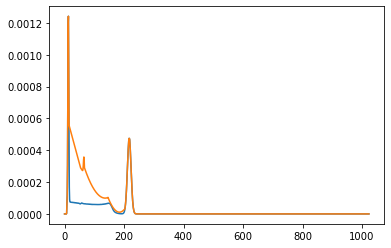

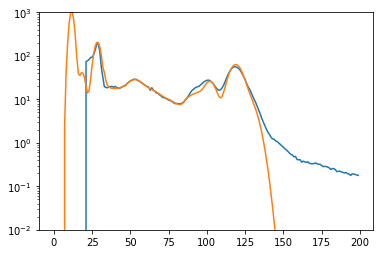

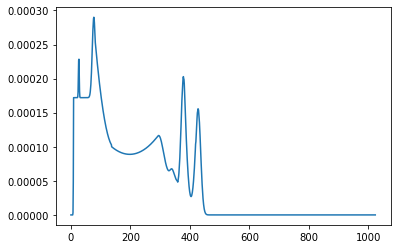

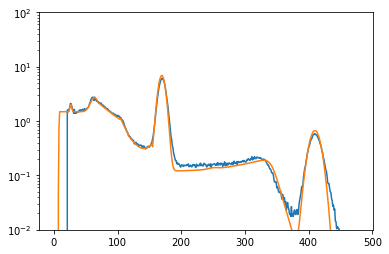

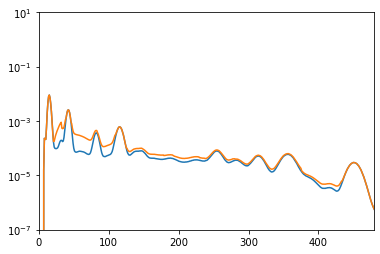

In [130]:
Co = np.loadtxt(dir+"resCo.txt")
Cs = np.loadtxt(dir+"resCs.txt")
Na = np.loadtxt(dir+"resNa.txt")
Ba = np.loadtxt(dir+"resBa.txt")
Eu = np.loadtxt(dir+"resEu.txt")

U235=np.loadtxt(dir+"resU235.txt")
U238=np.loadtxt(dir+"resU238.txt")
Th = np.loadtxt(dir+"resTh.txt")
Ra = np.loadtxt(dir+"resRa.txt")
K  = np.loadtxt(dir+"resK.txt")


###############################################
## Compton edge fitting
## Cs-137
###############################################
plt.plot(Cs)
ch = np.arange(1024)

X = ch[15:54]
m = -0.00483226978228295
c = 0.463047994313389
funcLinear = m*X + c

X = ch[54:67]
A = 0.07
B = 65.0764
Sigma = 1.58
m1= -0.00199462114328639
c1= 0.31
funcGauss = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + m1*X + c1

X = ch[67:146]
p1= 2.75786455226826e-05
q1= -0.0075301414126459
r1= 0.583456592607807
funcPoly1 = p1*X*X + q1*X + r1

X = ch[146:203]
p2= 4.41035e-05
q2= -0.0162693
r2= 1.50802
funcPoly2 = p2*X*X + q2*X + r2

Cs[15:54] = funcLinear/700
Cs[54:67] = funcGauss/700
Cs[67:146]= funcPoly1/700
Cs[146:203]=funcPoly2/700

np.savetxt(dir+'Cs-ComptonEdgefit.txt', Cs)

plt.plot(Cs)
plt.show()

###############################################
## Ba-133
###############################################

BaExp = np.loadtxt(dir+"Ba133_data_sum.csv_rem_BG.csv", delimiter=',')
plt.yscale("log")
plt.ylim((1e-2, 1000))
plt.plot(BaExp[:200])

X = ch[33:50]
#ComptonDiffBa = -3.4267e-7 * X * X + 0.000036723 * X - 0.000619777
#ComptonDiffBa = -1.8915e-7 * X * X + 0.0000197422 * X - 0.000176637
#ComptonDiffBa = -3.95765e-6 * X + 0.000508432
ComptonDiffBa = 1.36364e-6 * X * X - 0.000107364 * X + 0.00236582
Ba[33:50] += ComptonDiffBa

X = ch[50:86]
ComptonDiffBa2 = 3.7567e-7 * X * X - 0.0000617811 * X + 0.00267497
Ba[50:86] += ComptonDiffBa2

X = ch[86:93]
ComptonDiffBa3 = -7.0226e-7 * X * X + 0.000137086 * X - 0.00639702
Ba[86:93] = ComptonDiffBa3

X = ch[46:54]
A = 17.5
B = 53.55
Sigma = 6.2148
m1= -0.0756563770302553
c1= 15.1512660503501
funcGauss1 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + m1*X + c1
Ba[46:54] = funcGauss1/50000

np.savetxt(dir+'Ba-ComptonEdgefit.txt', Ba)

plt.plot(Ba[:200]*50000)
plt.show()

###############################################
## Co-60
###############################################
X = ch[9:82]
A = 0.3
B = 26.55
Sigma = 1.28622260795426
d  = 0.86
A1 = 0.59
B1 = 76.9796547661445
Sigma1 = 5.22865794880
funcGauss2 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + d
Co[9:82] = funcGauss2/5000

X = ch[82:137]
Poly1 = 0.000188314908045988 * X * X - 0.0549161877815528 * X + 4.50061786812904
Co[82:137] = Poly1/5000

X = ch[137:292]
Poly2 = 1.50499926937746e-05 * X * X - 0.00595277558578775 * X + 1.0329505637320
Co[137:292] = Poly2/5000

X = ch[292:359]
A = 0.065
B = 340
Sigma = 7
dd = -0.00130483903987569
ee = 0.711819904747457
A1 = 0.256
B1 = 296
Sigma1 = 15
funcGauss3 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + dd * X + ee
Co[292:359] = funcGauss3/5000

X = ch[384:420]
pp =  0.0016624285157812
qq = -1.34253956318541
rr = 271.185755248658
Poly3 = pp * X * X + qq * X + rr
Co[384:420] = Poly3/5000

np.savetxt(dir+'Co-ComptonEdgefit.txt', Co)

plt.plot(Co)
plt.show()

###############################################
## Na-22
###############################################

NaExp = np.loadtxt(dir+"Na22_data_sum.csv_rem_BG.csv", delimiter=',')
plt.yscale("log")
plt.ylim((1e-2, 100))
plt.plot(NaExp[:Datasize])

X = ch[9:69]
A = 1.26
B = 63.8203599955983
Sigma = 6
d  = 1.56
A1 = 0.571168936575289
B1 = 26.5813369461101
Sigma1 = 1.33444417051575
funcGauss3 = A*np.exp((-(X-B)**2)/(2*Sigma**2)) + A1*np.exp((-(X-B1)**2)/(2*Sigma1**2)) + d
Na[9:69] = funcGauss3 / 4200

X = ch[69:105]
Poly1 = 0.000418911418990103 * X * X - 0.106367639044028 * X + 7.6510123507193
Na[69:105] = Poly1/4200

X = ch[105:118]
Poly2 = 0.00135027597720696 * X * X - 0.34754137775294 * X + 22.7567960331933
Na[105:118] = Poly2/4200

X = ch[118:155]
Poly3 = 0.000412795336697596 * X * X - 0.116382701296672 * X + 8.53211650098415
Na[118:155] = Poly3/4200

np.savetxt(dir+'Na-ComptonEdgefit.txt', Na)

plt.plot(Na[:Datasize]*4000)
plt.show()

###############################################
## Eu-152
###############################################
plt.yscale("log")
plt.ylim((1e-7, 10))
plt.xlim((0, Datasize))
plt.plot(Eu)

X = ch[19:33]
ComptonDiffEu = 0.0000634888 * X - 0.00132484
Eu[19:33] += ComptonDiffEu

X = ch[33:39]
ComptonDiffEu = 2.46/7000  
Eu[33:39] += ComptonDiffEu

X = ch[47:82]
ComptonDiffEu = -0.00000568367 * X + 0.000551143
Eu[47:82] += ComptonDiffEu

X = ch[82:84]
ComptonDiffEu = 0.58873/7000
Eu[82:84] += ComptonDiffEu

X = ch[84:110]
ComptonDiffEu = 0.00000156 * X - 0.0000803657
Eu[84:110] += ComptonDiffEu

X = ch[110:111]
ComptonDiffEu = 0.25/7000  
Eu[110:111] += ComptonDiffEu

X = ch[111:112]
ComptonDiffEu = 0.2/7000  
Eu[111:112] += ComptonDiffEu

X = ch[126:148]
ComptonDiffEu = 0.14/7000  
Eu[126:148] += ComptonDiffEu

X = ch[148:149]
ComptonDiffEu = 0.13/7000  
Eu[148:149] += ComptonDiffEu

X = ch[149:179]
ComptonDiffEu = 0.12/7000  
Eu[149:179] += ComptonDiffEu

X = ch[179:192]
ComptonDiffEu = 0.10/7000  
Eu[179:192] += ComptonDiffEu

X = ch[192:193]
ComptonDiffEu = 0.09/7000  
Eu[192:193] += ComptonDiffEu

X = ch[193:230]
ComptonDiffEu = 0.08/7000  
Eu[193:230] += ComptonDiffEu

X = ch[230:238]
ComptonDiffEu = 0.065/7000  
Eu[230:238] += ComptonDiffEu

X = ch[238:279]
ComptonDiffEu = 0.05/7000  
Eu[238:279] += ComptonDiffEu

X = ch[279:281]
ComptonDiffEu = 0.04/7000  
Eu[279:281] += ComptonDiffEu

X = ch[281:376]
ComptonDiffEu = 0.025/7000  
Eu[281:376] += ComptonDiffEu

X = ch[376:434]
ComptonDiffEu = 0.01/7000  
Eu[376:434] += ComptonDiffEu

X = ch[434:437]
ComptonDiffEu = 0.005/7000  
Eu[434:437] += ComptonDiffEu

X = ch[437:442]
ComptonDiffEu = 0.0025/7000  
Eu[437:442] += ComptonDiffEu

np.savetxt(dir+'Eu-ComptonEdgefit.txt', Eu)
plt.plot(Eu)
plt.show()

In [131]:


for Eshift in Eshiftpatterns:  
   
    s1 = secrets.choice(range(-3,4))     # rolling about 
    randEshift.append(s1)
    
    tempCo = np.roll(Co, -s1)
    tempCs = np.roll(Cs, -s1)
    tempNa = np.roll(Na, -s1)    
    tempBa = np.roll(Ba, -s1)    
    tempEu = np.roll(Eu, -s1)
    tempU235=np.roll(U235, -s1)
    tempU238=np.roll(U238, -s1)
    tempTh = np.roll(Th, -s1)
    tempRa = np.roll(Ra, -s1)
    tempK  = np.roll(K, -s1)
    
    for bit in bits:
        for i in range(pattern):
            
            x1 = rng.uniform((bit/10), (bit))
            x2 = rng.uniform((bit/10), (bit))
            x3 = rng.uniform((bit/10), (bit))
            x4 = rng.uniform((bit/10), (bit))
            x5 = rng.uniform((bit/10), (bit))
            x6 = rng.uniform((bit/10), (bit))
            x7 = rng.uniform((bit/10), (bit))
            x8 = rng.uniform((bit/10), (bit))
            x9 = rng.uniform((bit/10), (bit))
            x10 = rng.uniform((bit/10), (bit))
            
            xsum = x1+x2+x3+x4+x5+x6+x7+x8+x9+x10
            
            #xtot = bit
            xtot = rng.uniform((bit/10), (bit))
            x1 = x1/xsum * xtot
            x2 = x2/xsum * xtot
            x3 = x3/xsum * xtot
            x4 = x4/xsum * xtot
            x5 = x5/xsum * xtot
            x6 = x6/xsum * xtot
            x7 = x7/xsum * xtot
            x8 = x8/xsum * xtot
            x9 = x9/xsum * xtot
            x10 = x10/xsum * xtot

            Co_Bq.append(x1)
            Cs_Bq.append(x2)
            Na_Bq.append(x3)            
            Ba_Bq.append(x4)            
            Eu_Bq.append(x5)
            U235_Bq.append(x6)
            U238_Bq.append(x7)
            Th_Bq.append(x8)
            Ra_Bq.append(x9)
            K_Bq.append(x10)
            TotBq.append(xtot)

            co60 = np.round(Measurement_time *x1*tempCo[Startsize:Datasize])  
            cs137 = np.round(Measurement_time*x2*tempCs[Startsize:Datasize])
            na22 = np.round(Measurement_time *x3*tempNa[Startsize:Datasize])            
            ba133 = np.round(Measurement_time*x4*tempBa[Startsize:Datasize])
            eu152 = np.round(Measurement_time*x5*tempEu[Startsize:Datasize])
            u235 = np.round(Measurement_time *x6*tempU235[Startsize:Datasize])
            u238 = np.round(Measurement_time *x7*tempU238[Startsize:Datasize])
            th232 = np.round(Measurement_time*x8*tempTh[Startsize:Datasize])
            ra226 = np.round(Measurement_time*x9*tempRa[Startsize:Datasize])
            k40 = np.round(Measurement_time  *x10*tempK[Startsize:Datasize])

            ww = co60 + cs137 + na22  + ba133  + eu152 + u235 + u238 + th232 + ra226 + k40
            uu = ww - u235
            
            Sumpeak.append(ww)
            PeakNoU235.append(uu)
            
            sumww = np.sum(ww,axis=0)
            sumuu = np.sum(uu,axis=0)
            
            CoCCR.append(np.sum(co60,axis=0)/sumww)
            CsCCR.append(np.sum(cs137,axis=0)/sumww)
            NaCCR.append(np.sum(na22,axis=0)/sumww)            
            BaCCR.append(np.sum(ba133,axis=0)/sumww)
            EuCCR.append(np.sum(eu152,axis=0)/sumww)
            U235CCR.append(np.sum(u235,axis=0)/sumww)
            U238CCR.append(np.sum(u238,axis=0)/sumww)
            ThCCR.append(np.sum(th232,axis=0)/sumww)
            RaCCR.append(np.sum(ra226,axis=0)/sumww)
            KCCR.append(np.sum(k40,axis=0)/sumww)
            
            
            Coccr.append(np.sum(co60,axis=0)/sumuu)
            Csccr.append(np.sum(cs137,axis=0)/sumuu)
            Naccr.append(np.sum(na22,axis=0)/sumuu)            
            Baccr.append(np.sum(ba133,axis=0)/sumuu)
            Euccr.append(np.sum(eu152,axis=0)/sumuu)
            U238ccr.append(np.sum(u238,axis=0)/sumuu)
            Thccr.append(np.sum(th232,axis=0)/sumuu)
            Raccr.append(np.sum(ra226,axis=0)/sumuu)
            Kccr.append(np.sum(k40,axis=0)/sumuu)
            
# Sum = np.vstack((Co[0,0:Datasize], Sumpeak))
Sum = np.vstack((Co[Startsize:Datasize], Sumpeak))


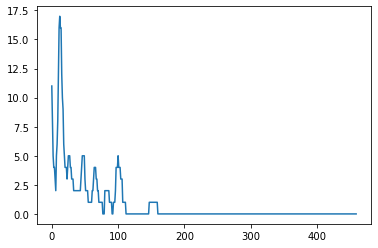

In [132]:
#plt.plot(Sumpeak[len(Sumpeak)-1])
plt.plot(Sumpeak[0])
plt.show()

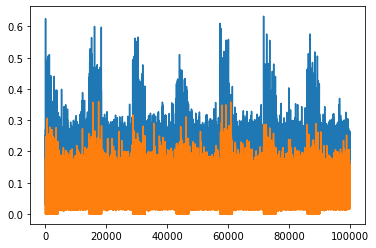

In [133]:
#plt.plot(CoCCR[:10000])
#plt.plot(U235CCR[:100000])
plt.plot(BaCCR[:100000])
#plt.plot(NaCCR[:100000])
plt.plot(CsCCR[:100000])

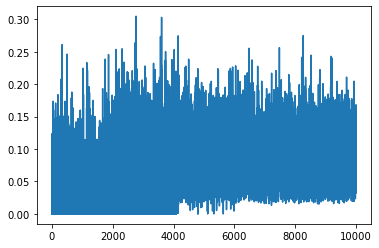

In [134]:
plt.plot(CoCCR[:10000])
#plt.plot(U235CCR[:100000])
# plt.plot(BaCCR[:100000])
#plt.plot(NaCCR[:100000])
# plt.plot(CsCCR[:100000])

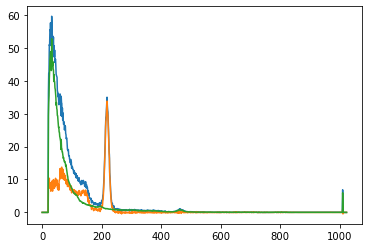

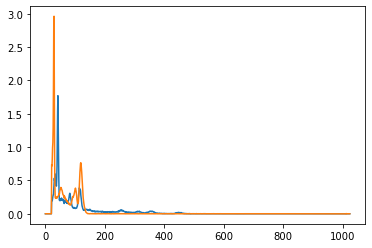

In [199]:
###################################################
## Using experimental data to train
###################################################

path0 = '/home/ndgu-visitor2/project-AI/kimura_DNNexample/New Experimental Data - June 2021/RItest/'
Co = np.loadtxt(path0+"Co_sum_.csv", delimiter = ',')
Cs = np.loadtxt(path0+"Cs_sum_.csv", delimiter = ',')
Na = np.loadtxt(path0+"Na_sum_.csv", delimiter = ',')
Ba = np.loadtxt(path0+"Ba_sum_.csv", delimiter = ',')
Eu = np.loadtxt(path0+"Eu_sum_.csv", delimiter = ',')
BG = np.loadtxt(path0+"BG_sum_.csv", delimiter = ',')

U235=np.loadtxt(dir+"resU235.txt")
U238=np.loadtxt(dir+"resU238.txt")
Th = np.loadtxt(dir+"resTh.txt")
Ra = np.loadtxt(dir+"resRa.txt")
K  = np.loadtxt(dir+"resK.txt")

BG_Bq =[]
Sumpeaks = []
PeaksNoU235 = []
BGCCR = []
BGccr = []
Measurement_time = 30

## Convert to cpm 
Co = Co/30
Cs = Cs/30
Na = Na/30
Ba = Ba/30
Eu = Eu/30
BG = BG/900
plt.plot(Cs)
## remove BG

Co = Co - BG
Cs = Cs - BG
Na = Na - BG
Ba = Ba - BG
Eu = Eu - BG

plt.plot(Cs)
plt.plot(BG)
plt.show()

## Considering distance factor, changing to 1 cm
Co = Co/((1/15)**2)
Cs = Cs/((1/7.5)**2)
Ba = Ba/((1/40.5)**2)
Na = Na/((1/32.5)**2)
Eu = Eu/((1/26)**2)

## Reduce to per 1 Bq
Co = Co/62286.55 
Cs = Cs/8295.054
Na = Na/41427.98
Eu = Eu/86785.66
Ba = Ba/666479.6

#plt.plot(Co)
plt.plot(Eu)
plt.plot(Ba)
plt.show()

bits = [bit1*5, bit2, bit3, bit4, bit5, bit6/2]

In [200]:
###################################################
## Using experimental data to train
###################################################
for Eshift in Eshiftpatterns:  
   
    s1 = secrets.choice(range(-3,4))     # rolling about 
    randEshift.append(s1)
    
    tempCo = np.roll(Co, -s1)
    tempCs = np.roll(Cs, -s1)
    tempNa = np.roll(Na, -s1)    
    tempBa = np.roll(Ba, -s1)    
    tempEu = np.roll(Eu, -s1)
    tempU235=np.roll(U235, -s1)
    tempBG = np.roll(BG, -s1)
    
    for bit in bits:
        for i in range(pattern):
            
            x1 = rng.uniform((bit/10), (bit))
            x2 = rng.uniform((bit/10), (bit))
            x3 = rng.uniform((bit/10), (bit))
            x4 = rng.uniform((bit/10), (bit))
            x5 = rng.uniform((bit/10), (bit))
            x6 = rng.uniform((bit/10), (bit))            
            
            xsum = x1+x2+x3+x4+x5+x6
            
            xtot = rng.uniform((bit/10), (bit))
            x1 = x1/xsum * xtot
            x2 = x2/xsum * xtot
            x3 = x3/xsum * xtot
            x4 = x4/xsum * xtot
            x5 = x5/xsum * xtot
            x6 = x6/xsum * xtot           

            Co_Bq.append(x1)
            Cs_Bq.append(x2)
            Na_Bq.append(x3)            
            Ba_Bq.append(x4)            
            Eu_Bq.append(x5)
            U235_Bq.append(x6)            

            TotBq.append(xtot)

            co60 = np.round(Measurement_time *x1*tempCo[Startsize:Datasize])  
            cs137 = np.round(Measurement_time*x2*tempCs[Startsize:Datasize])
            na22 = np.round(Measurement_time *x3*tempNa[Startsize:Datasize])            
            ba133 = np.round(Measurement_time*x4*tempBa[Startsize:Datasize])
            eu152 = np.round(Measurement_time*x5*tempEu[Startsize:Datasize])
            u235 = np.round(Measurement_time *x6*tempU235[Startsize:Datasize])
            #bg = np.round(Measurement_time*tempBG[Startsize:Datasize])
            s = np.sum(bg)
            random = s*np.random.normal(loc=0.0, scale=np.sqrt(s)/s)+s
            bg = bg*random/s


            ww = co60 + cs137 + na22  + ba133  + eu152 + u235 + bg
            uu = ww - u235
            
            Sumpeaks.append(ww)
            PeaksNoU235.append(uu)
            
            sumww = np.sum(ww,axis=0)
            sumuu = np.sum(uu,axis=0)
            
            CoCCR.append(np.sum(co60,axis=0)/sumww)
            CsCCR.append(np.sum(cs137,axis=0)/sumww)
            NaCCR.append(np.sum(na22,axis=0)/sumww)            
            BaCCR.append(np.sum(ba133,axis=0)/sumww)
            EuCCR.append(np.sum(eu152,axis=0)/sumww)
            U235CCR.append(np.sum(u235,axis=0)/sumww)
            BGCCR.append(np.sum(bg,axis=0)/sumww)
                        
            Coccr.append(np.sum(co60,axis=0)/sumuu)
            Csccr.append(np.sum(cs137,axis=0)/sumuu)
            Naccr.append(np.sum(na22,axis=0)/sumuu)            
            Baccr.append(np.sum(ba133,axis=0)/sumuu)
            Euccr.append(np.sum(eu152,axis=0)/sumuu)
            BGccr.append(np.sum(bg,axis=0)/sumuu)

Sums = np.vstack((Co[Startsize:Datasize], Sumpeaks))


In [197]:
s = np.sum(bg)
print(s)
np.sqrt(s)
for i in range(10):
    print(s*np.random.normal(loc=0.0, scale=np.sqrt(s)/s)+s)
    

74920.0
74782.06519103402
75370.09143483193
75001.92062181598
74639.28111237015
74657.05446595015
74949.56108274091
74411.31975634418
75365.78981089217
75409.74913034467
75187.90611336686


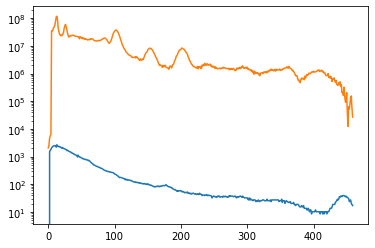

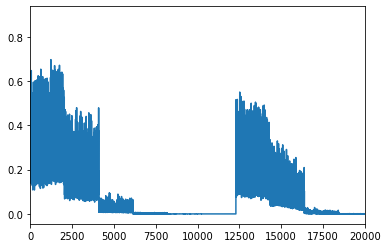

In [201]:
plt.plot(bg)
plt.plot(ww)
plt.yscale("log")
plt.show()
plt.plot(BGCCR)
plt.xlim(0, 20000)
plt.show()

In [202]:
###################################################
## Using experimental data to train
###################################################
X_train = np.array(Sumpeaks)

CCR_exp = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, BGCCR])
Y_train = CCR_exp.T

ccr_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, BGccr])

Activity = np.vstack([TotBq, Co_Bq, Cs_Bq, Na_Bq,  Ba_Bq, Eu_Bq, U235_Bq])

nuclides_n = 7

print(X_train.shape)
print(np.shape(Y_train))

np.savetxt("YtrainCCR-exp.txt", CCR_exp.T)
np.savetxt('Activity-exp.txt', Activity.T)
save('X_train-exp.npy', X_train)
save('Y_train-exp.npy', Y_train)

(1228800, 460)
(1228800, 7)


In [135]:

X_train = np.array(Sumpeak)

CCR = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, U238CCR, ThCCR, RaCCR, KCCR])

ccr_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, U238ccr, Thccr, Raccr, Kccr])

Activity = np.vstack([TotBq, Co_Bq, Cs_Bq, Na_Bq,  Ba_Bq, Eu_Bq, U235_Bq, U238_Bq, Th_Bq, Ra_Bq, K_Bq])

Y_train = CCR.T

print(X_train.shape)
print(np.shape(Y_train))

np.savetxt("YtrainCCR.txt", CCR.T)


(1433600, 460)
(1433600, 10)


In [137]:
BgCCR = np.stack(U238CCR) + np.stack(KCCR) + np.stack(ThCCR) + np.stack(RaCCR)
print(BgCCR.shape)

CCR_acc_no_U235 = np.vstack([Coccr, Csccr, Naccr,  Baccr, Euccr, BgCCR])
CCR_acc = np.vstack([CoCCR, CsCCR, NaCCR,  BaCCR, EuCCR, U235CCR, BgCCR])

Y_train_acc = CCR_acc.T
Y_train_acc_no_U235 = CCR_acc_no_U235.T

np.savetxt("YtrainCCR_acc.txt", CCR_acc.T)
np.savetxt("YtrainCCR_acc_no_U235.txt", CCR_acc_no_U235.T)

(1433600,)


In [146]:

save('X_train.npy', X_train)
save('Y_train.npy', Y_train)

np.savetxt('Activity.txt', Activity.T)

In [147]:
X_train = load('X_train.npy')
Y_train = load('Y_train.npy')
print(X_train.shape, np.shape(Y_train))

(1228800, 479) (1228800, 10)


In [237]:
# VGG19 model定義
Ks.clear_session()

np.random.seed(10)

VGG19model = keras.models.Sequential()

VGG19model.add(layers.Conv1D(64, 3, activation = 'relu', padding='same',
                       input_shape = (Datasize-Startsize,1)))
VGG19model.add(layers.Conv1D(64, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dropout(0.2))
VGG19model.add(layers.Dense(nuclides_n, activation='softmax'))

#opt= keras.optimizers.Adam(lr=0.0021533133440412807,
#                           decay=8.915893662822524e-09,
#                           amsgrad=True)
opt = keras.optimizers.Adam()

VGG19model.compile(loss='categorical_crossentropy', optimizer=opt)

VGG19model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 460, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 460, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 230, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 230, 128)          24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 230, 128)          49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 115, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 115, 256)         

In [204]:
print(X_train.shape)
print(Y_train.shape)

data_x = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # 学習データをConv1D Layer用に変形
print(data_x.shape)

data_y = Y_train

(1228800, 460)
(1228800, 7)
(1228800, 460, 1)


In [238]:
#VGG19 学習
from keras.callbacks import EarlyStopping

run = 20
val_split = 0.2
batch_size = 1024

VGGhistory = VGG19model.fit(data_x, data_y, 
                    epochs=run,
                    batch_size=batch_size,
                    validation_split=val_split)
#                    callbacks=EarlyStopping(monitor='val_loss',patience=50, verbose=1, min_delta=0,mode="auto"))

VGGloss = VGGhistory.history['loss']
VGGval_loss = VGGhistory.history['val_loss']

#epochs= range(len(acc))
epochs= range(len(VGGloss))
#plt.plot(epochs, acc, 'bo', label='training acc')
#plt.plot(epochs, val_acc, 'b', label='validation acc')
#plt.legend()
plt.figure()
plt.plot(epochs, VGGloss, 'bo', label='training loss')
plt.plot(epochs, VGGval_loss, 'b', label='validation loss')
plt.legend()

plt.show()

Train on 983040 samples, validate on 245760 samples
Epoch 1/20
561152/983040 [================>.............] - ETA: 1:54 - loss: 38.7781

KeyboardInterrupt: 

In [47]:
plt.savefig("loss-100epochs-7bits-Compton-Eu-fitted")

<Figure size 432x288 with 0 Axes>

In [154]:
VGG19model.save("/home/ndgu-visitor2/project-AI/kimura_DNNexample/VGG19-1D_100epoch-dropout0.2-7bits-Compton.h5")

In [ ]:
VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch-dropout0.2.h5")

(31, 7)
[5.4615092e-01 2.4899157e-02 5.1152740e-02 3.5971344e-02 6.5558471e-02
 2.5246054e-04 2.7601492e-01]
(31, 6)


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


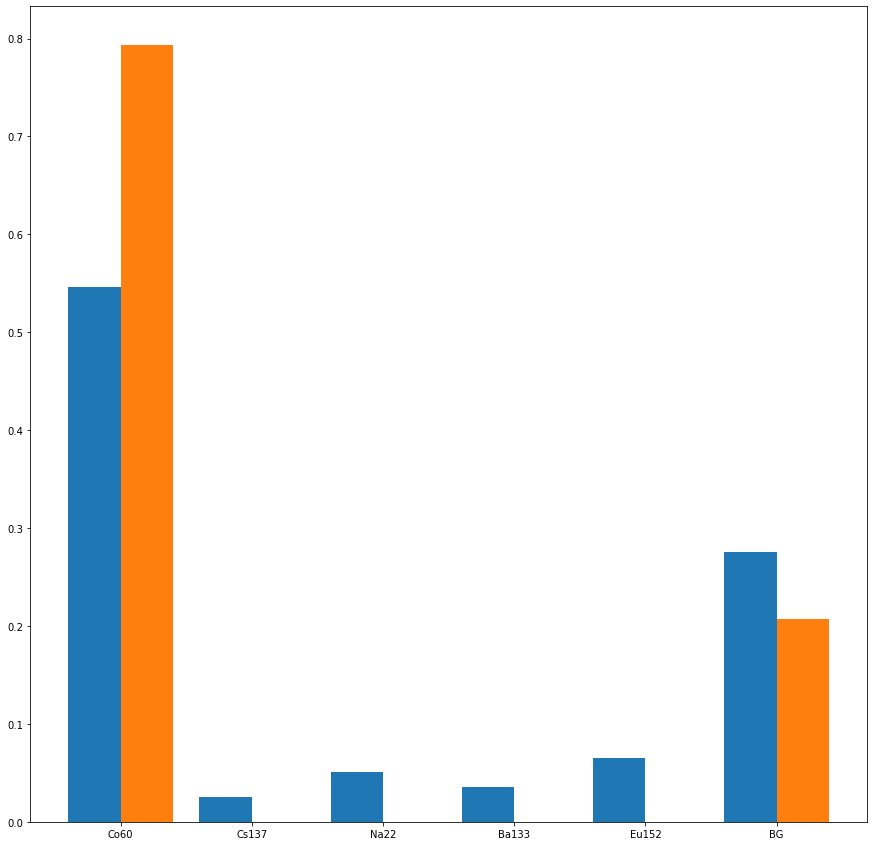

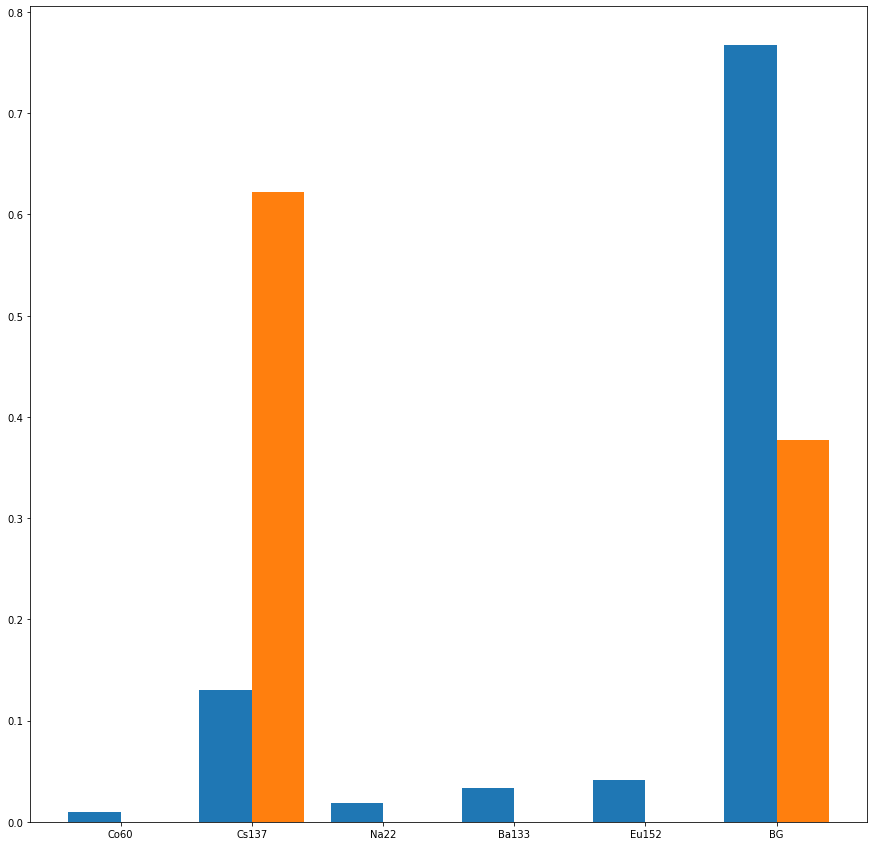

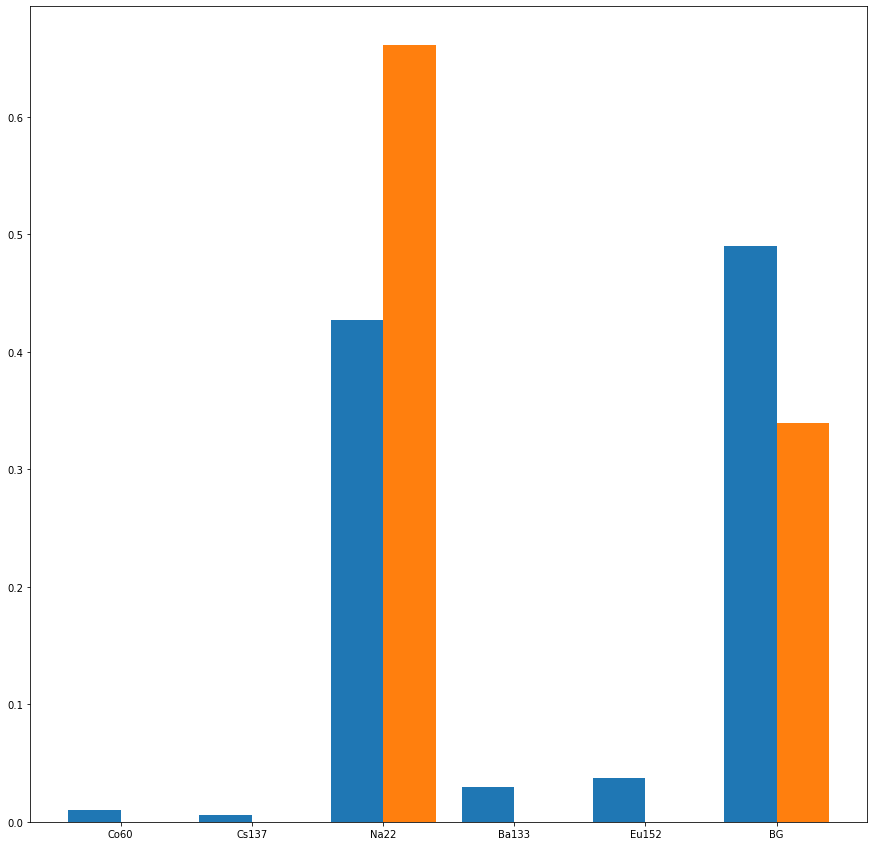

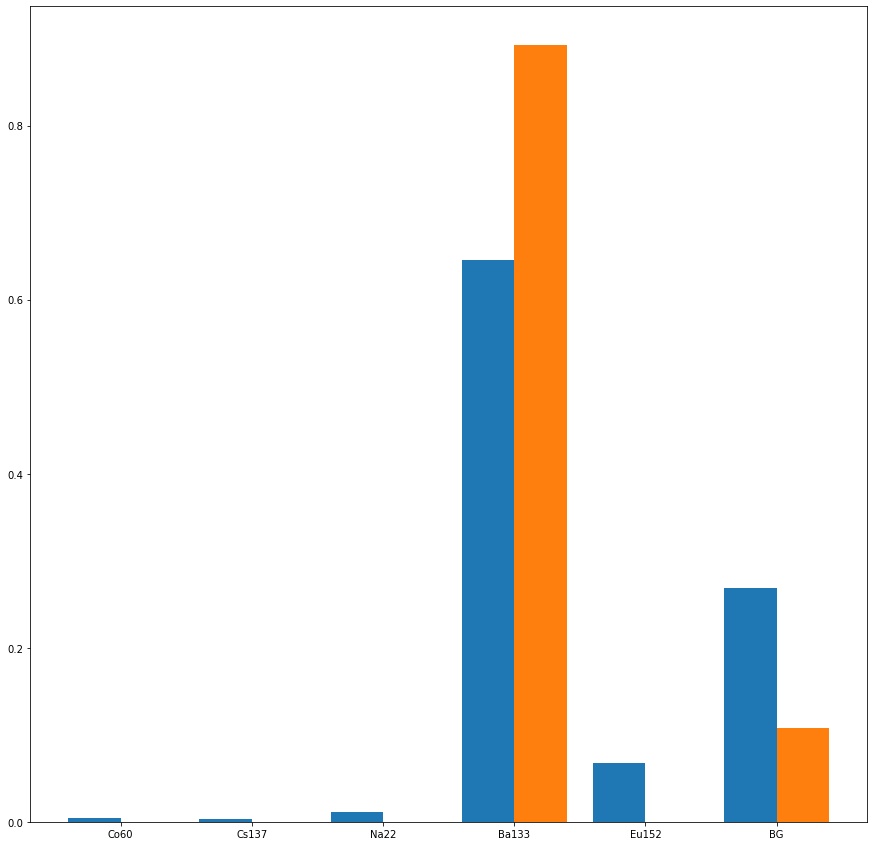

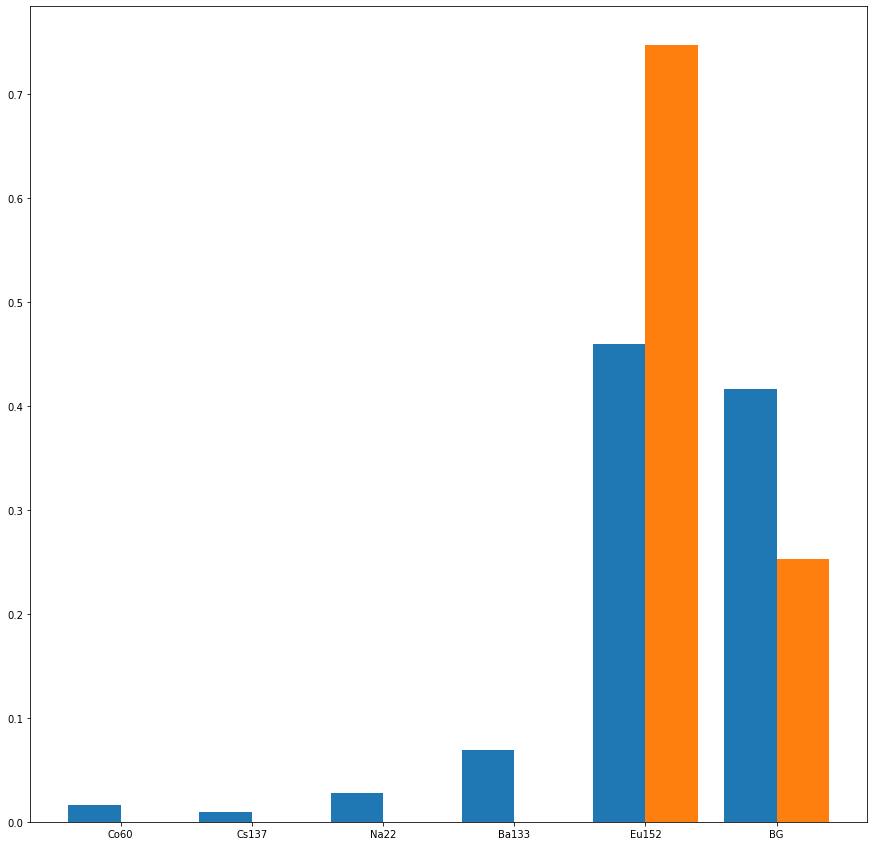

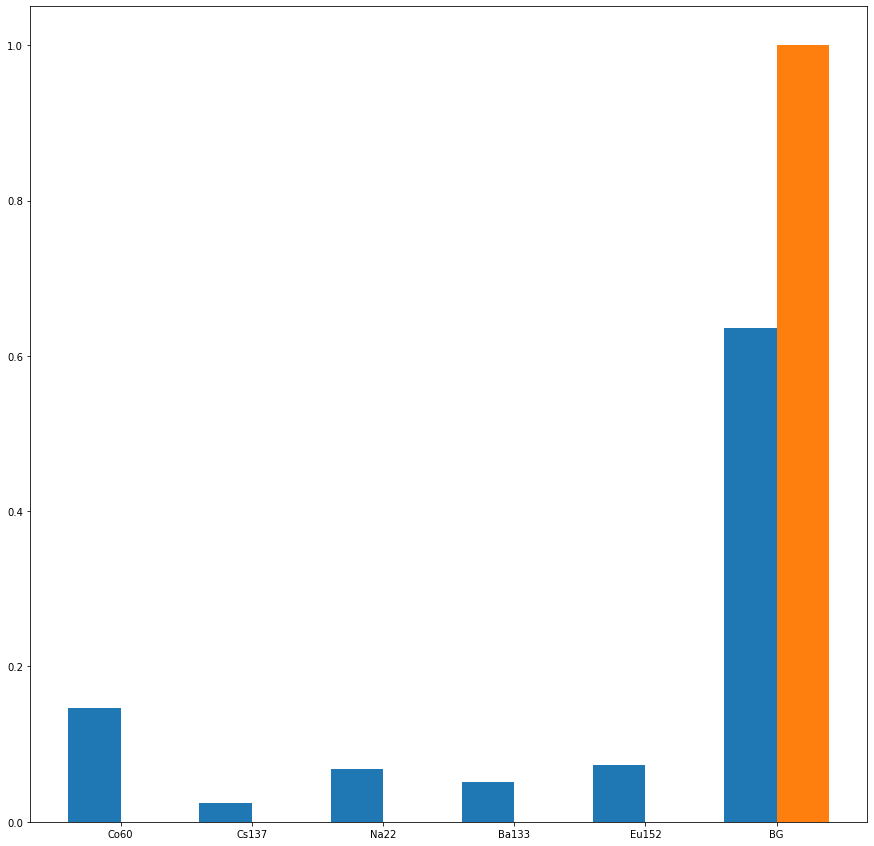

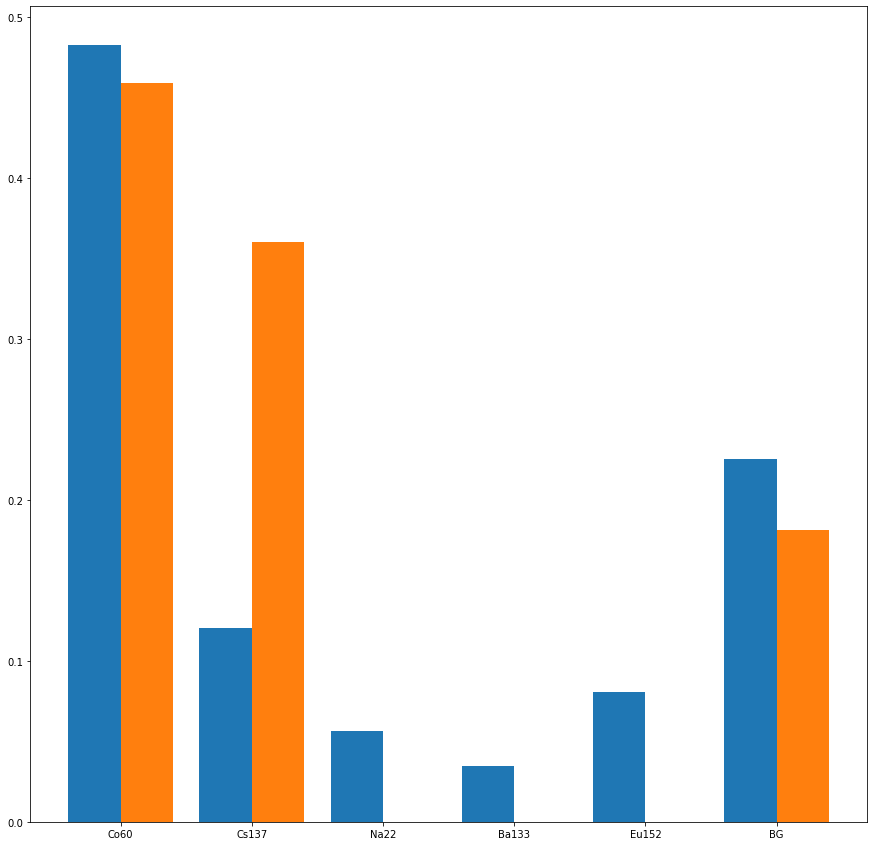

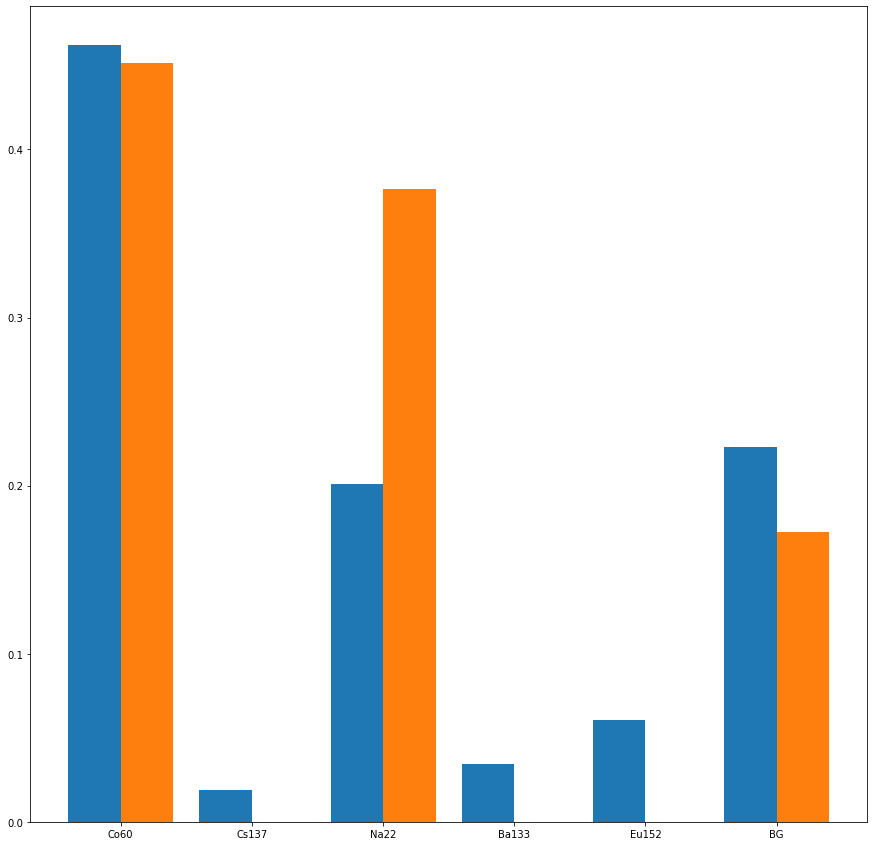

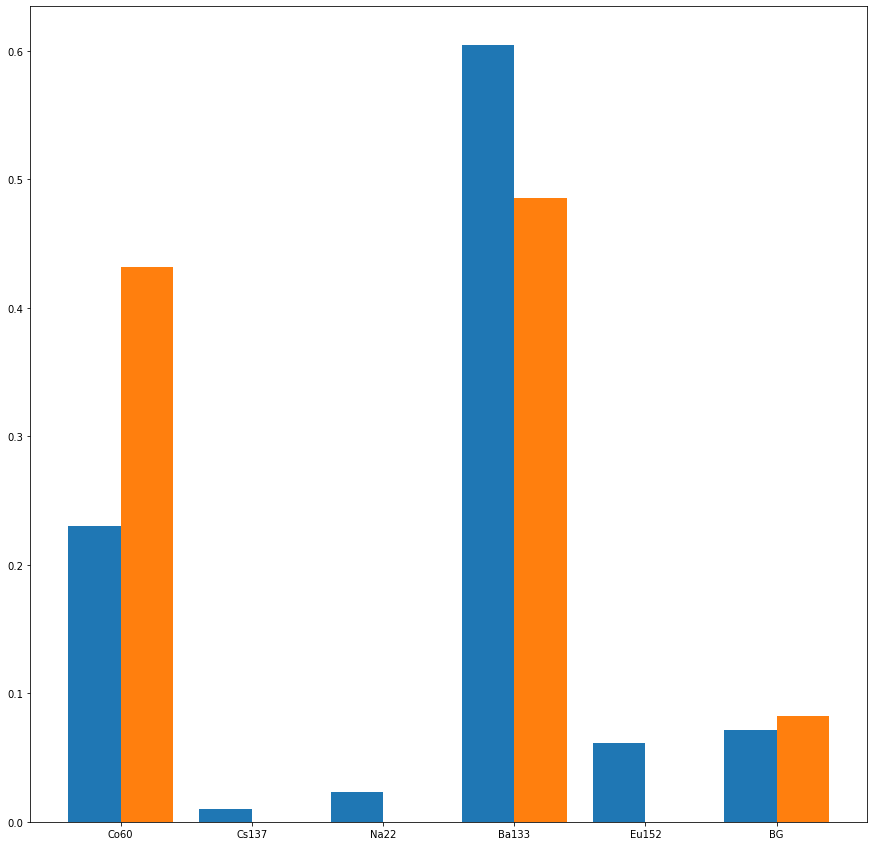

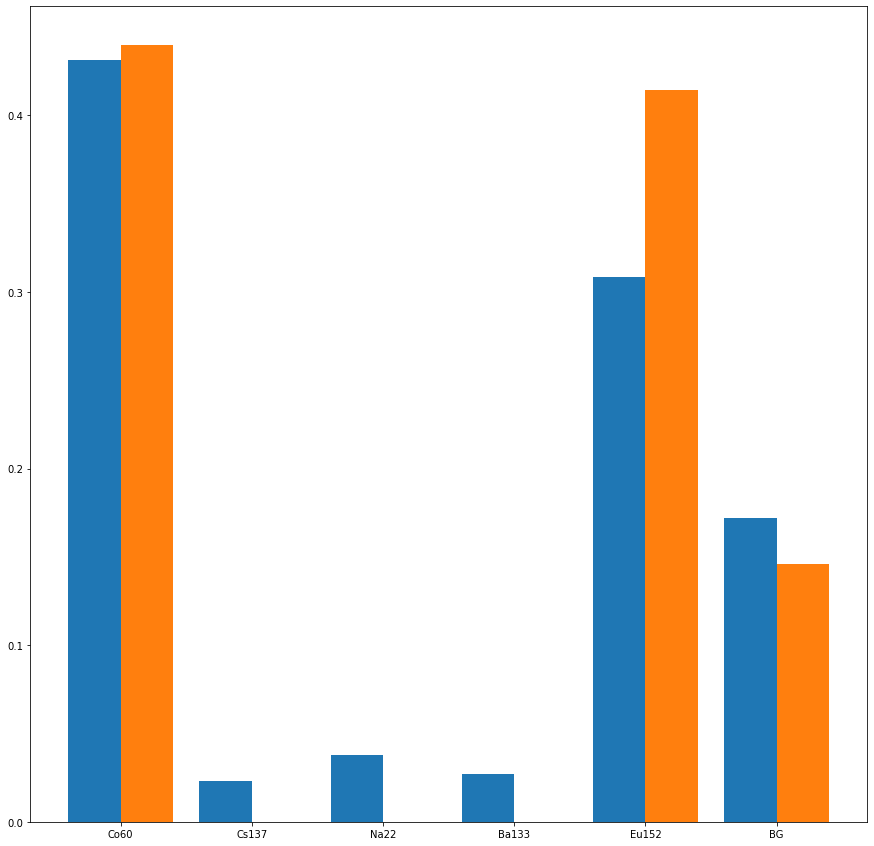

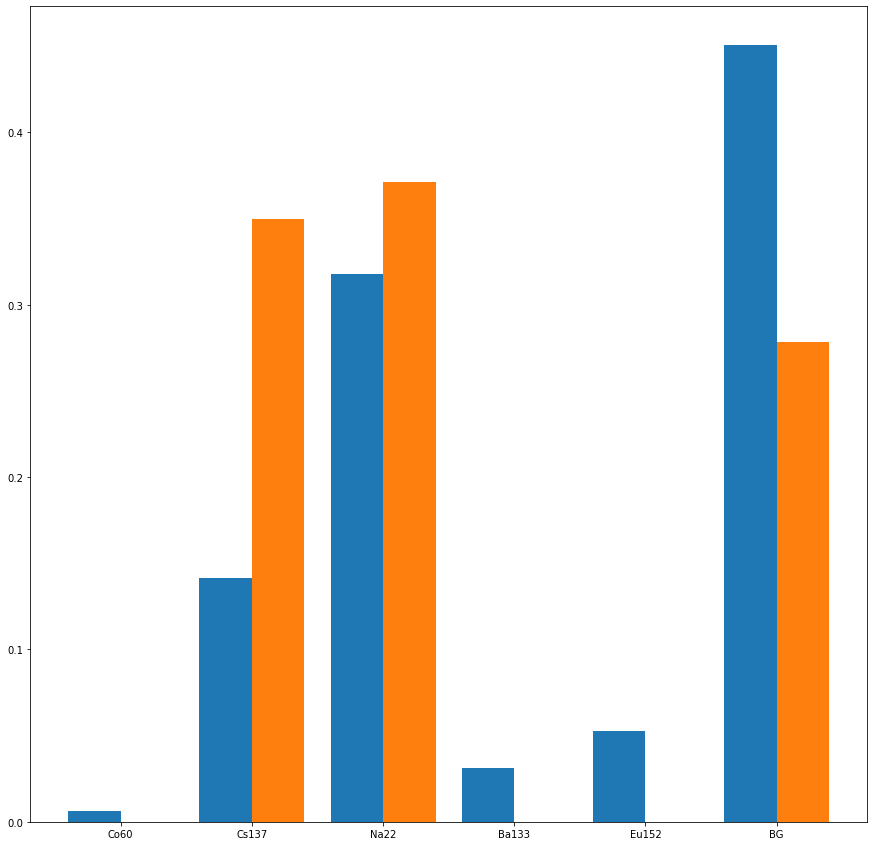

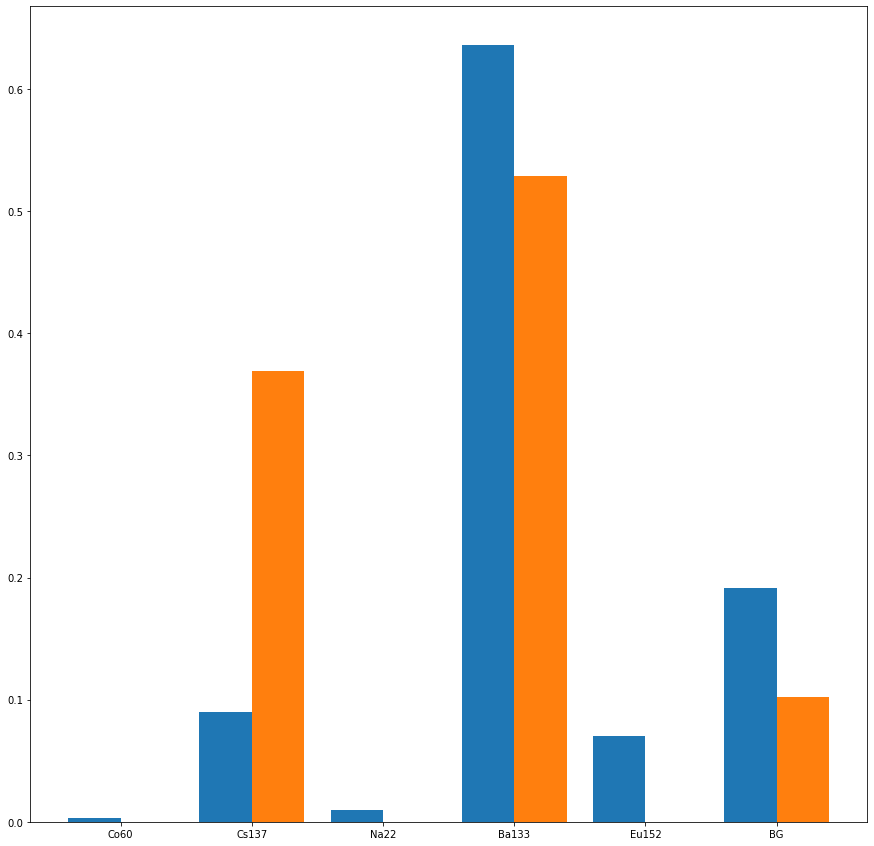

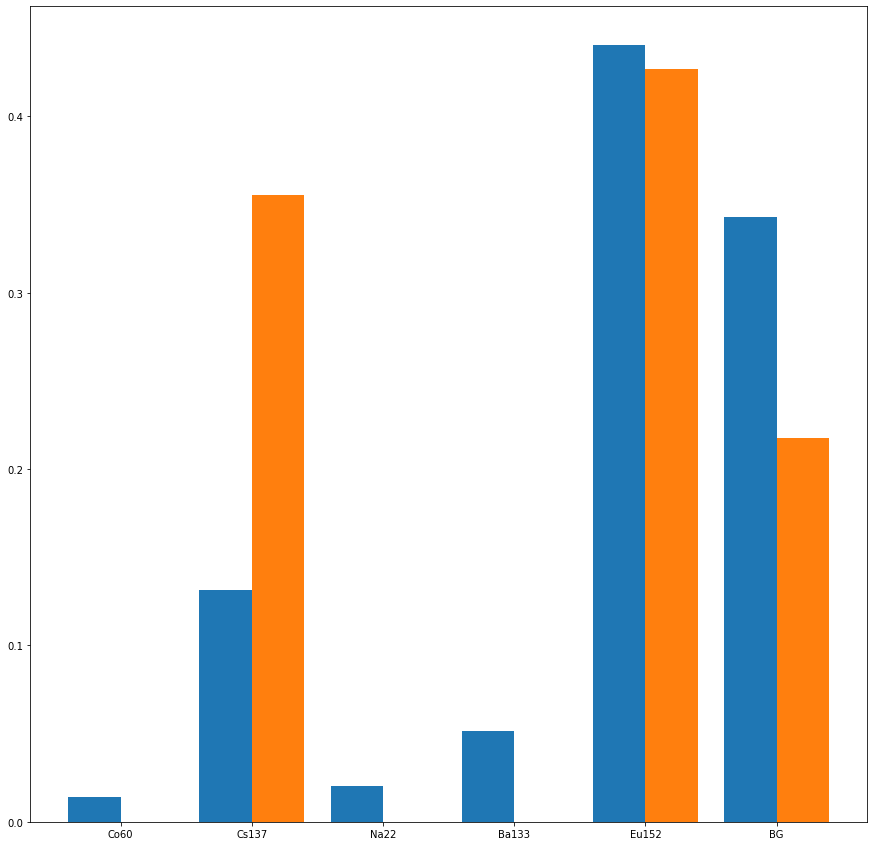

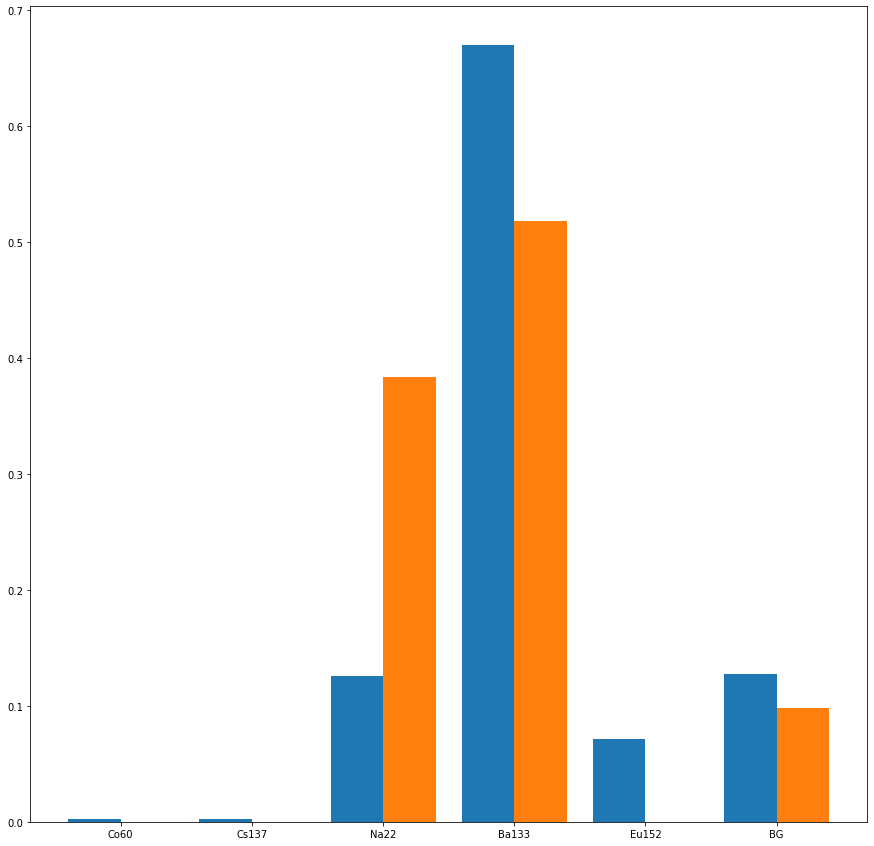

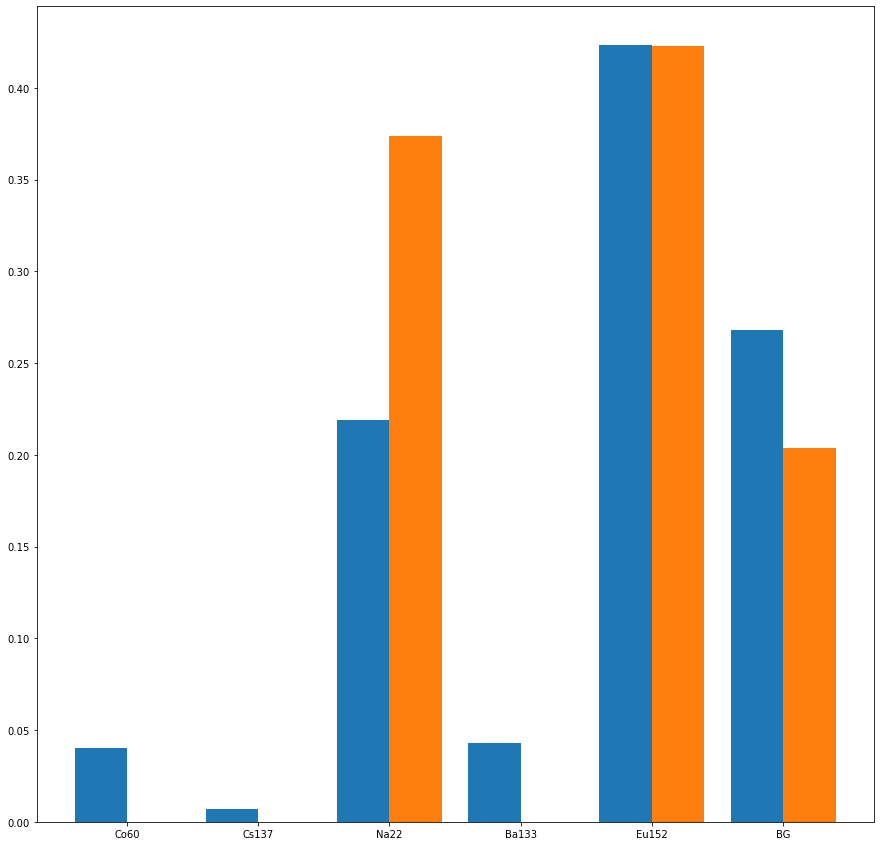

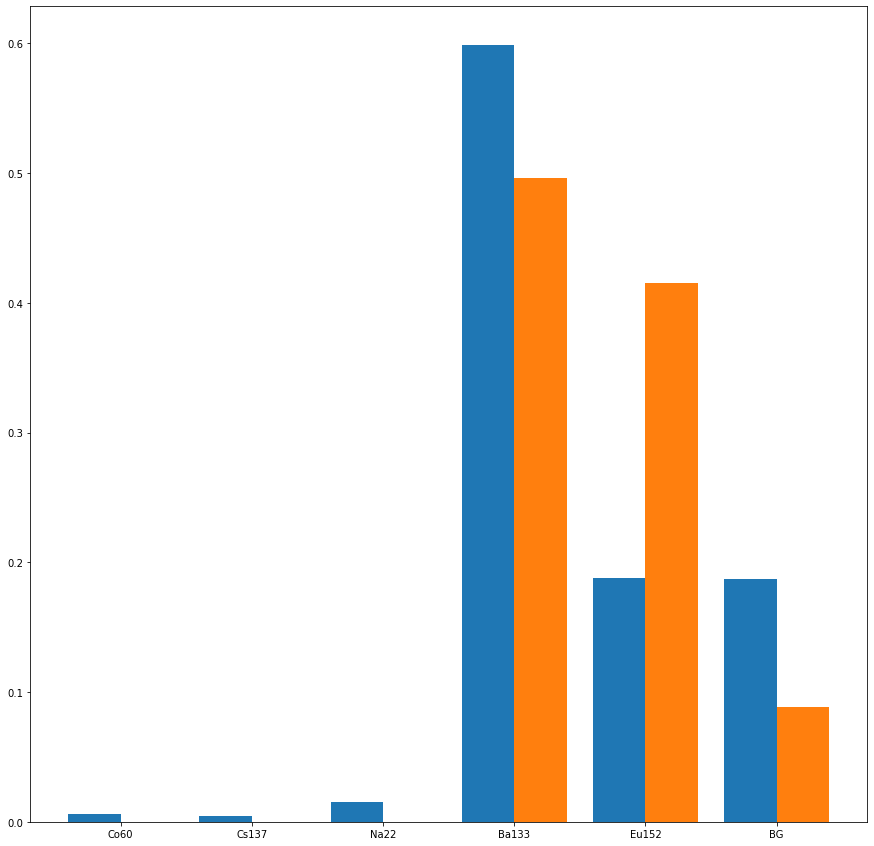

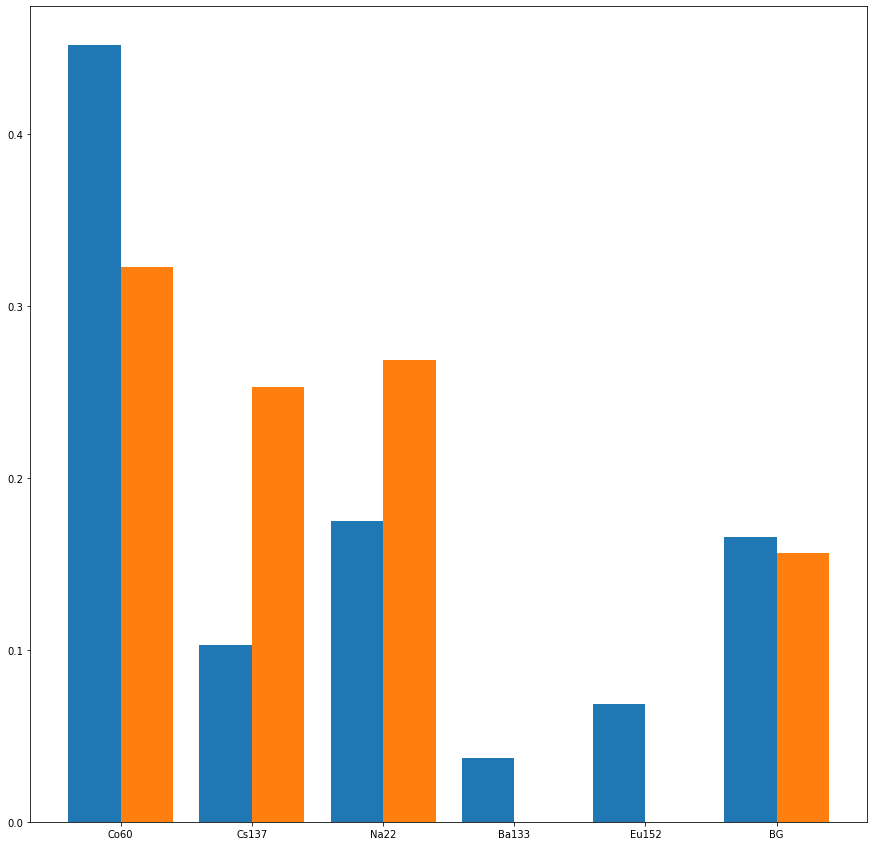

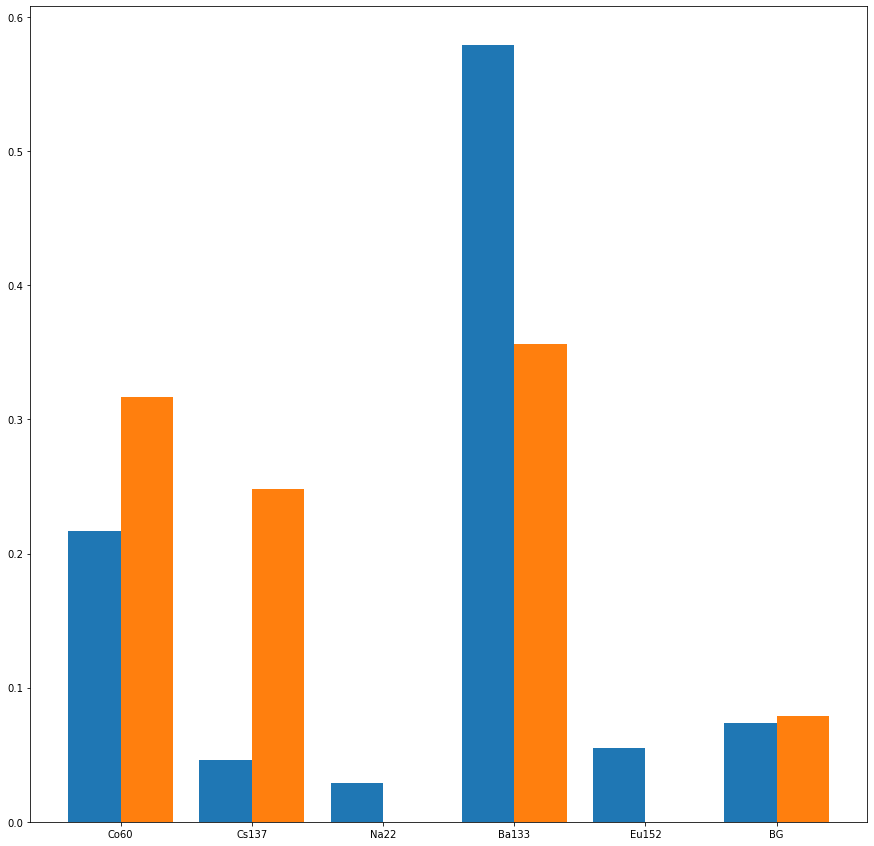

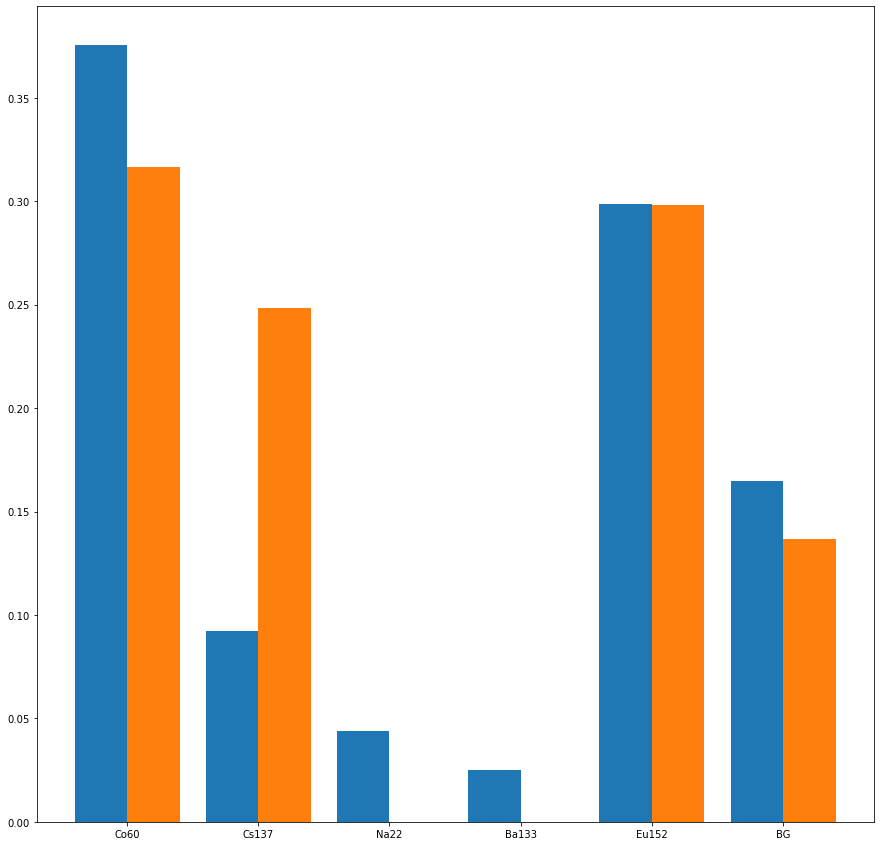

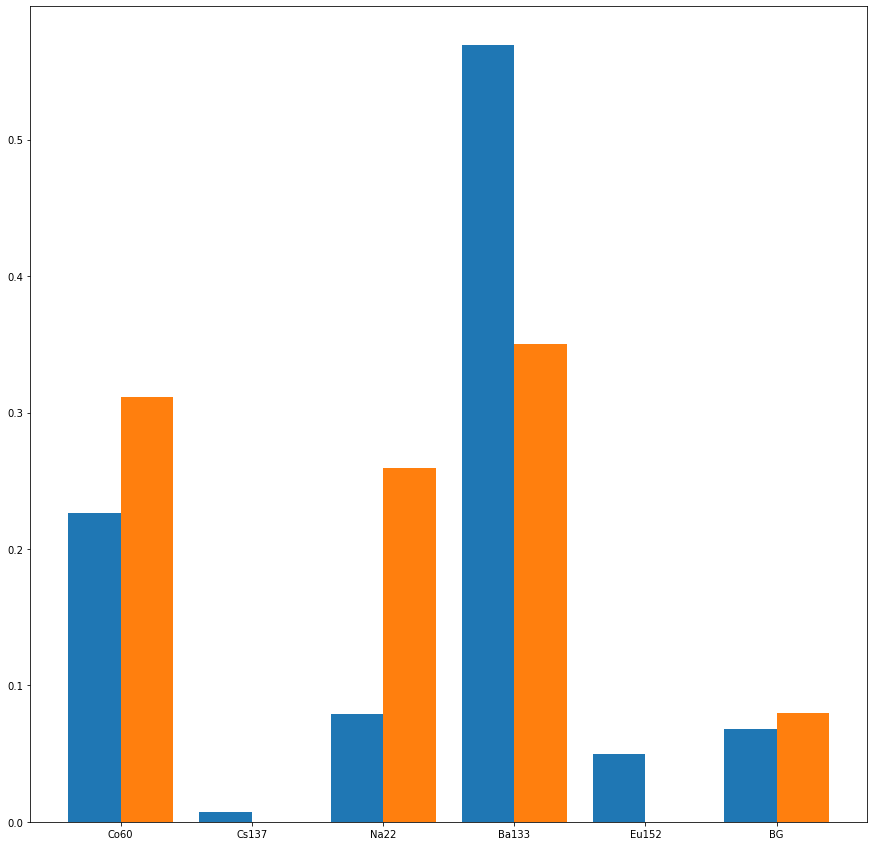

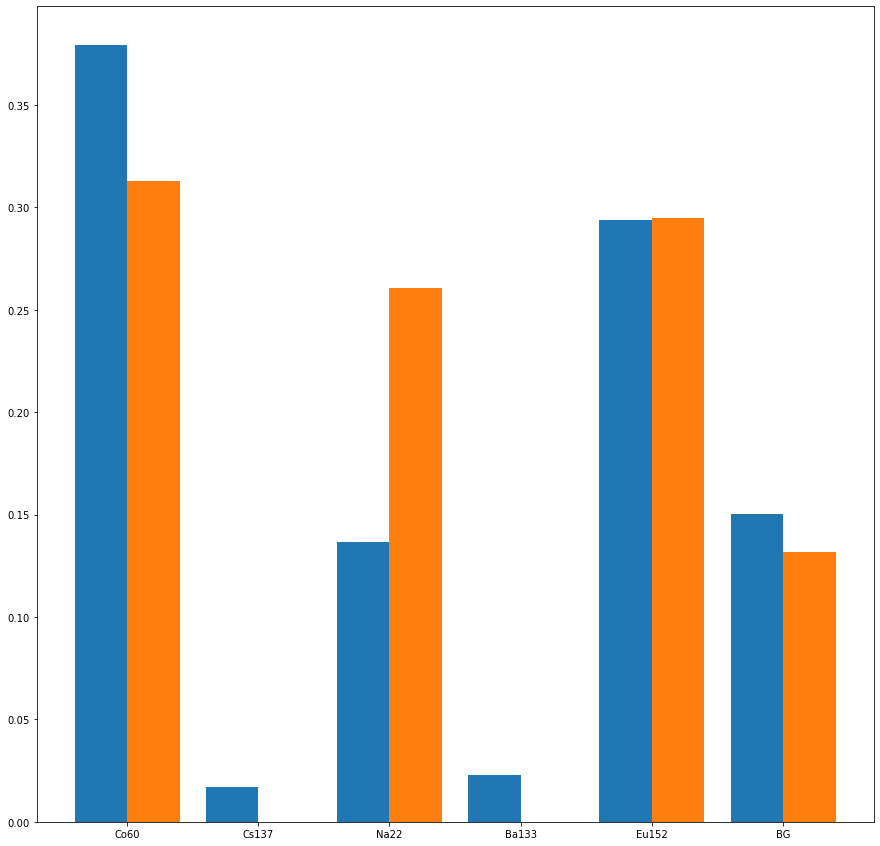

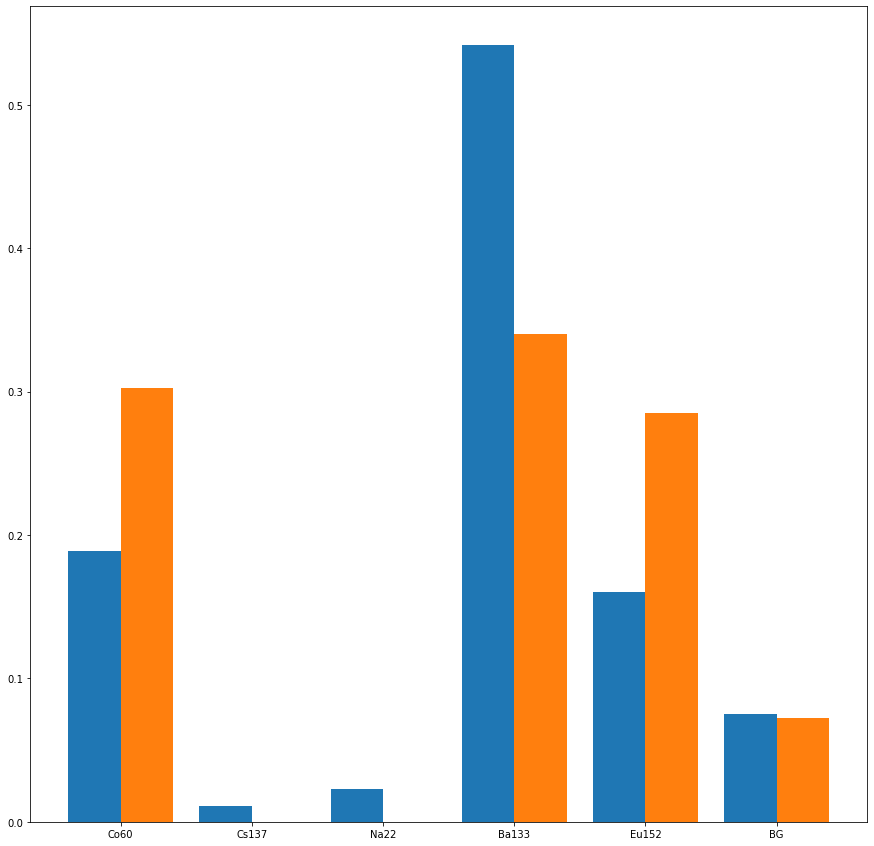

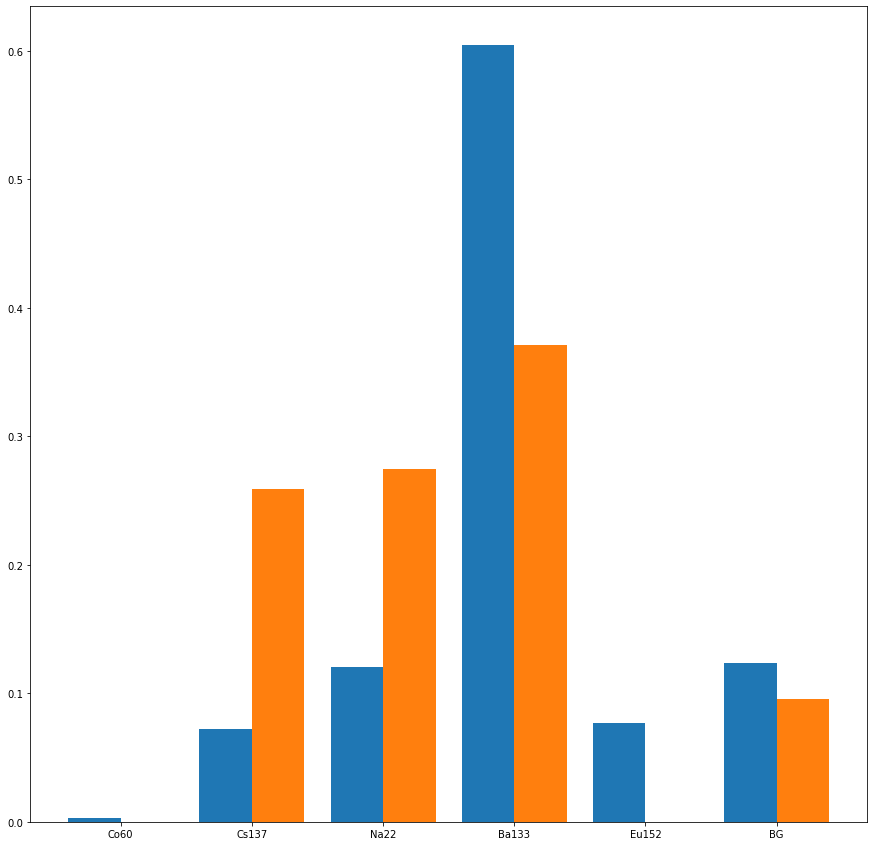

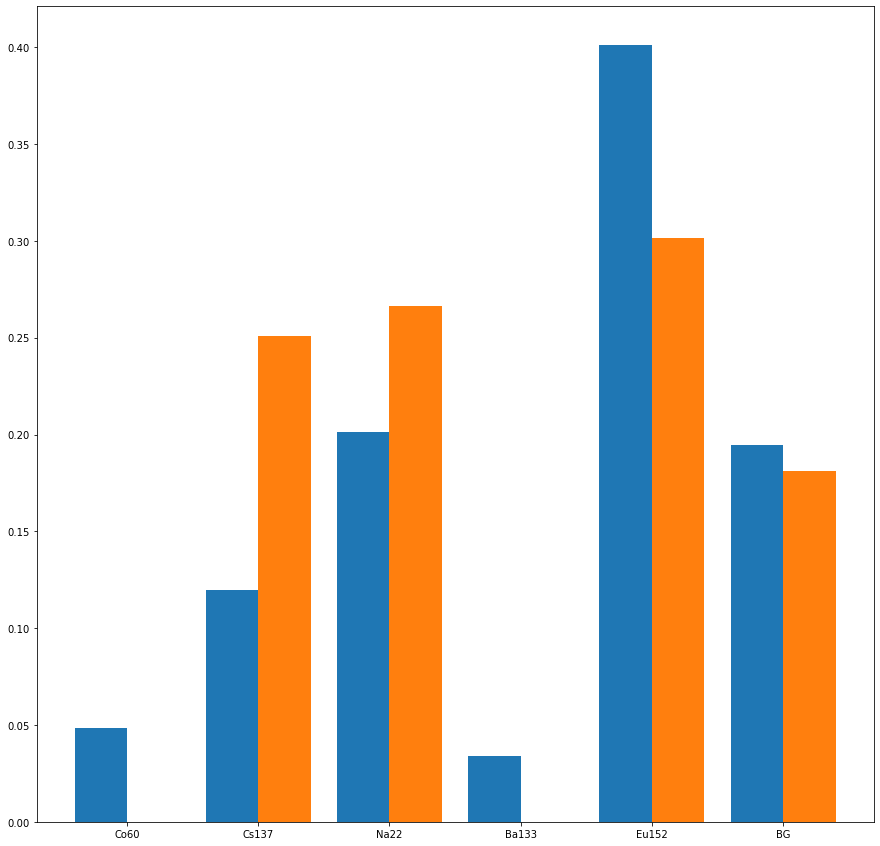

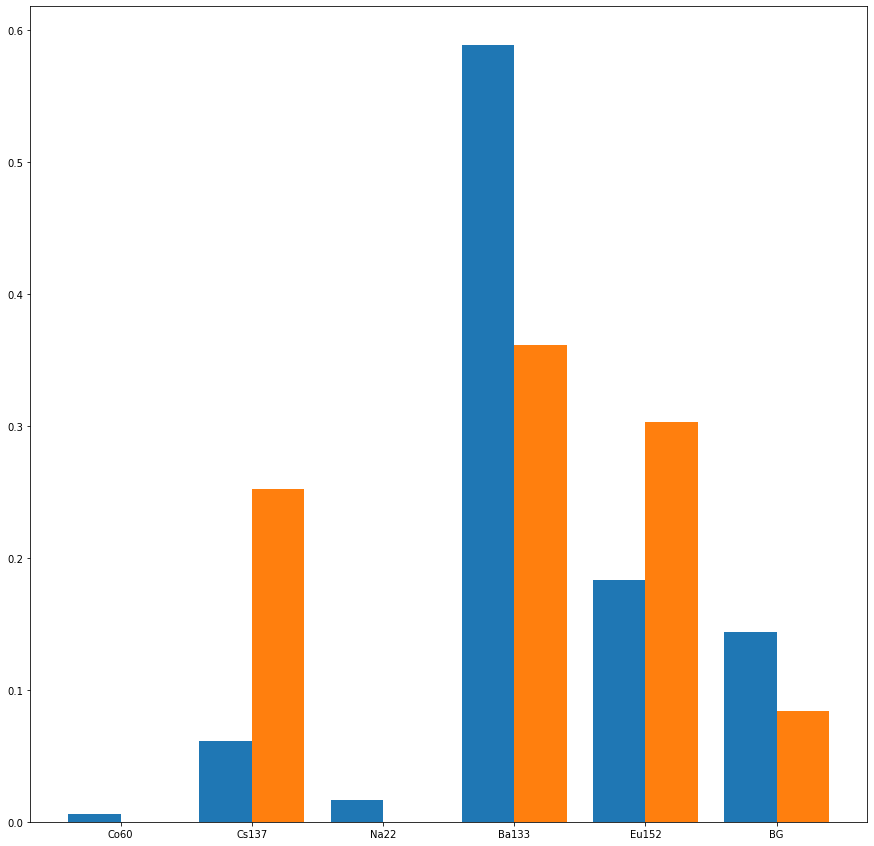

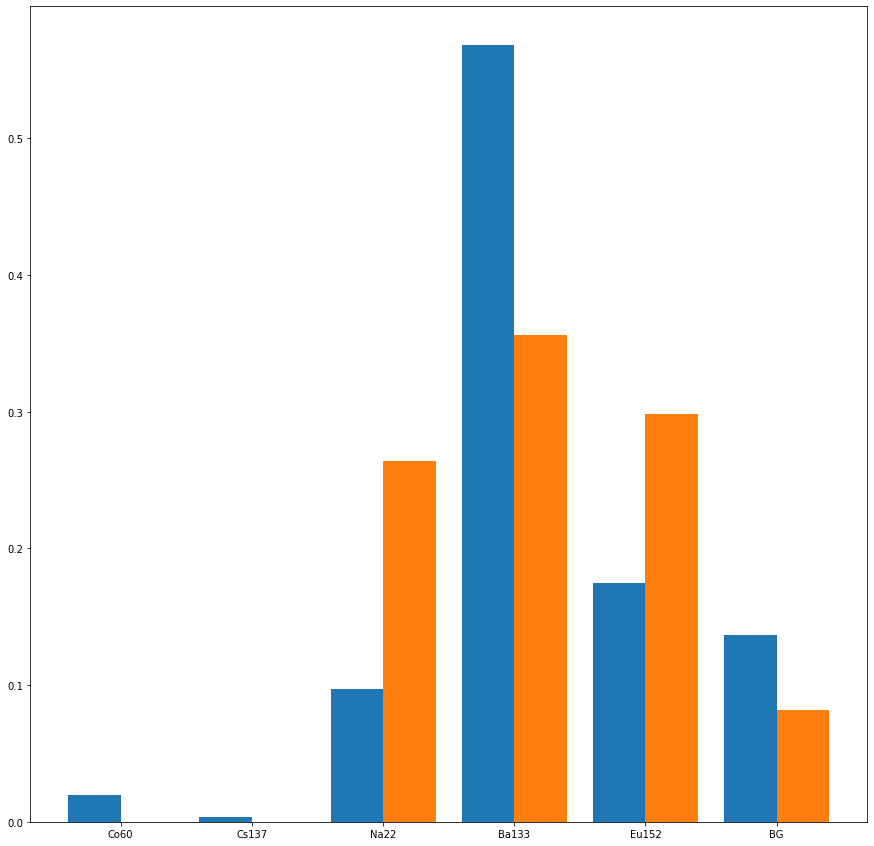

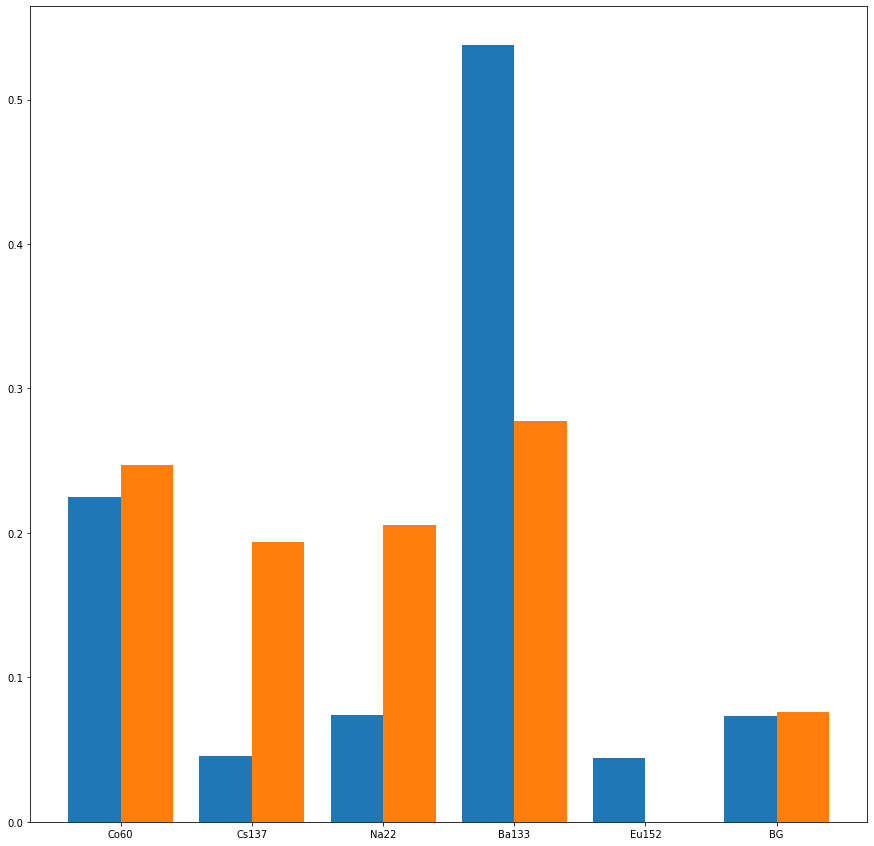

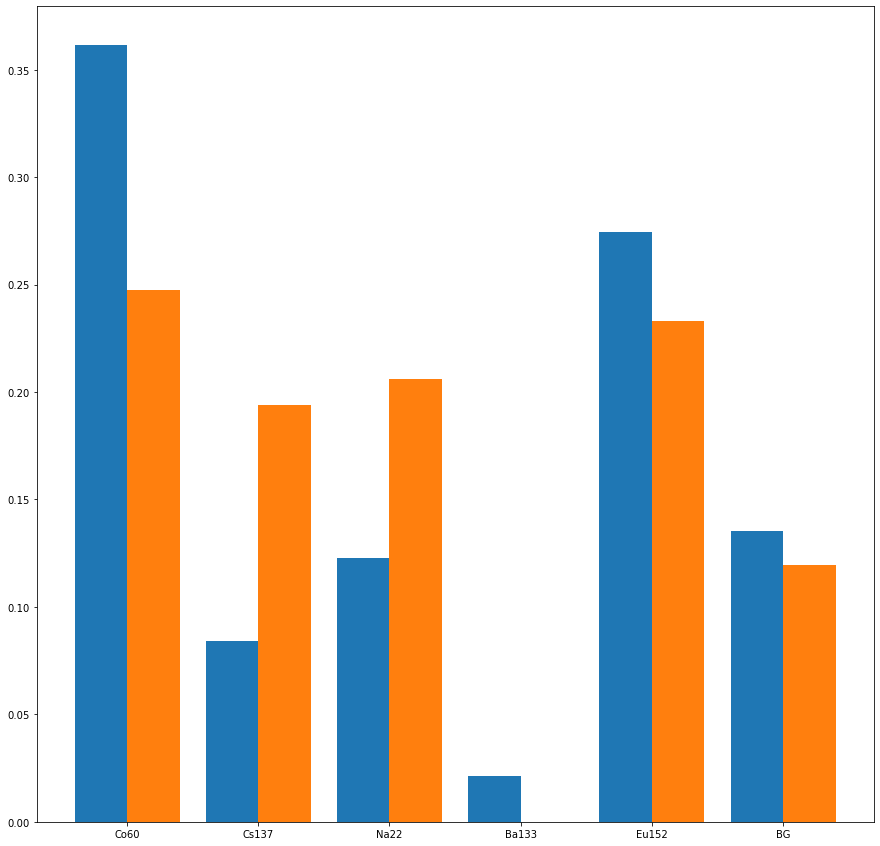

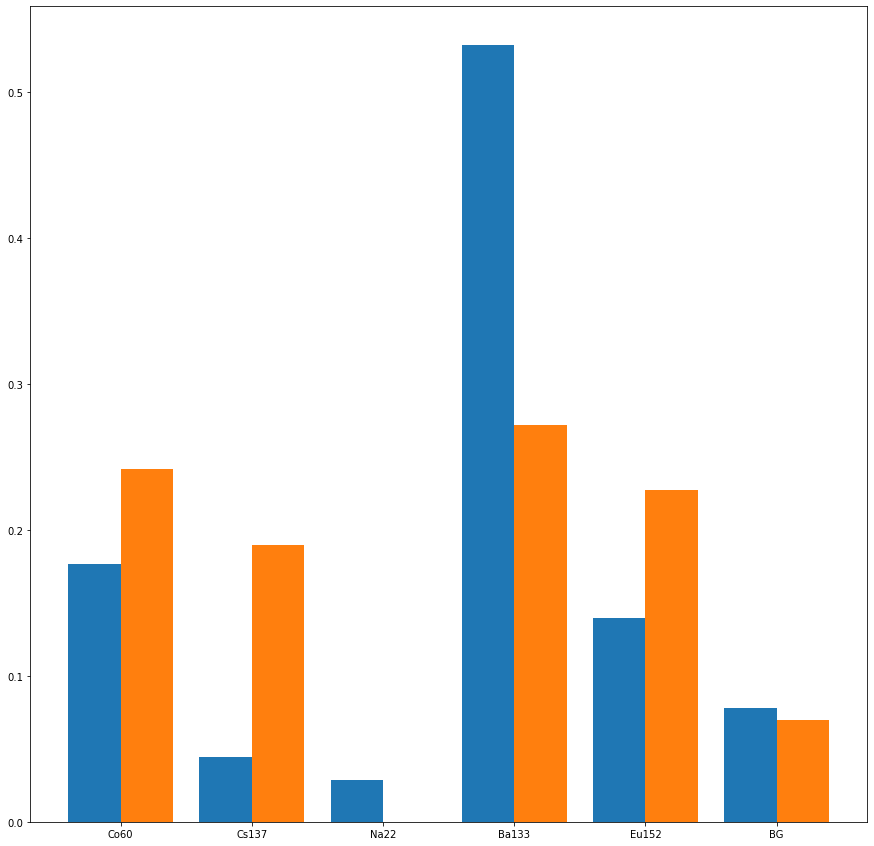

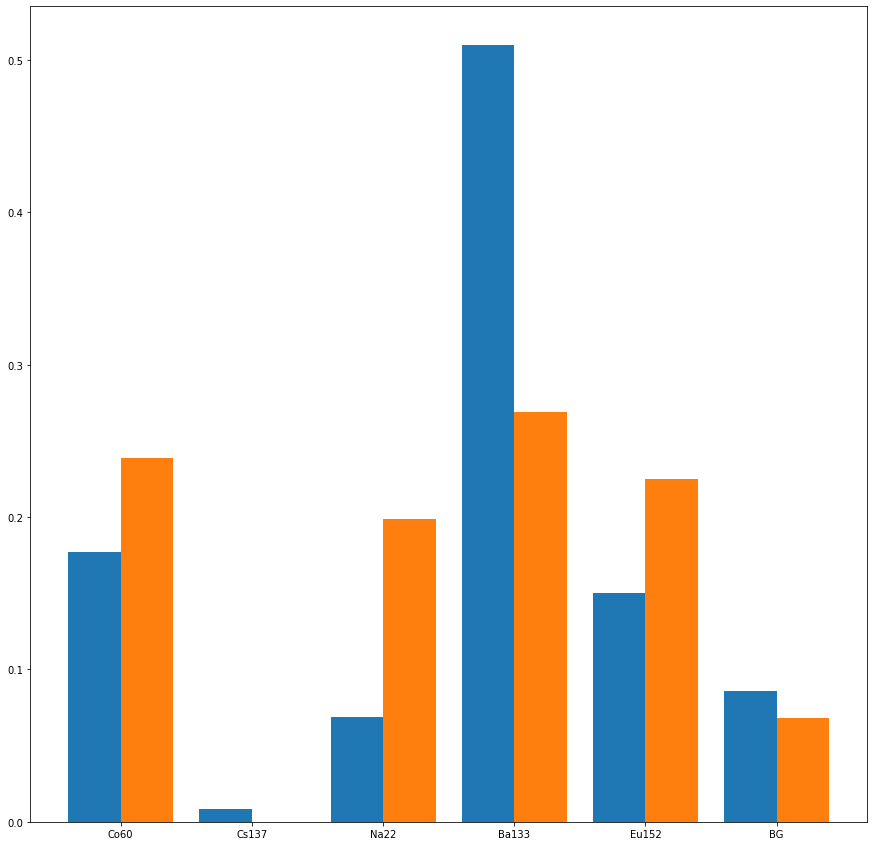

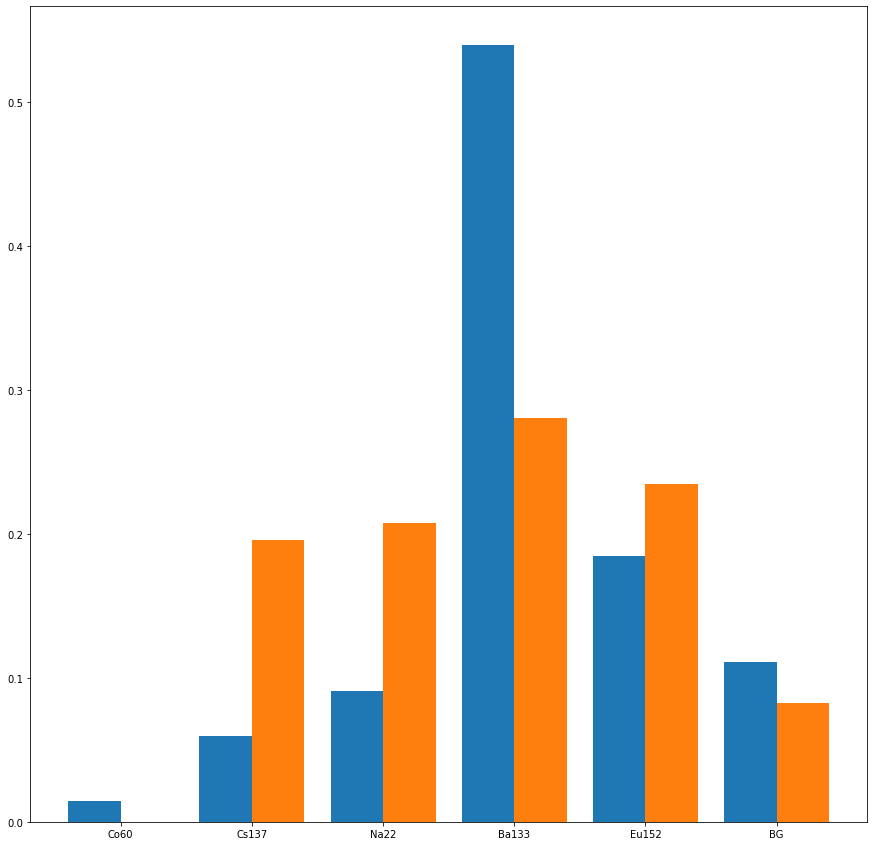

(40, 7)
[5.8923918e-01 2.7081888e-02 6.4723916e-02 4.0566392e-02 6.0065929e-02
 3.3319884e-04 2.1798947e-01]


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


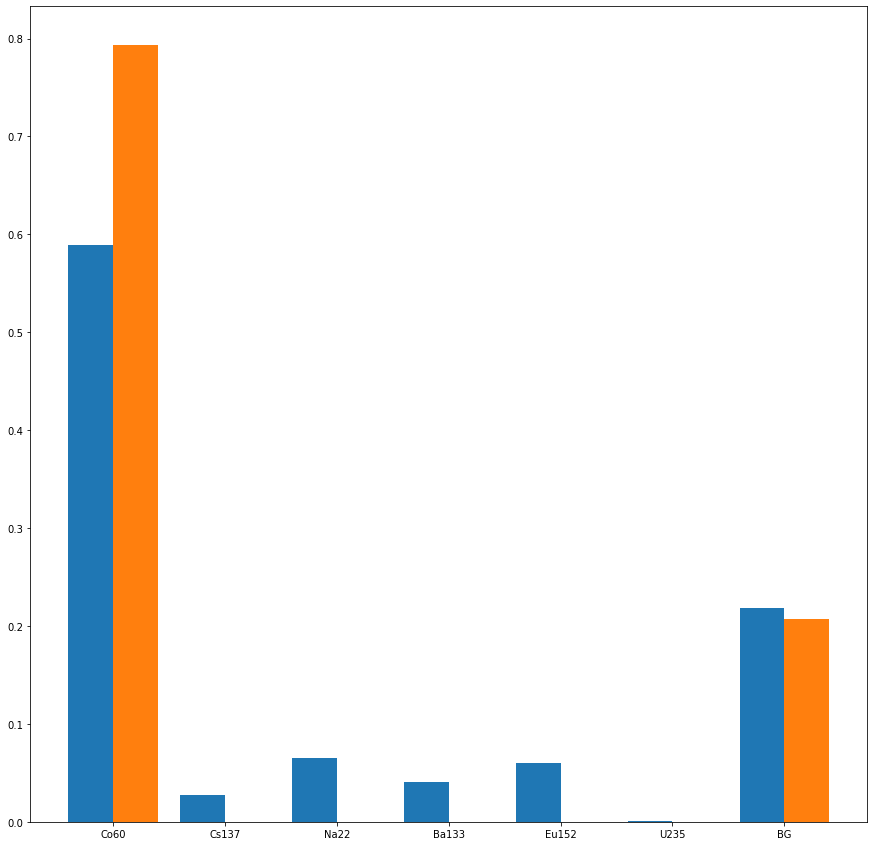

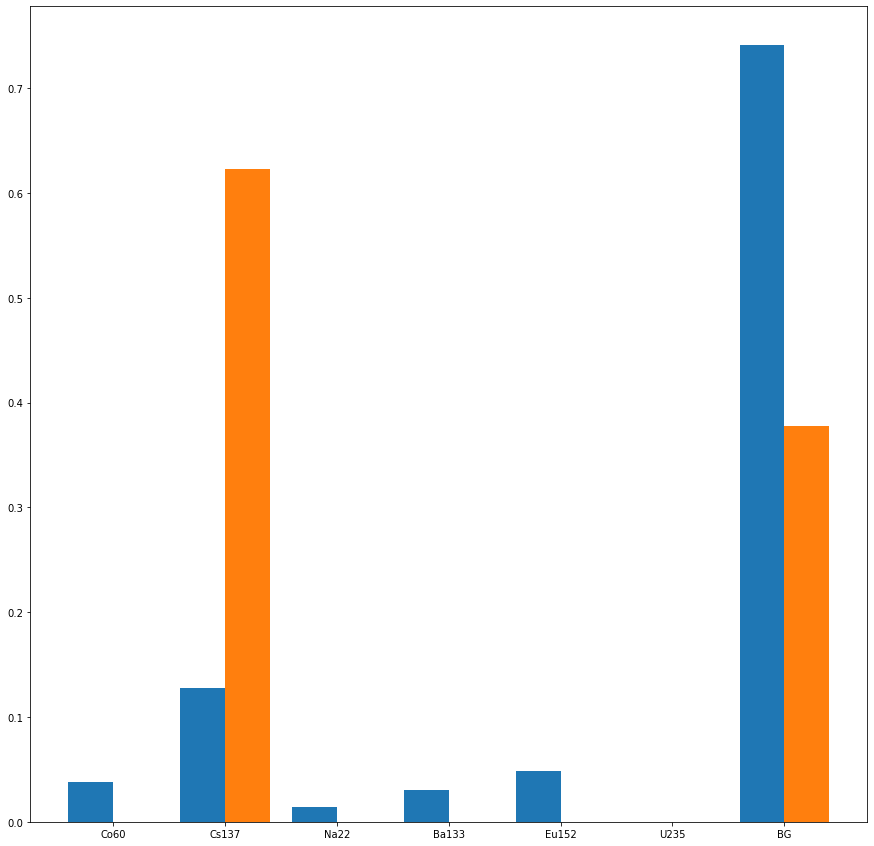

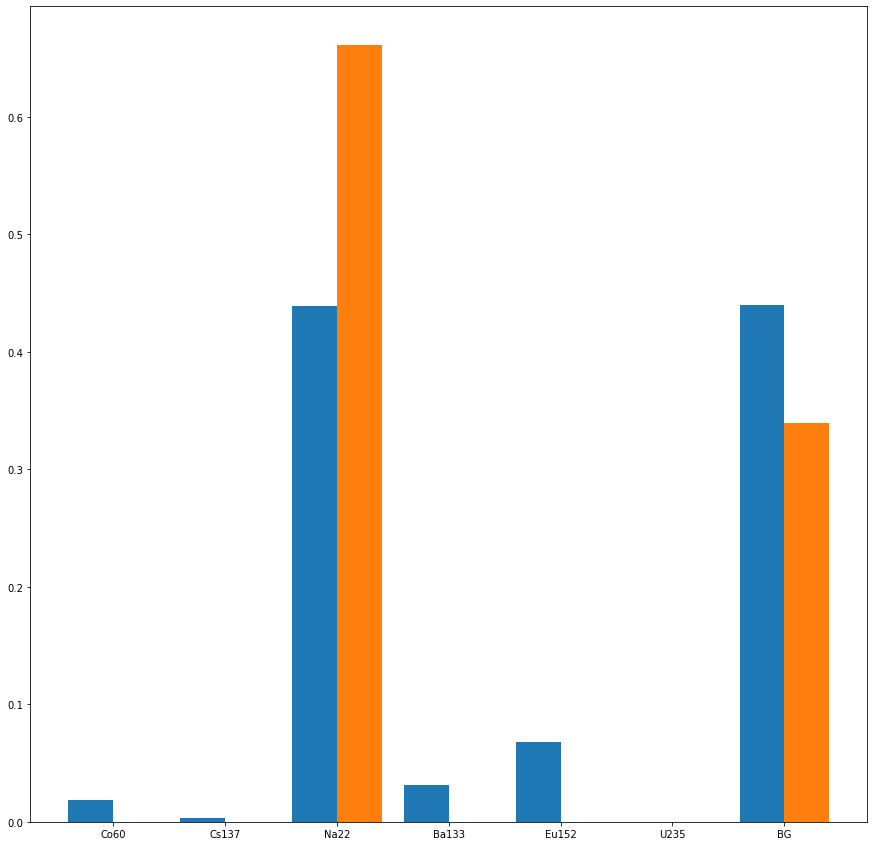

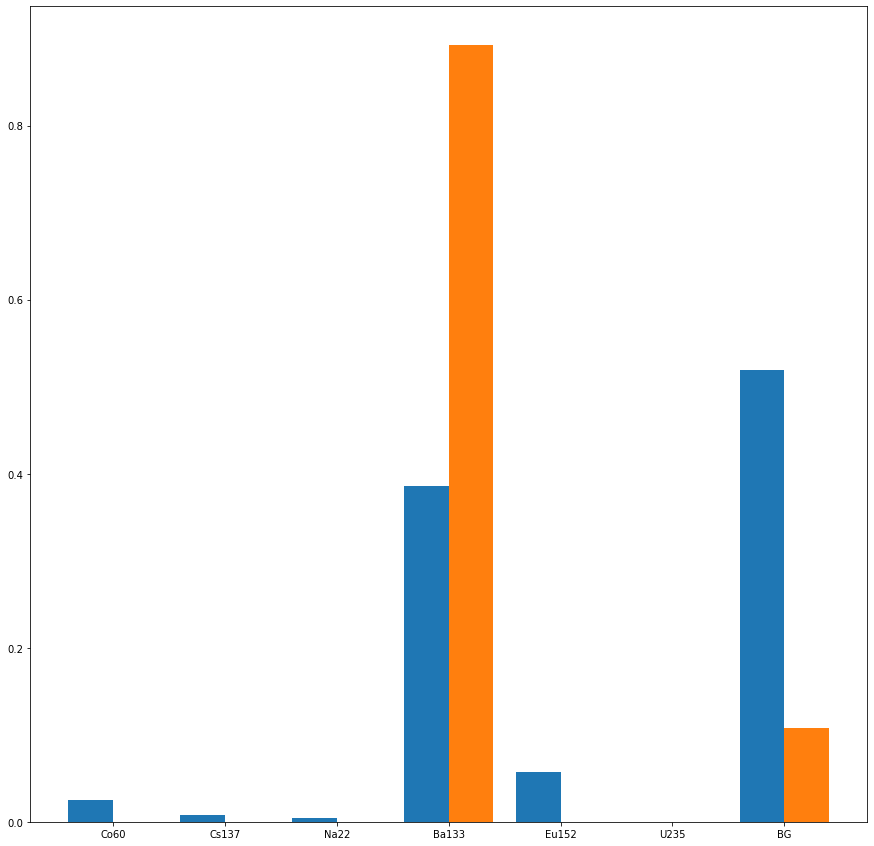

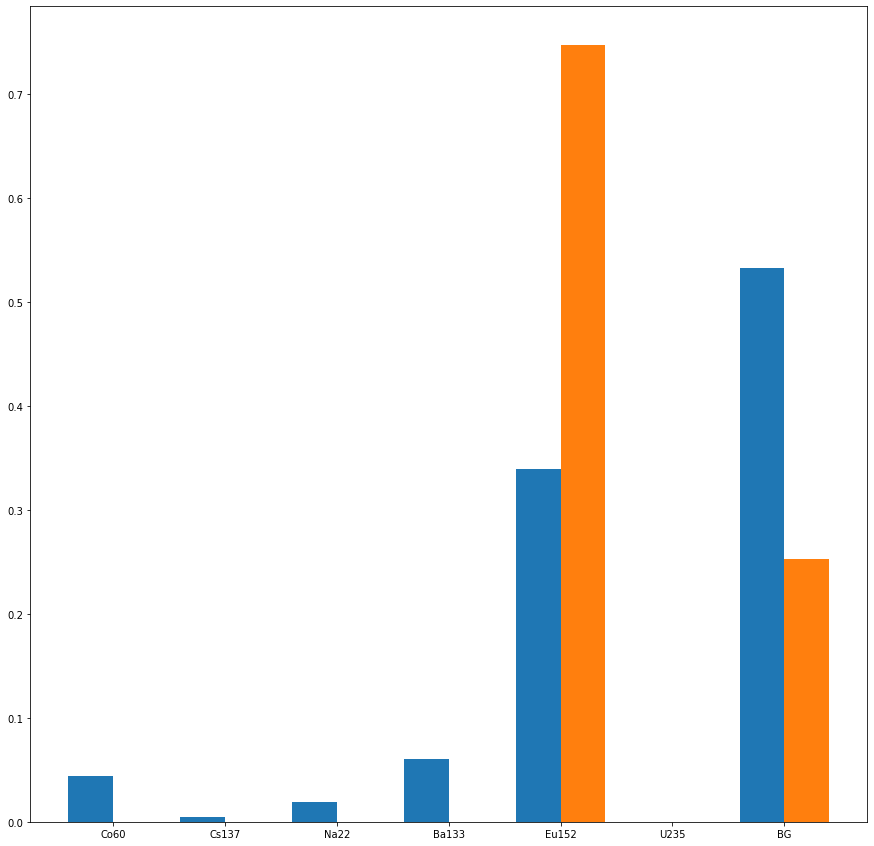

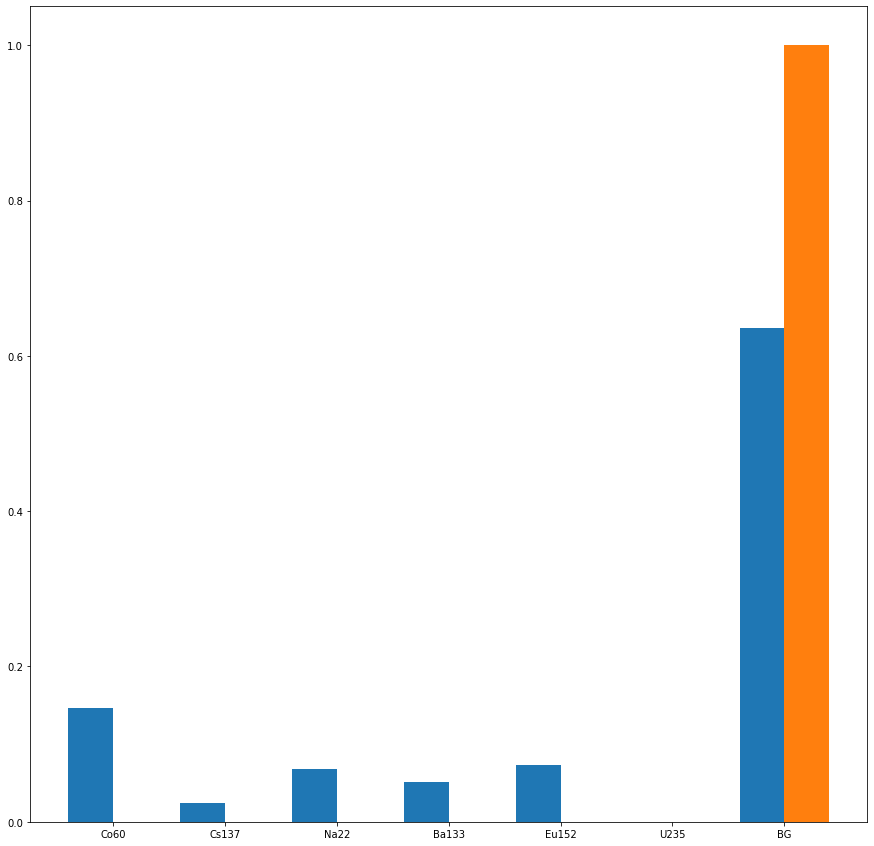

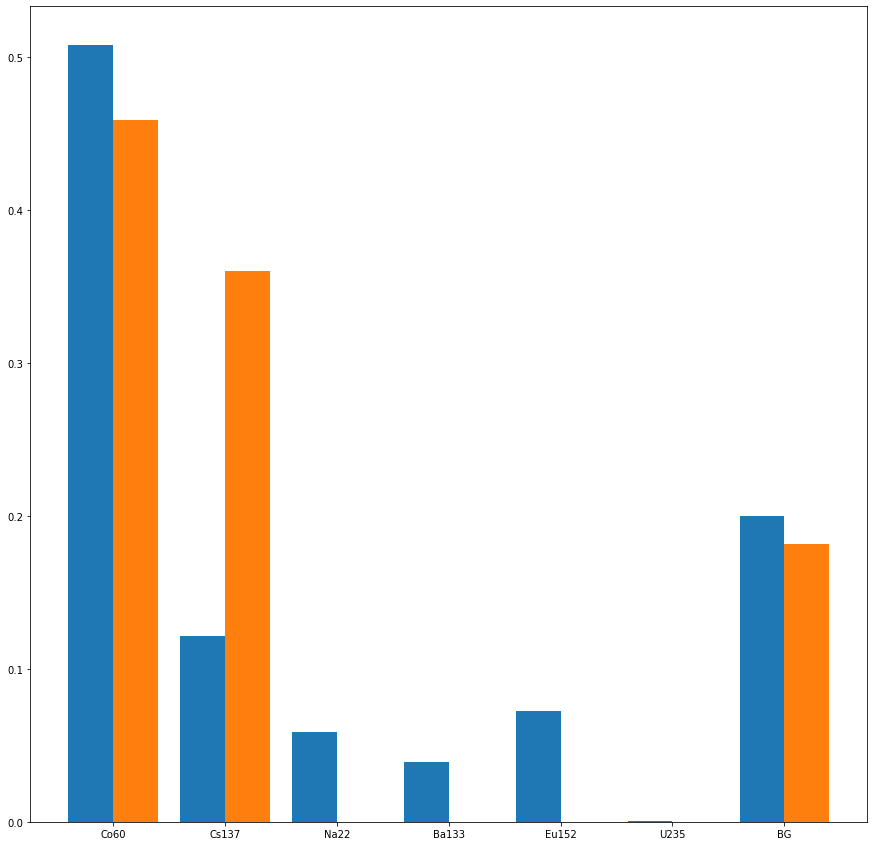

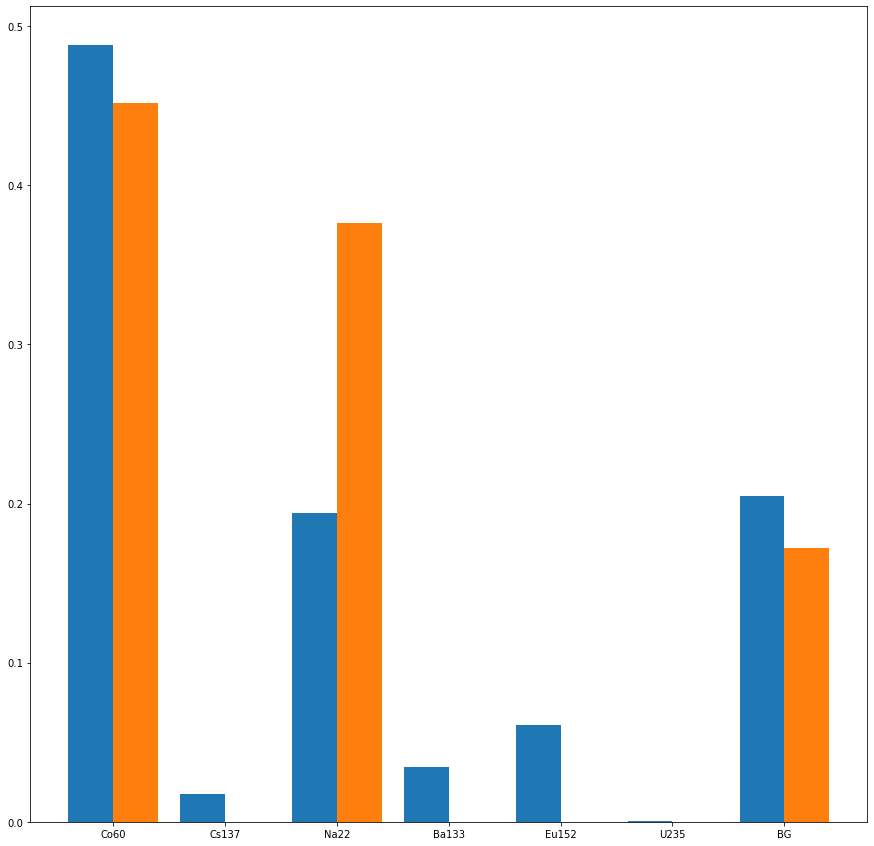

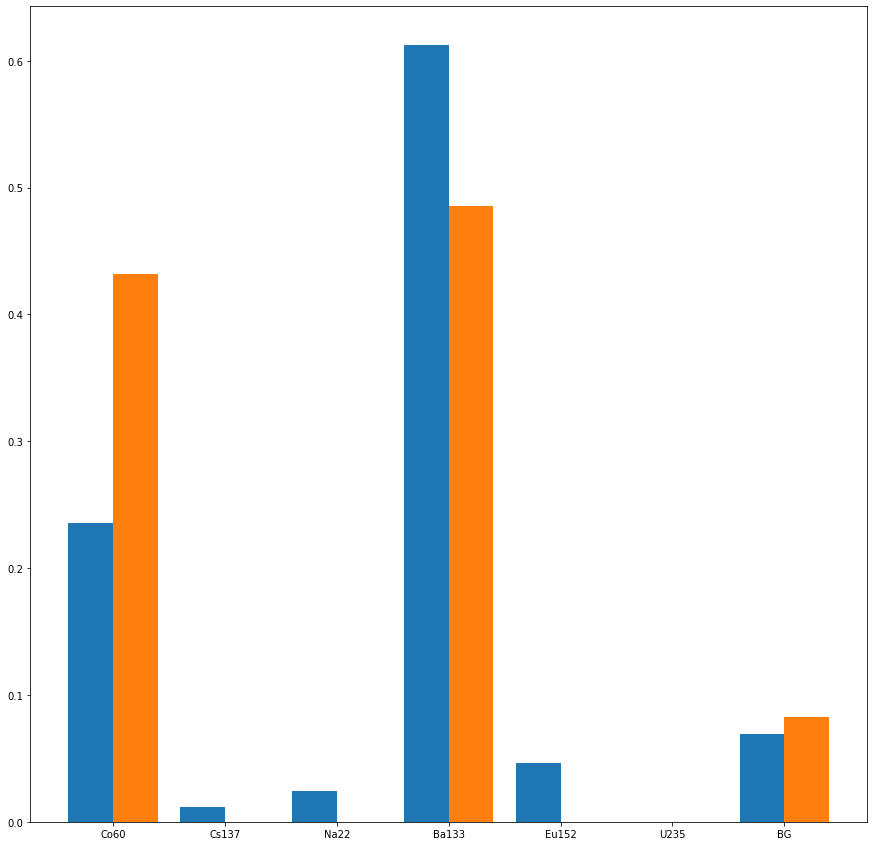

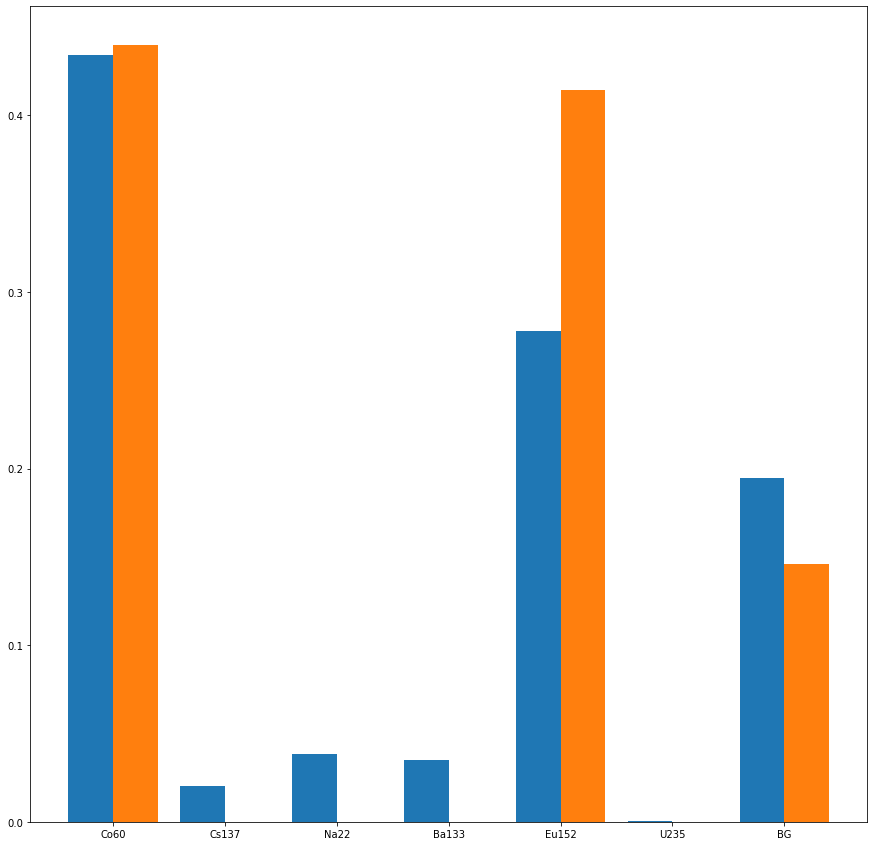

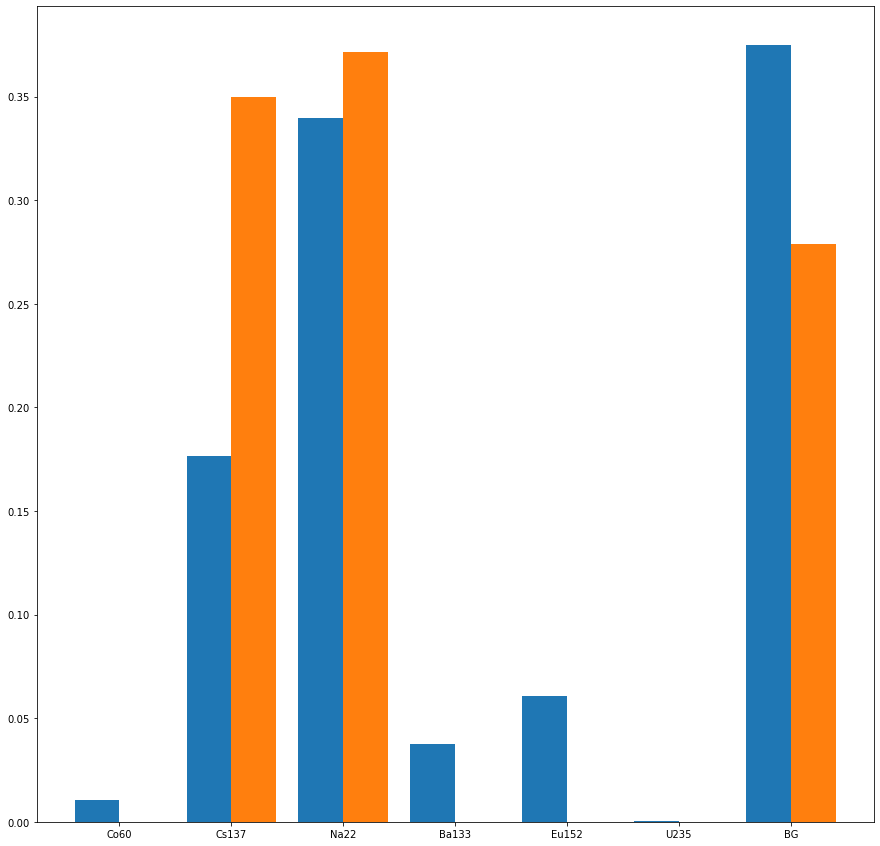

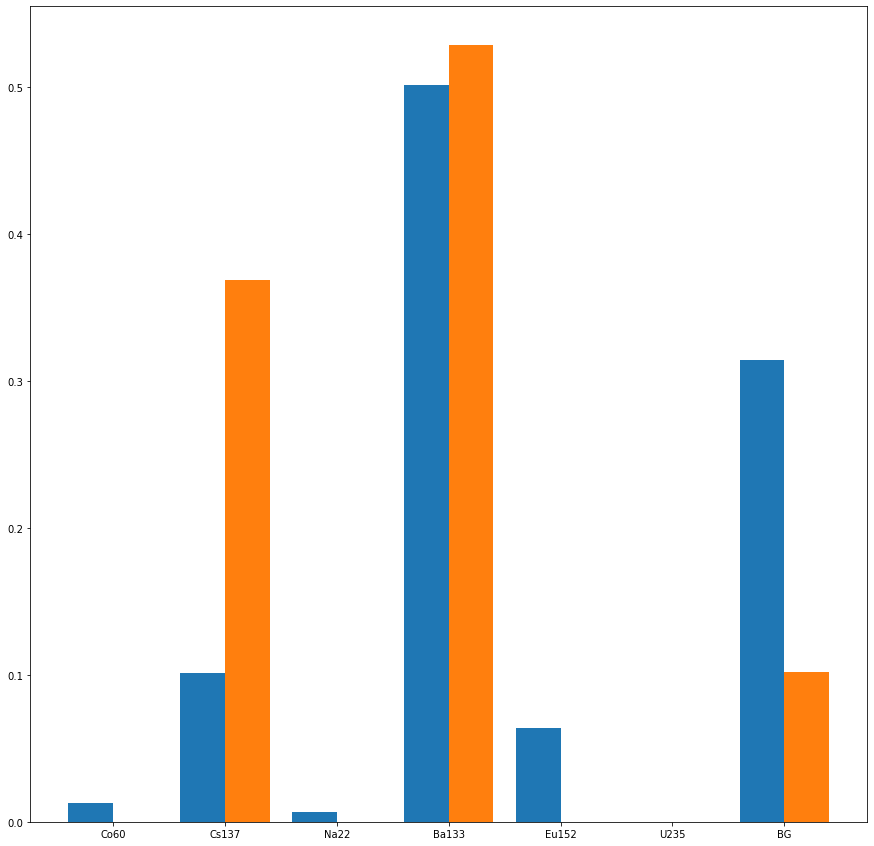

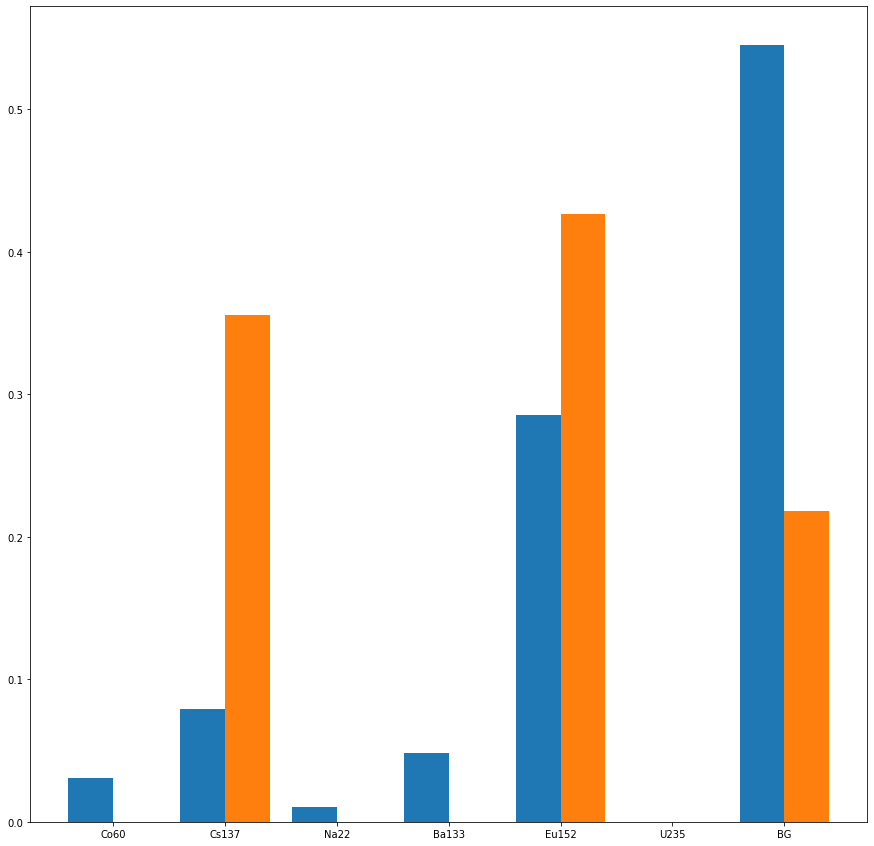

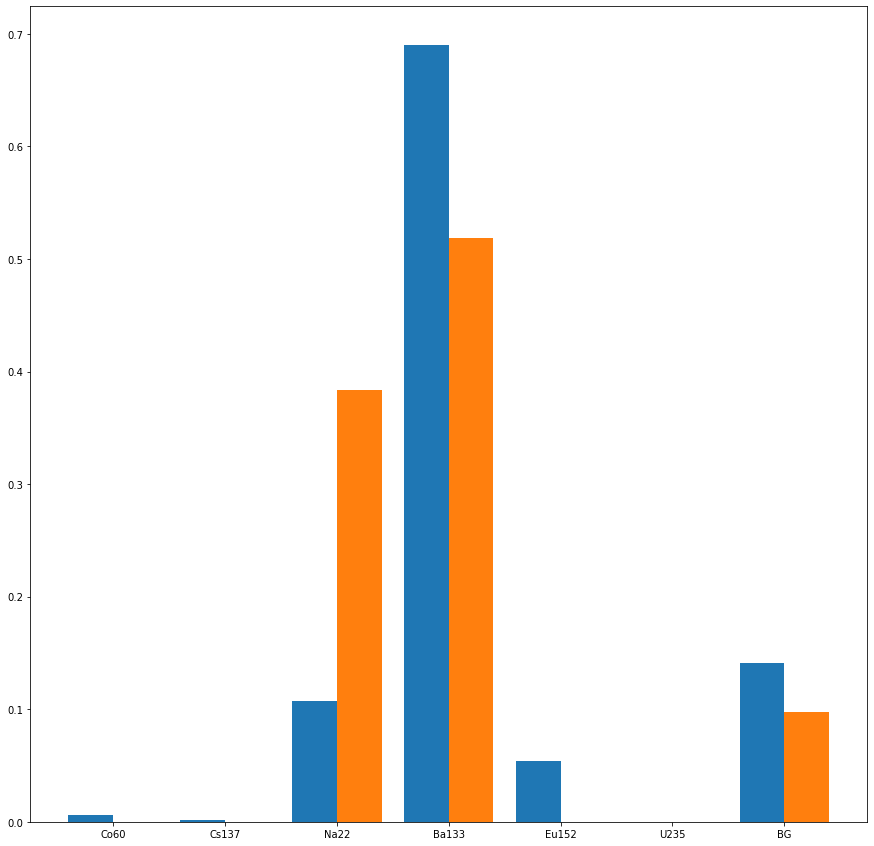

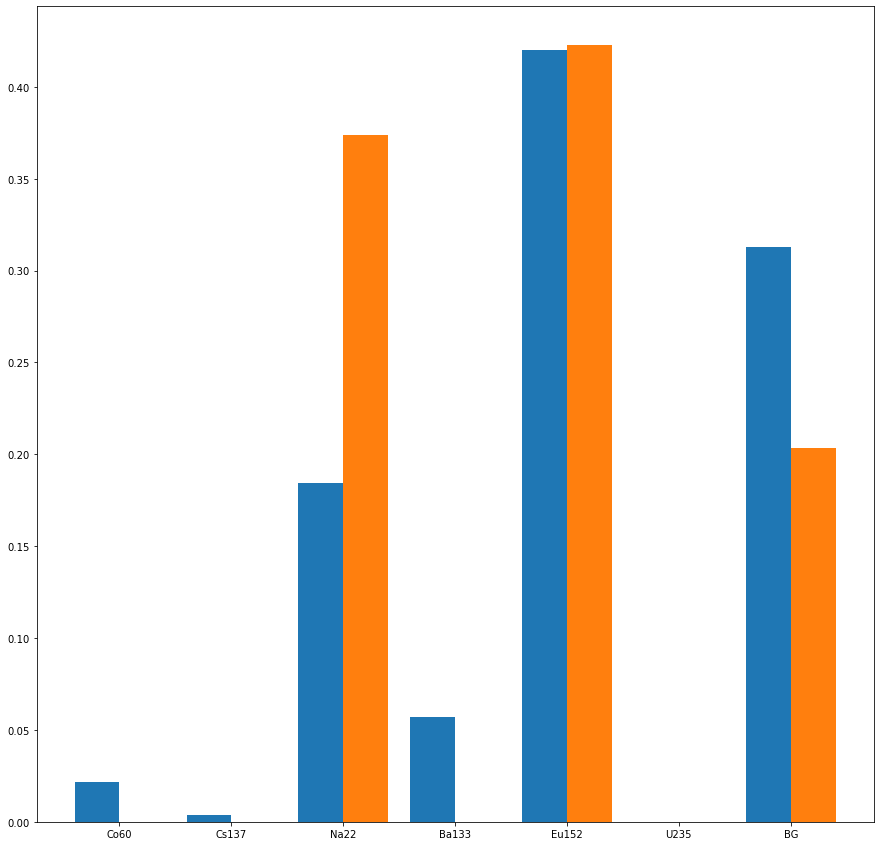

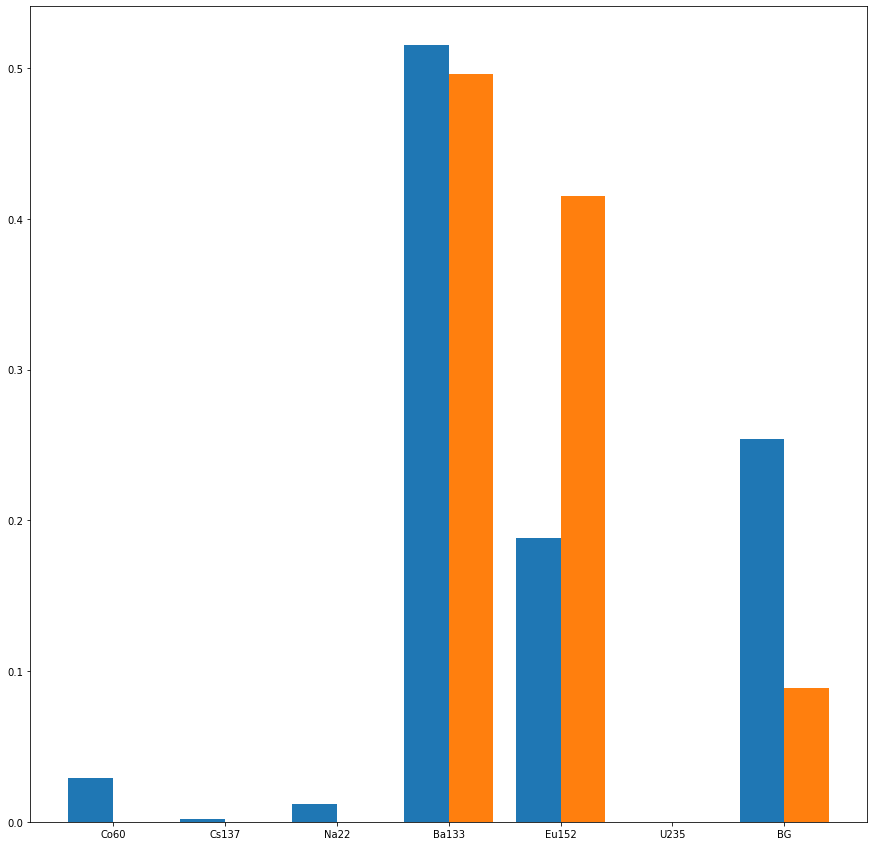

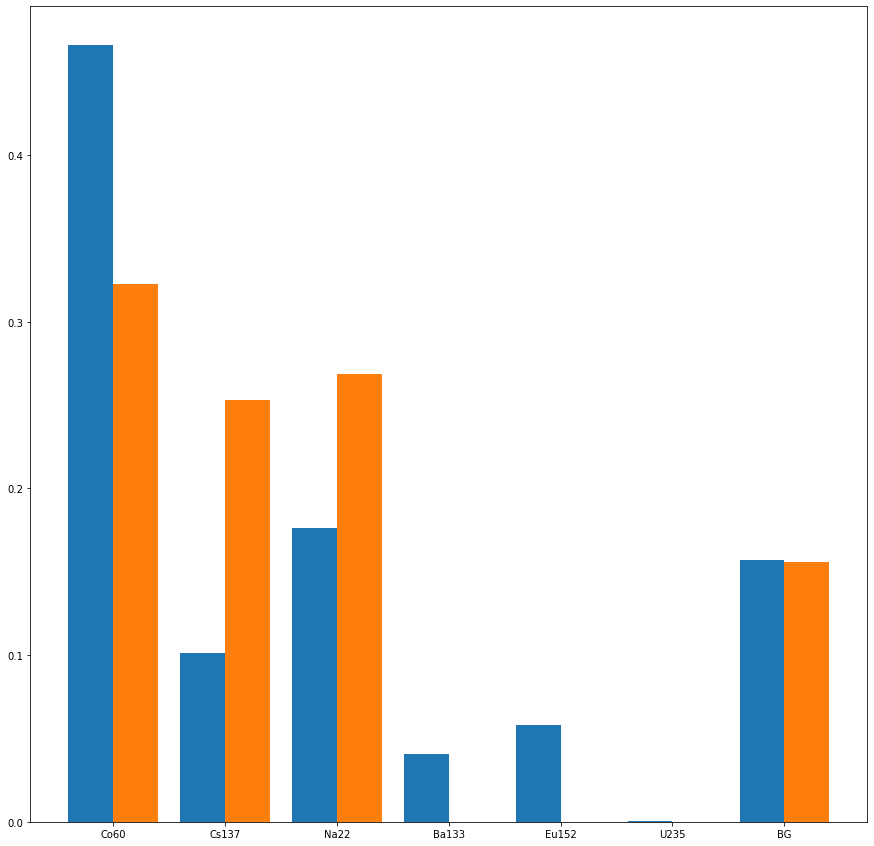

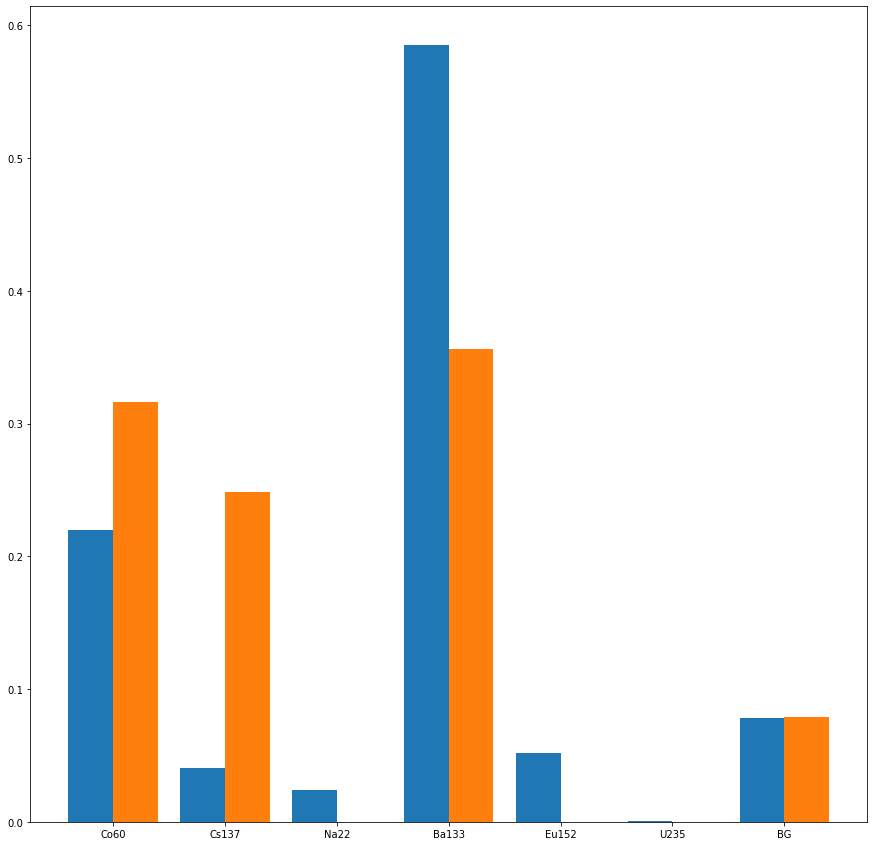

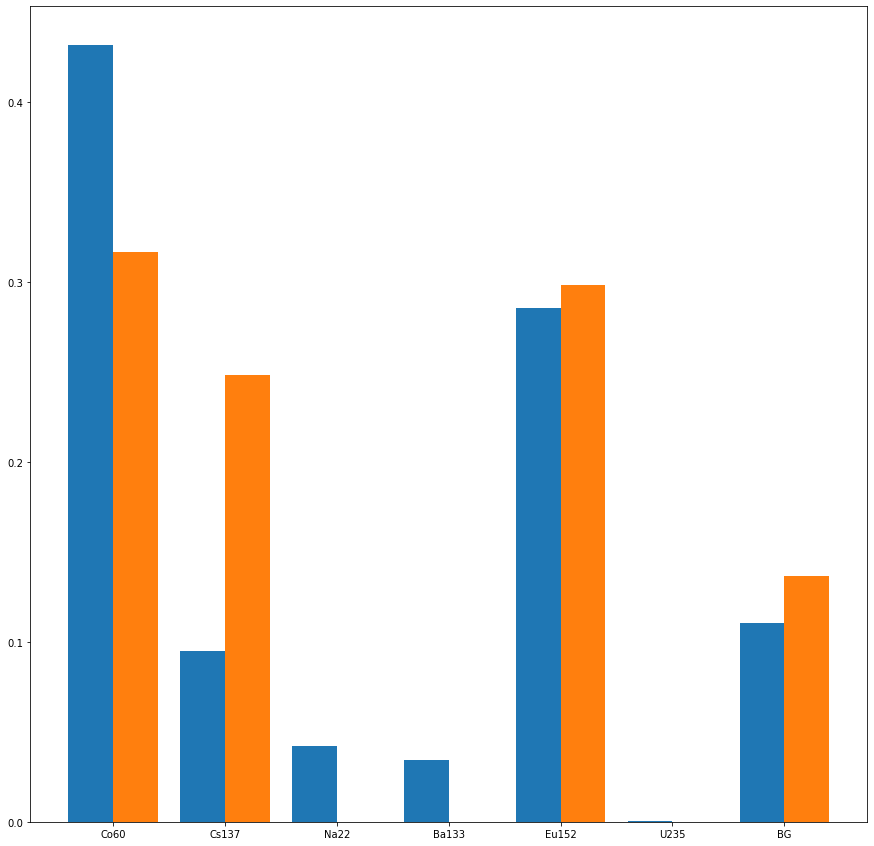

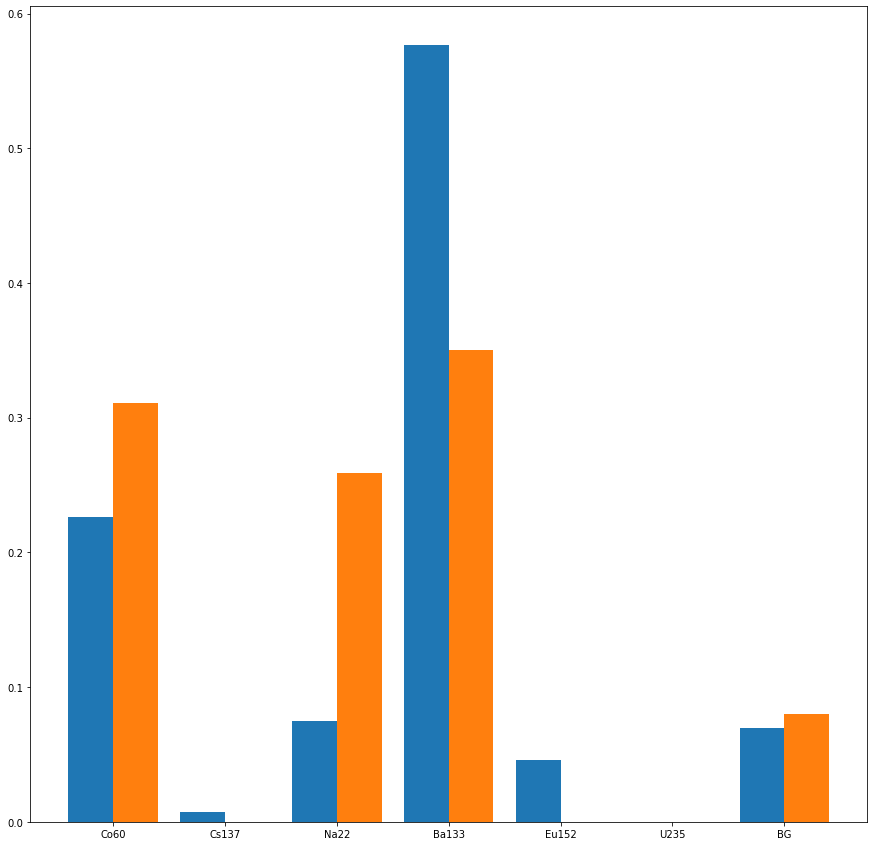

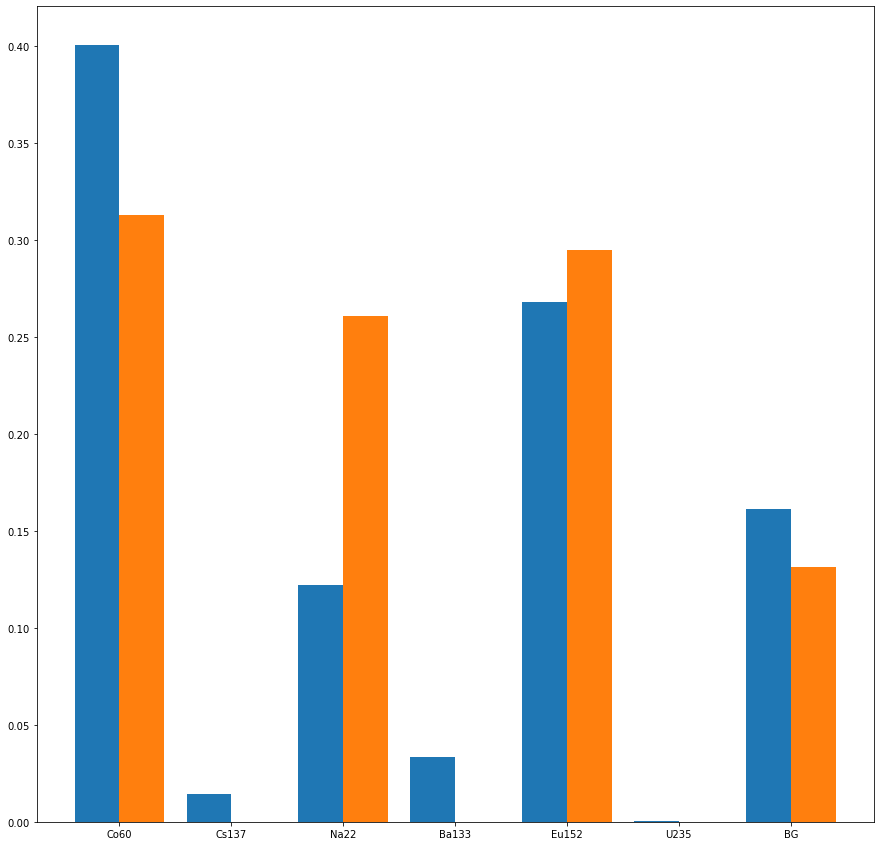

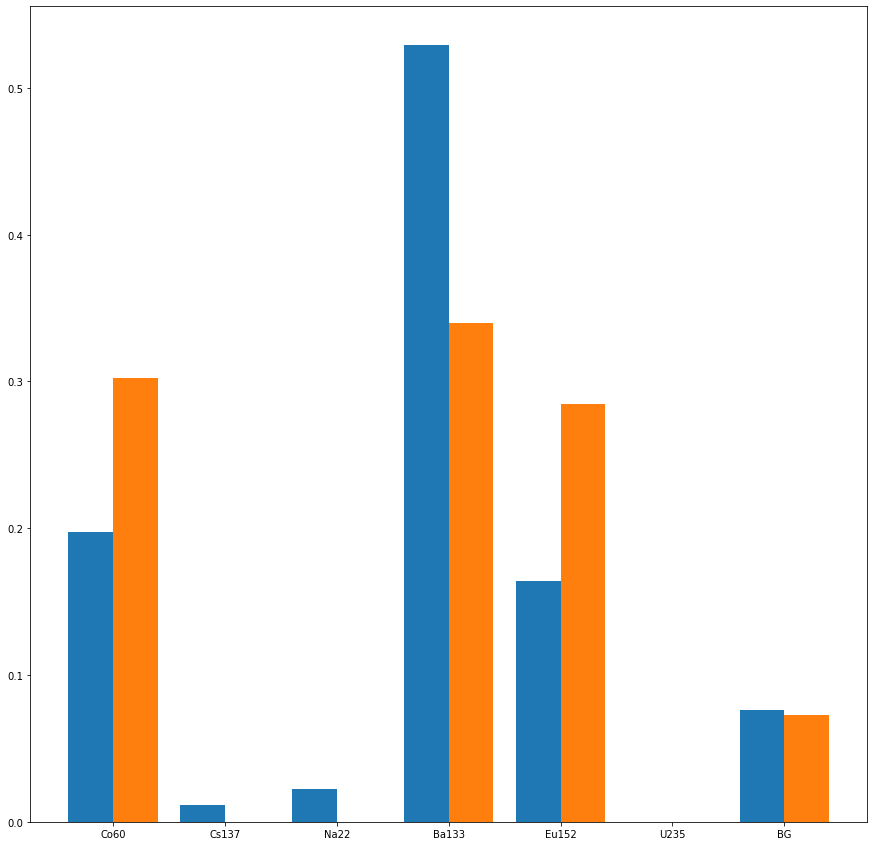

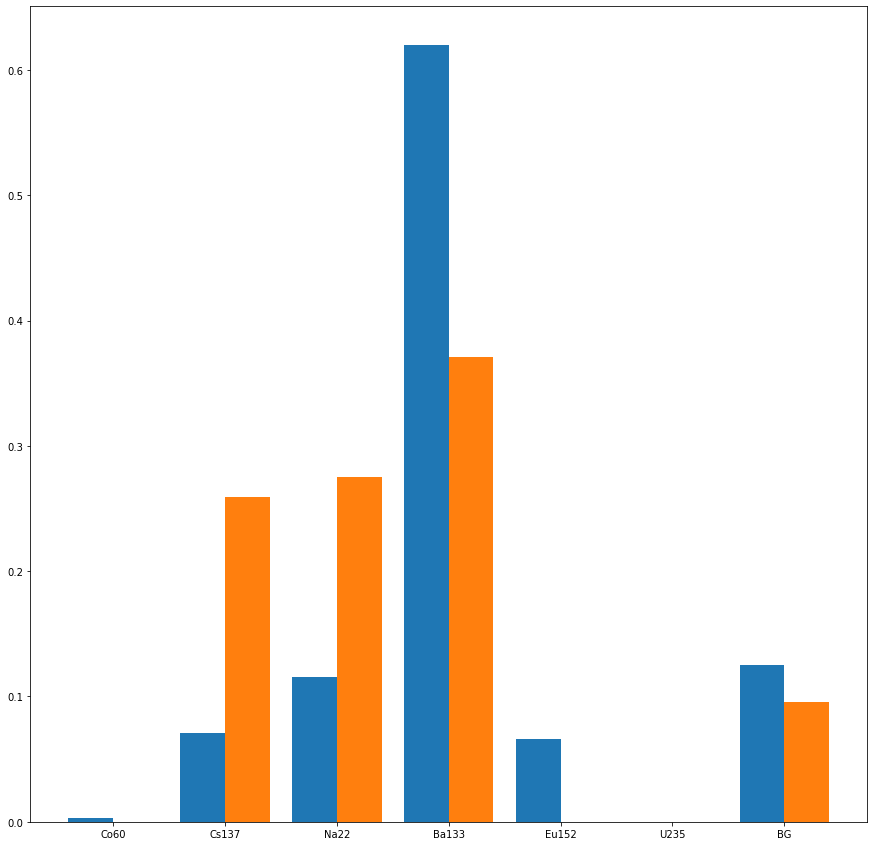

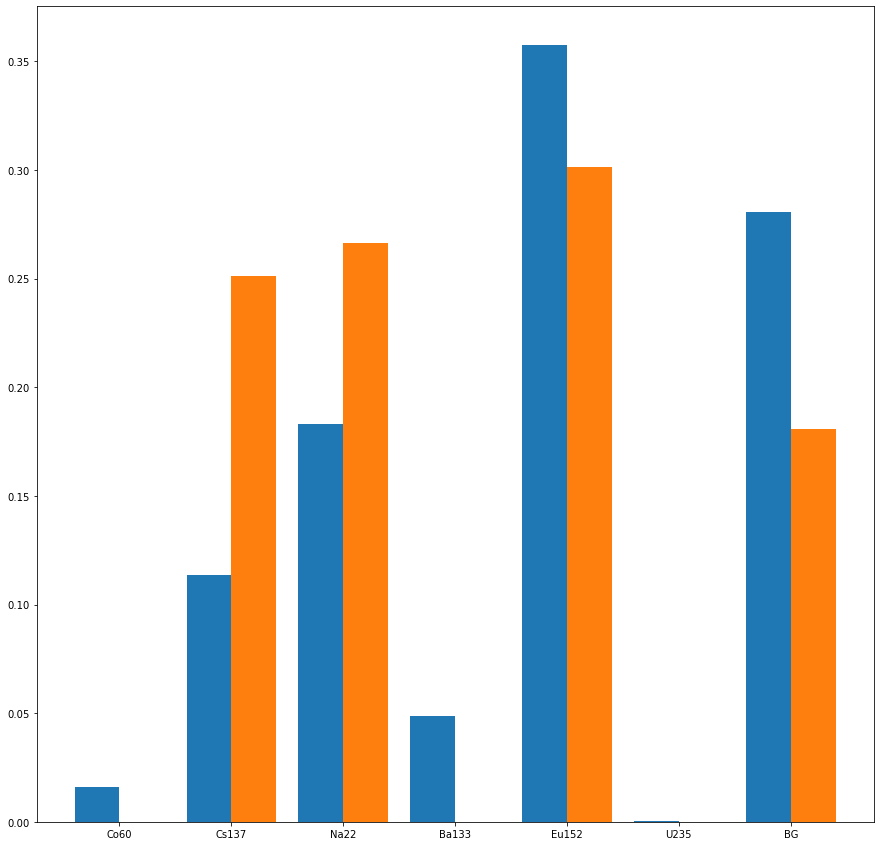

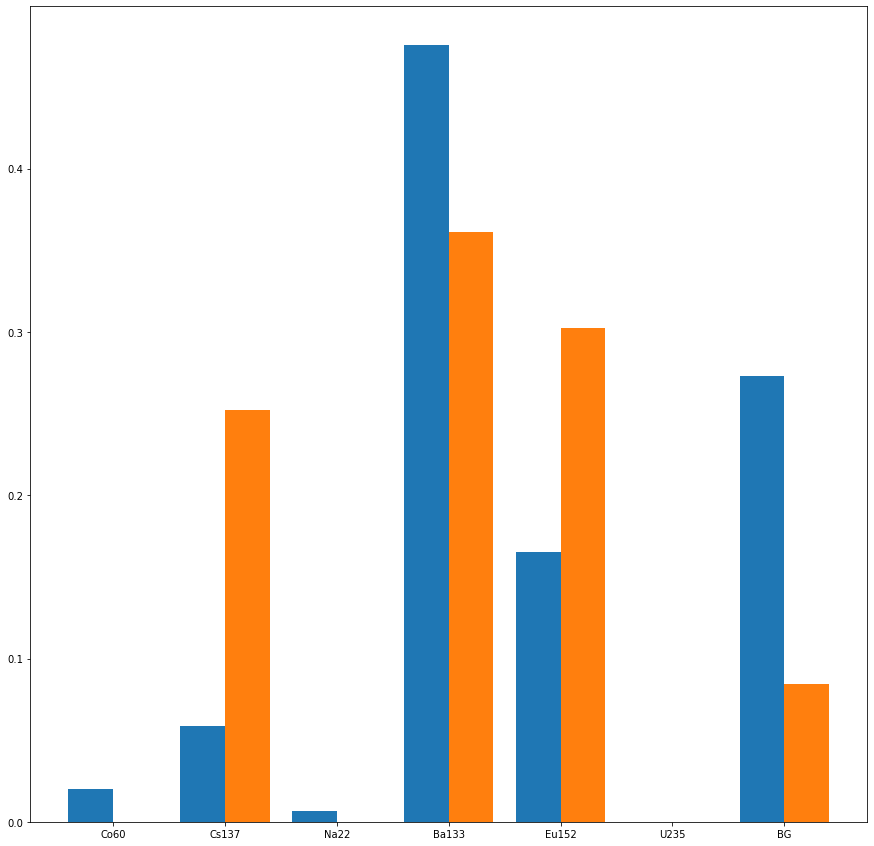

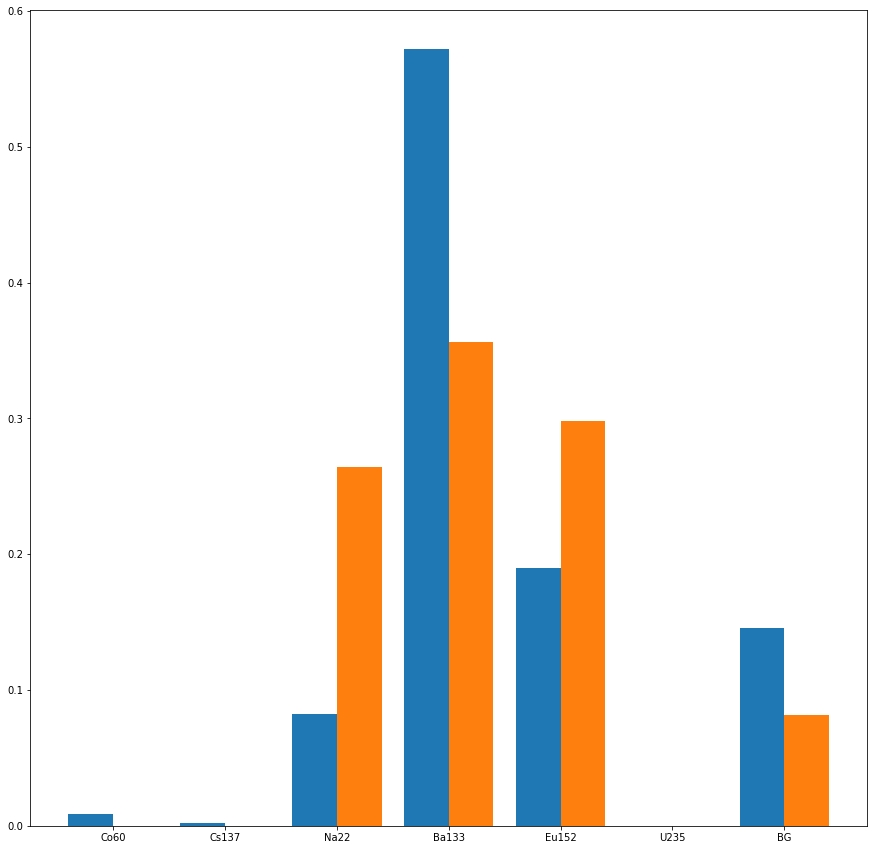

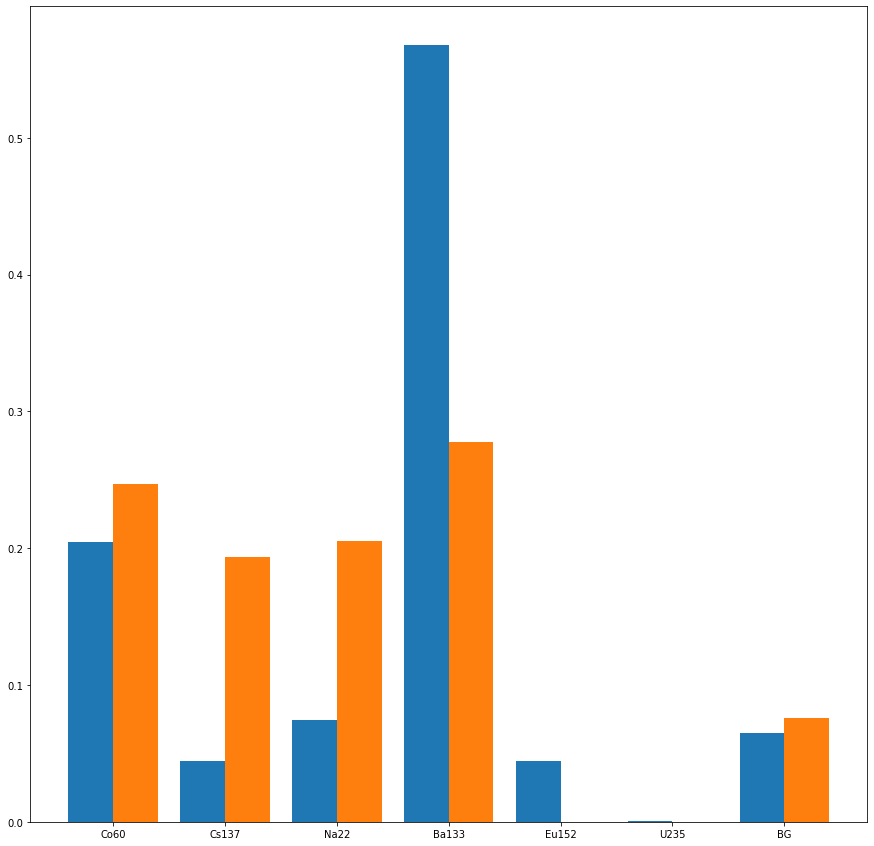

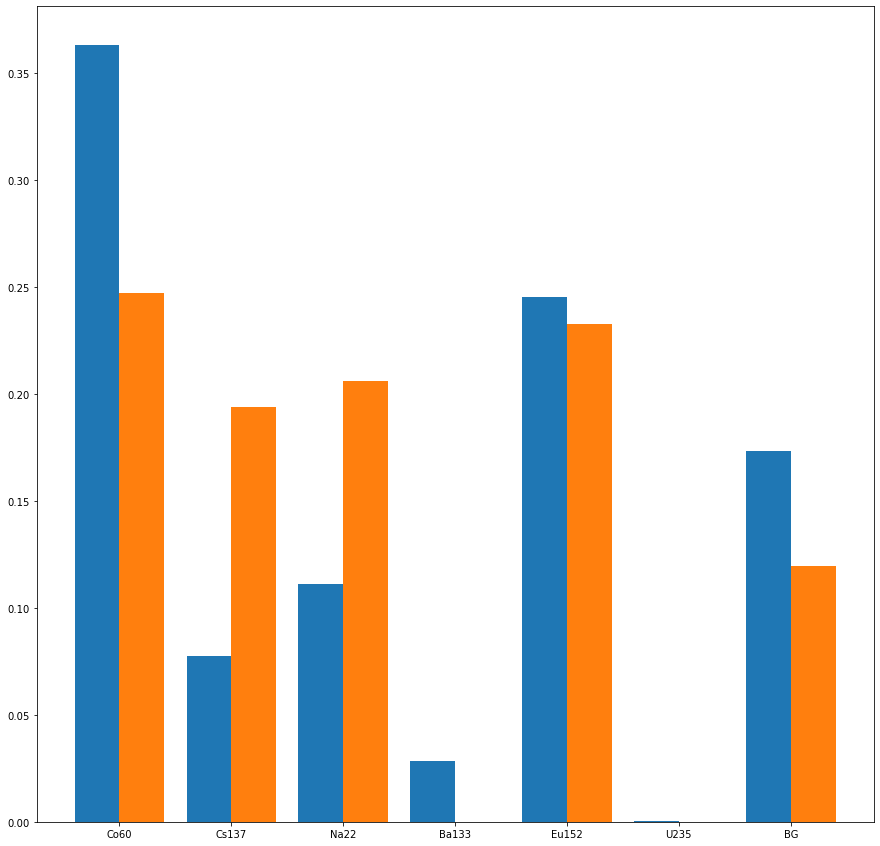

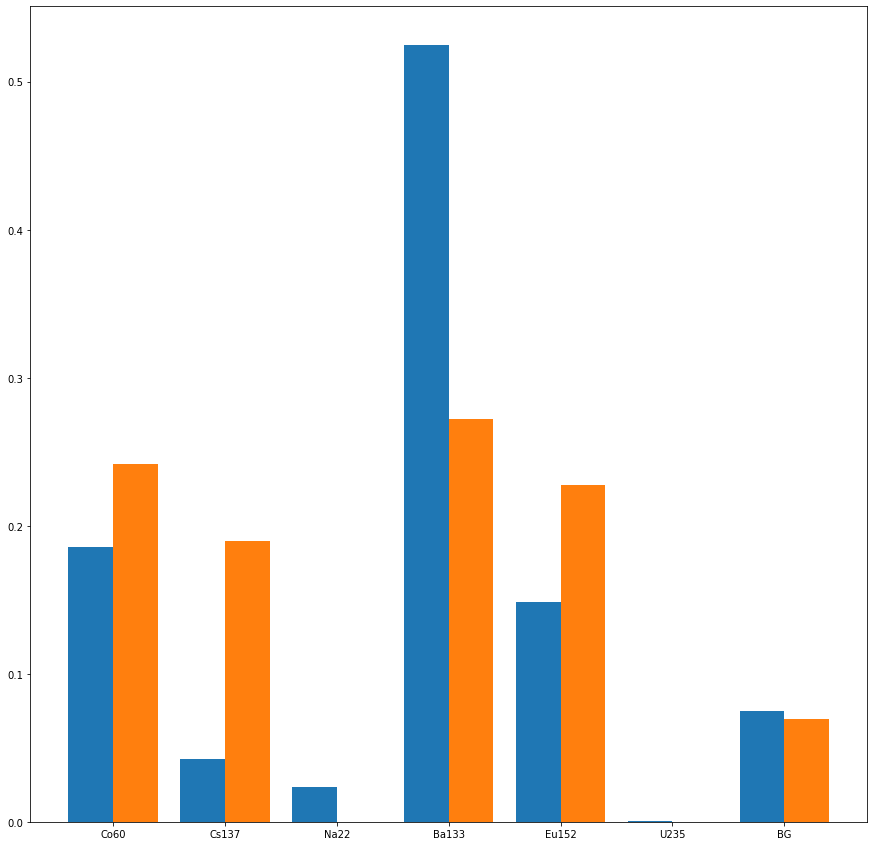

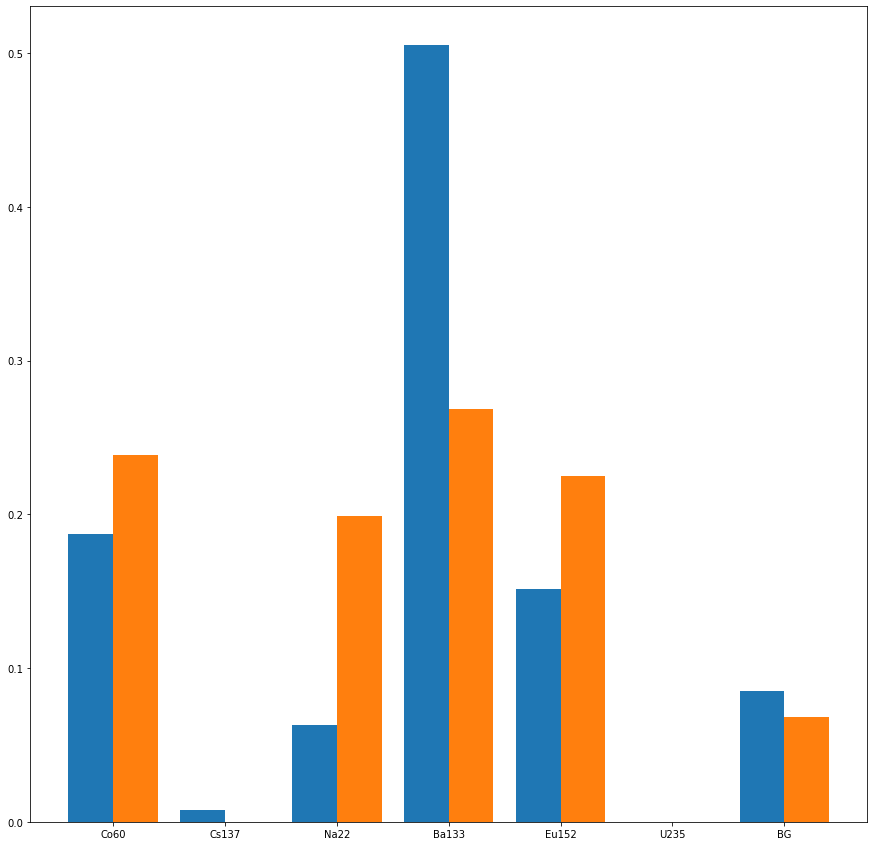

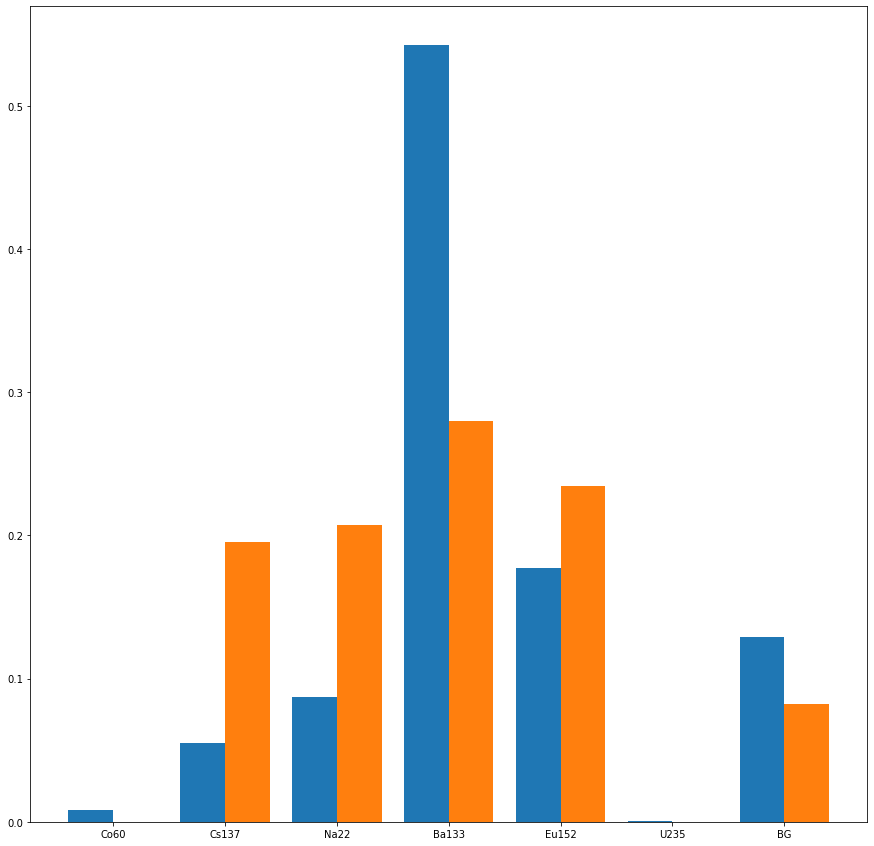

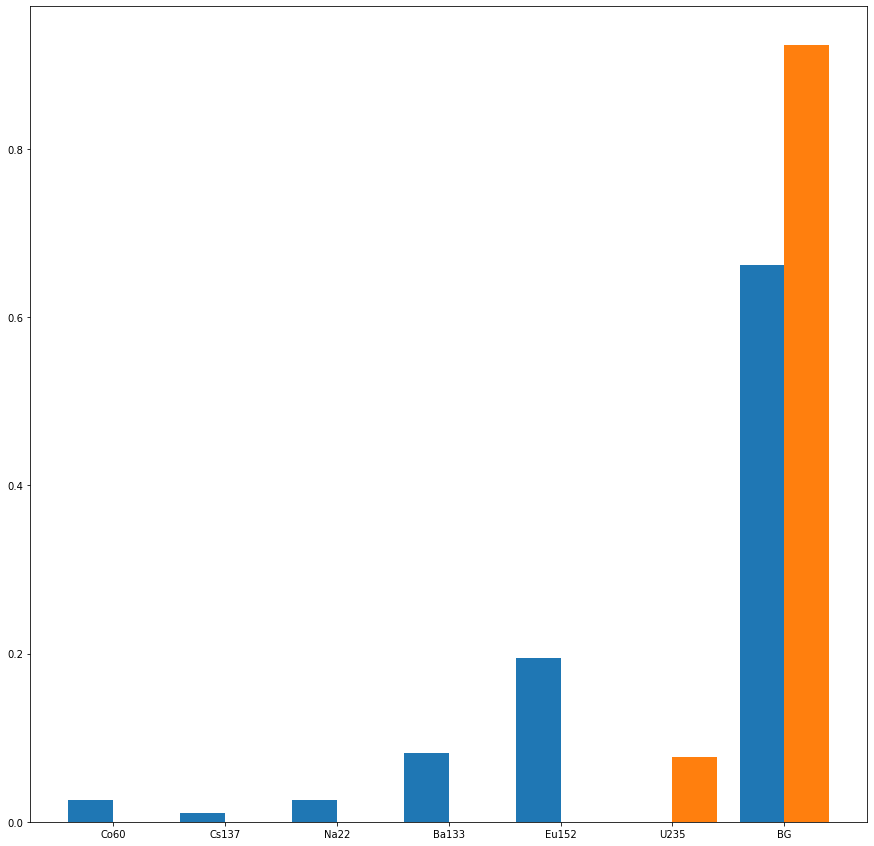

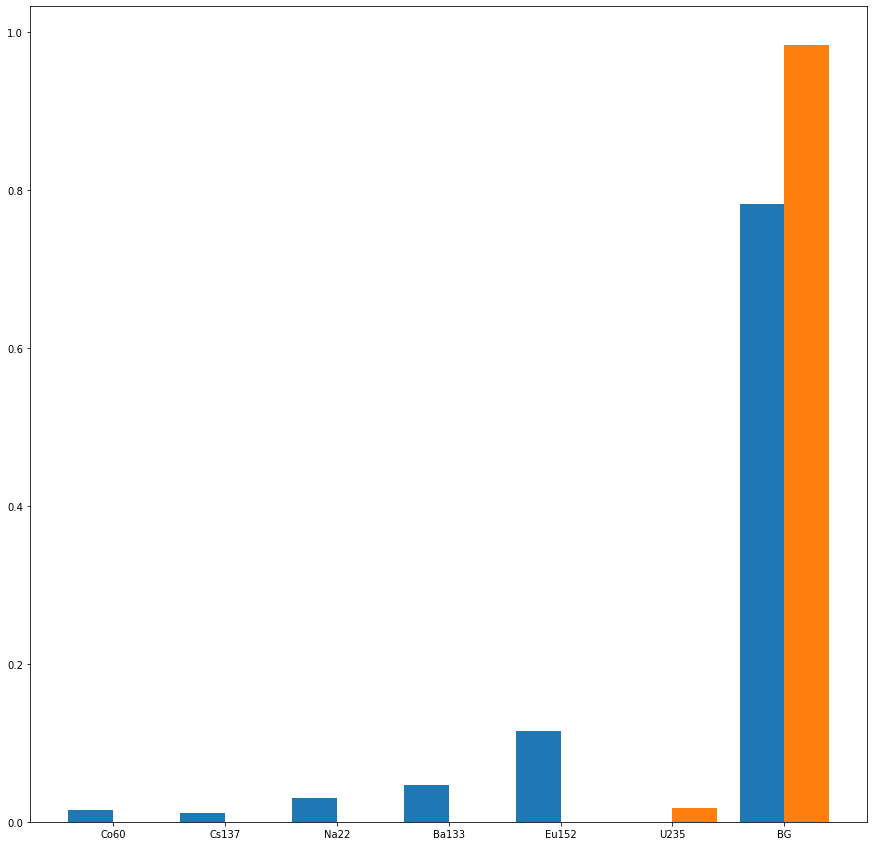

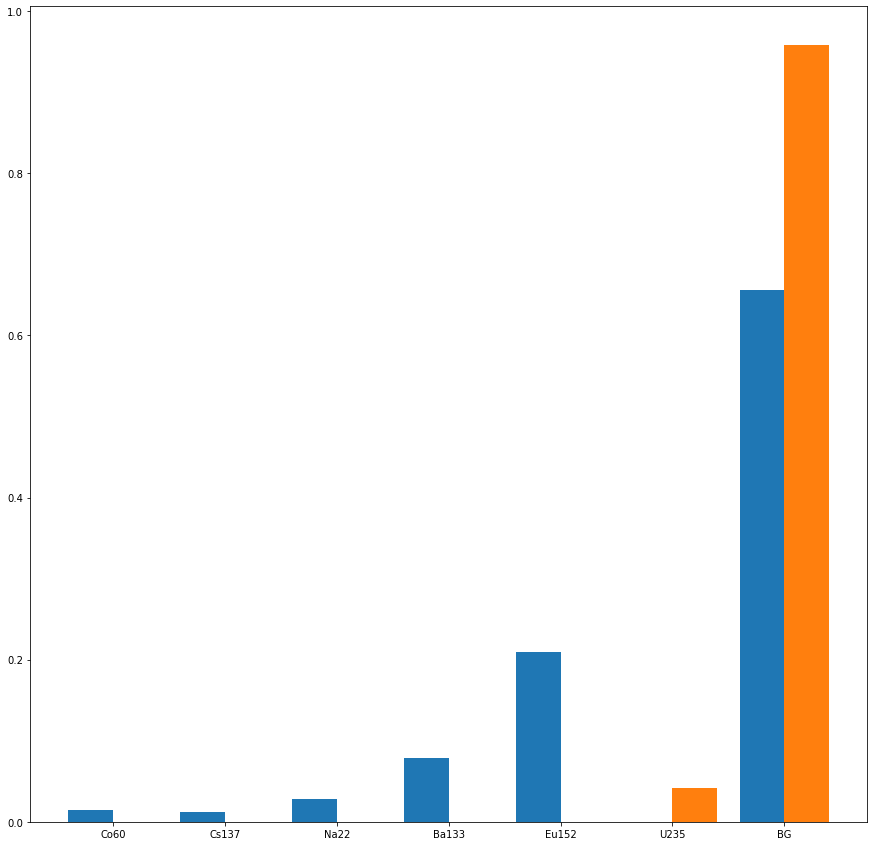

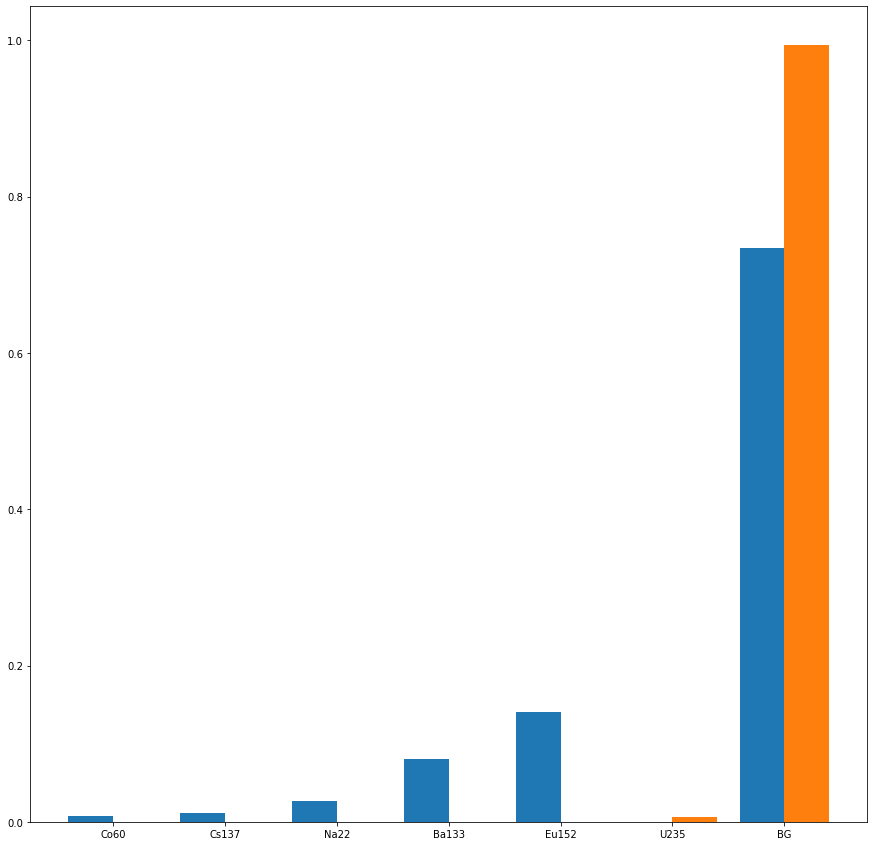

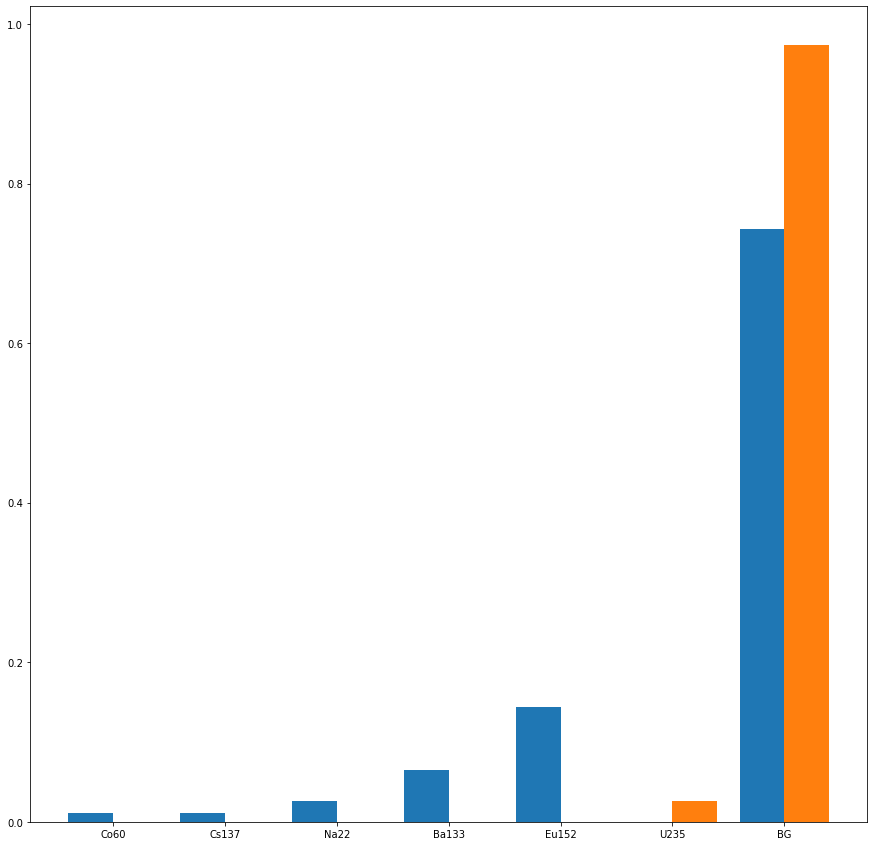

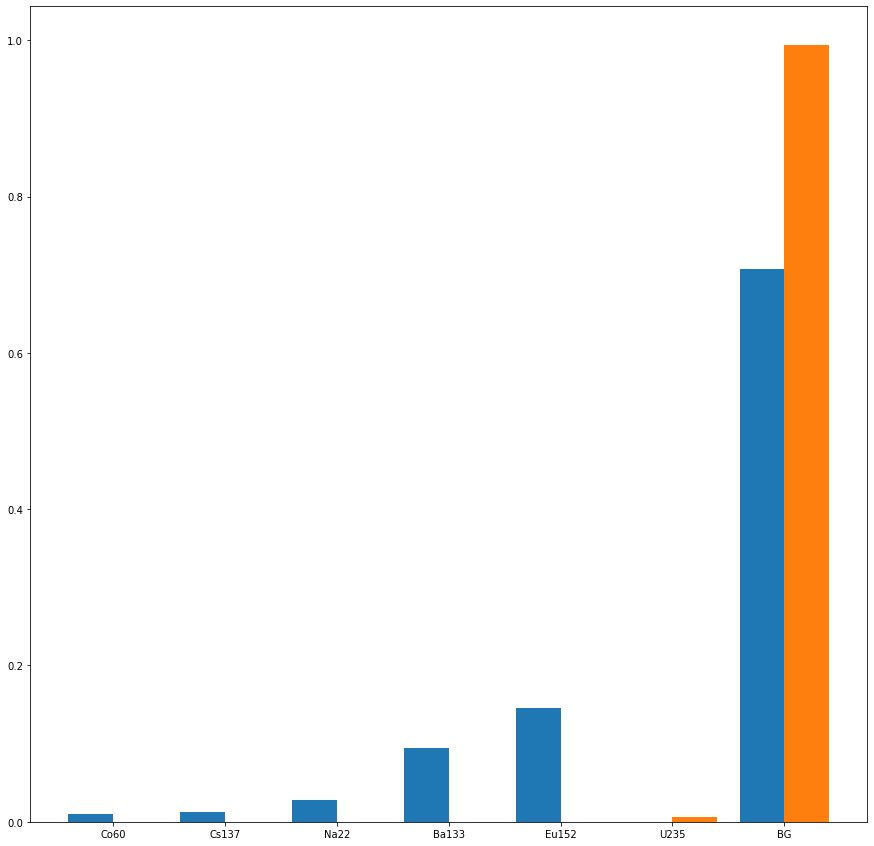

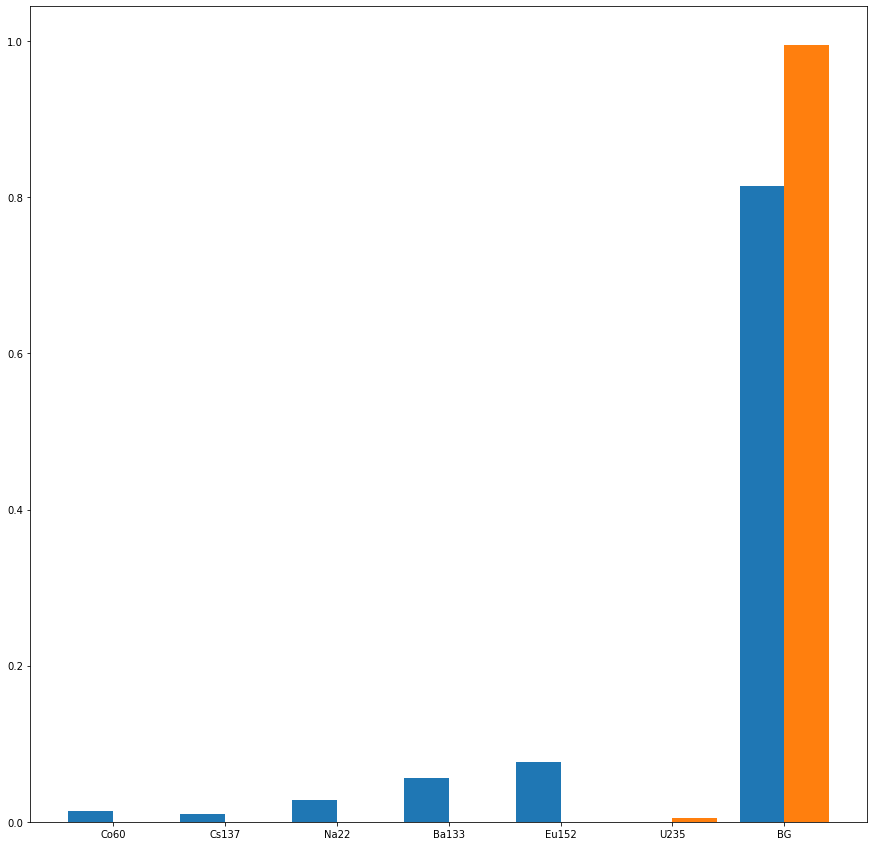

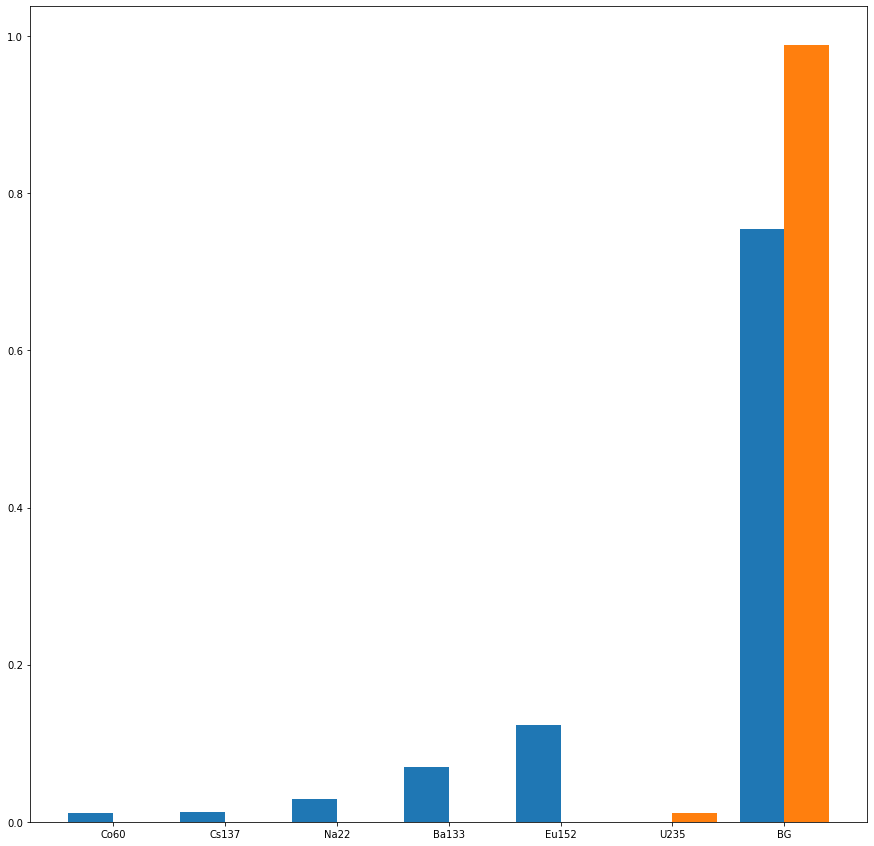

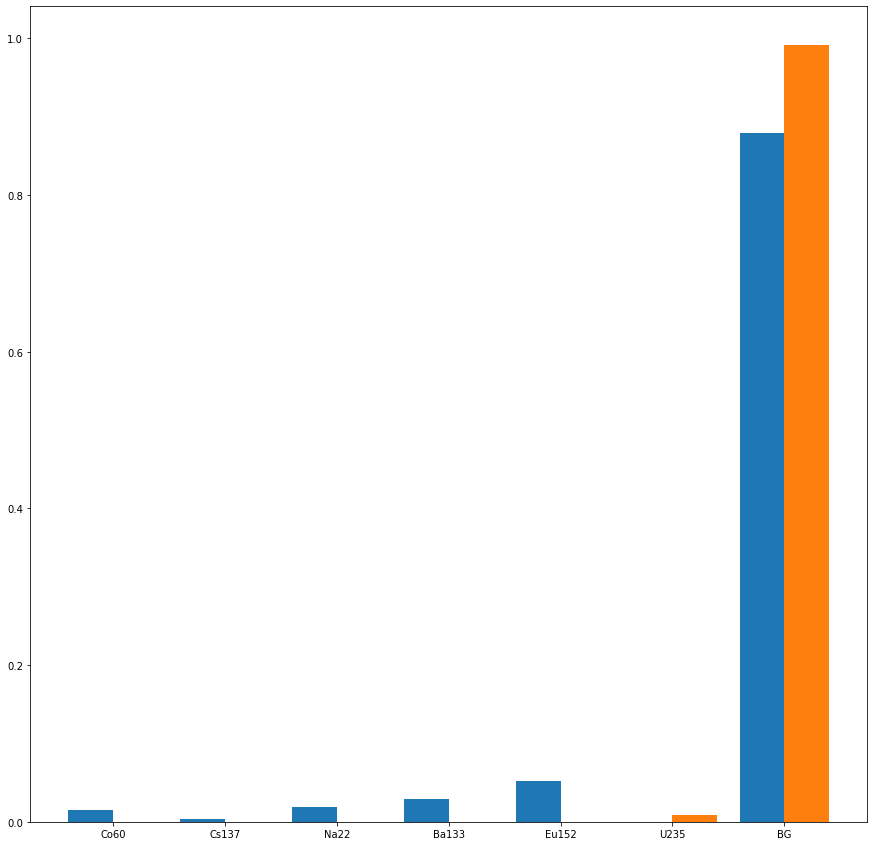

In [206]:
## Use results from Experimental learning data

#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test)
print(result_y.shape)
print(result_y[0,:])

res_y = np.delete(result_y, 5, 1) # delete U-235 axis 1 (2nd axis) of 6th

print(res_y.shape)

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("June30-5epoch-6bits-exp-BGrand-{:03}.png".format(i))

plt.show()

np.savetxt("result_y-exp.csv",result_y,delimiter=',')


result_y = VGG19model.predict(x_test_U)
print(result_y.shape)
print(result_y[0,:])

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "U235","BG"])
left = np.arange(result_y.shape[1])

for i in range(result_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, result_y[i], width=width, align='center')
    plt.bar(left+width, y_test_U[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("June30-5epoch-6bits-Uexp-BGrand-{:03}.png".format(i))

plt.show()




In [227]:
############################################
## FPT calculation
############################################

RI = res_y.T
RI_exp = y_test.T
RI[0,:]
Co_detected = np.where(RI[0,:]>RI[5,:], 1, 0)
Co_exp = np.where(RI_exp[0,:]>RI_exp[5,:], 1, -1)
Sum_Co_exp = np.where(Co_exp == 1, 1, 0)
Co_TP = np.where(Co_detected == Co_exp, 1, 0)
TP = np.sum(Co_TP)
FN = np.sum(Sum_Co_exp)-TP
FP = np.sum(Co_detected-Sum_Co_exp)

print(Co_detected)
print(Co_exp)
print(Sum_Co_exp)
print(Co_TP, np.sum(Co_TP))
print(TP, FN, FP)

print("========================================")
Cs_detected = np.where(RI[1,:]>RI[5,:], 1, 0)
Cs_exp = np.where(RI_exp[1,:]>RI_exp[5,:], 1, -1)

Sum_Cs_exp = np.where(Cs_exp == 1, 1, 0)
Cs_TP = np.where(Cs_detected == Cs_exp, 1, 0)
TP = np.sum(Cs_TP)
FN = np.sum(Sum_Cs_exp)-TP
FP = np.sum(Cs_detected-Sum_Cs_exp)

print(Cs_detected)
print(Cs_exp)
print(Sum_Cs_exp)
print(Cs_TP, np.sum(Cs_TP))
print(TP, FN, FP)

print("========================================")
Na_detected = np.where(RI[2,:]>RI[5,:], 1, 0)
Na_exp = np.where(RI_exp[2,:]>RI_exp[5,:], 1, 0)
Na_exp_TP = np.where(Na_exp == 1, 1, -1)
Na_TP = np.where(Na_detected == Na_exp_TP, 1, 0)
TP = np.sum(Na_TP)
FN = np.sum(np.where(Na_exp>Na_detected, 1,0))
FP = np.sum(np.where(Na_detected>Na_exp, 1,0))

print(Na_detected)
print(Na_exp)
print(Sum_Na_exp)
print(Na_TP, np.sum(Na_TP))
print(TP, FN, FP)



[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0]
[ 1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1 -1]
[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0]
[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0] 15
15 0 0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
  1 -1  1  1  1 -1  1]
[0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 0
0 15 -15
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1]
[0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0] 4
4 11 0
49 26 0
1.0 0.6533333333333333 79.03225806451613


In [234]:
############################################
## FPT calculation
############################################
pathsu = "/home/ndgu-visitor2/project-AI/kimura_DNNexample/result_y/7bits-ComptonEdgeFitted-100epochs/"
RI = np.loadtxt(pathsu+'result_y.csv', delimiter=',')
print(RI.shape)
print(RI[0,:])
BG_ccr = RI[:, 6]+ RI[:, 7] + RI[:, 8] + RI[:, 9] #  238, Th, Ra, K
BG_ccr = BG_ccr.reshape(BG_ccr.shape[0], 1)
RI = np.hstack((RI[:, :5], BG_ccr))
RI = RI.T
print(RI.shape)

################################
# RI = res_y.T
RI_exp = y_test.T
TP = []
FN = []
FP = []

for i in range(len(RI)-1):
    RI_detected = np.where(RI[i,:]>RI[5,:], 1, 0)
    RI_EXP = np.where(RI_exp[i,:]>RI_exp[5,:], 1, 0)
    RI_EXP_TP = np.where(RI_EXP == 1, 1, -1)
    RI_TP = np.where(RI_detected == RI_EXP_TP, 1, 0)
    TP.append(np.sum(RI_TP))
    FN.append(np.sum(np.where(RI_EXP>RI_detected, 1,0)))
    FP.append(np.sum(np.where(RI_detected>RI_EXP, 1,0)))

Tp = np.sum(np.stack(TP))
Fn = np.sum(np.stack(FN))
Fp = np.sum(np.stack(FP))

print(Tp, Fn, Fp)

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
F_score = 100*2*precision*recall/(precision + recall)

print(precision, recall, F_score)


(31, 10)
[4.84779269e-01 3.88203226e-02 4.21047956e-02 2.47798674e-02
 1.64994404e-01 6.85637817e-02 2.13259459e-03 1.36561692e-01
 3.71686481e-02 9.46006840e-05]
(6, 31)
67 8 5
0.9305555555555556 0.8933333333333333 91.15646258503402


In [236]:
############################################
## FPT calculation for uranium
############################################
RI = np.loadtxt(pathsu+'result_y_U.csv', delimiter=',')
print(RI.shape)
print(RI[0,:])
BG_ccr = RI[:, 6]+ RI[:, 7] + RI[:, 8] + RI[:, 9] #  238, Th, Ra, K
BG_ccr = BG_ccr.reshape(BG_ccr.shape[0], 1)
RI = np.hstack((RI[:, :6], BG_ccr))
RI = RI.T
print(RI.shape)

################################
# RI = result_y.T
RI_exp = y_test_U.T
TP = []
FN = []
FP = []

for i in range(len(RI)-1):
    RI_detected = np.where(RI[i,:]>RI[6,:], 1, 0)
    RI_EXP = np.where(RI_exp[i,:]>RI_exp[6,:], 1, 0)
    RI_EXP_TP = np.where(RI_EXP == 1, 1, -1)
    RI_TP = np.where(RI_detected == RI_EXP_TP, 1, 0)
    TP.append(np.sum(RI_TP))
    FN.append(np.sum(np.where(RI_EXP>RI_detected, 1,0)))
    FP.append(np.sum(np.where(RI_detected>RI_EXP, 1,0)))

Tp = np.sum(np.stack(TP))
Fn = np.sum(np.stack(FN))
Fp = np.sum(np.stack(FP))

print(Tp, Fn, Fp)

precision = Tp/(Tp+Fp)
recall = Tp/(Tp+Fn)
F_score = 100*2*precision*recall/(precision + recall)

print(precision, recall, F_score)


(40, 10)
[5.05957961e-01 4.28893939e-02 4.27889675e-02 2.24807169e-02
 1.66515648e-01 7.04146177e-02 3.24236089e-03 1.16796508e-01
 2.88765132e-02 3.73024413e-05]
(7, 40)
64 11 9
0.8767123287671232 0.8533333333333334 86.48648648648647


In [185]:

for i in range(len(result_y)):
    print(np.sum(result_y[i]))
    

1.0000001
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
0.99999994
1.0
1.0000001
1.0
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
0.99999994
0.99999994
1.0
1.0000001


In [ ]:
## extract and concatenate 60 or 30 raw data files into single
paths = 'D:/kim/20210617_CsI_test/n cm - combination - 30min/'

path = 'n cm - combination - 30min/'
dirs = os.listdir(path)
dir = dirs[0]

b = []
#dir='CoNa'

#data_concat(path + dir)    # 一応絶対パスで指定 ← 変更要

for lib in dirs:
    
    path_list = glob.glob( path + lib + '/*.csv') 
    b = []
    a = c = d = None
    
    for filename in path_list:
        a = np.loadtxt(filename, delimiter=',', skiprows=1)
        a = a.T        
        b.append(a[1])
        c = np.stack(b, axis = 0)
        ct = c.T
        d = np.sum(c, axis = 0)
        dt = d.T
        np.savetxt(path + lib + '_concat.csv', ct, delimiter = ',')
        np.savetxt(path + lib + '_sum.csv', dt, delimiter = ',')
        
        
        #c = np.concatenate(b, axis=0)
        #c = sum(c, axis = 0)
    
#a = a.T
print(c[3])
print(a[1])

In [68]:
path0 = 'New Experimental Data - June 2021/RItest/'
dirs = os.listdir(path0)
direc = dirs

obj_list = glob.glob(path0 + '/*.csv')
temp = [] 
Sum = []
ccr = []
x_test = []
filen = []
measure_t = 60 * 30

BG = np.sum(np.loadtxt(path0 + 'BG_sum_.csv'))/(60*900)
Cf = np.sum(np.loadtxt(path0 + 'Cf_sum_.csv'))/(60*2268)

for filename in obj_list:
    temp.append(np.loadtxt(filename, delimiter = ','))
    x_test.append(np.loadtxt(filename, delimiter = ','))
    a = np.stack(temp, axis = 0)
    Sum.append(np.sum(a))
    cps = np.sum(a)/measure_t
    ccr.append(cps/(BG + cps))
    temp = [] 

## correction of order from file naming order to CCR aranging order
x_test = np.stack(x_test, axis = 0)

direct = ['Co','Cs','Na','Ba','Eu','BG','CoCs', 'CoNa', 'CoBa', 'CoEu', 'CsNa', 'CsBa',
    'CsEu', 'BaNa','NaEu','BaEu','CoCsNa', 'CoCsBa', 'CoCsEu', 'CoBaNa', 'CoNaEu', 'CoBaEu', 
           'CsBaNa', 'CsNaEu','CsBaEu', 'BaNaEu', 'CoCsBaNa', 'CoCsNaEu', 'CoCsBaEu', 'CoBaNaEu', 'CsBaNaEu'] 


for j in range(len(direct)):
    x_test[j] = np.loadtxt(path0 + direct[j] + '_sum_.csv', delimiter = ',')
    if direct[j] == BG:
        x_test[j] = x_test[j]/(60*900)
    
print(x_test[11, 20:])
print(x_test[12, 20:])
print(x_test[13, 20:])

x_test = np.delete(x_test, len(x_test)-1,axis=0)

x_test = x_test[:, Startsize:Datasize]

"""
no	Co	Cs	Na	Ba	Eu	Bg
0	1					1
16		1				1
20			1			1
21				1		1
22					1	1
26						1
14	1	1				1
23	1		1			1
18	1			1		1
28	1				1	1
19		1	1			1
29		1		1		1
5		1			1	1
7			1	1		1
6			1		1	1
8				1	1	1
30	1	1	1			1
2	1	1		1		1
12	1	1			1	1
27	1		1	1		1
3	1		1		1	1
11	1			1	1	1
13		1	1	1		1
17		1	1		1	1
24		1		1	1	1
15			1	1	1	1
10	1	1	1	1		1
4	1	1	1		1	1
31	1	1		1	1	1
9	1		1	1	1	1
25		1	1	1	1	1

"""

#correction for Cs and BG
ccr[1] = Cf / (Cf + BG)
ccr[27-1] = BG / (BG)

print(ccr[31])

## convert data to cps
# x_test = x_test / measure_t


print(x_test.shape)
print(x_test[11, 20:50])



[    0.  9948. 10016. ...     0.     0.     0.]
[   0. 1964. 2046. ...    0.    0.    0.]
[    0. 10176. 10181. ...     0.     0.     0.]
0.8440004517660801
(31, 460)
[4439. 4636. 4474. 4541. 4442. 4640. 4746. 4856. 4741. 5258. 5342. 5450.
 5665. 5810. 5635. 5603. 5258. 5114. 4832. 4641. 4511. 4545. 4255. 4195.
 3809. 4344. 3962. 3889. 3486. 3690.]


In [69]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test.shape)

y_test = np.loadtxt("y_test.txt", encoding = 'utf-8')
print(x_test.shape, y_test.shape)
print(y_test)


(31, 460, 1)
(31, 460, 1) (31, 6)
[[0.7932012  0.         0.         0.         0.         0.2067988 ]
 [0.         0.6225573  0.         0.         0.         0.3774427 ]
 [0.         0.         0.660853   0.         0.         0.339147  ]
 [0.         0.         0.         0.8924209  0.         0.1075791 ]
 [0.         0.         0.         0.         0.7473434  0.2526566 ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.45861286 0.35995002 0.         0.         0.         0.18143712]
 [0.45155988 0.         0.37621564 0.         0.         0.17222448]
 [0.43175549 0.         0.         0.48576279 0.         0.08248172]
 [0.43962736 0.         0.         0.         0.41421093 0.14616171]
 [0.         0.34991591 0.37144048 0.         0.         0.27864361]
 [0.         0.36887912 0.         0.52877933 0.         0.10234155]
 [0.         0.35543697 0.         0.         0.42668117 0.21788186]
 [0.         0.         0.38382948 0.51832623 0.         0.09784429]


(31, 10)
[4.8477927e-01 3.8820323e-02 4.2104796e-02 2.4779867e-02 1.6499440e-01
 6.8563782e-02 2.1325946e-03 1.3656169e-01 3.7168648e-02 9.4600684e-05]
(31, 1)
(31, 6)


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


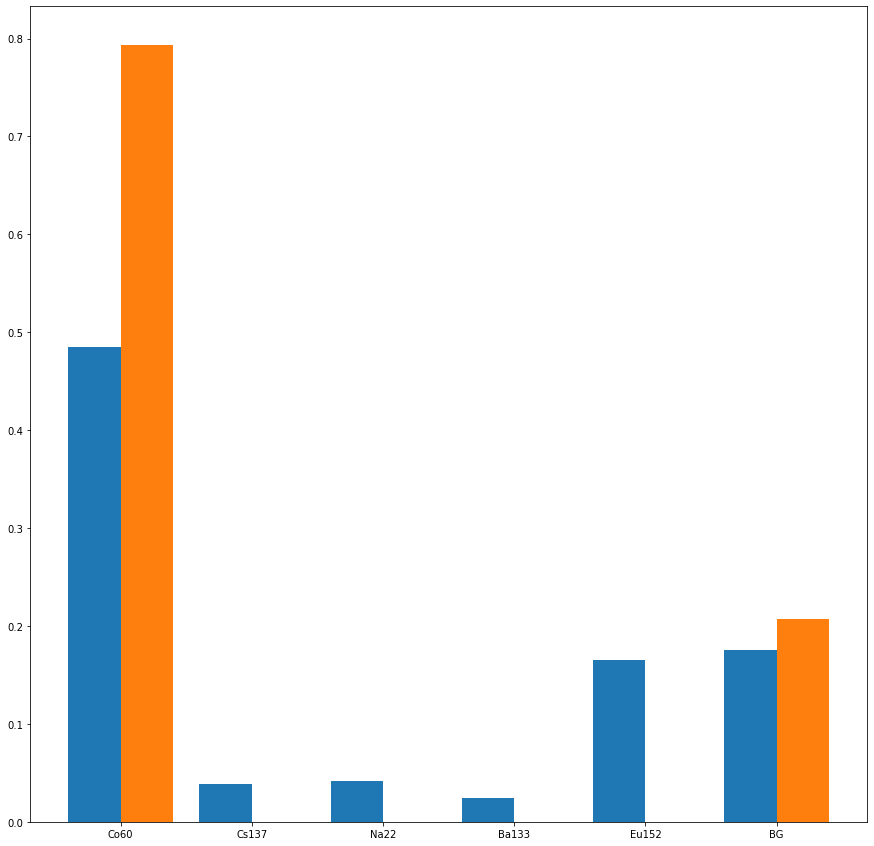

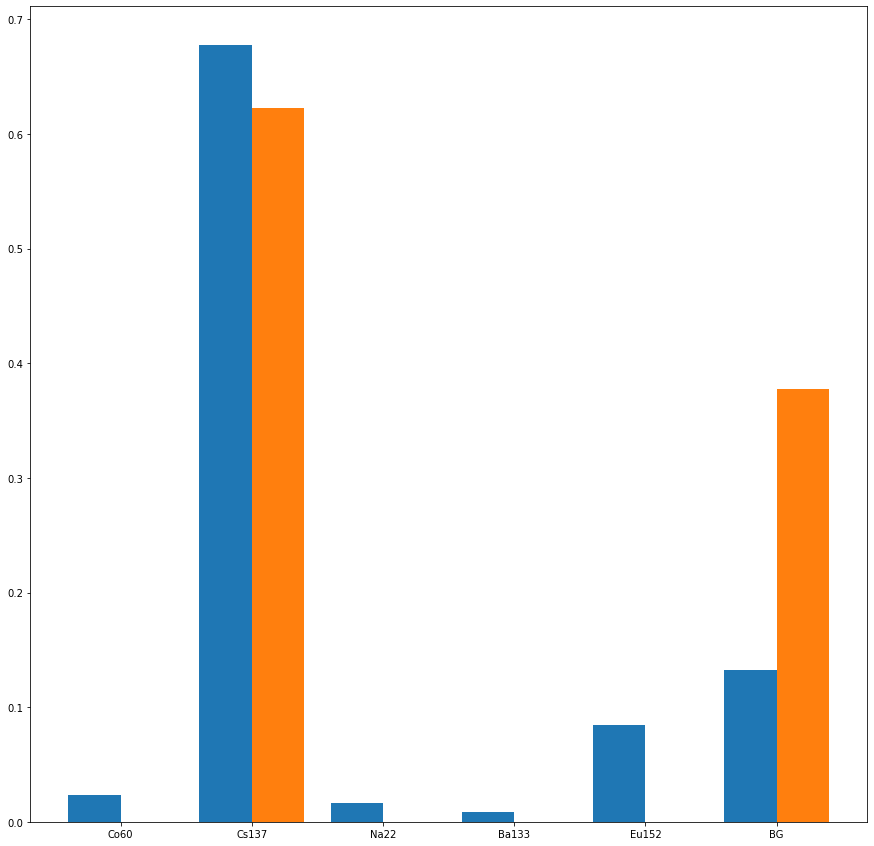

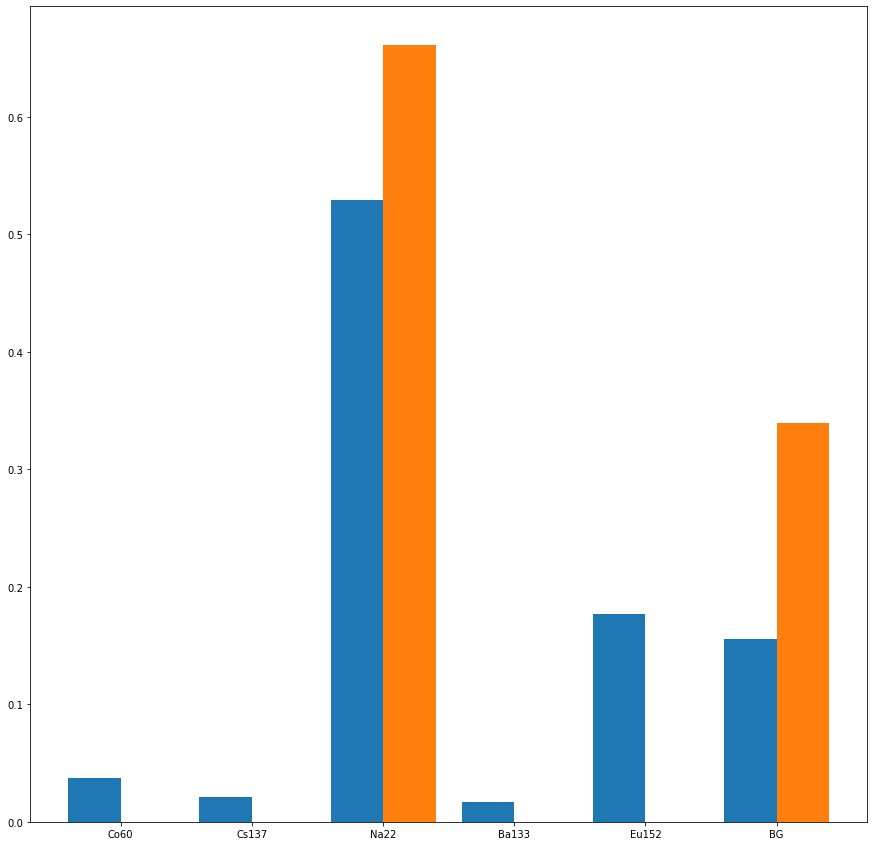

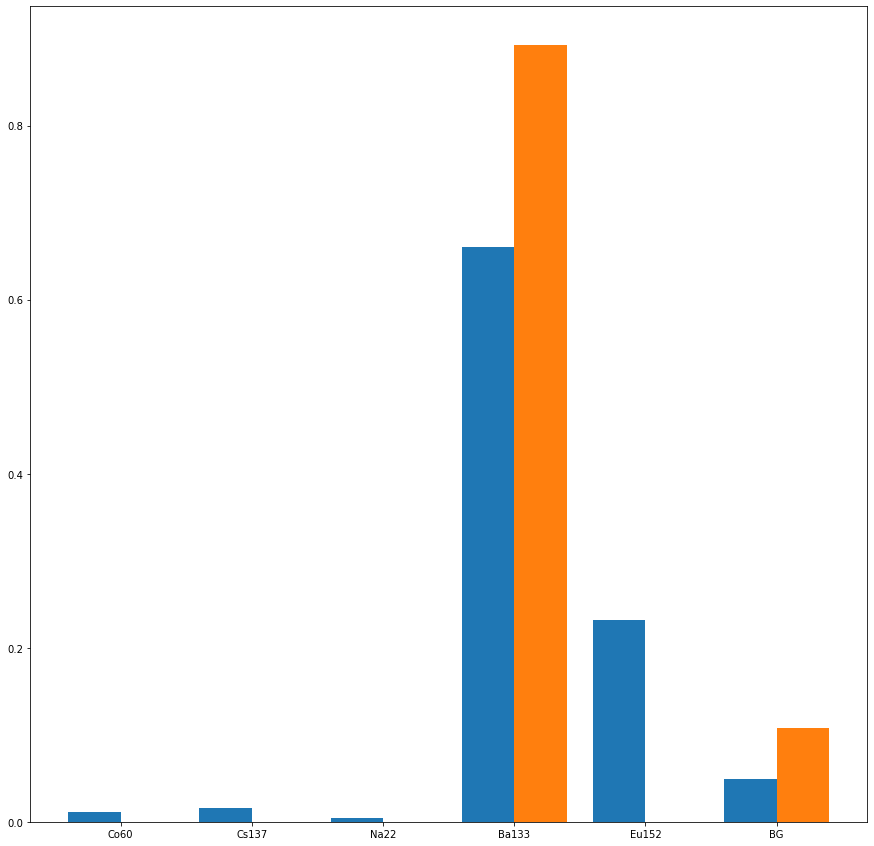

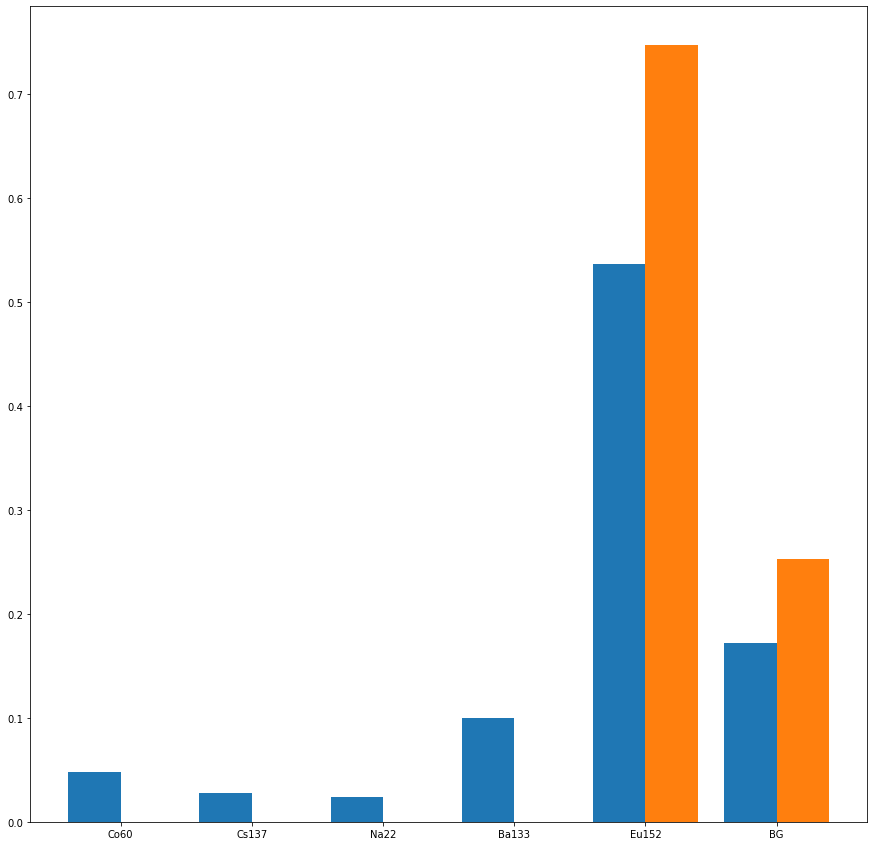

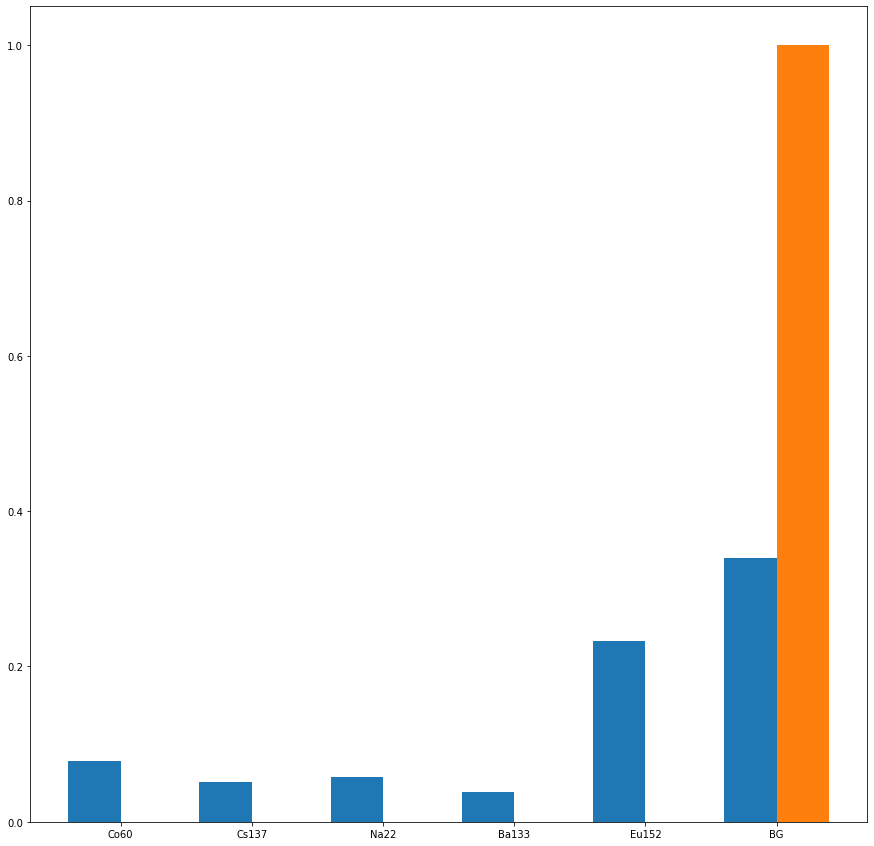

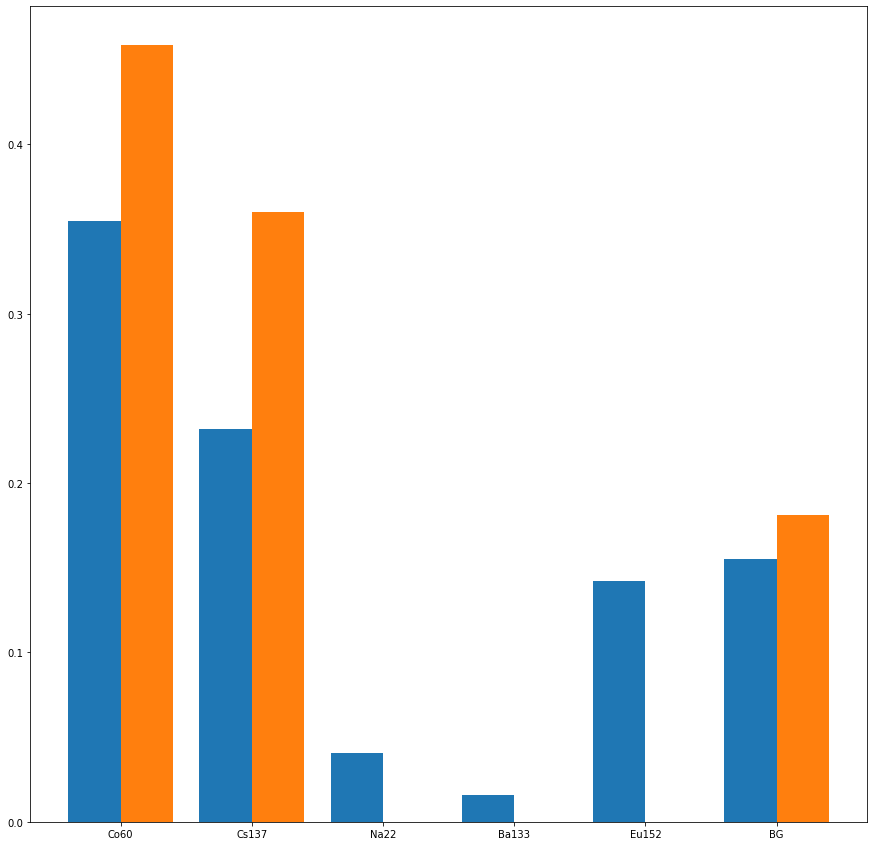

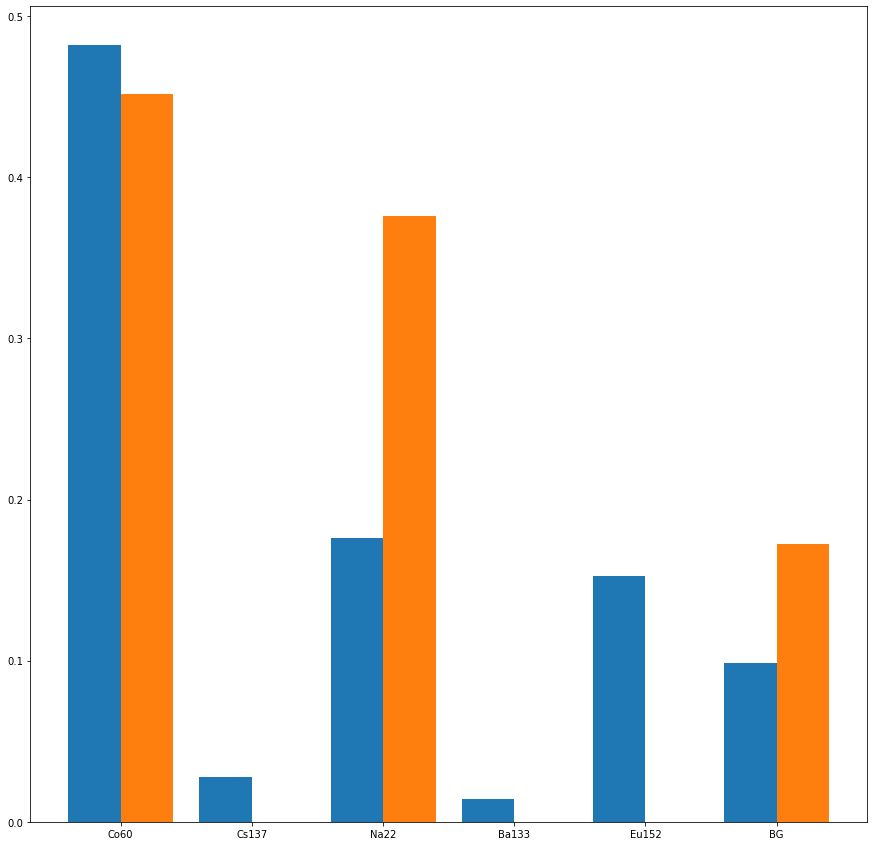

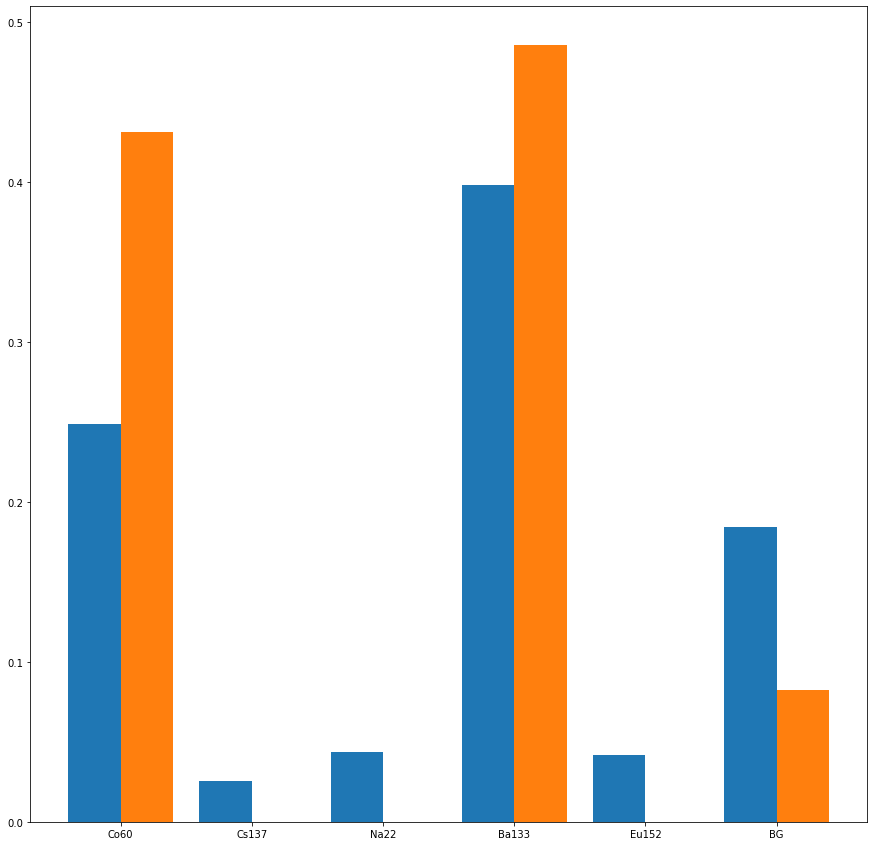

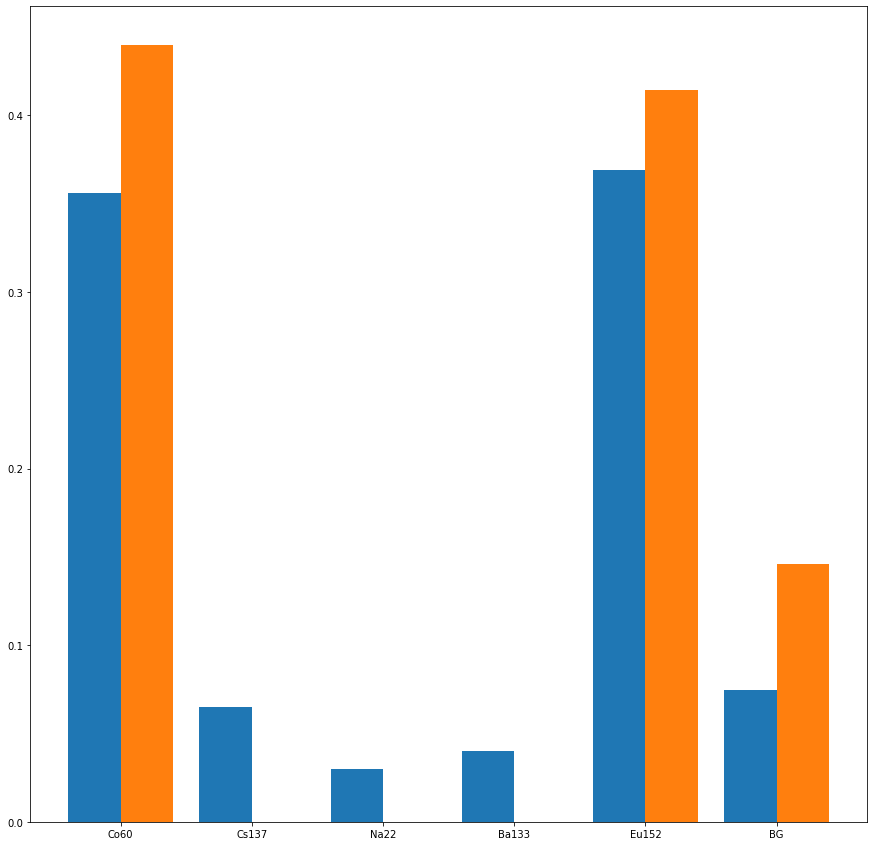

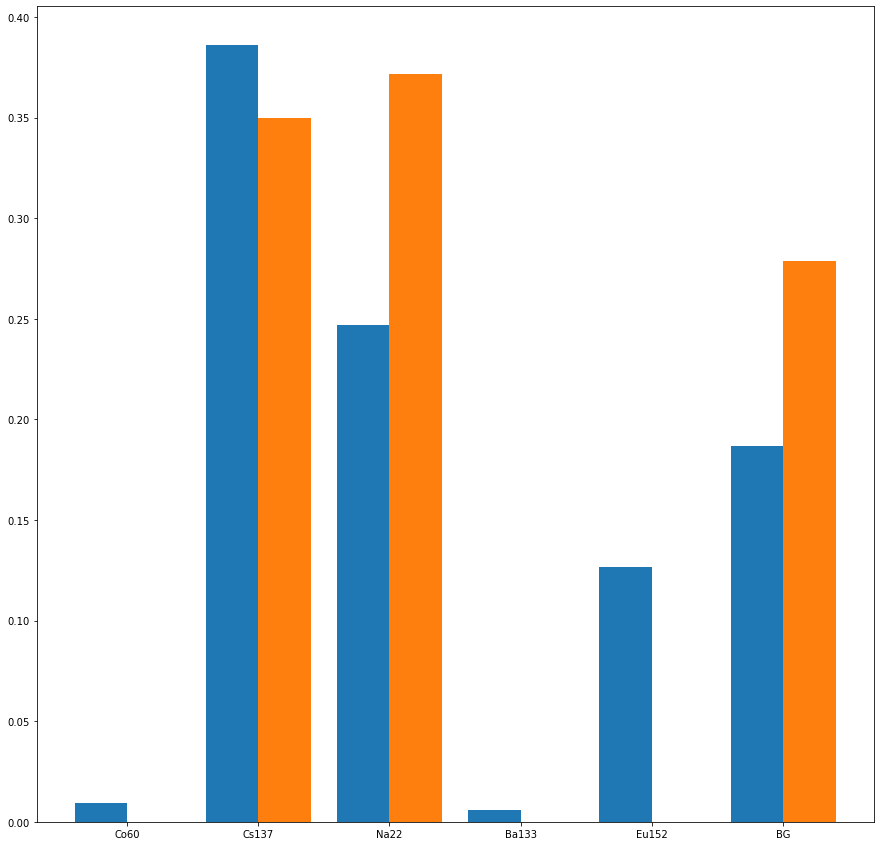

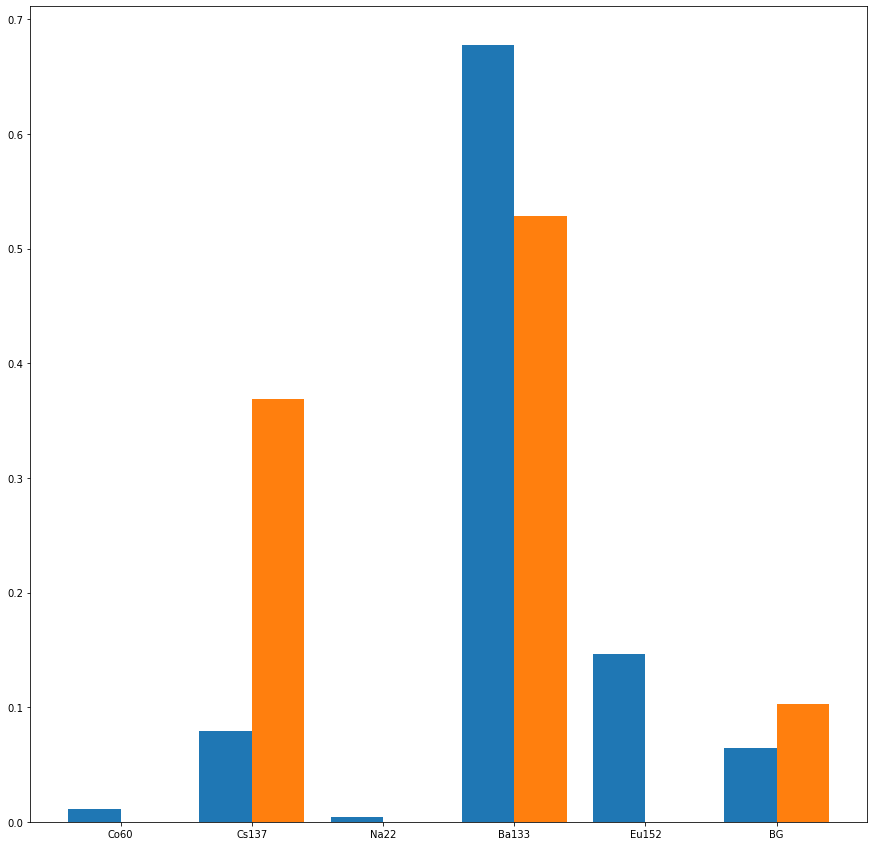

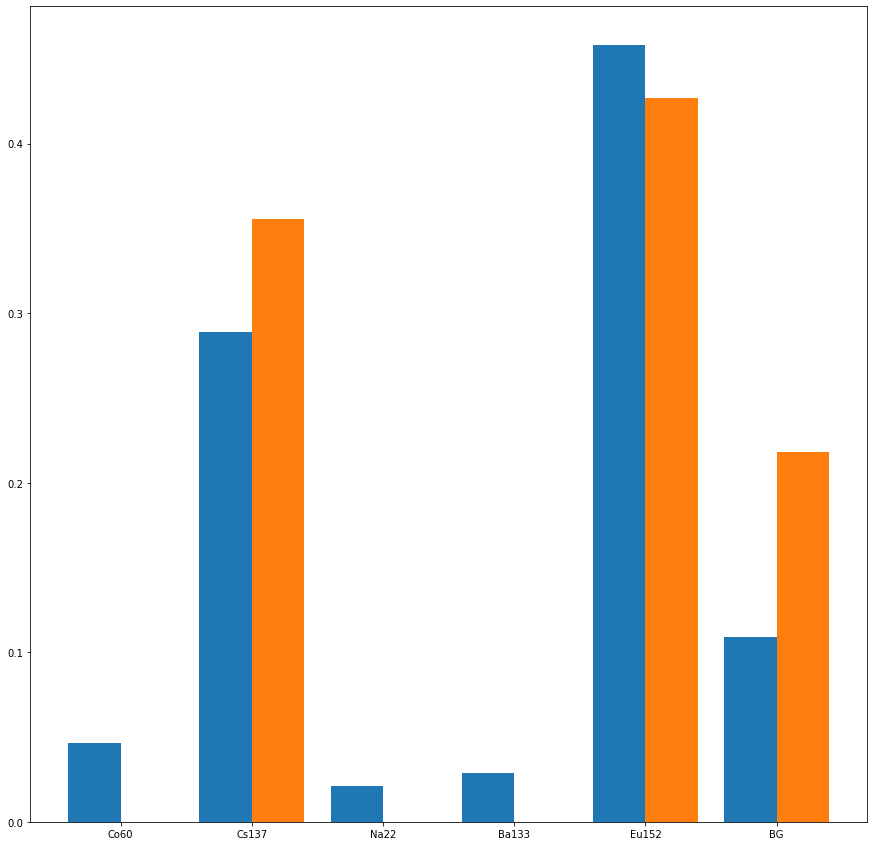

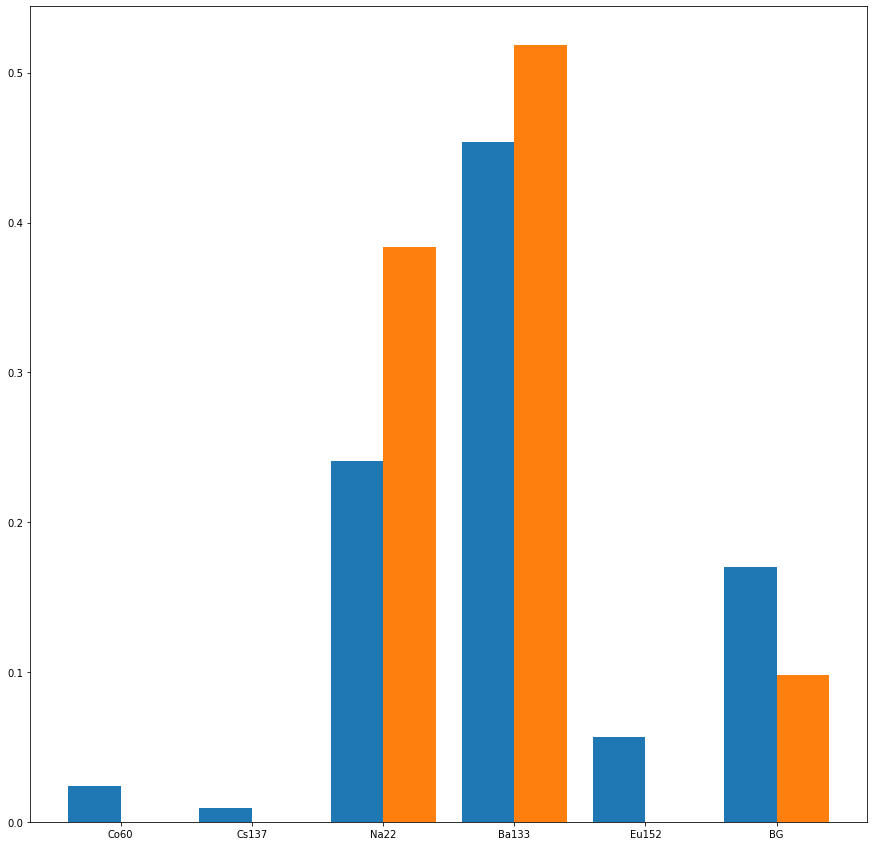

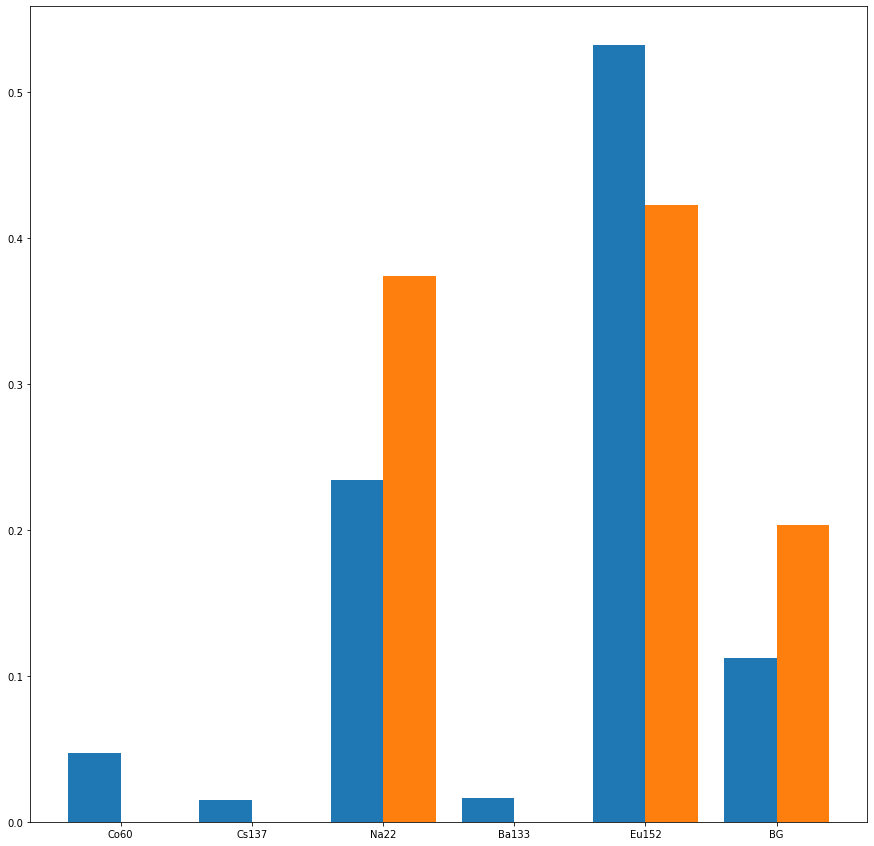

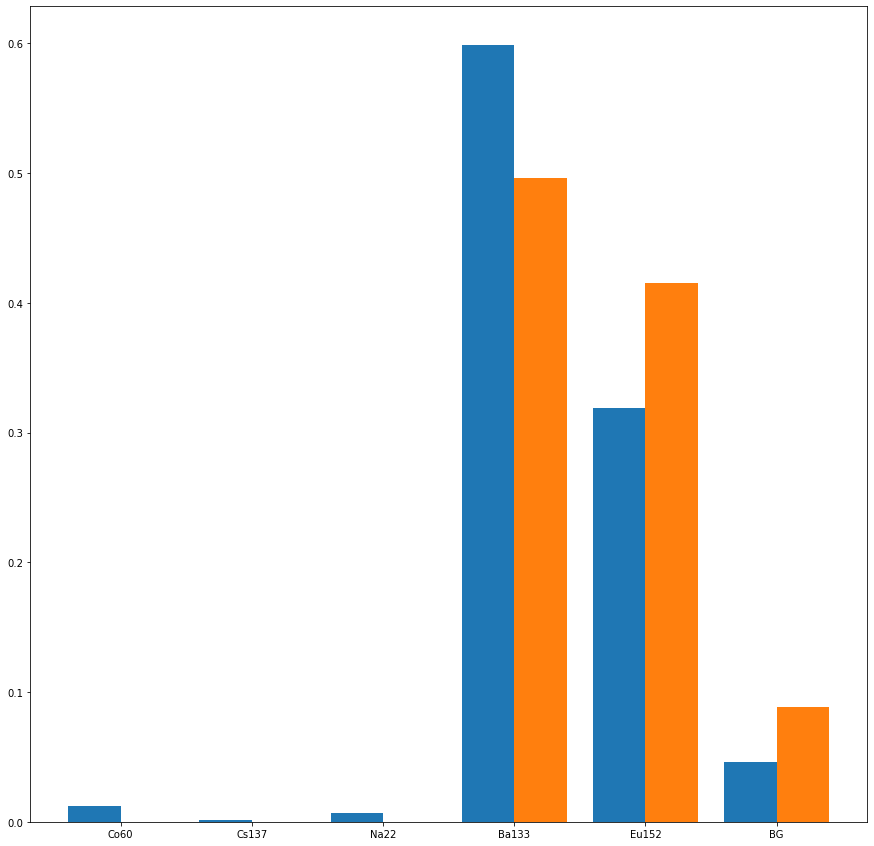

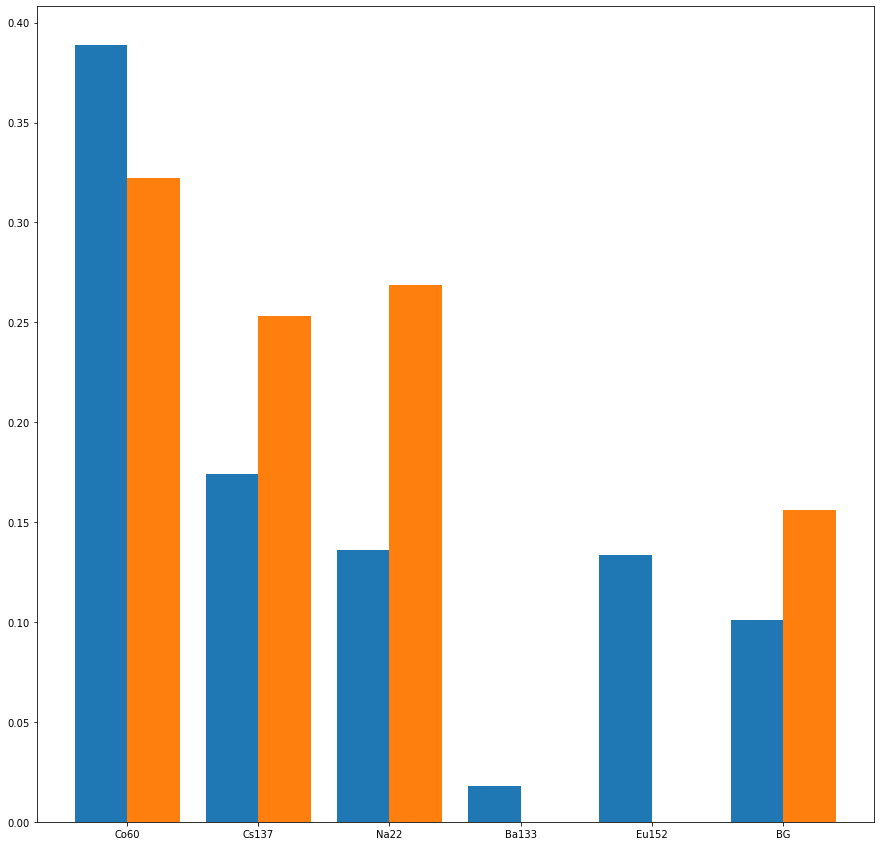

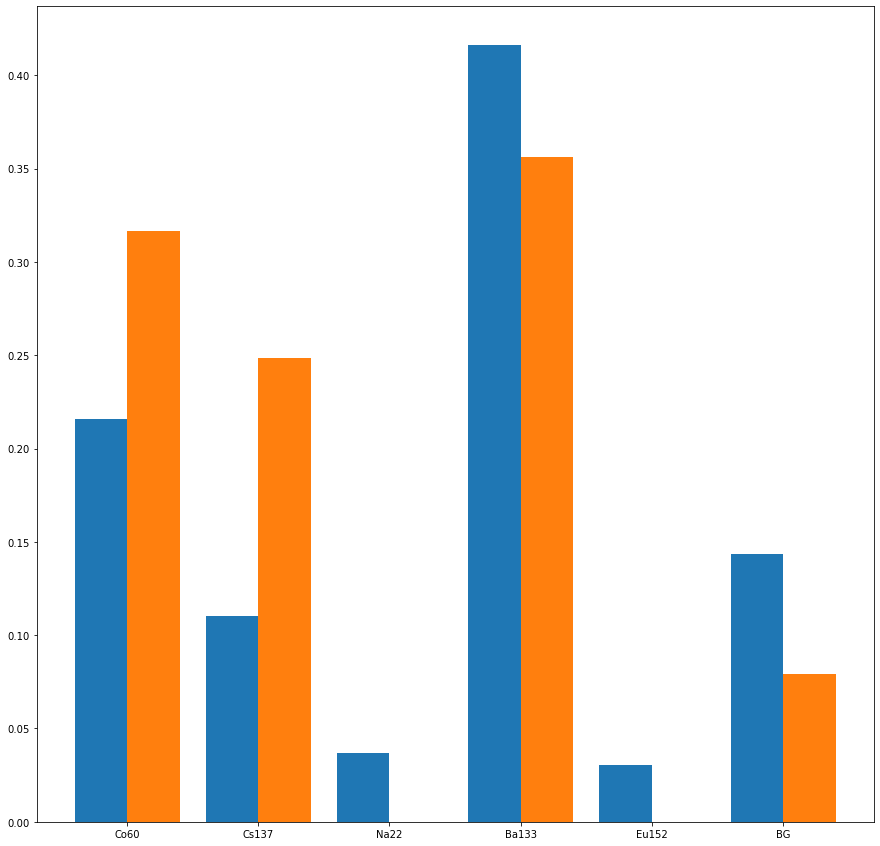

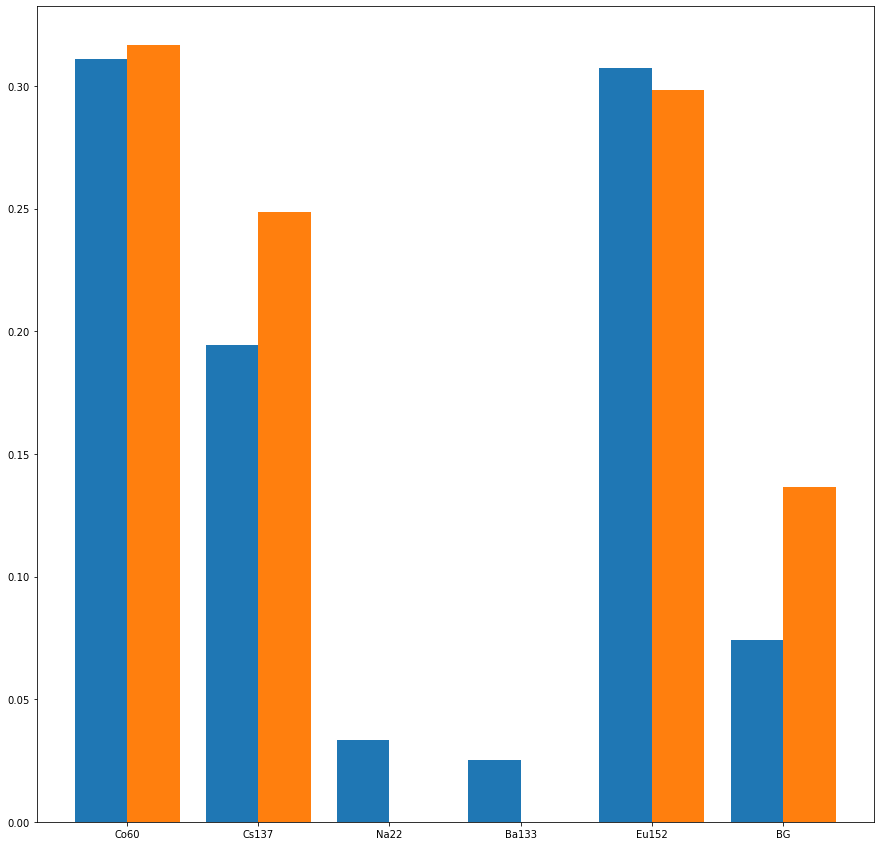

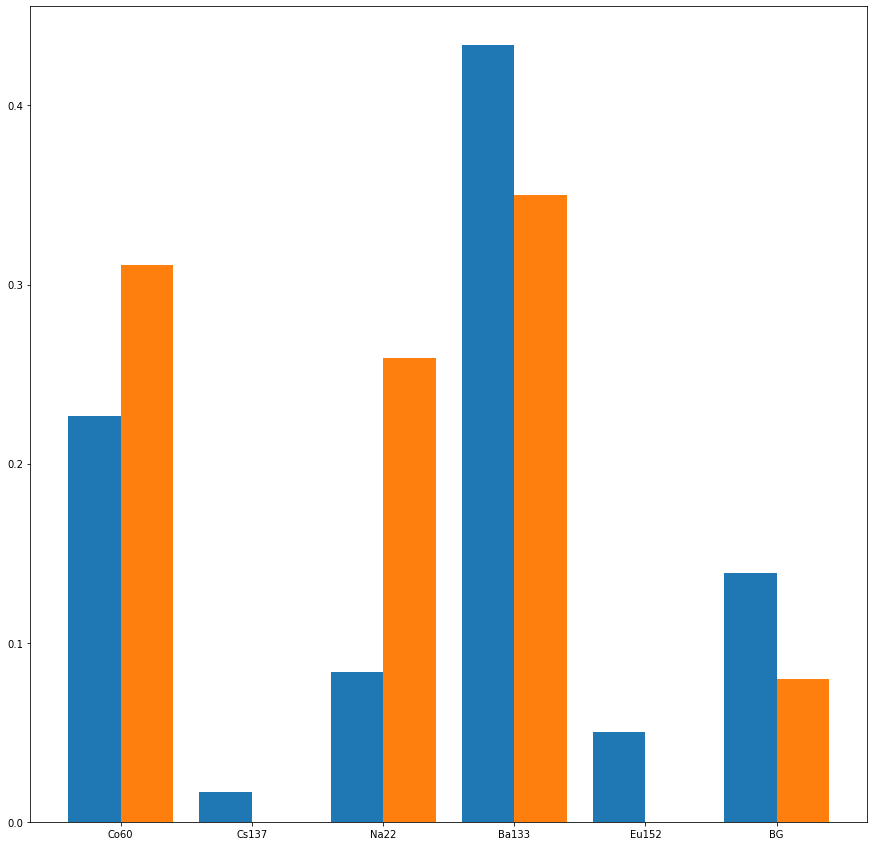

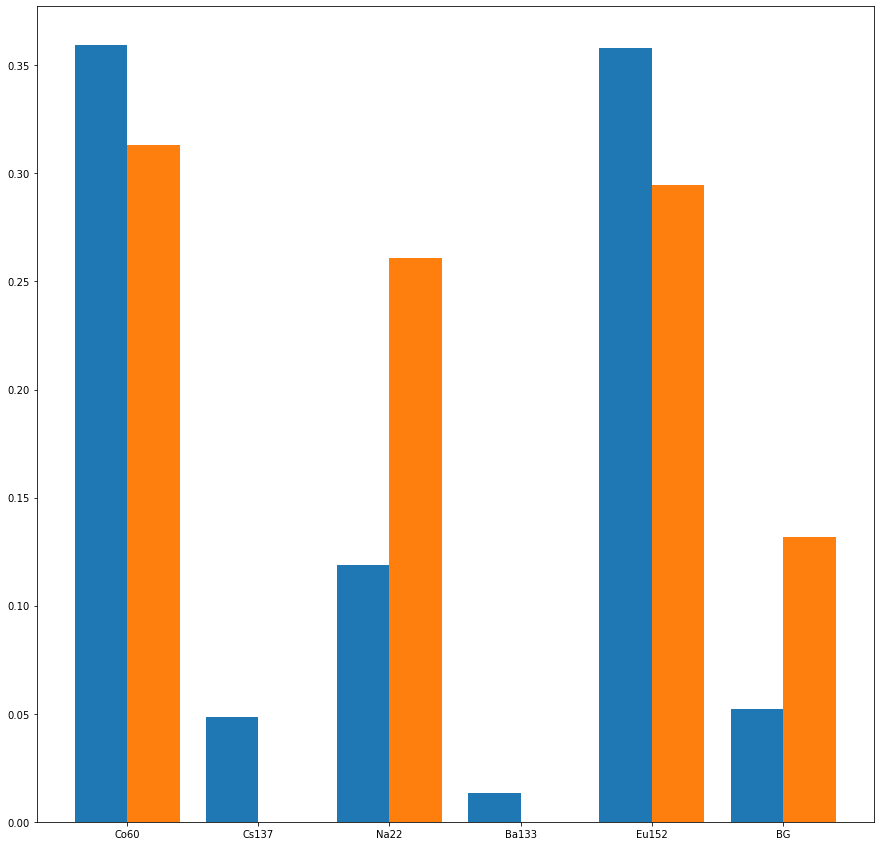

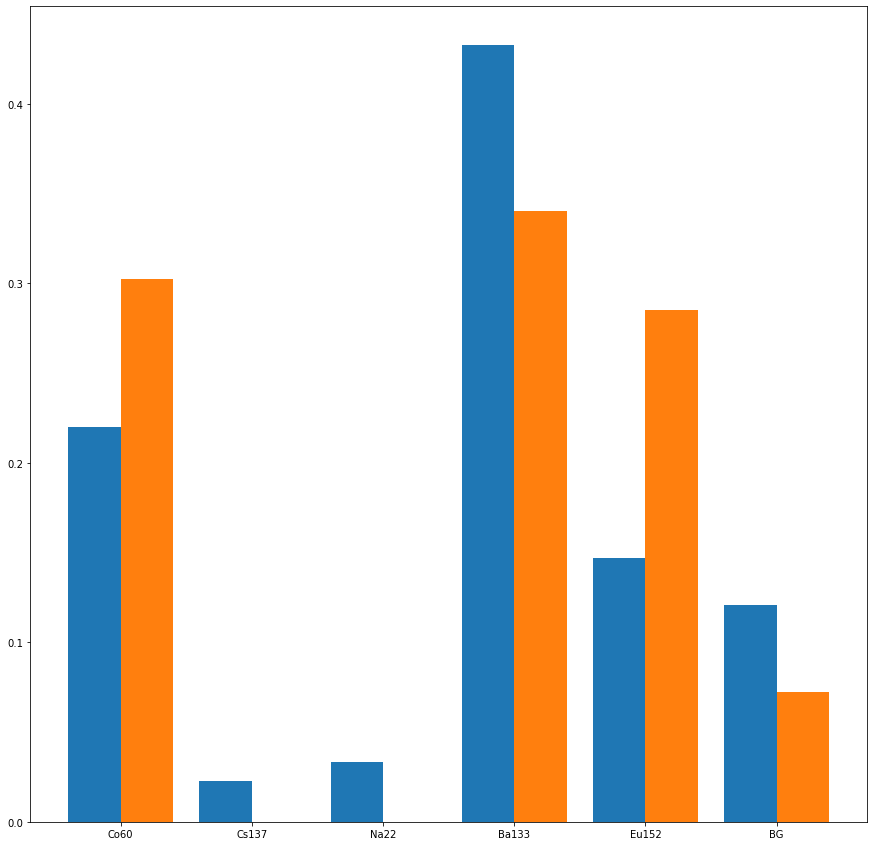

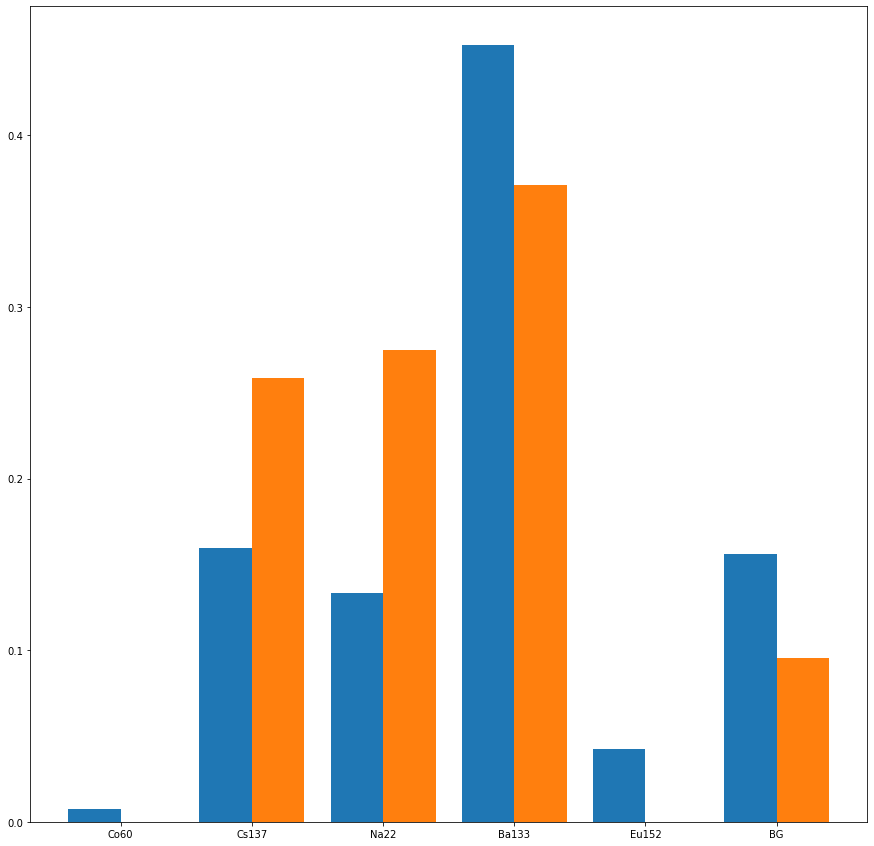

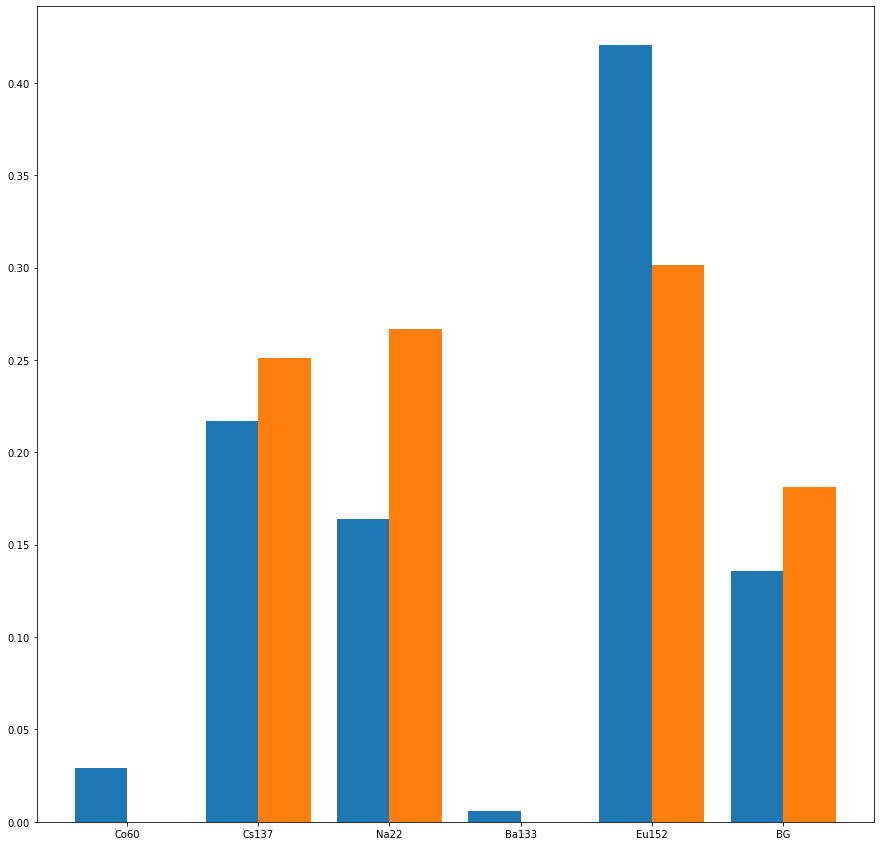

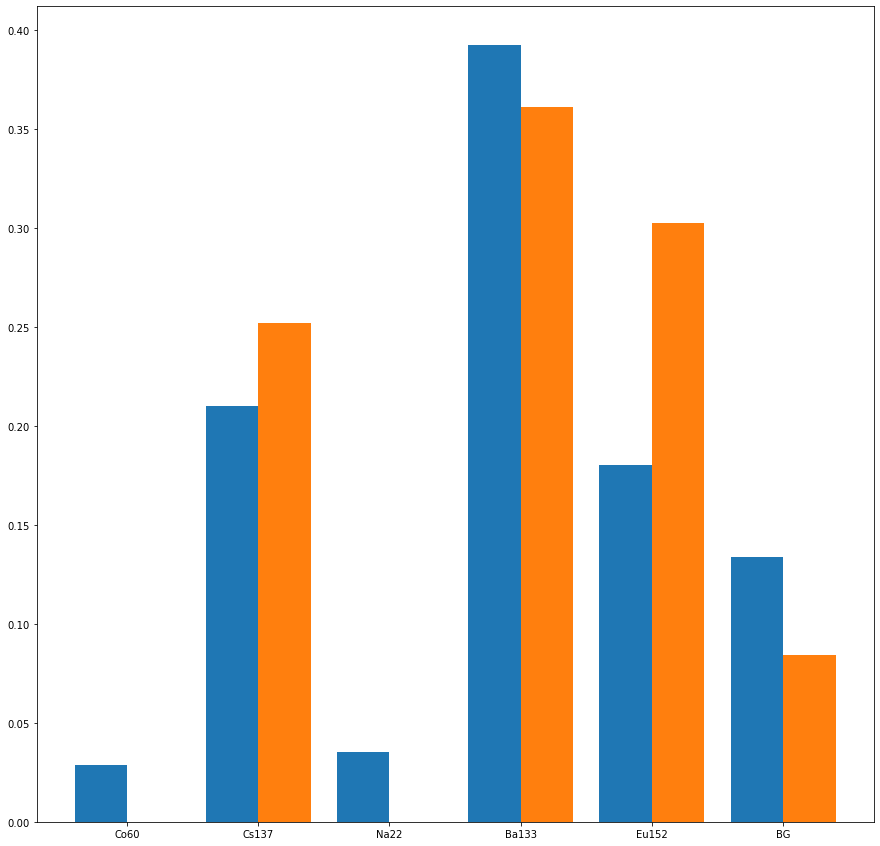

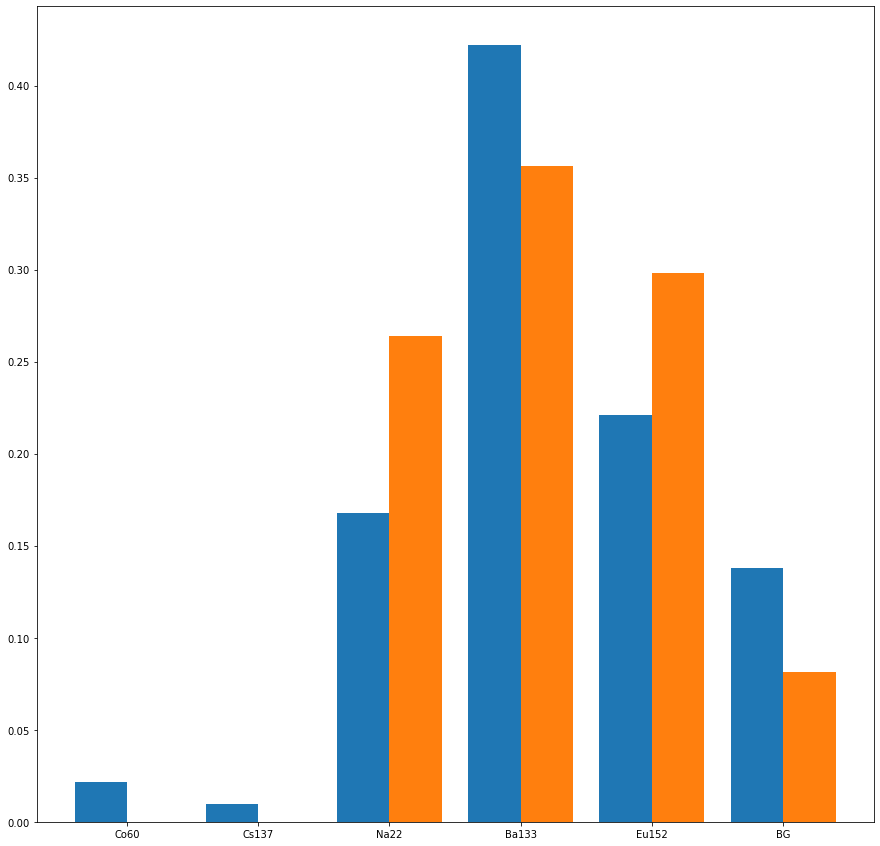

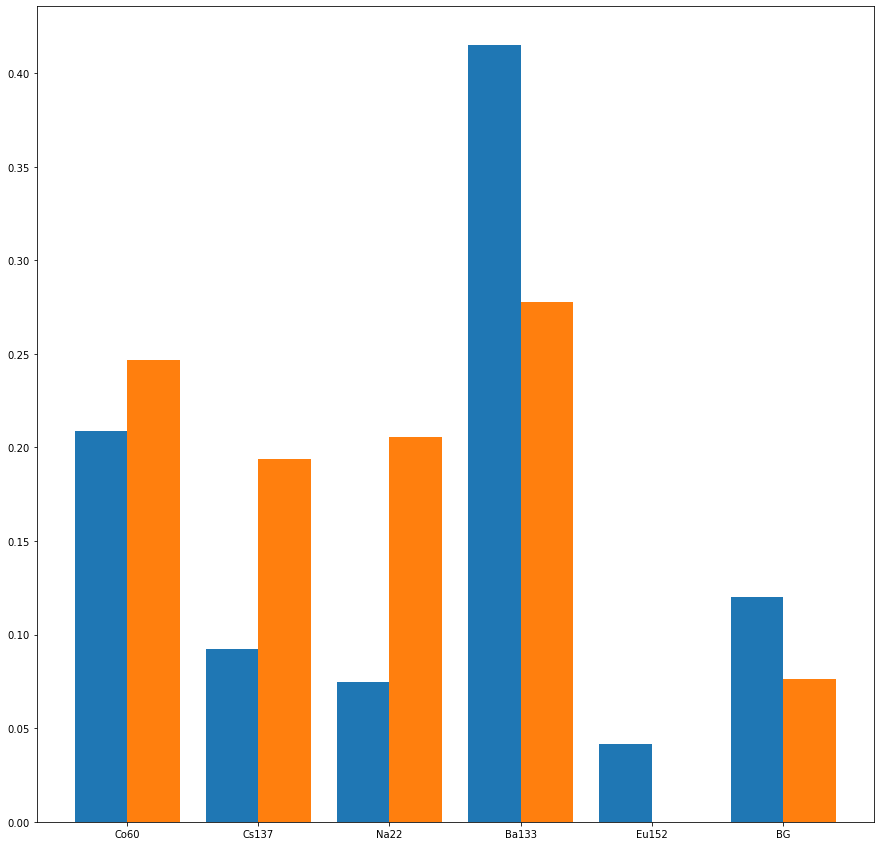

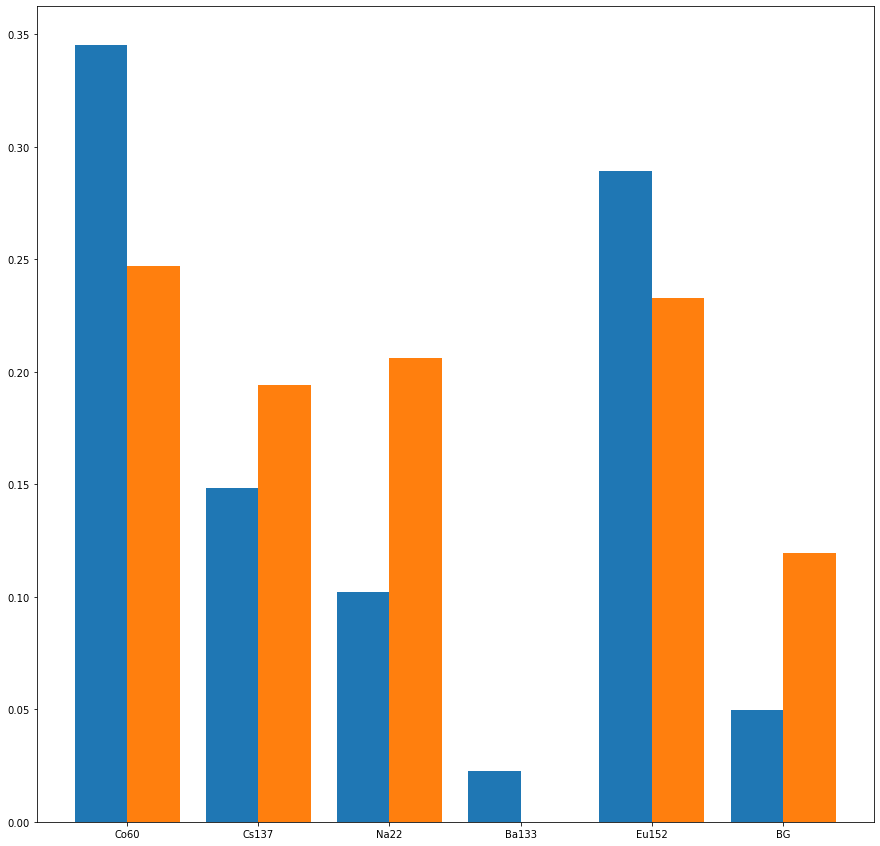

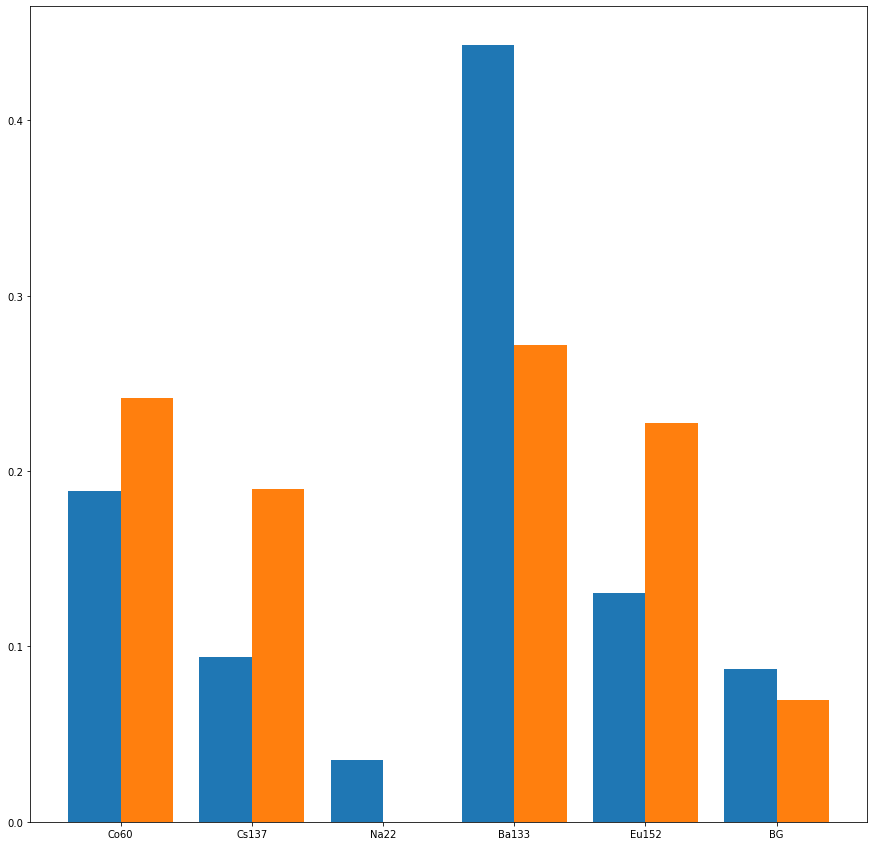

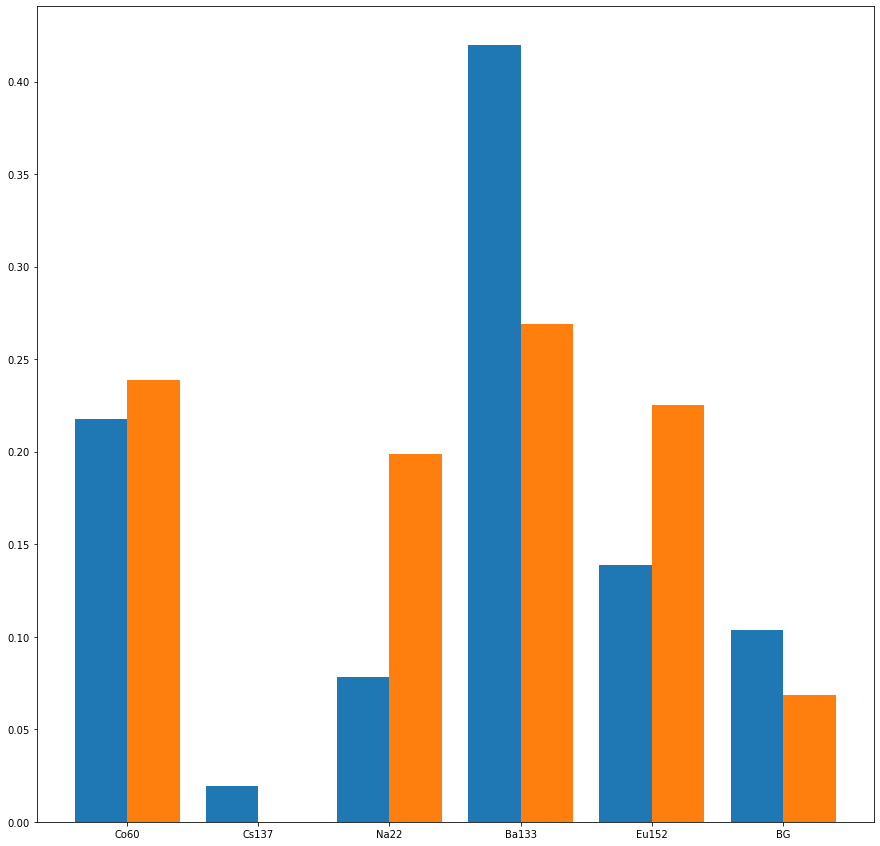

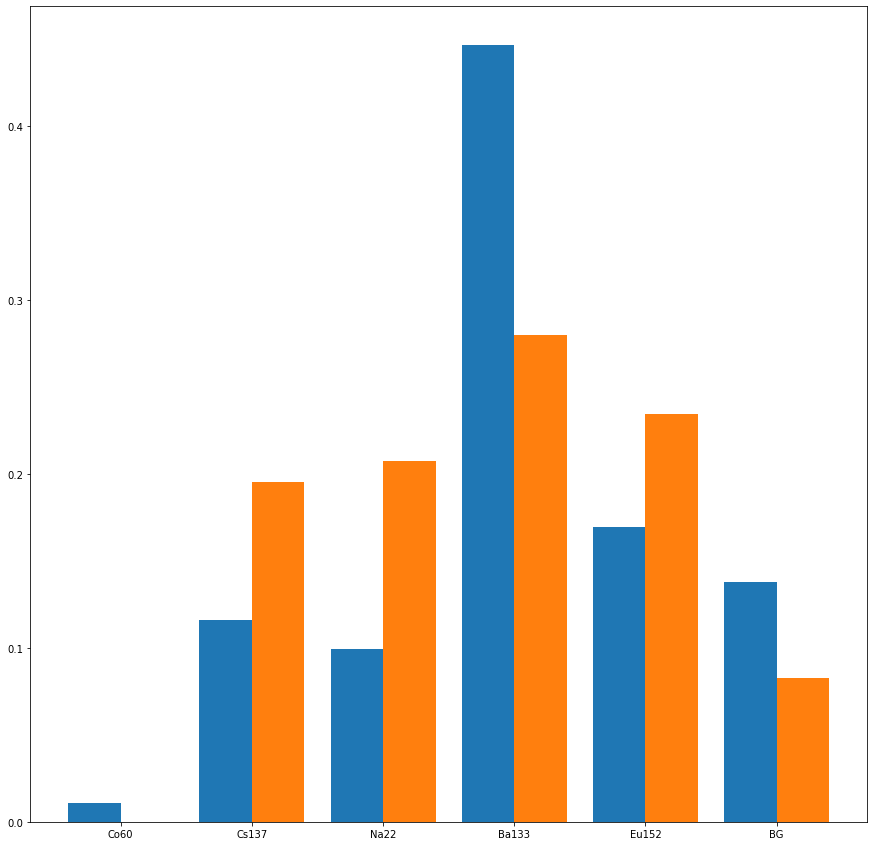

In [142]:
#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test)
print(result_y.shape)
print(result_y[0,:])


BG = result_y[:, 6]+ result_y[:, 7] + result_y[:, 8] + result_y[:, 9] #  238, Th, Ra, K
BG = BG.reshape(BG.shape[0], 1)

res_y = np.hstack((result_y[:, :5], BG))
print(BG.shape)
print(res_y.shape)

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("June30-100epoch-7bits-Compton-cut60keV-{:03}.png".format(i))

plt.show()

np.savetxt("result_y.csv",result_y,delimiter=',')


In [ ]:
## Uranium data only
## extract and concatenate n experimental raw data files (60 seconds each) into one, then sum up 
##
path = '/home/ndgu-visitor2/project-AI/raw data/uranium/'
dirs = os.listdir(path)
dir1 = dirs[1]

t_config = 60

print(dirs)

usum = []
usumcps = []

for dir1 in dirs:
    print(dir1)
    a = np.loadtxt(path + dir1, delimiter=',', skiprows=1)
    a = np.delete(a.T, 0,0)
    print(np.shape(a))
    print(a[0, 20:100])
    print(np.stack(a).shape[0])
    b = np.stack(a).shape[0]
    c = np.sum(a, axis = 0)
    print(c.shape)
    print(c[20:100])
    d = c/(t_config * b)
    np.savetxt(path + '../'+ 'summ/' + dir1 + '_sum.csv', c.T, delimiter = ',')
    np.savetxt(path + '../'+ 'summ/cps/' + dir1 + '_sumcps.csv', d.T, delimiter = ',')
    
    usum.append(c)
    usumcps.append(d)
    
    
    print("====================")

usum = np.stack(usum)
usumcps = np.stack(usumcps)
usumcps[0] = usumcps[0]/30   # BG is configured to be 30 minutes interval instead of 1 min like others
print(usum.shape, usumcps.shape)

np.save(path + 'U_test.npy', usum)
np.savetxt(path + 'U_test.csv', usum, delimiter=',')
print(usum)

delta = load(path + 'U_test.npy')
print(delta.shape, delta)

np.savetxt(path + 'Sumcps.txt', np.sum(usumcps,axis=1))

usumccr = np.sum(usumcps, axis = 1)/np.sum(np.sum(usumcps, axis = 1))

print(usumccr.shape)
print(usumccr)

np.savetxt(path + 'U_YtestCCR.txt', usumccr)

print(usumcps[5:100])
print(np.sum(usumcps, axis = 1))

In [72]:
path = '/home/ndgu-visitor2/project-AI/raw data/uranium/'

y_test_U = np.loadtxt("y_test_U235.txt", encoding = 'utf-8')
print(y_test_U.shape)
print(y_test_U)

delta = load(path + 'U_test.npy')
dell = delta[1:,Startsize:Datasize] 
print(dell.shape)
print(x_test.shape)

dell = dell.reshape(dell.shape[0], dell.shape[1], 1)

x_test_U = np.row_stack((x_test, dell))
print(x_test_U.shape)

# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
# print(x_test.shape)
#print(x_test[0],x_test[1])

(40, 7)
[[0.7932012  0.         0.         0.         0.         0.
  0.2067988 ]
 [0.         0.6225573  0.         0.         0.         0.
  0.3774427 ]
 [0.         0.         0.660853   0.         0.         0.
  0.339147  ]
 [0.         0.         0.         0.8924209  0.         0.
  0.1075791 ]
 [0.         0.         0.         0.         0.7473434  0.
  0.2526566 ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.45861286 0.35995002 0.         0.         0.         0.
  0.18143712]
 [0.45155988 0.         0.37621564 0.         0.         0.
  0.17222448]
 [0.43175549 0.         0.         0.48576279 0.         0.
  0.08248172]
 [0.43962736 0.         0.         0.         0.41421093 0.
  0.14616171]
 [0.         0.34991591 0.37144048 0.         0.         0.
  0.27864361]
 [0.         0.36887912 0.         0.52877933 0.         0.
  0.10234155]
 [0.         0.35543697 0.         0.         0.42668117 0.
  0.21788186]
 [0.         0.         0.3838

(40, 10)
[5.0595796e-01 4.2889394e-02 4.2788967e-02 2.2480717e-02 1.6651565e-01
 7.0414618e-02 3.2423609e-03 1.1679651e-01 2.8876513e-02 3.7302441e-05]
(40, 1)
(40, 7)


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


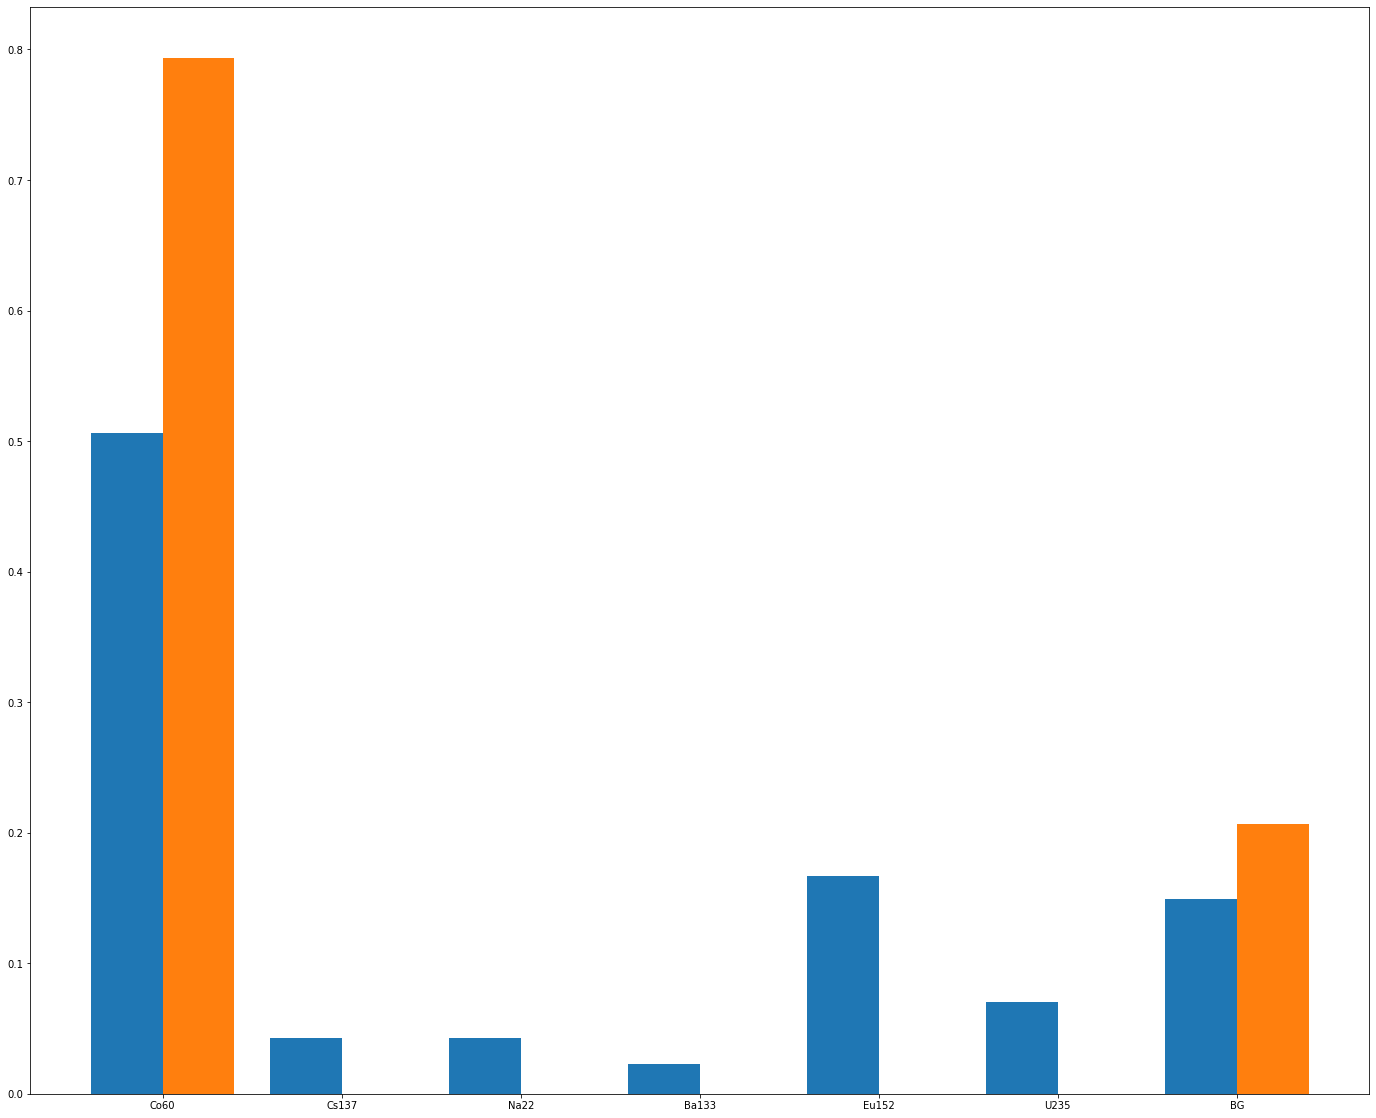

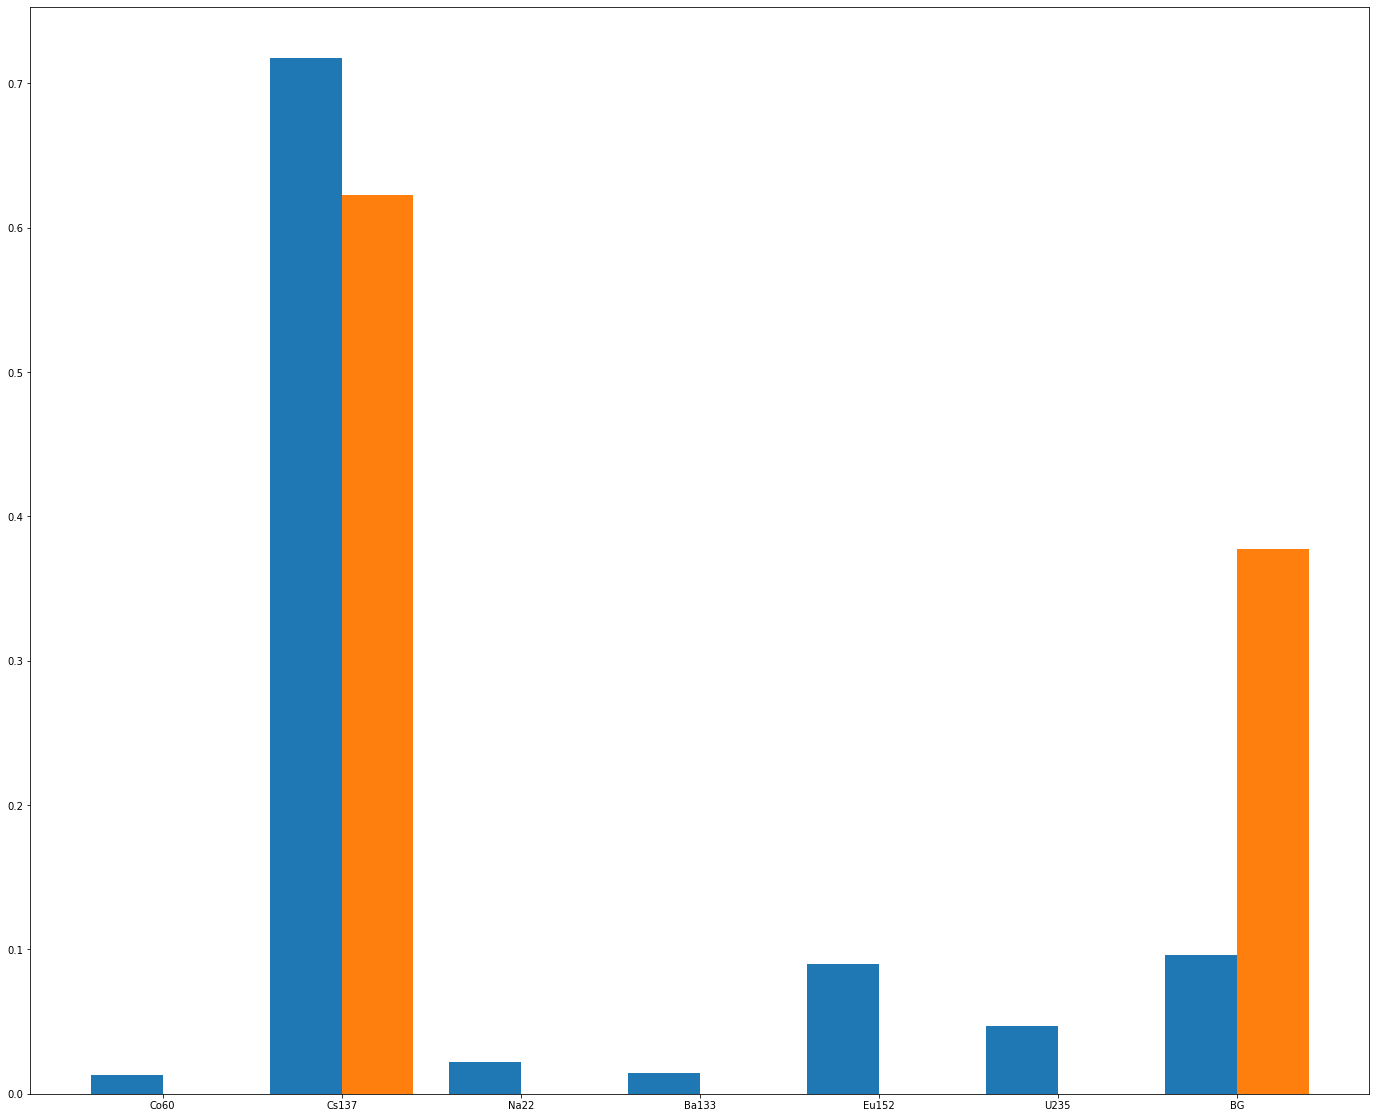

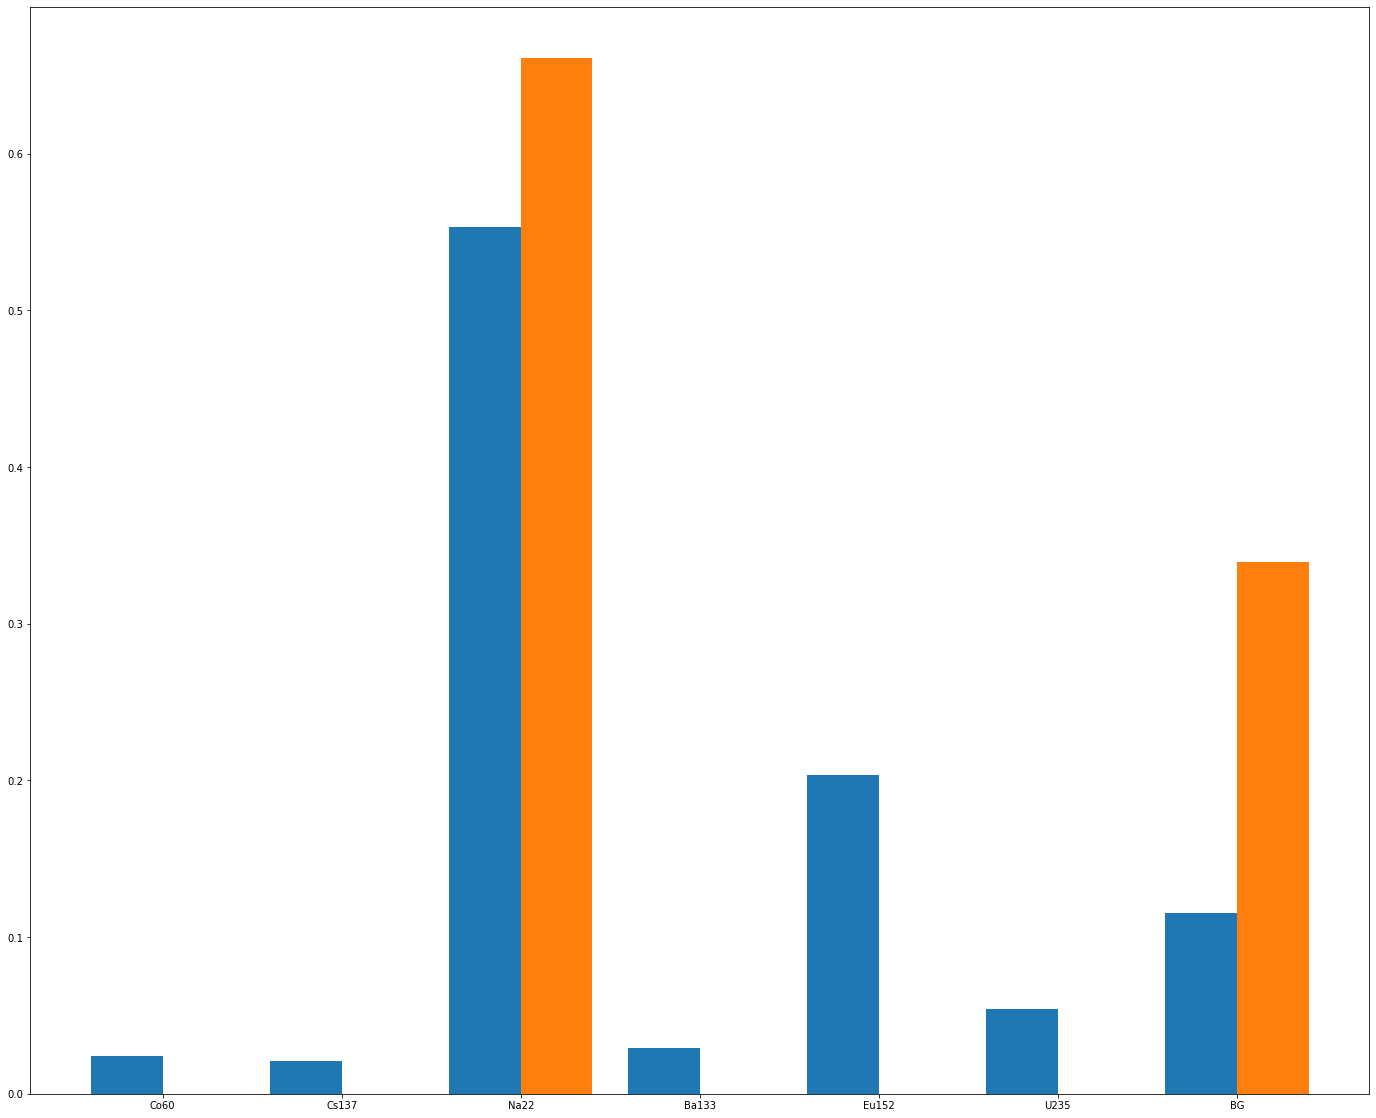

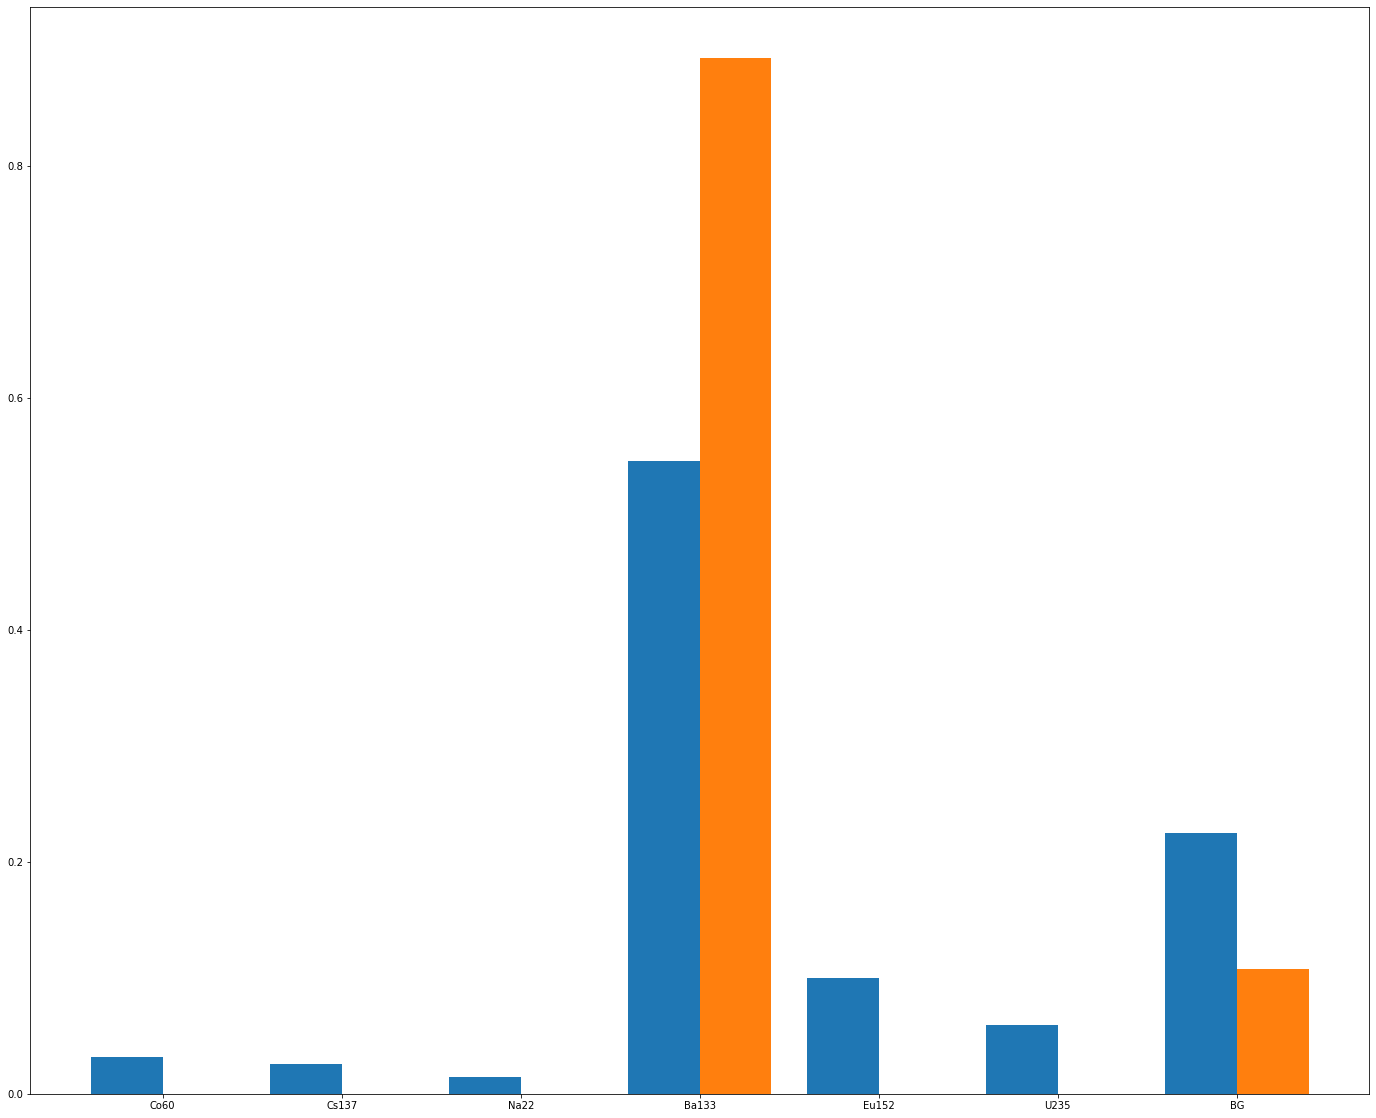

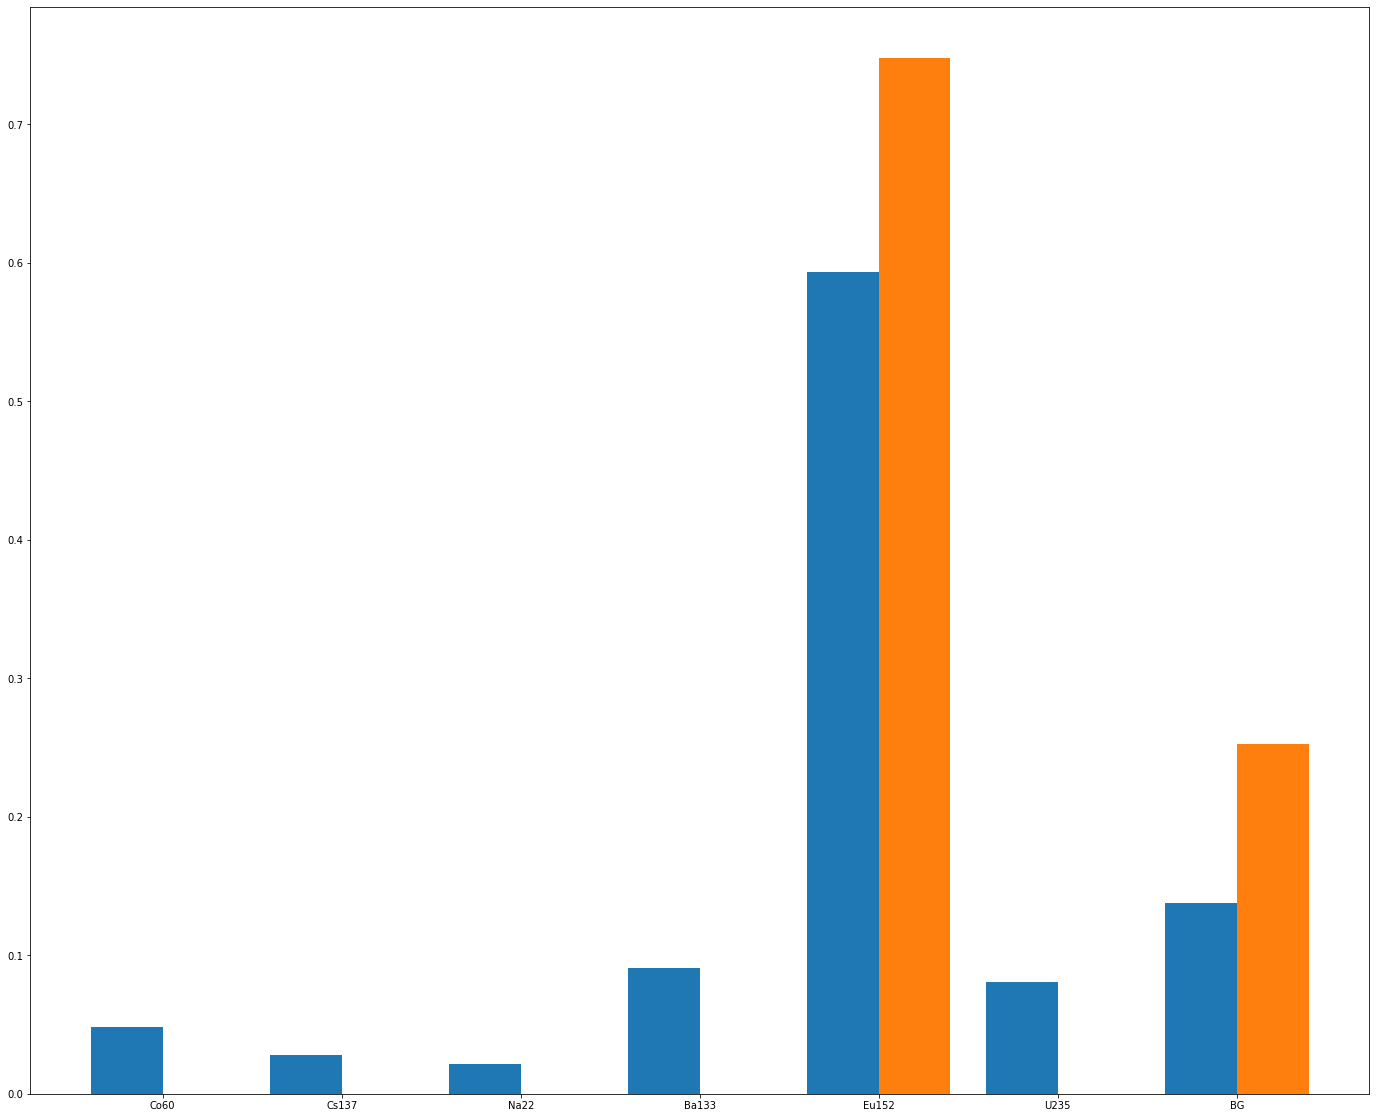

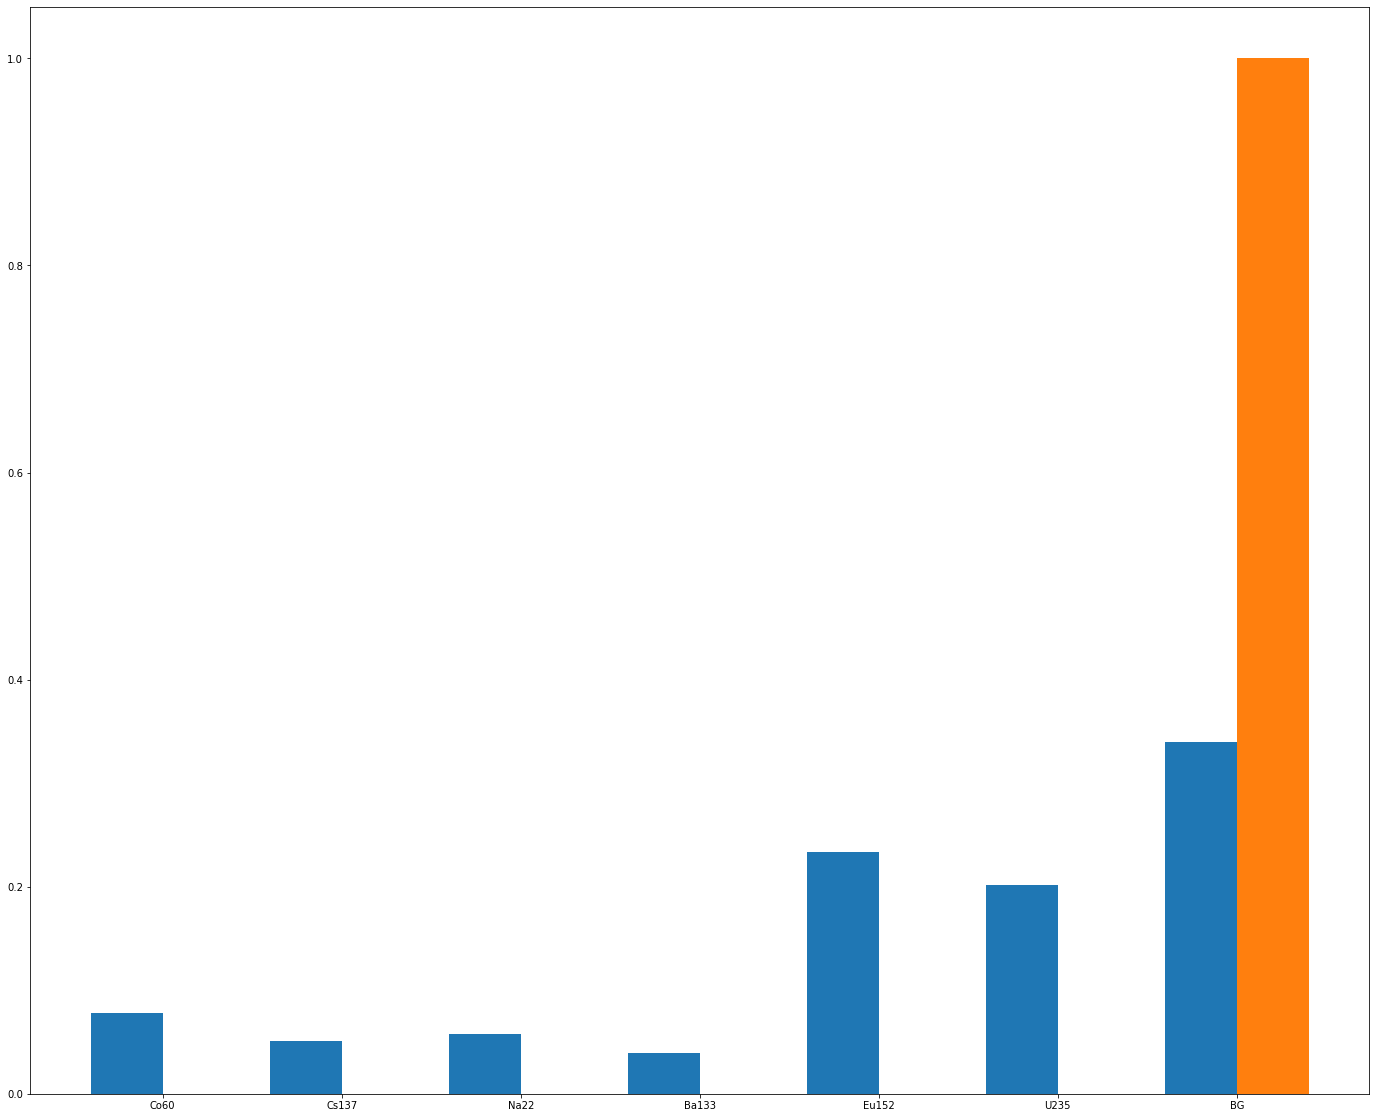

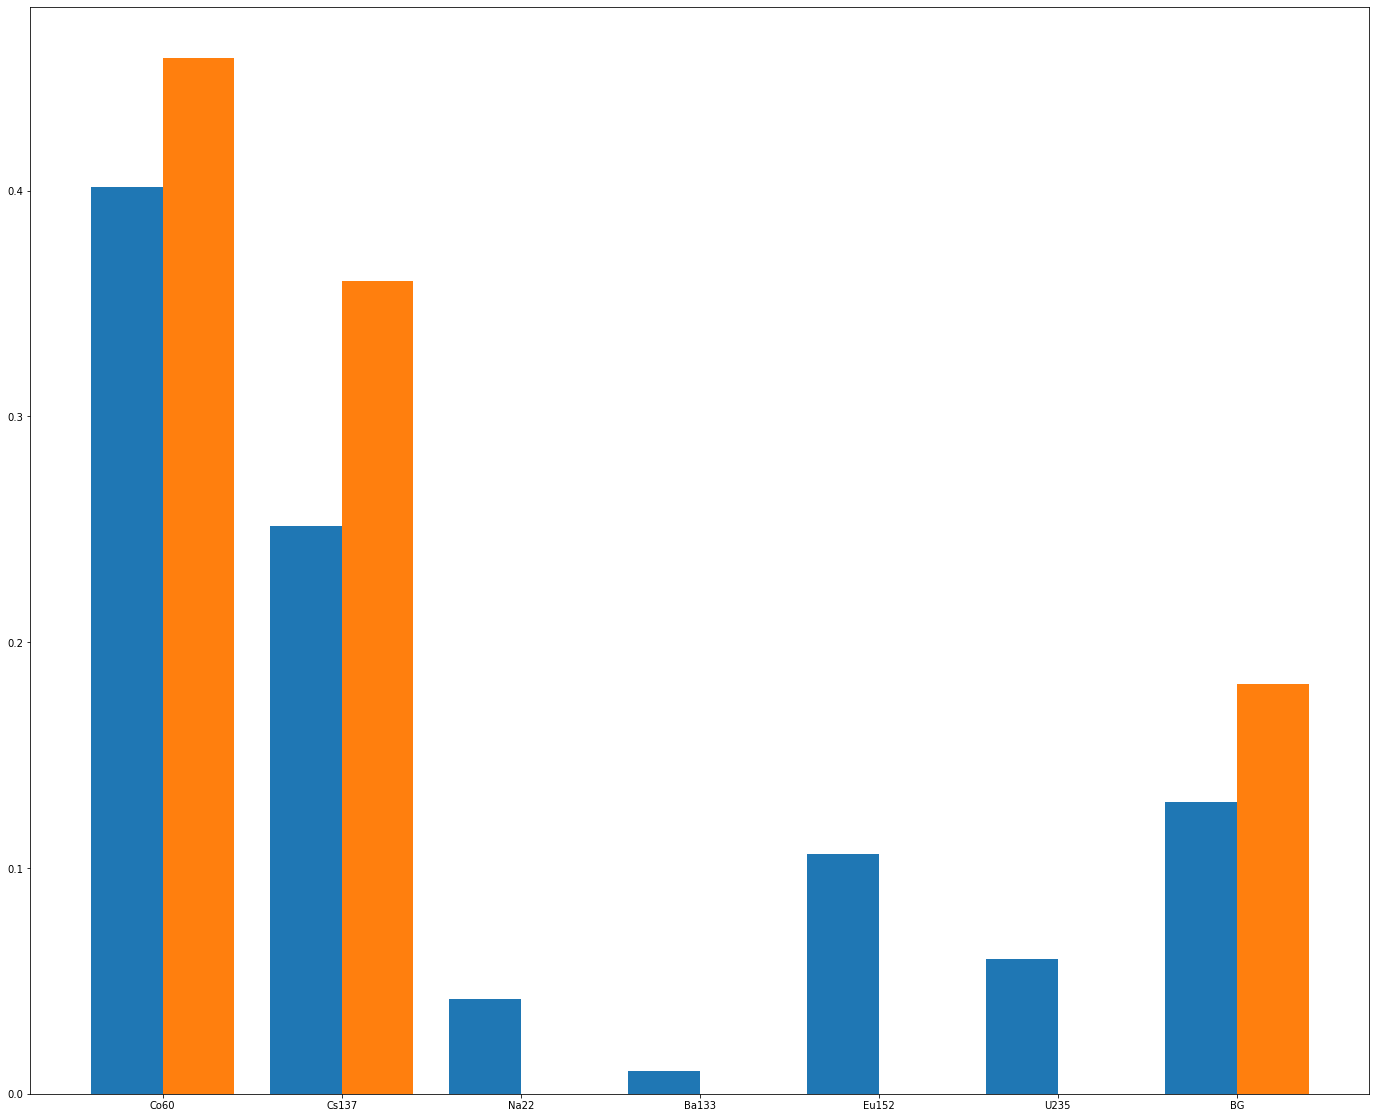

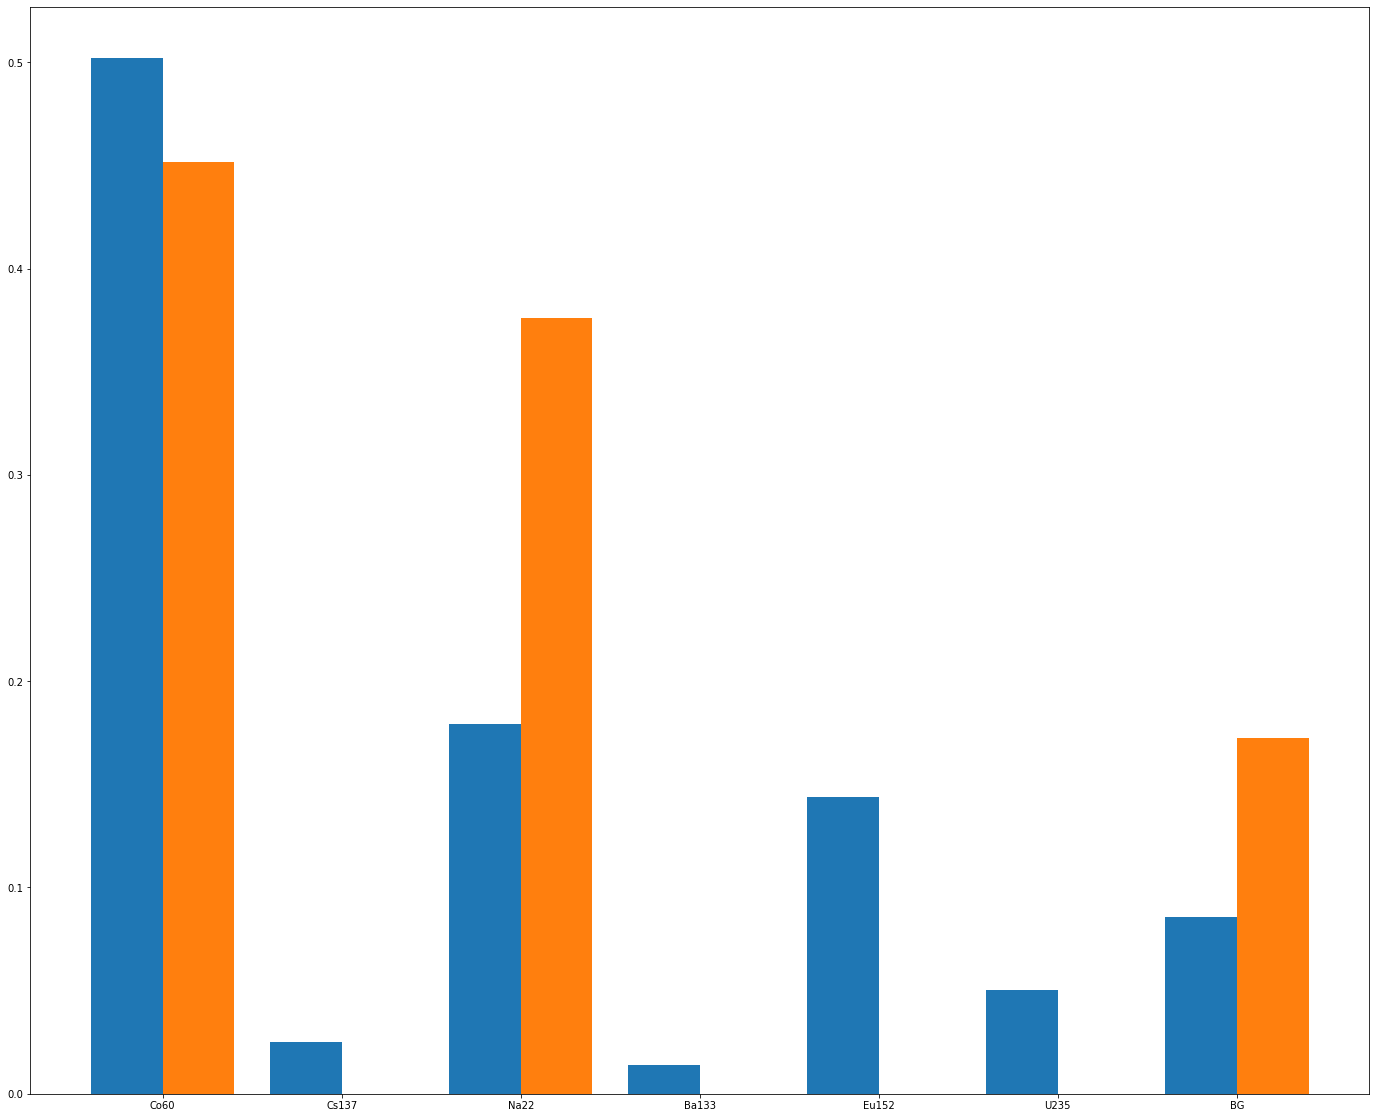

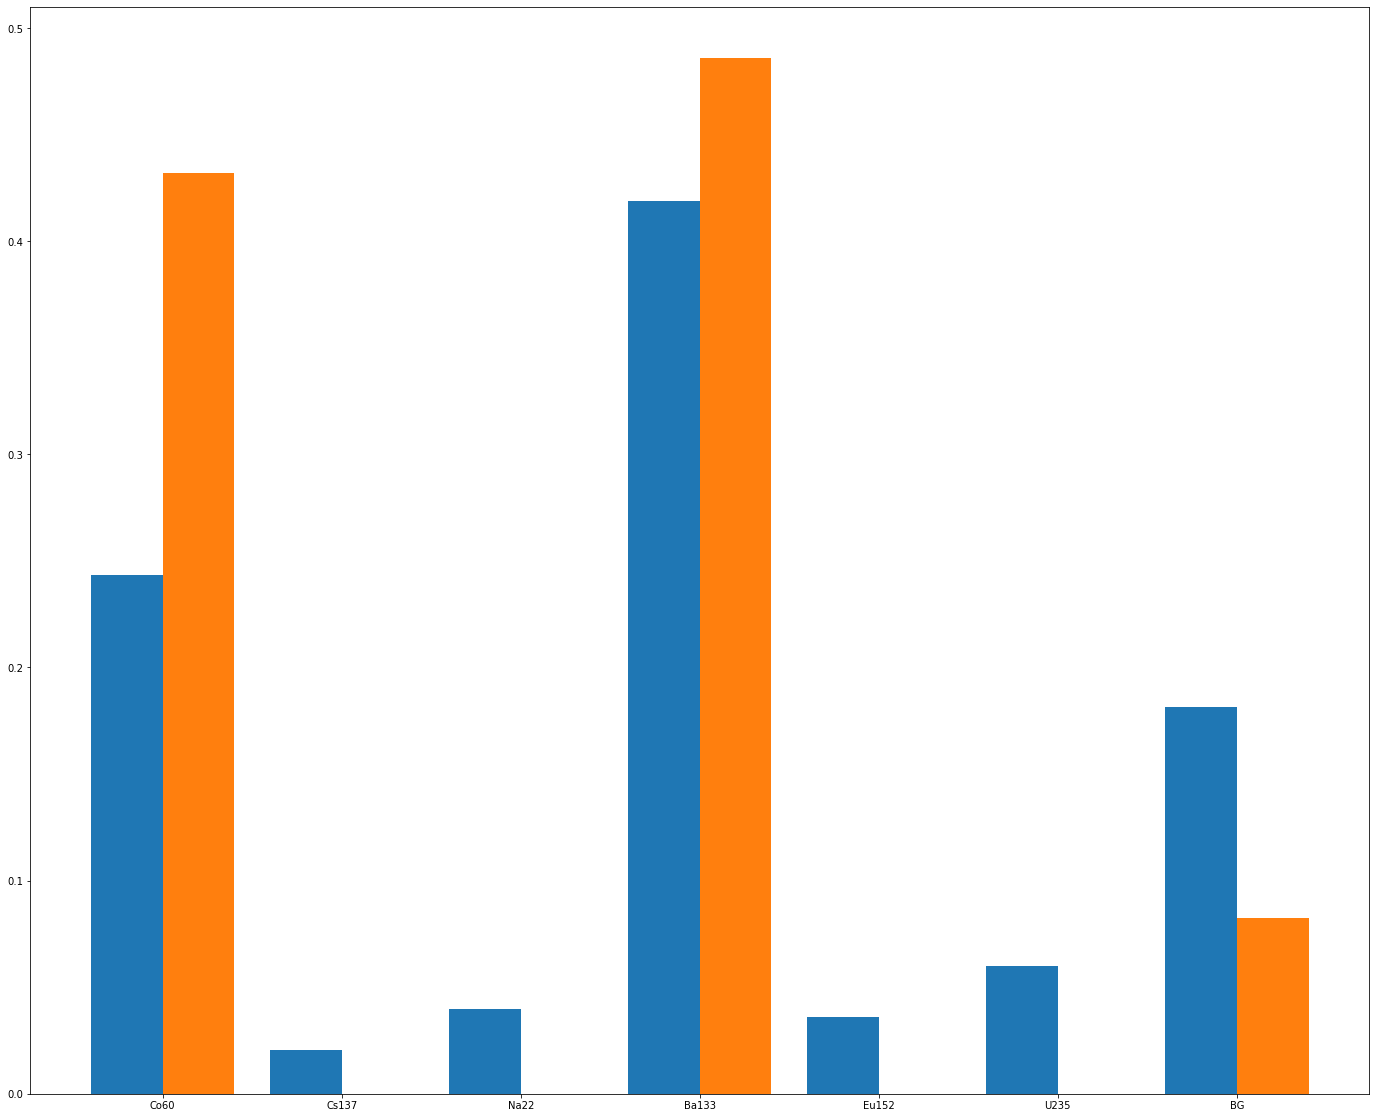

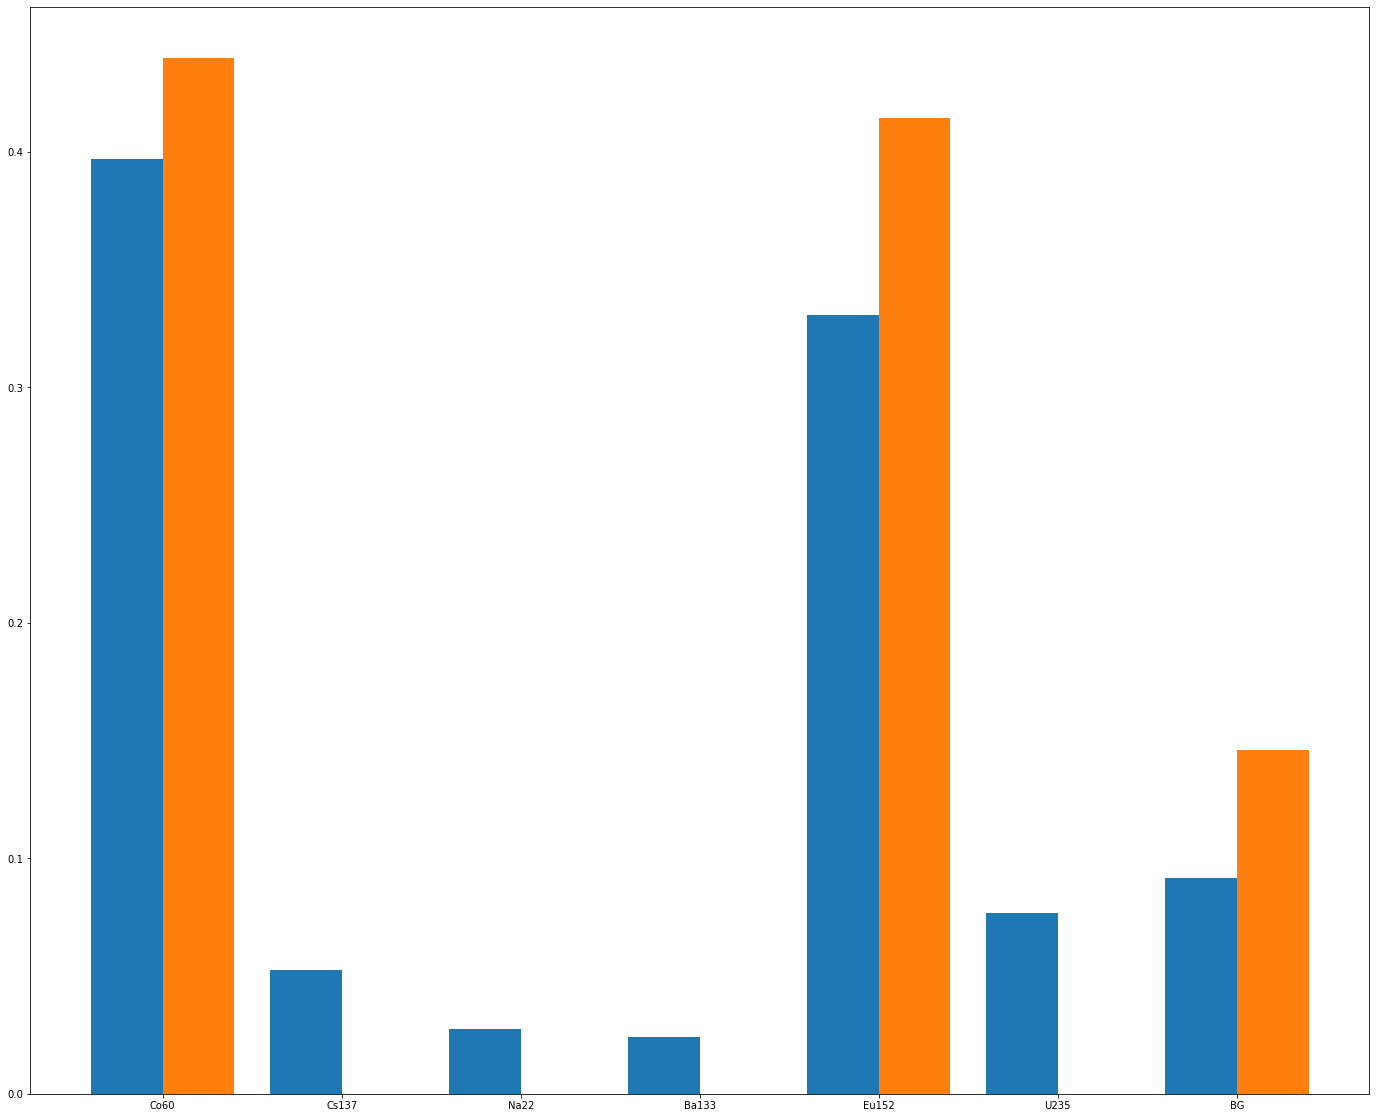

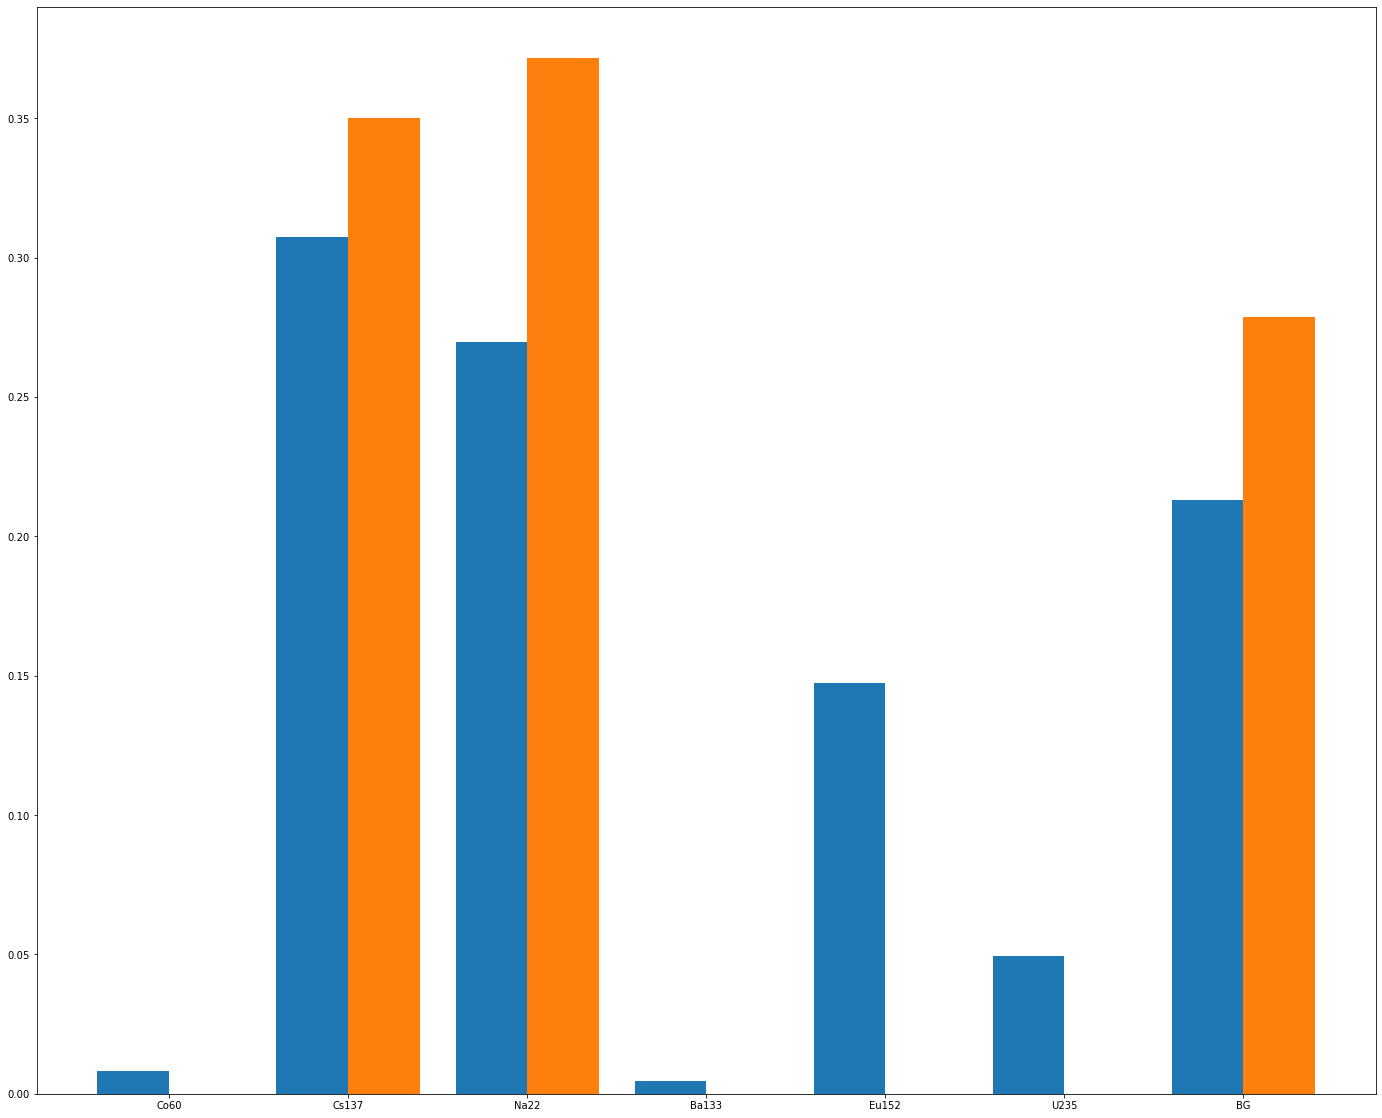

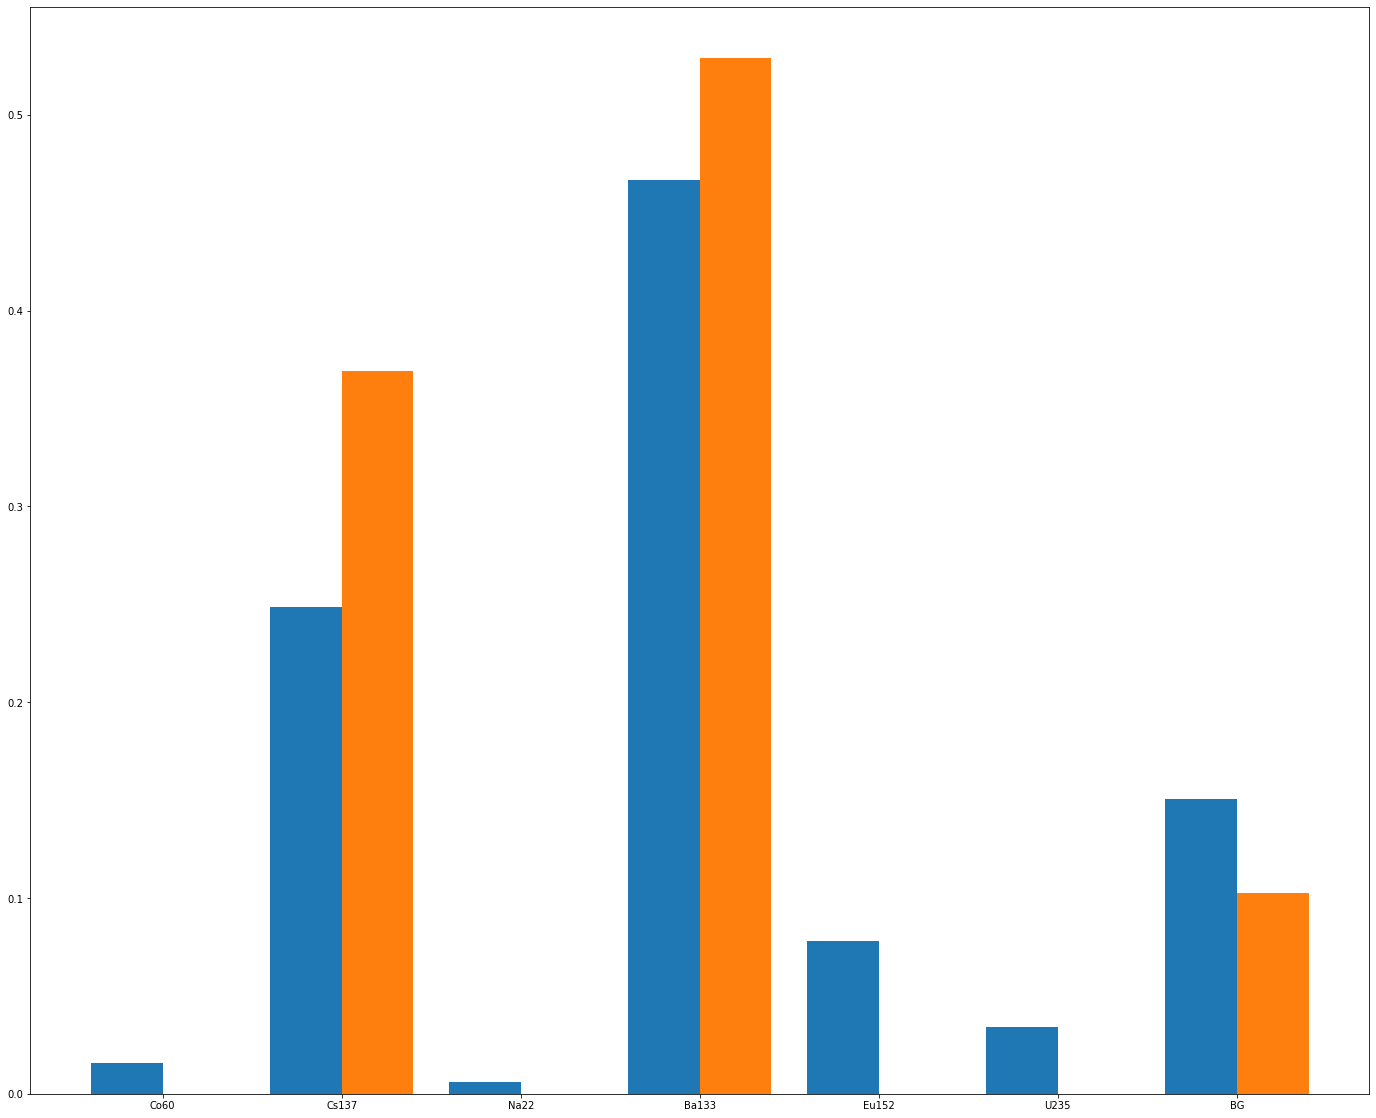

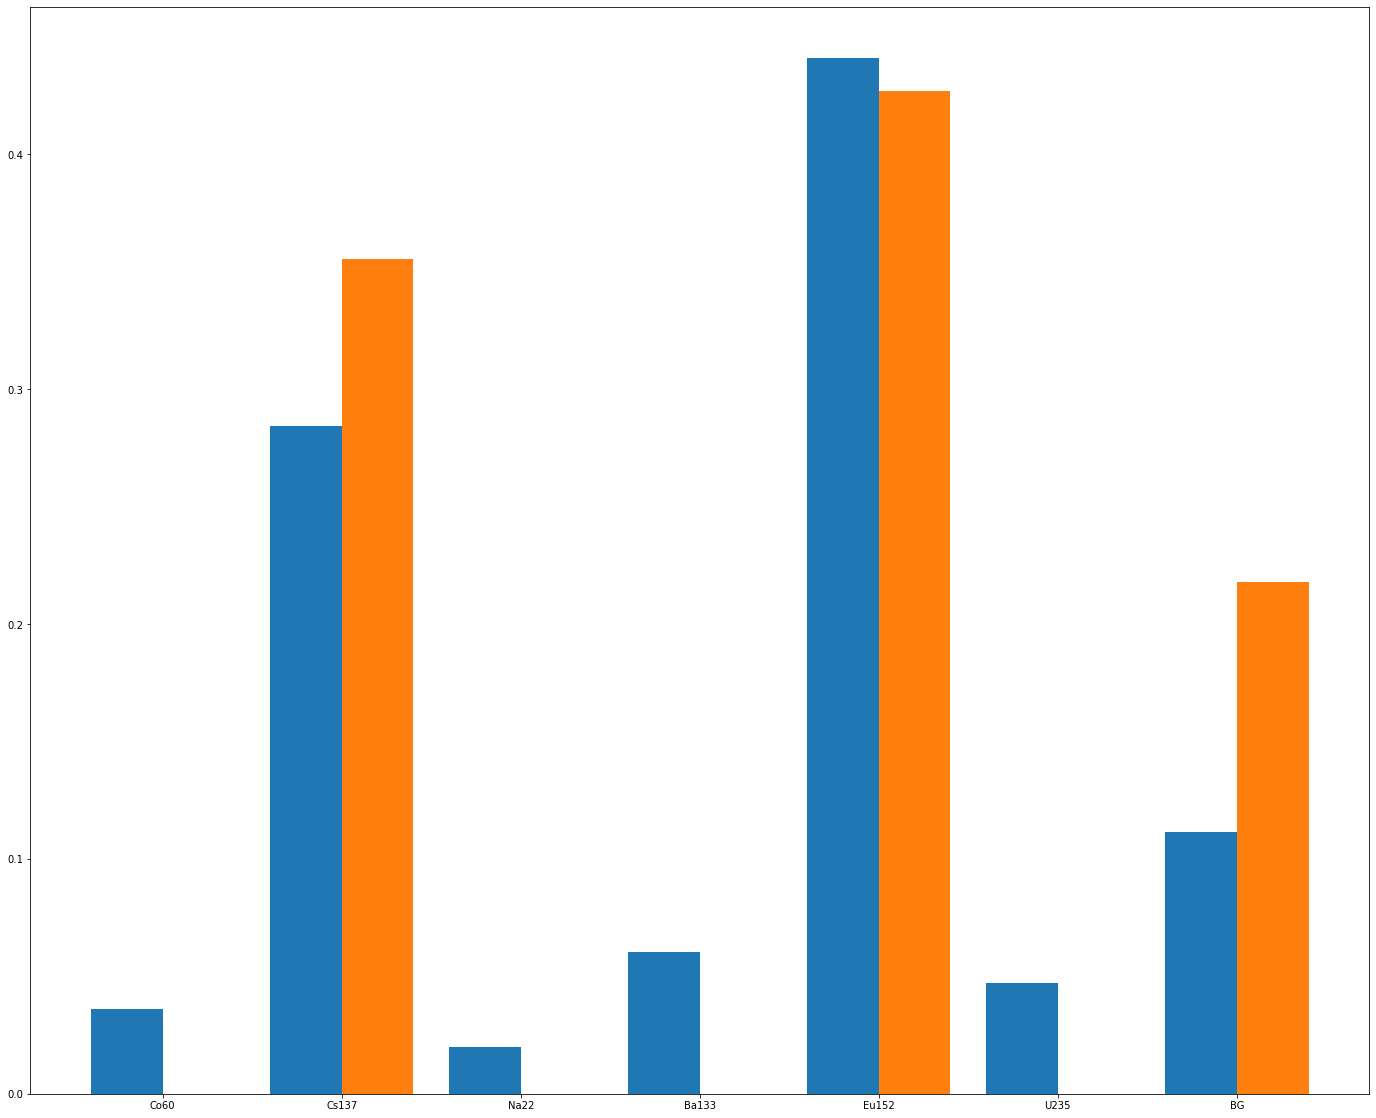

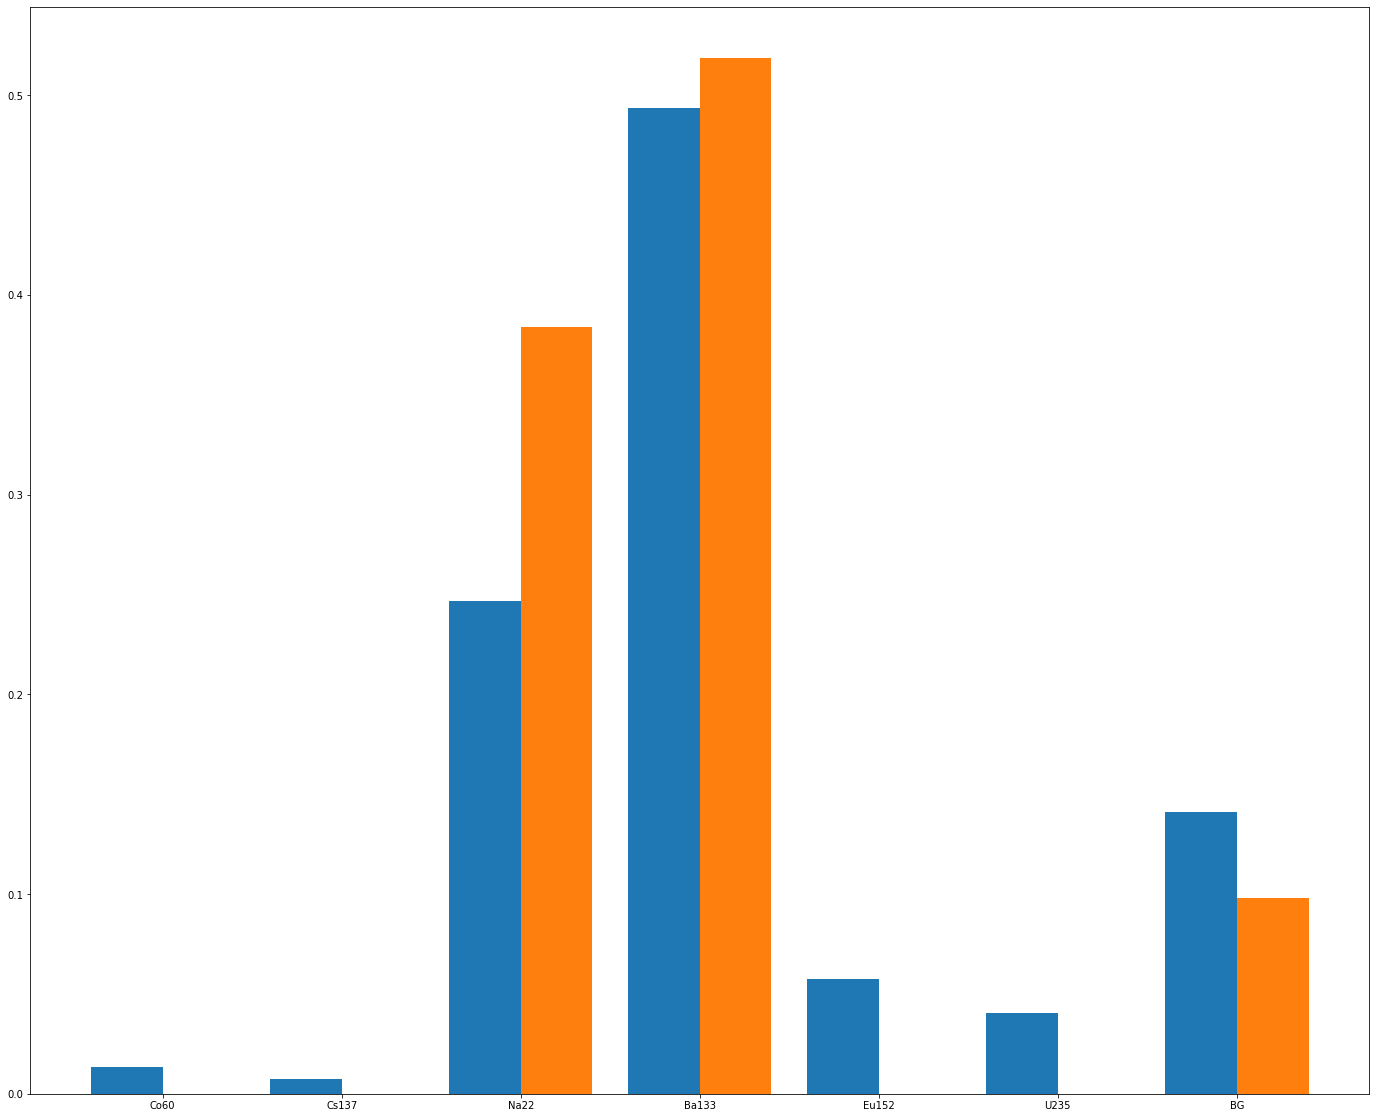

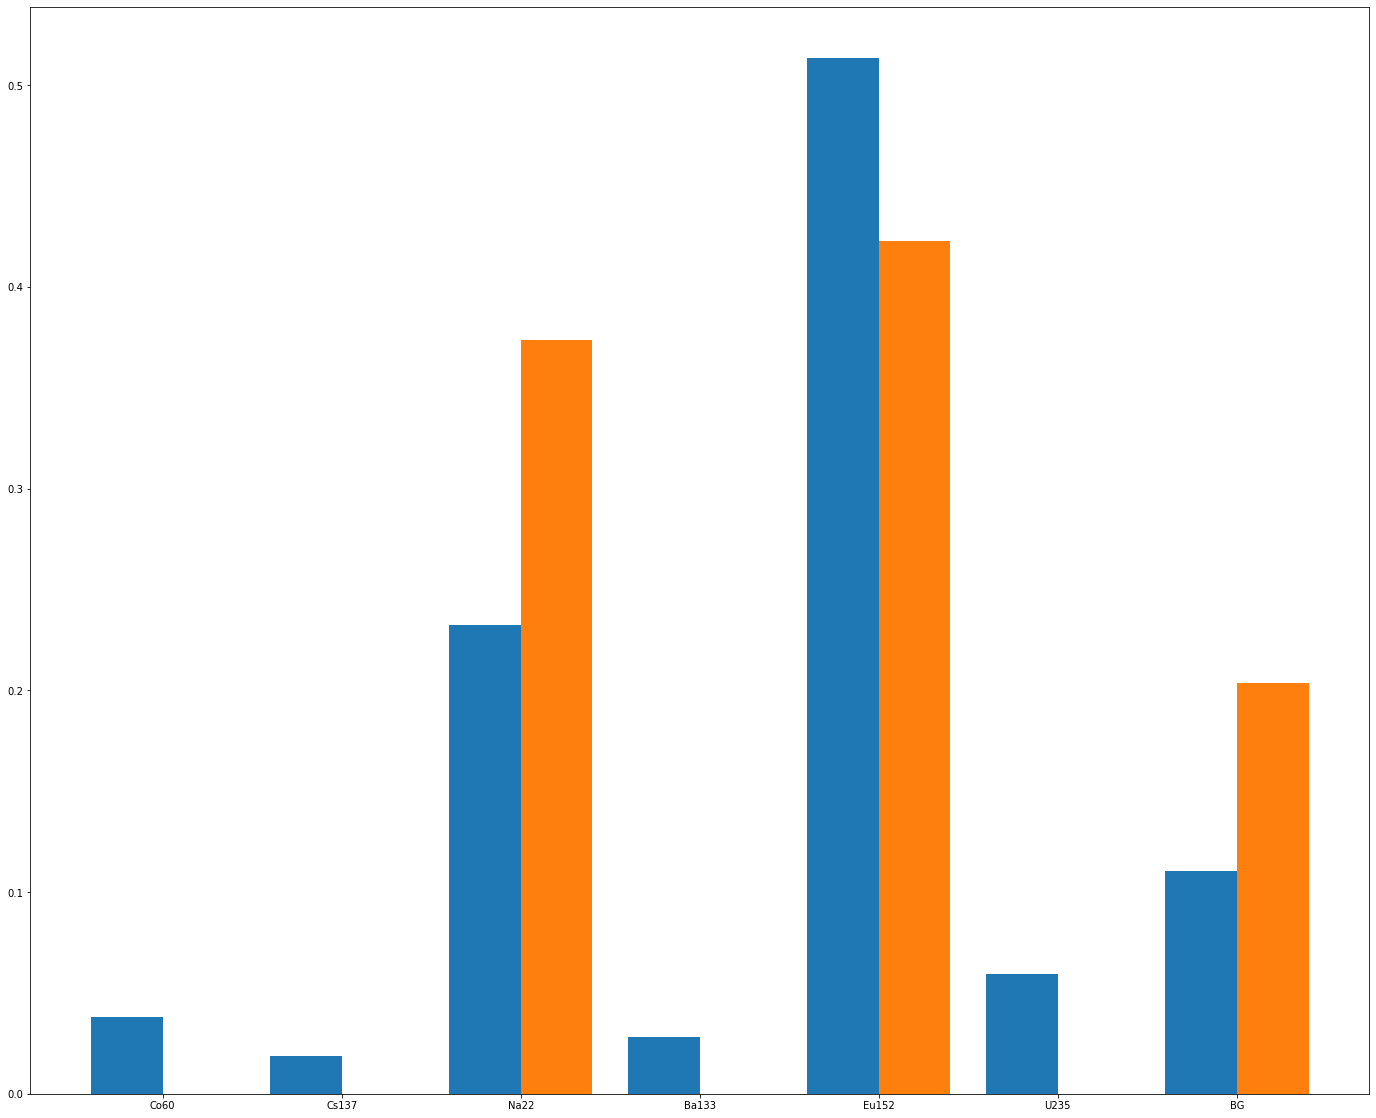

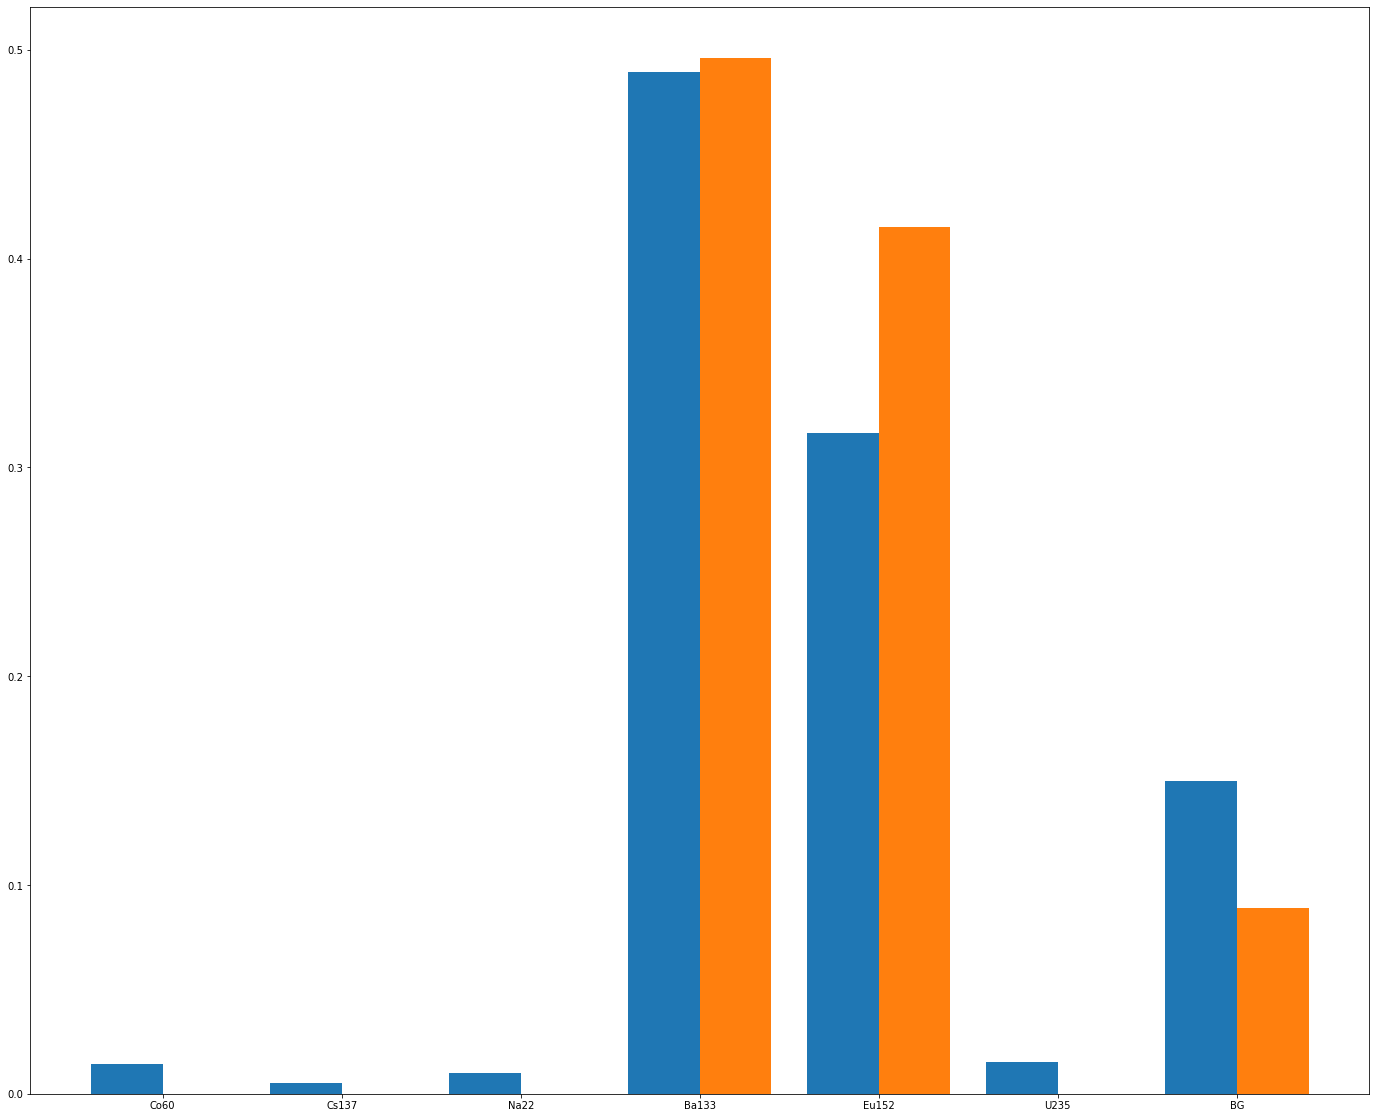

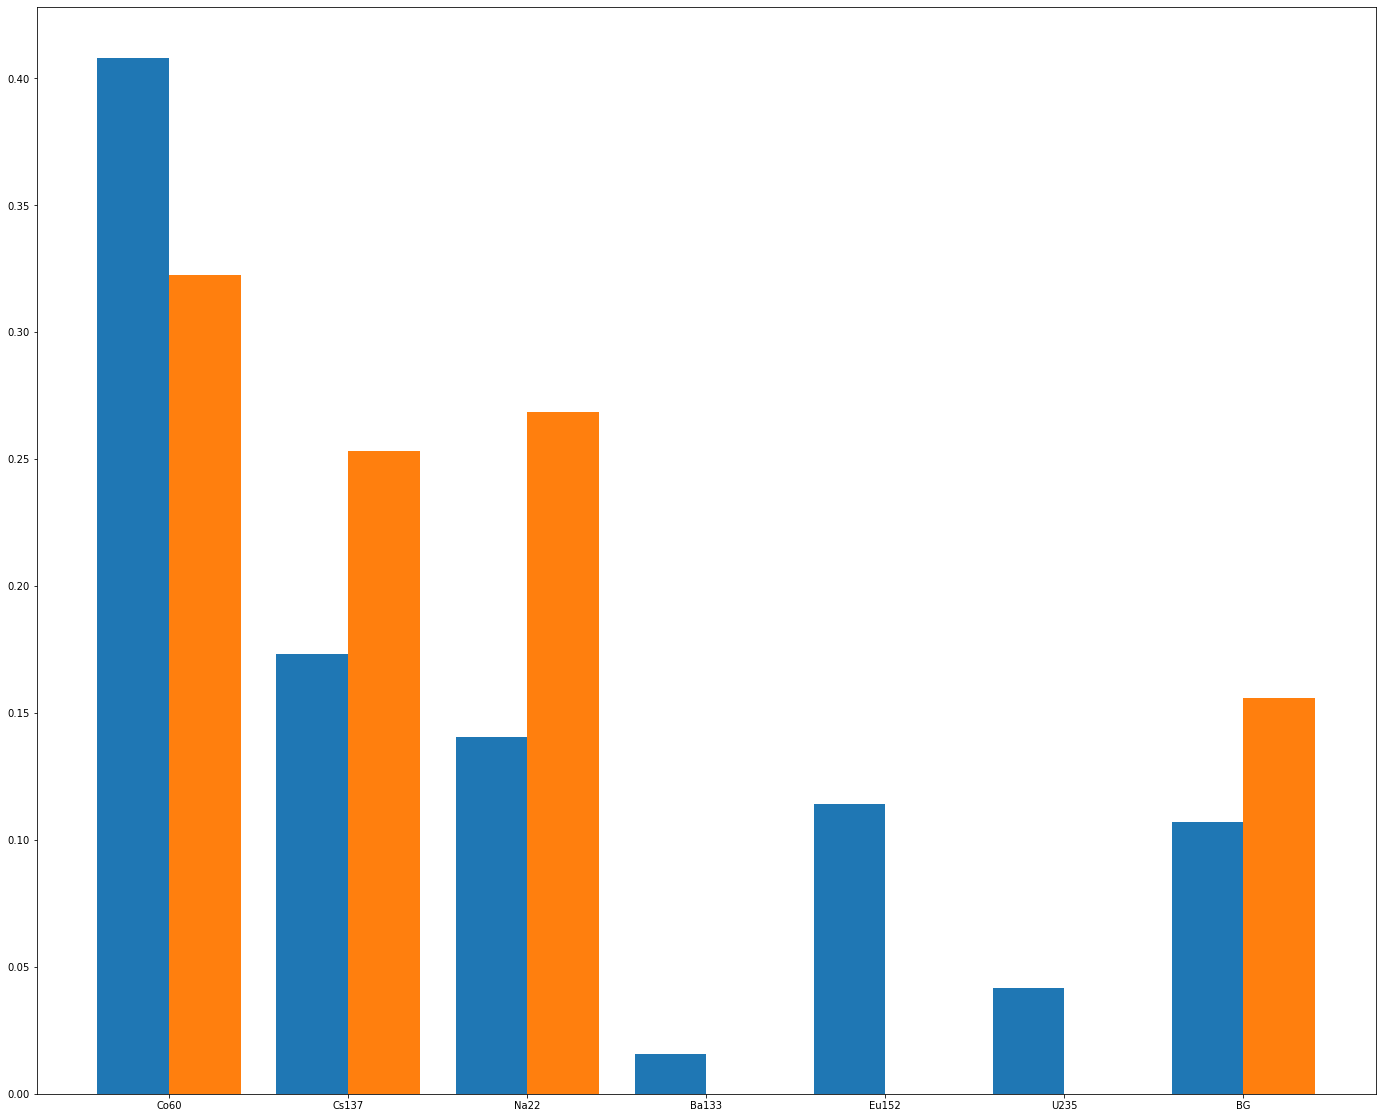

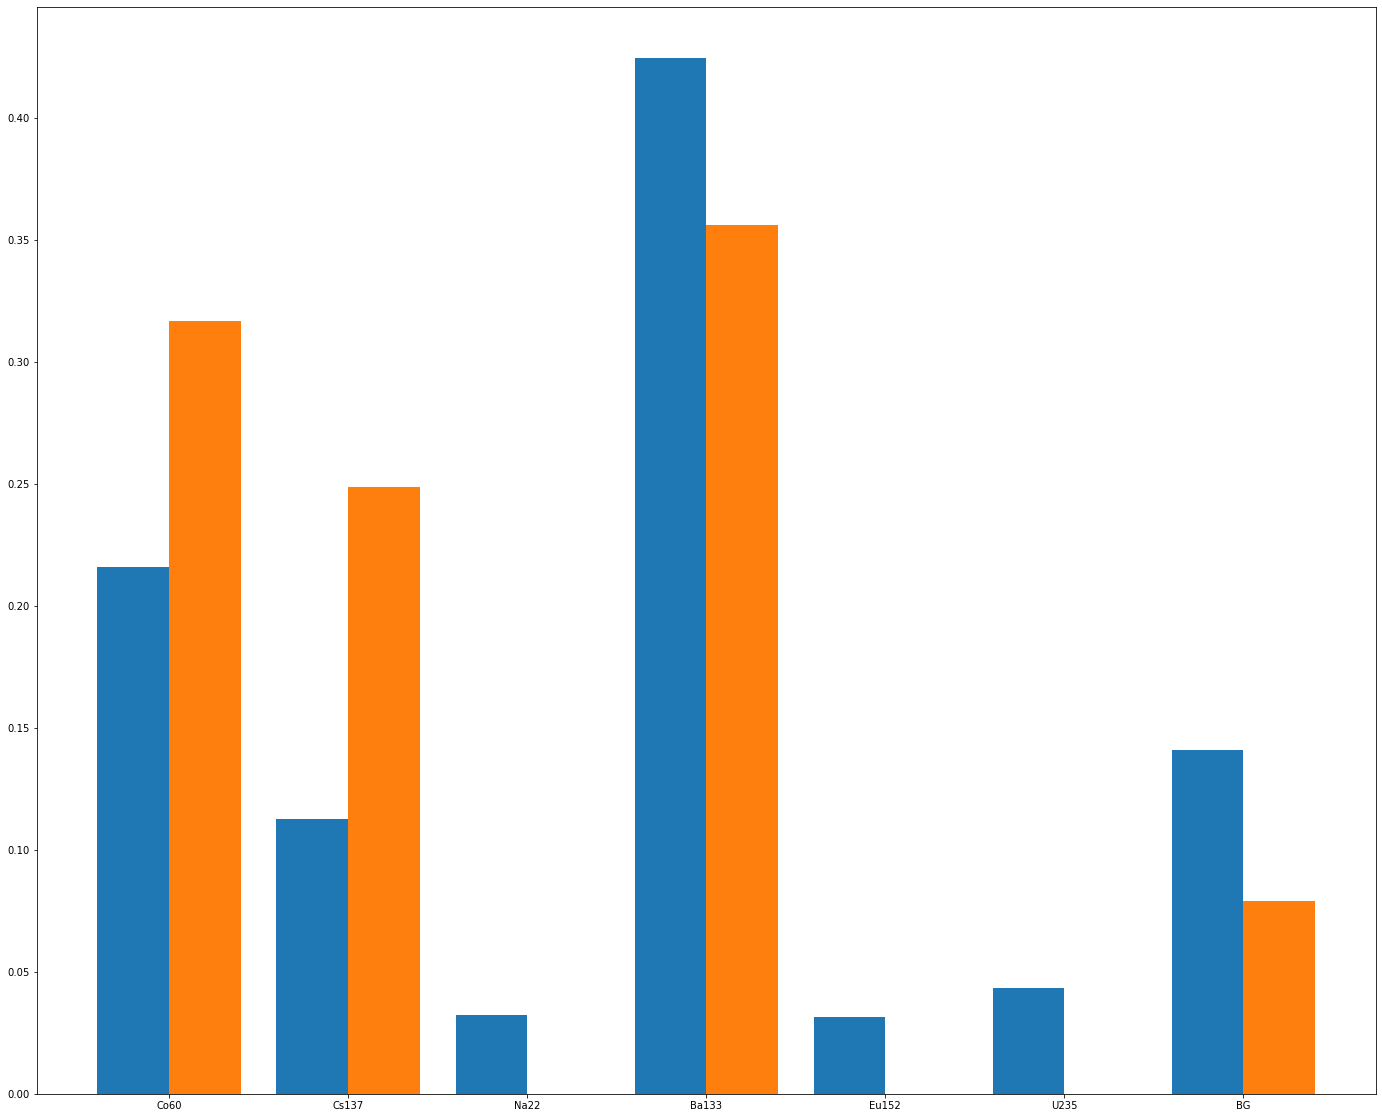

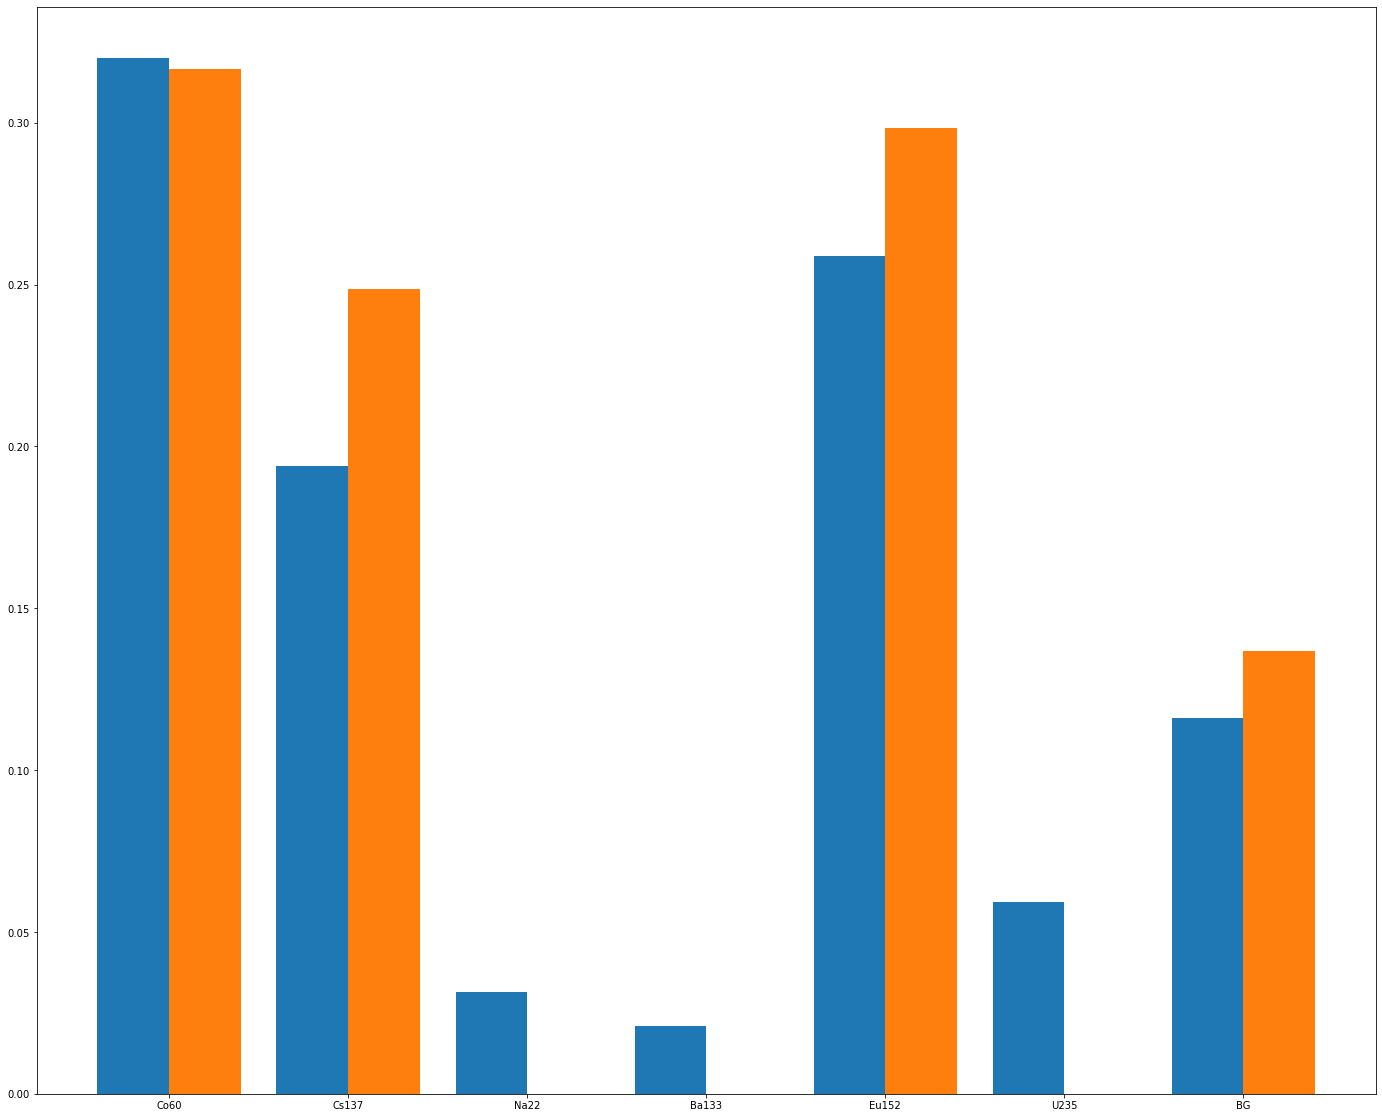

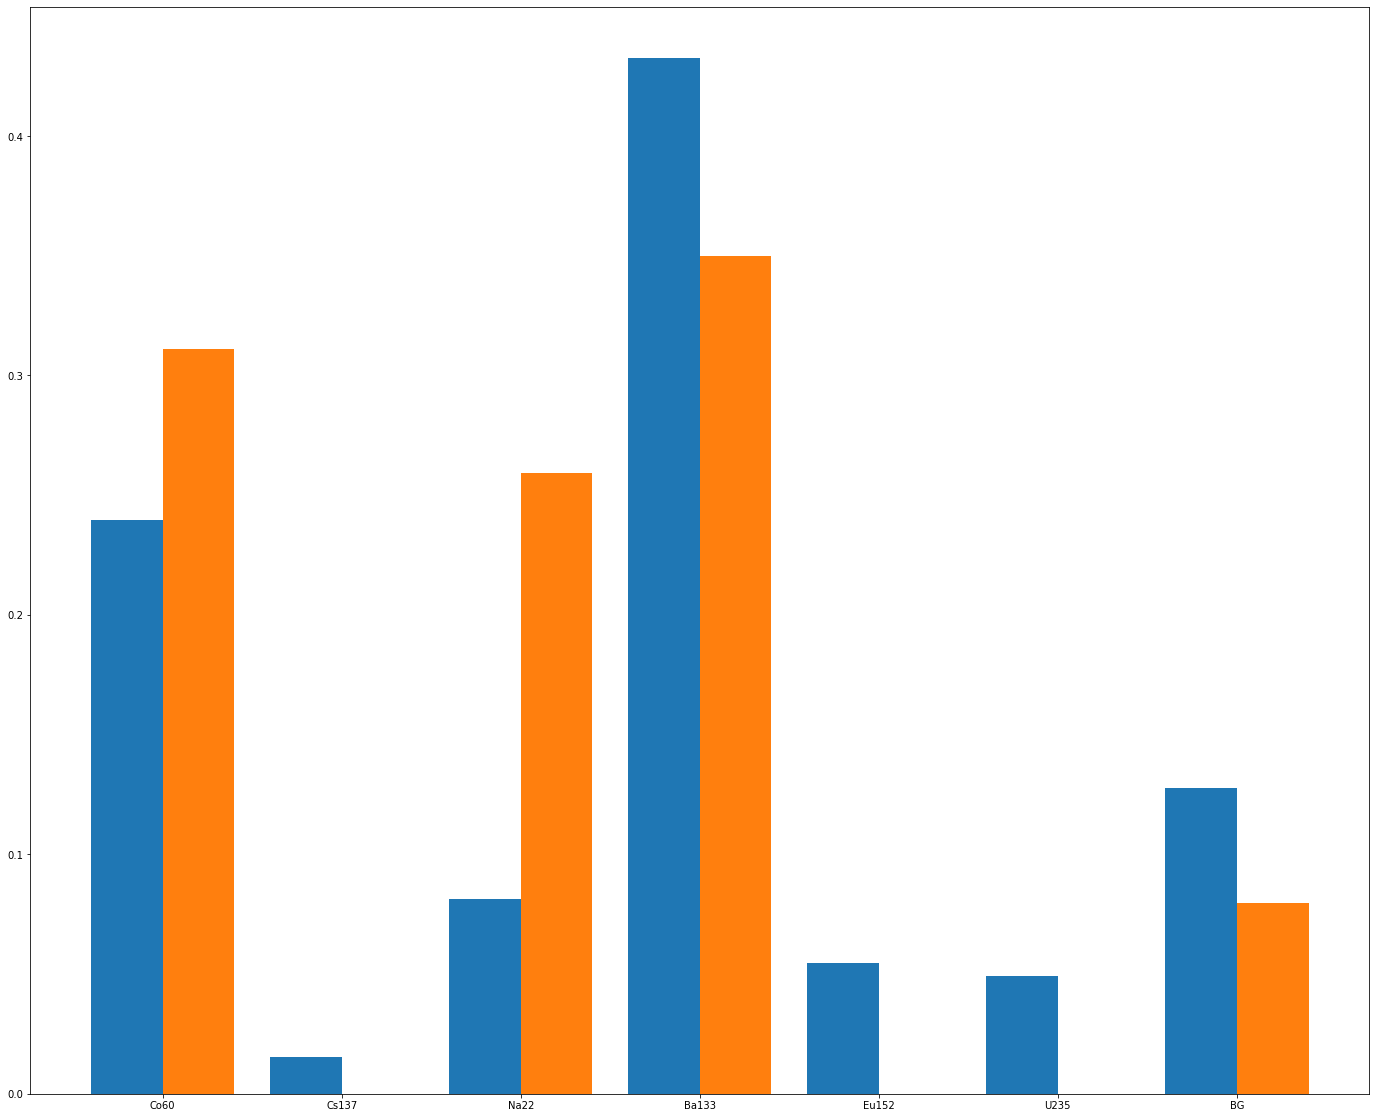

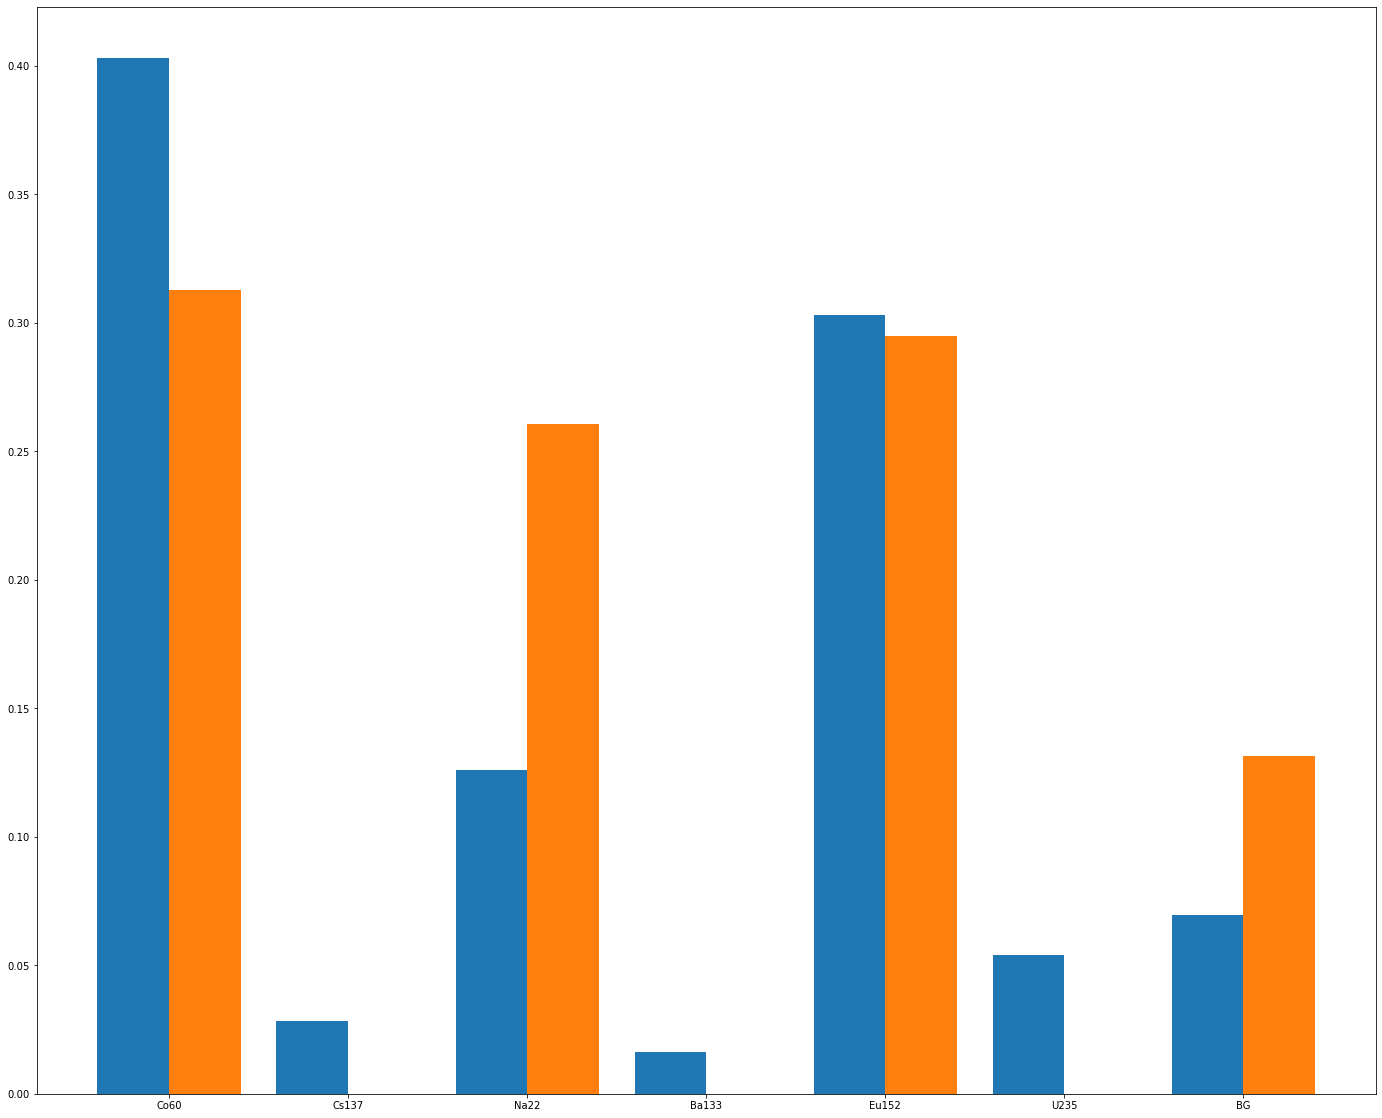

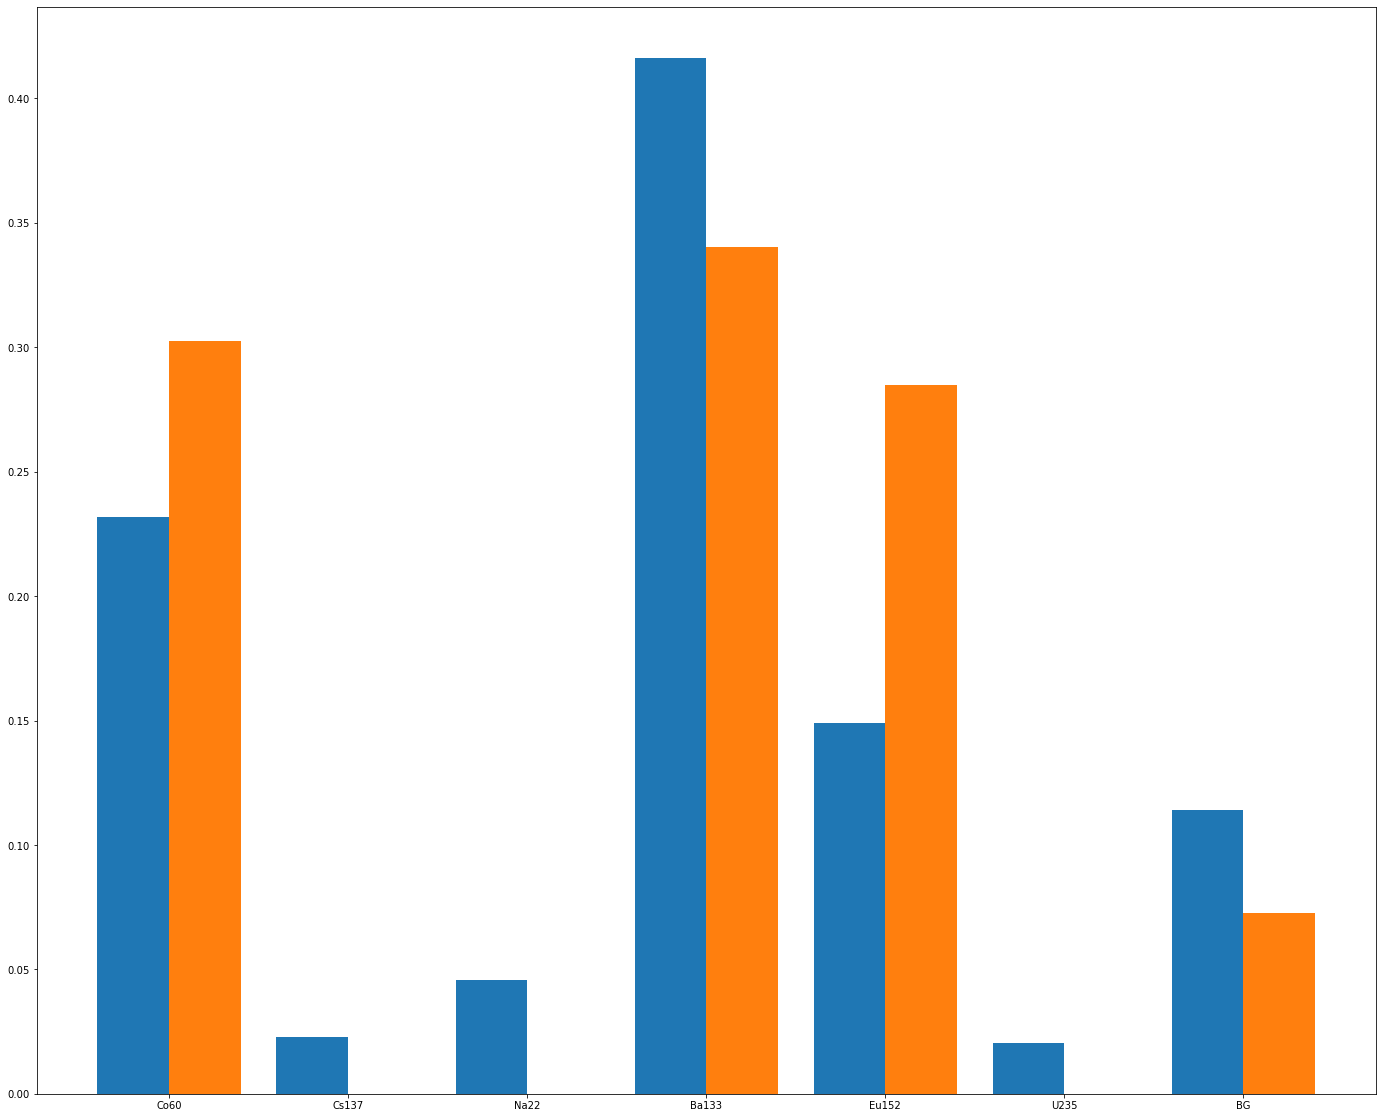

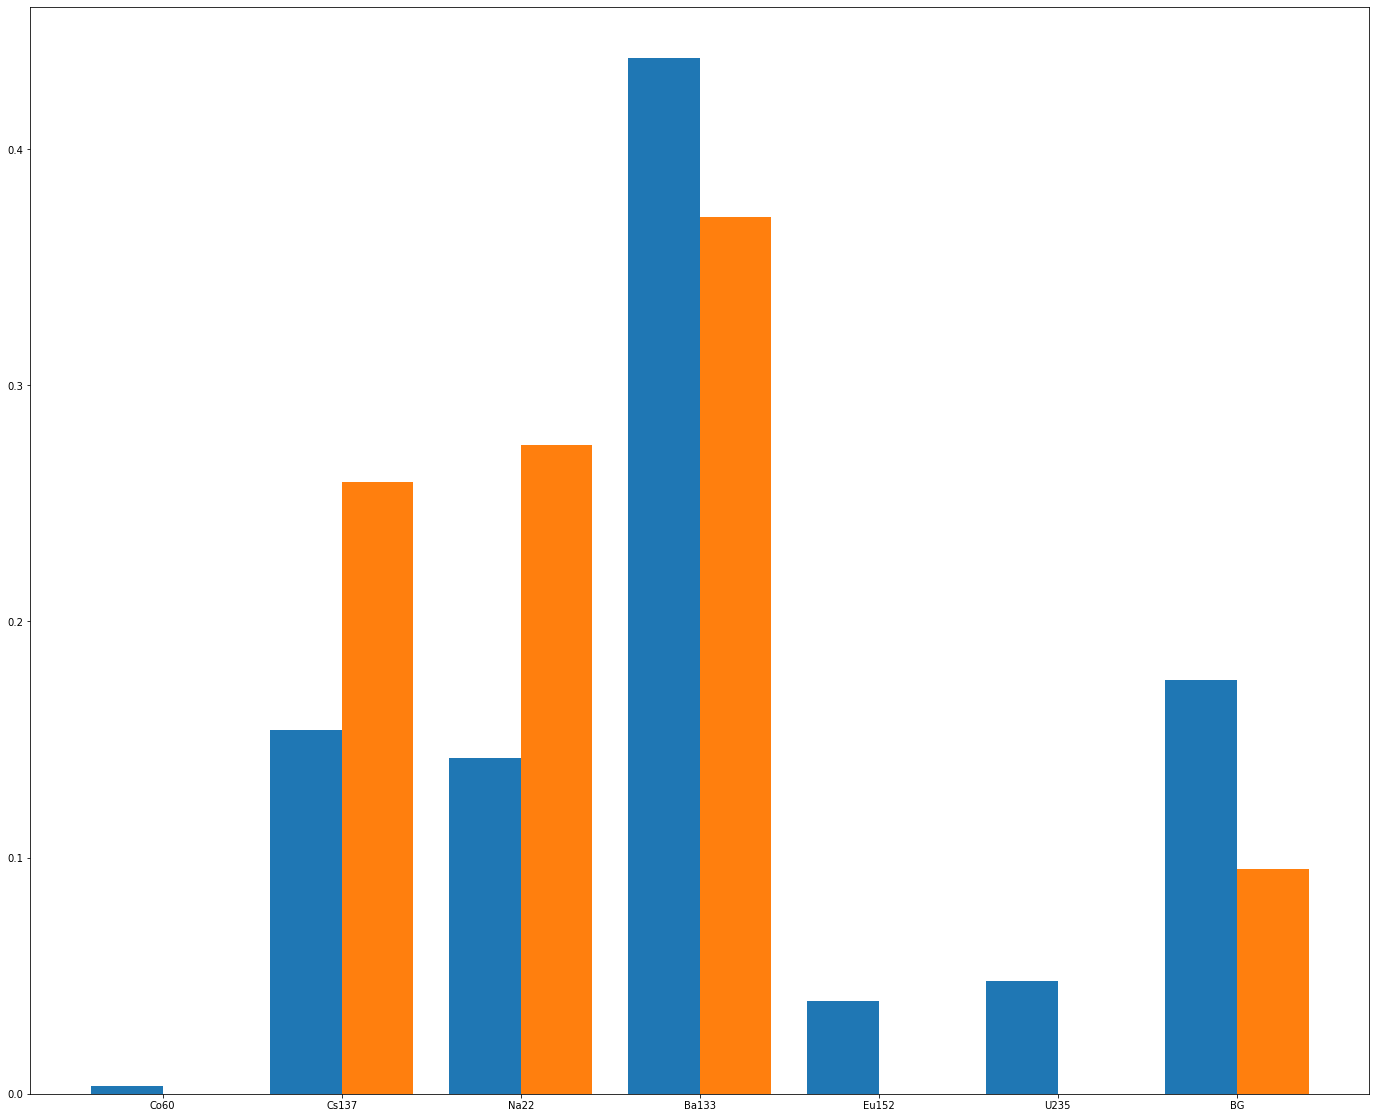

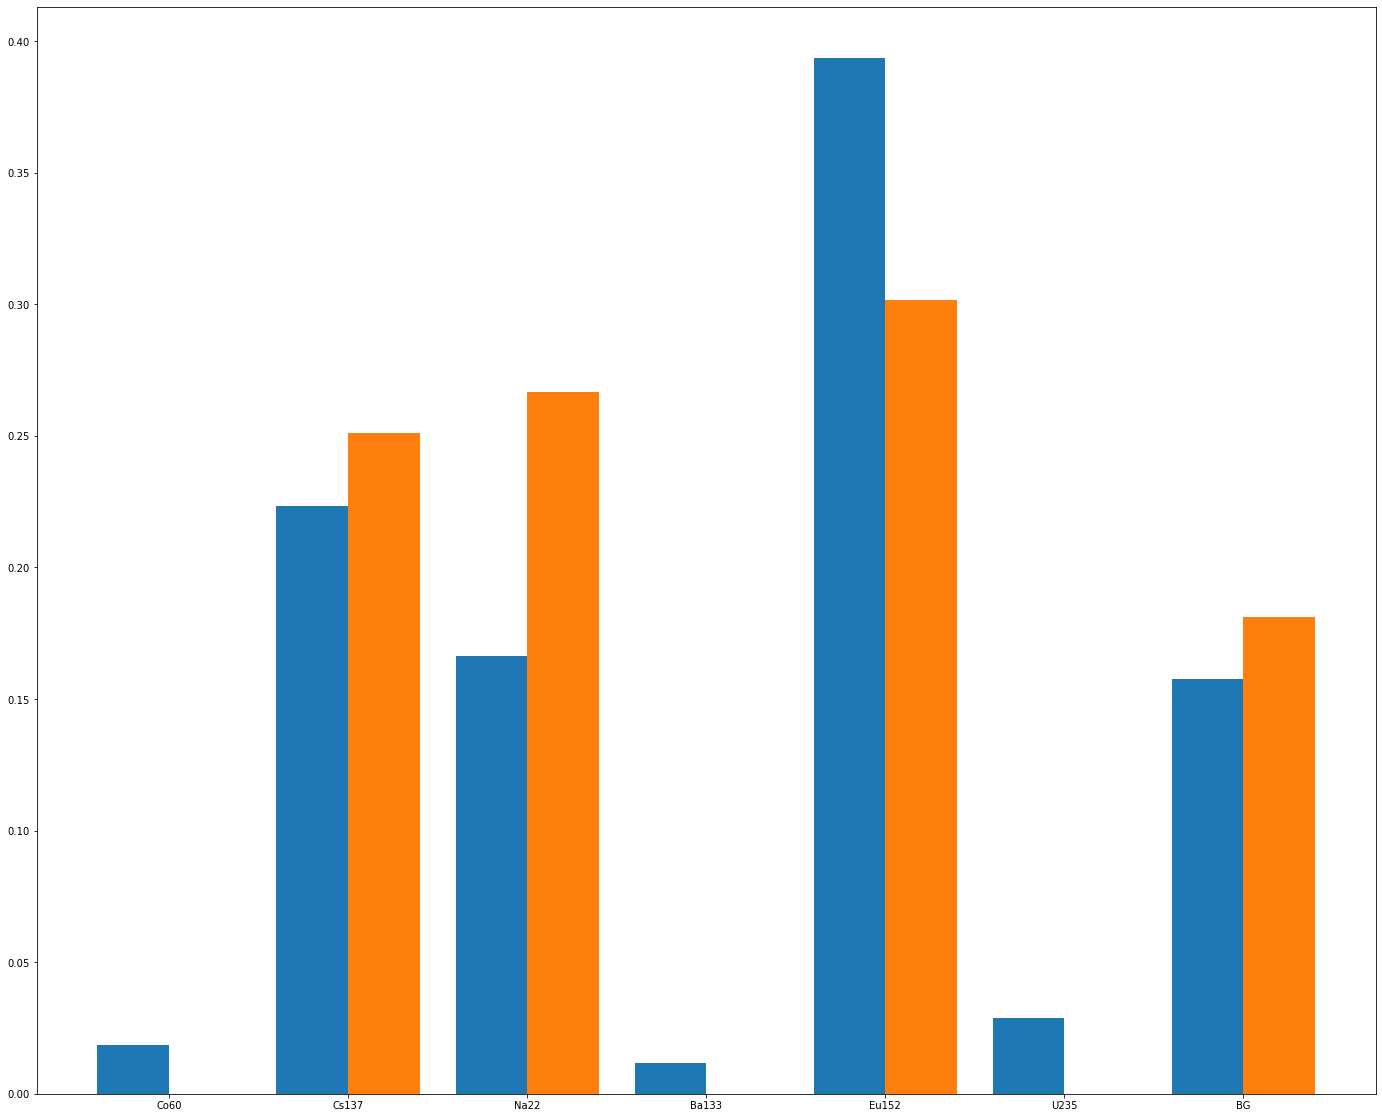

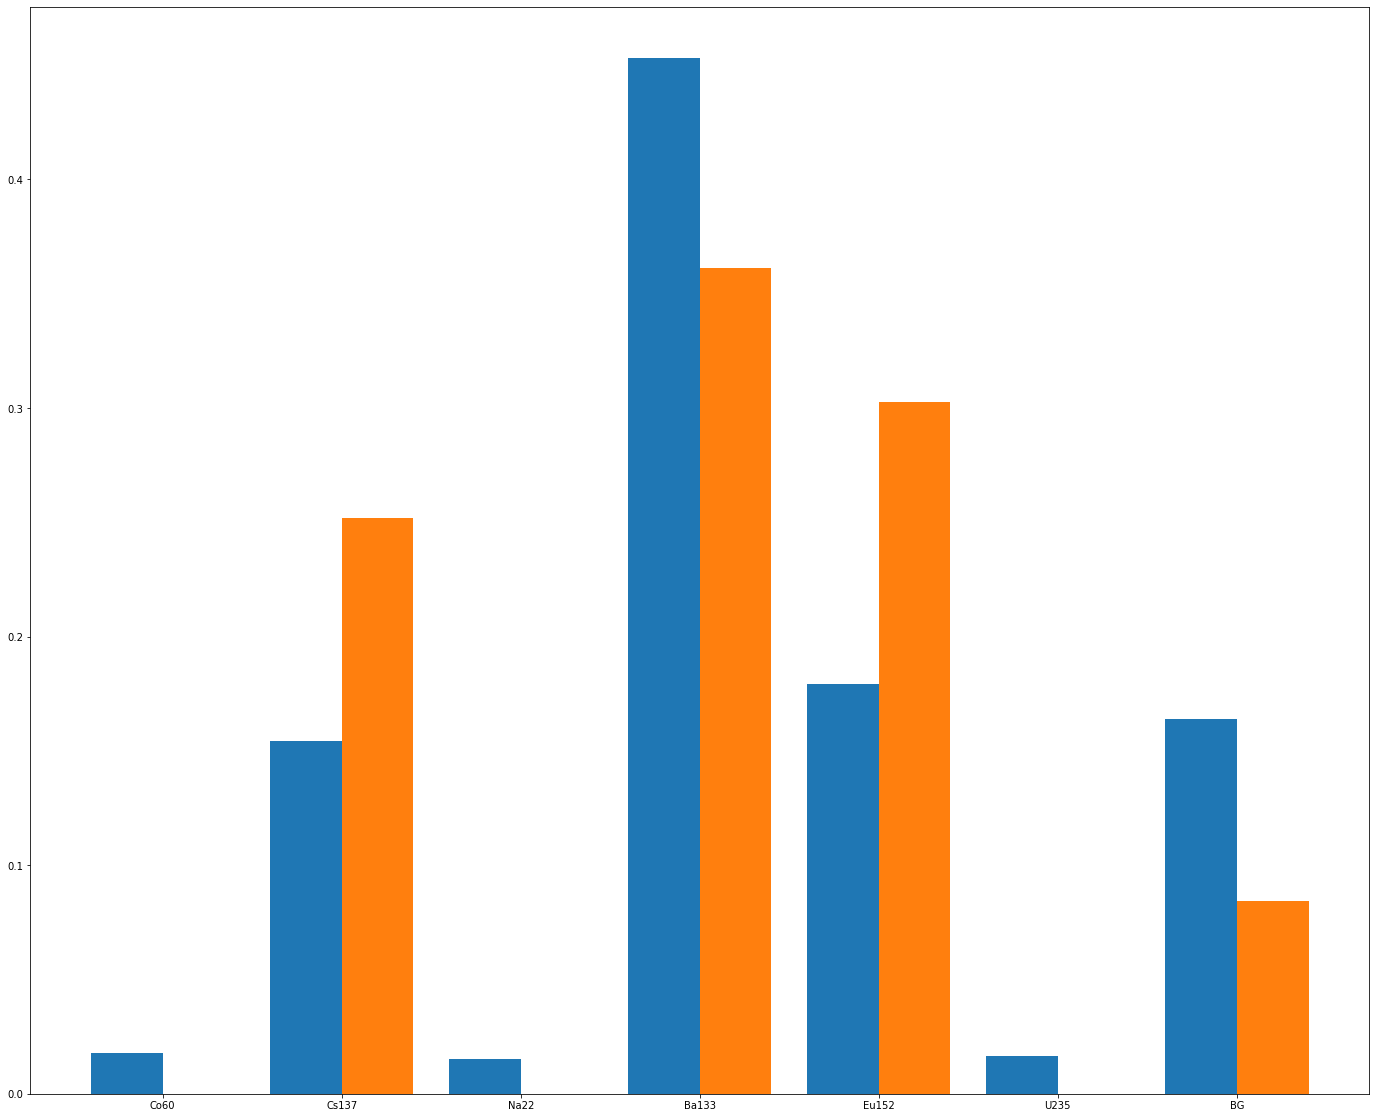

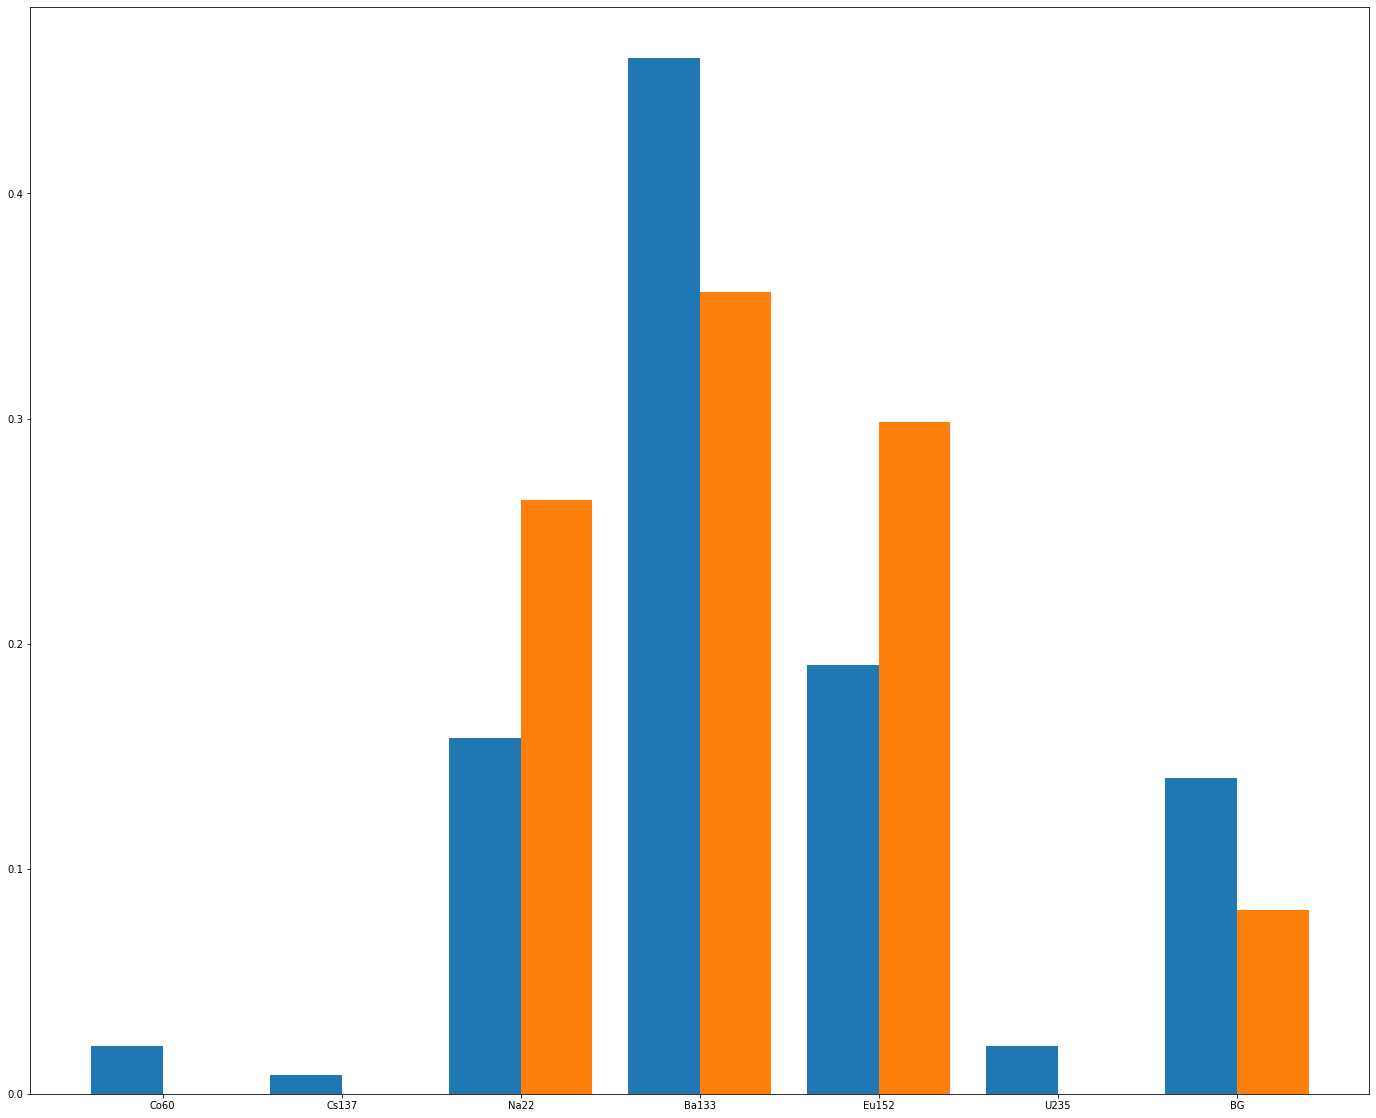

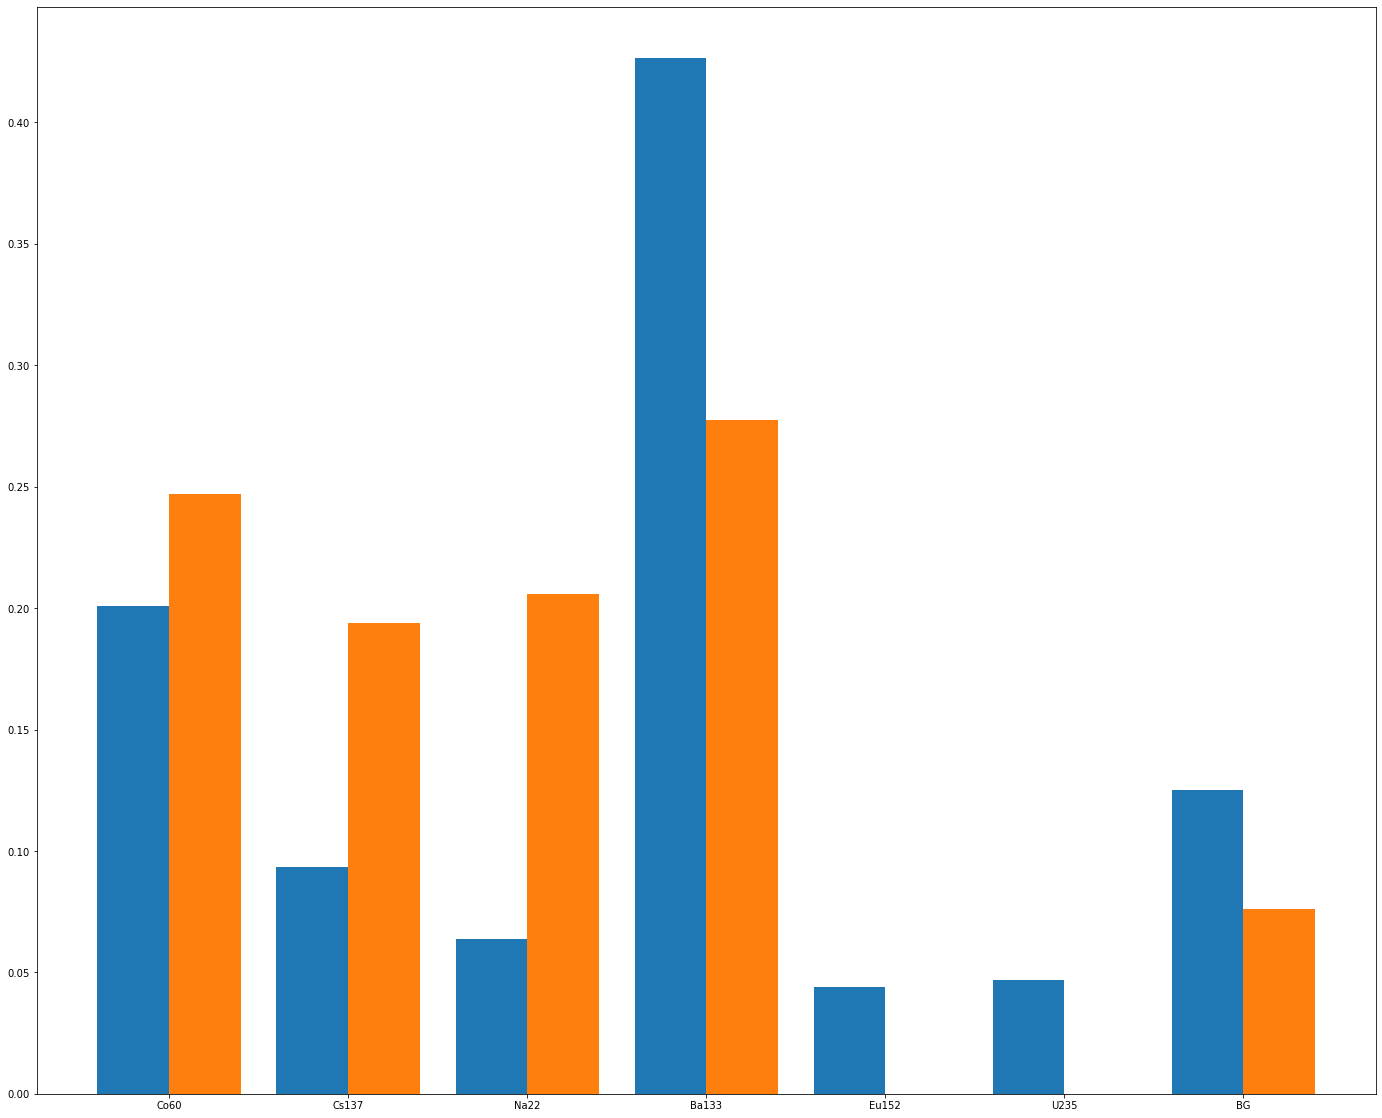

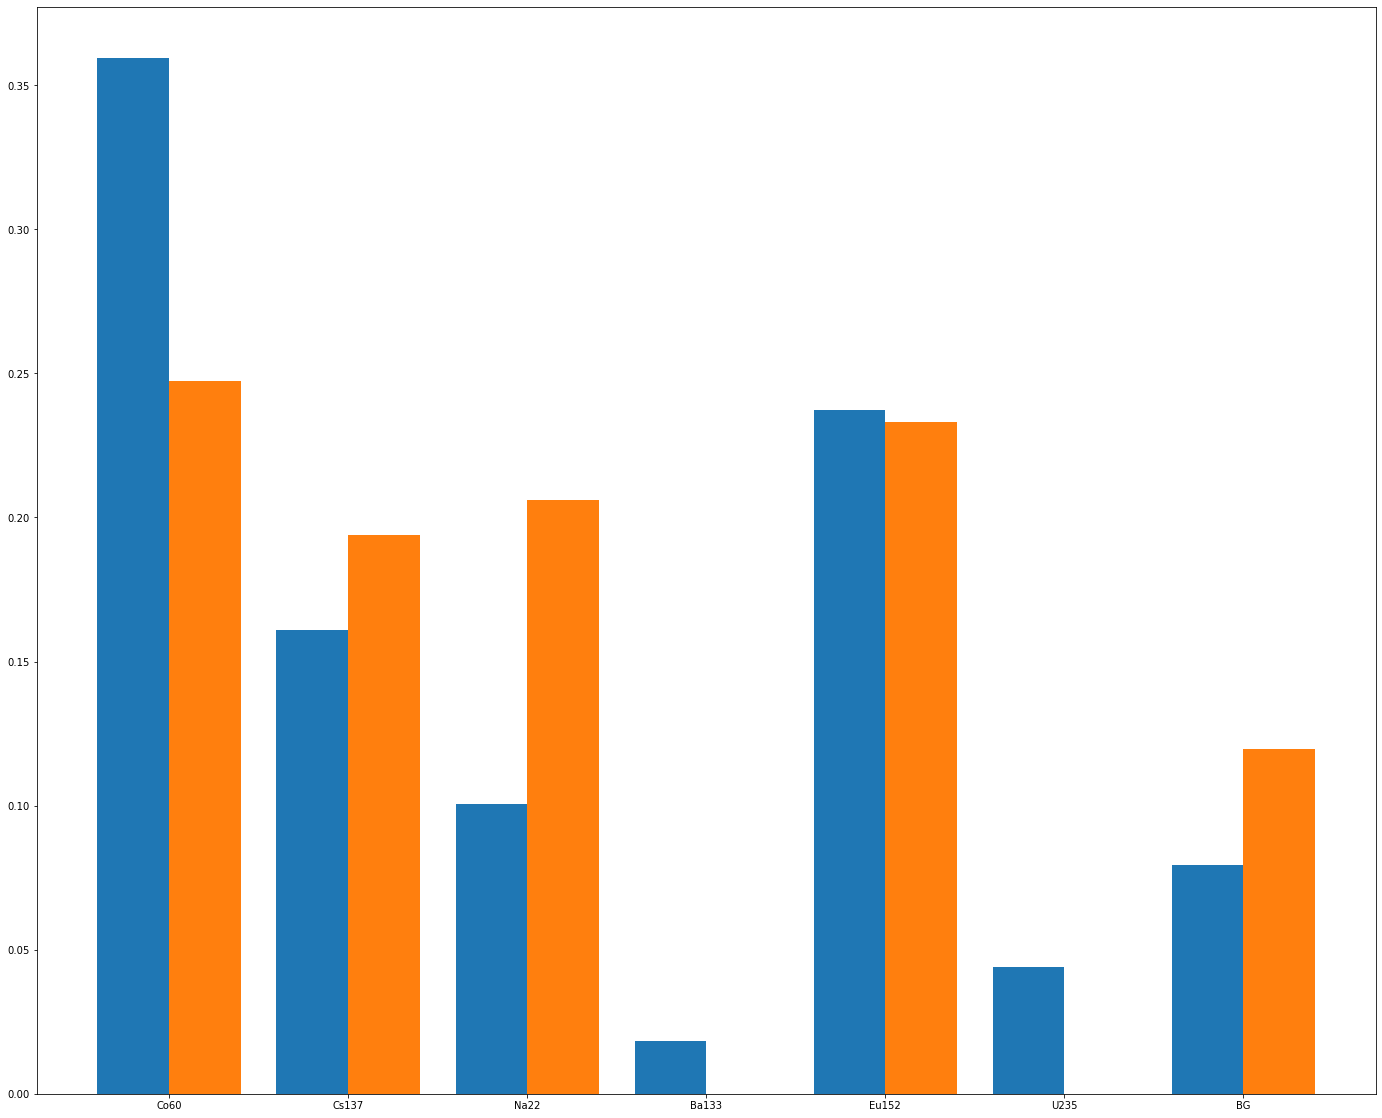

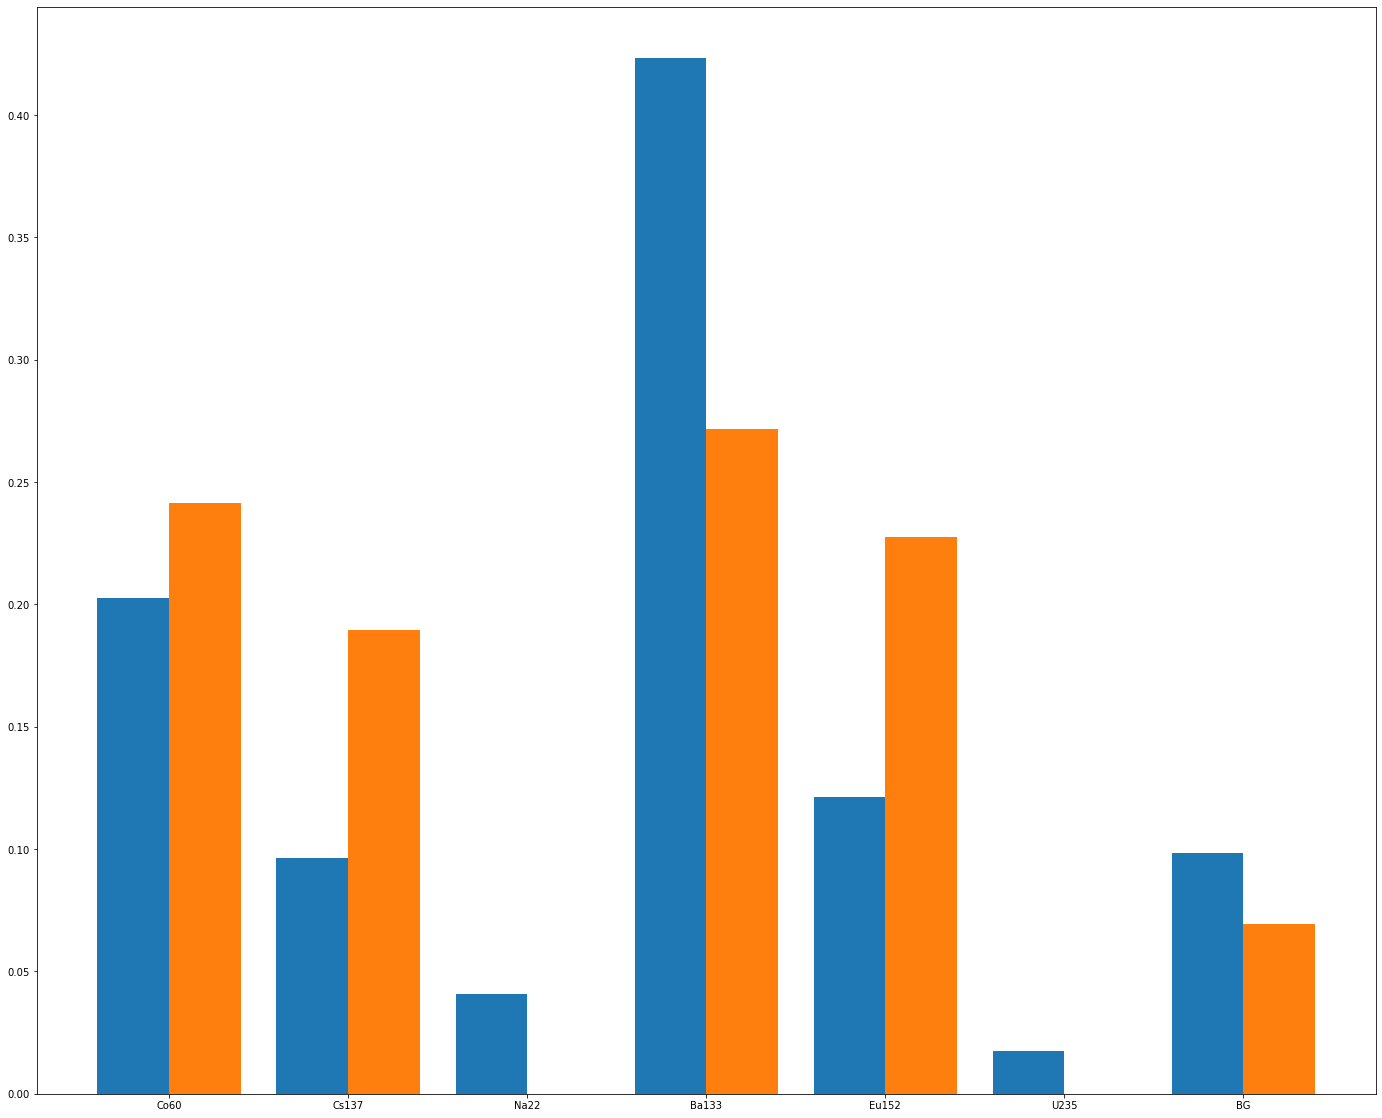

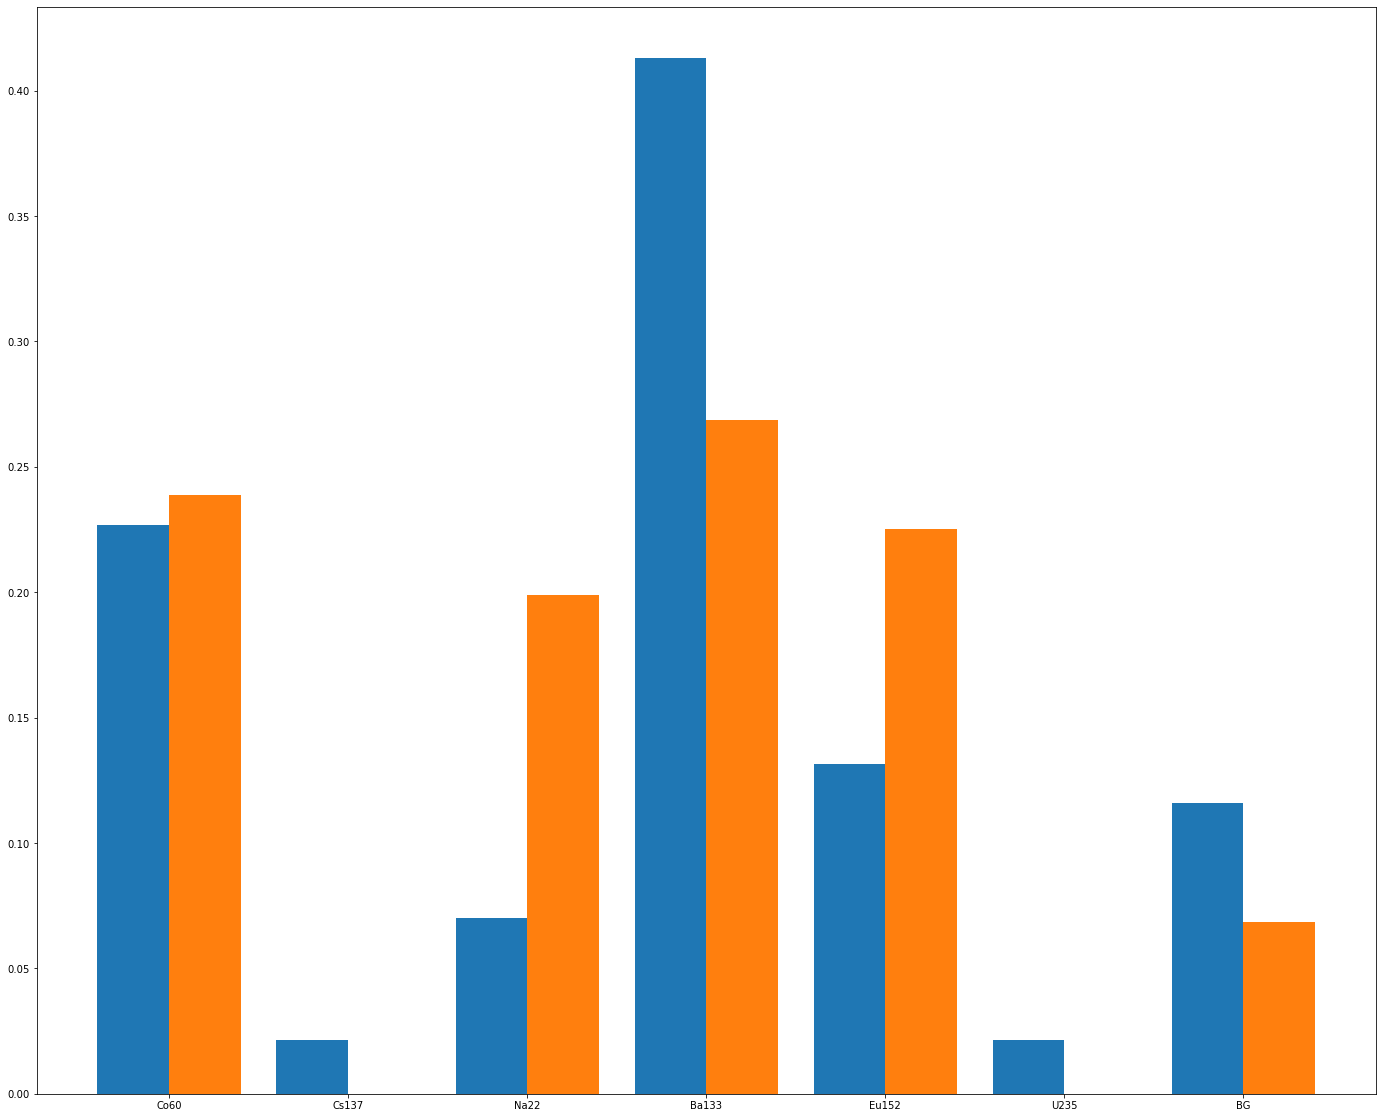

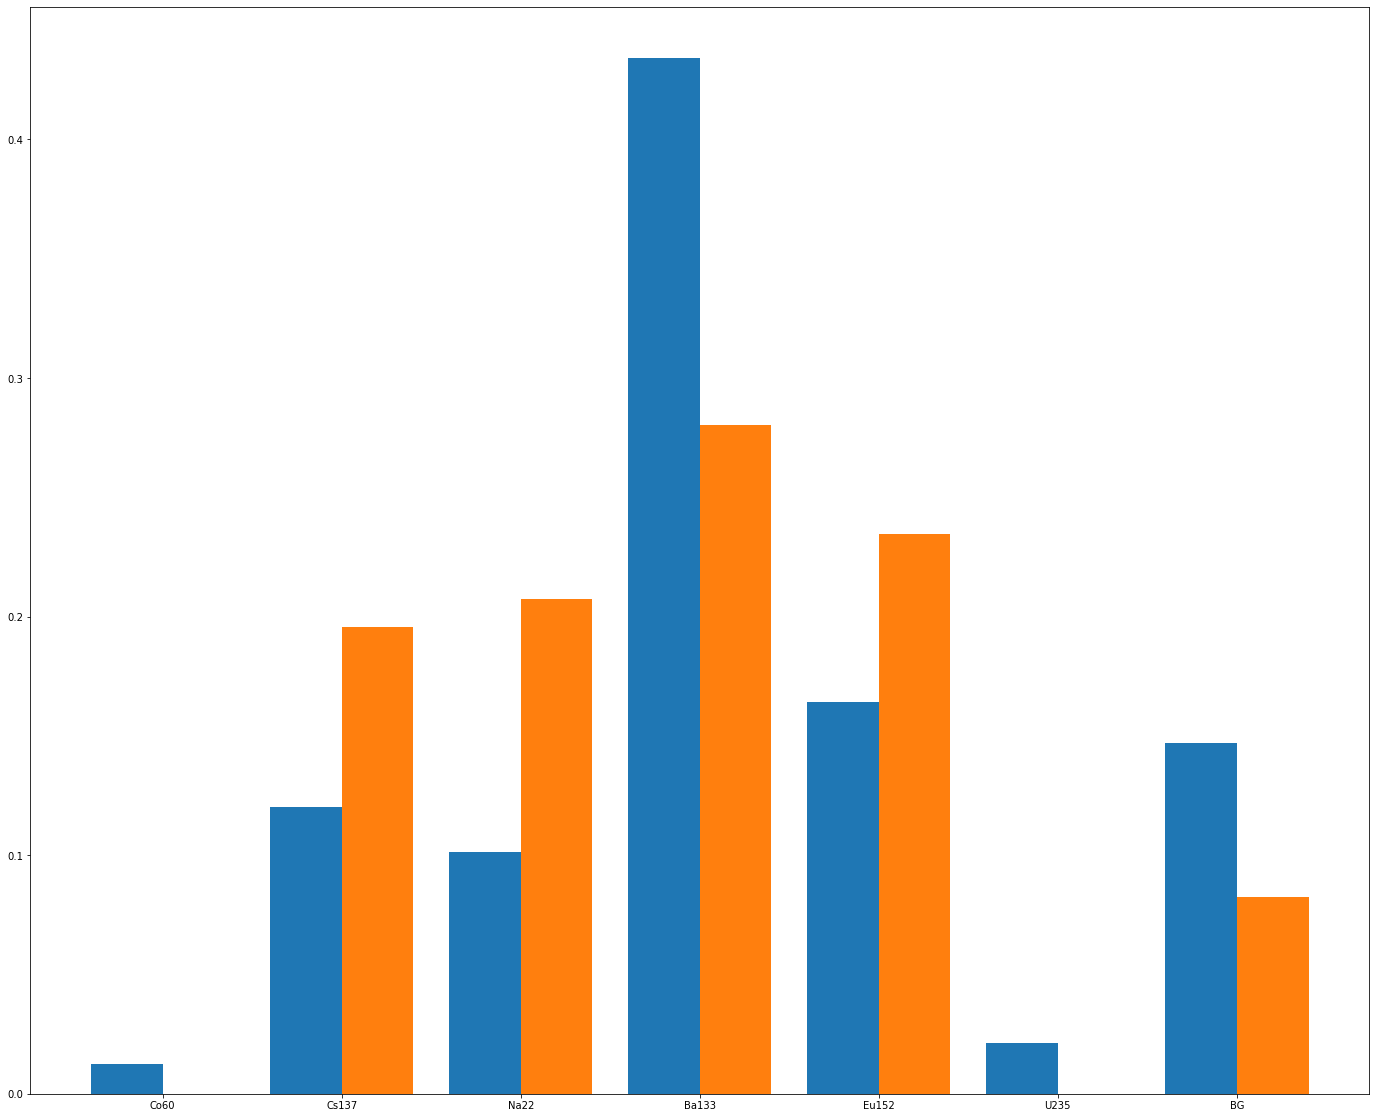

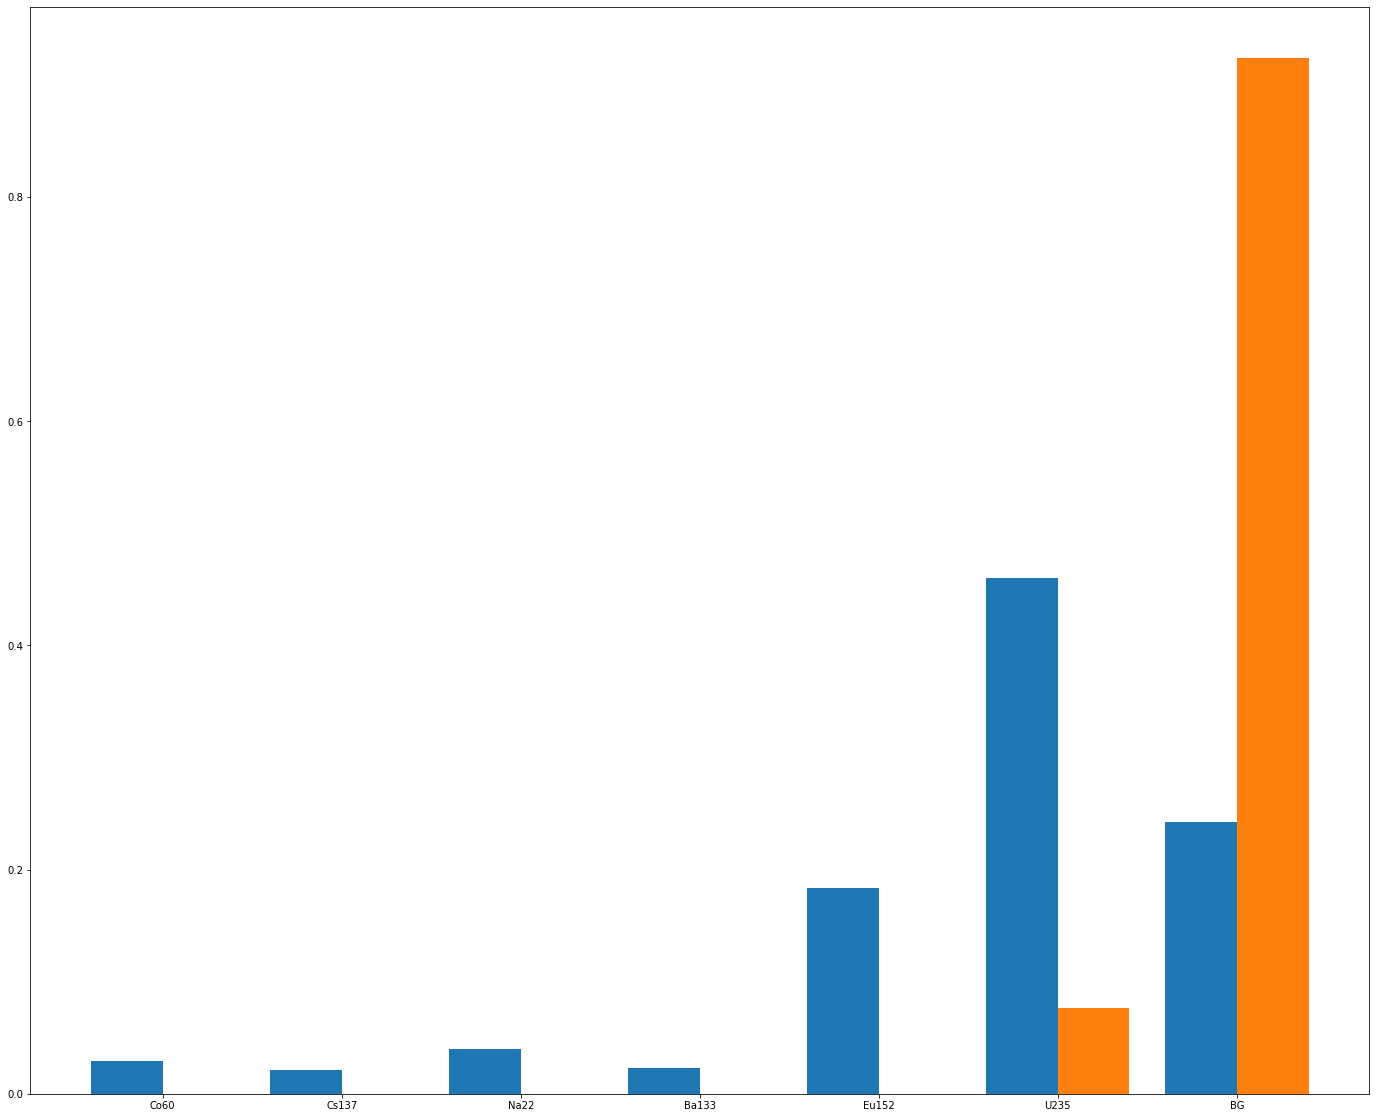

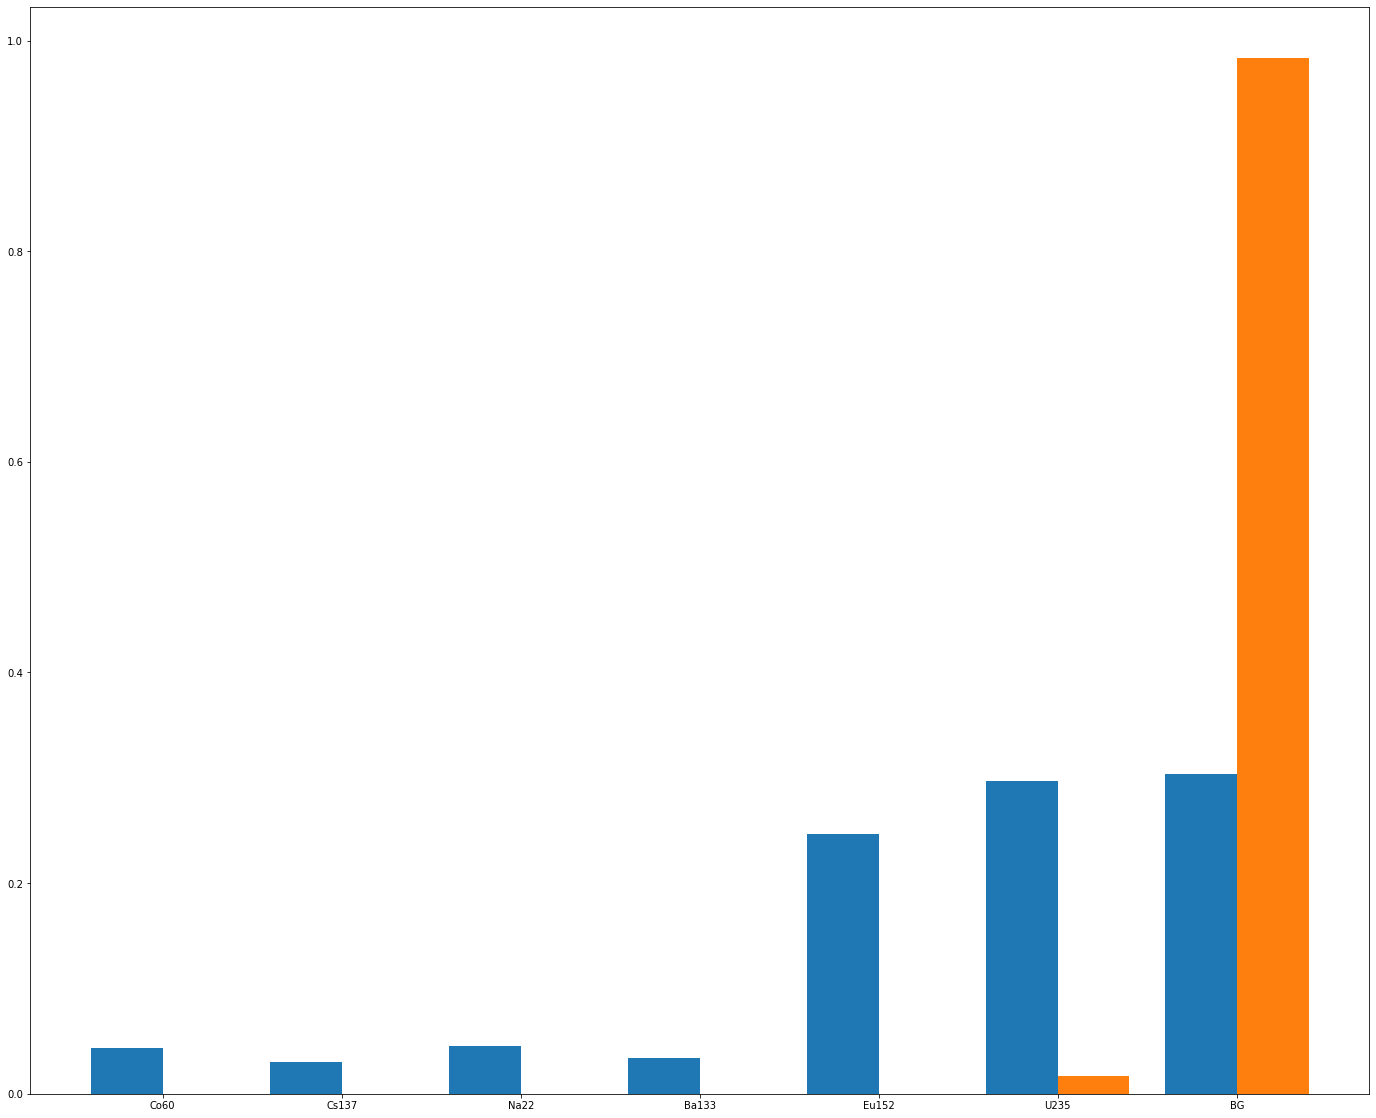

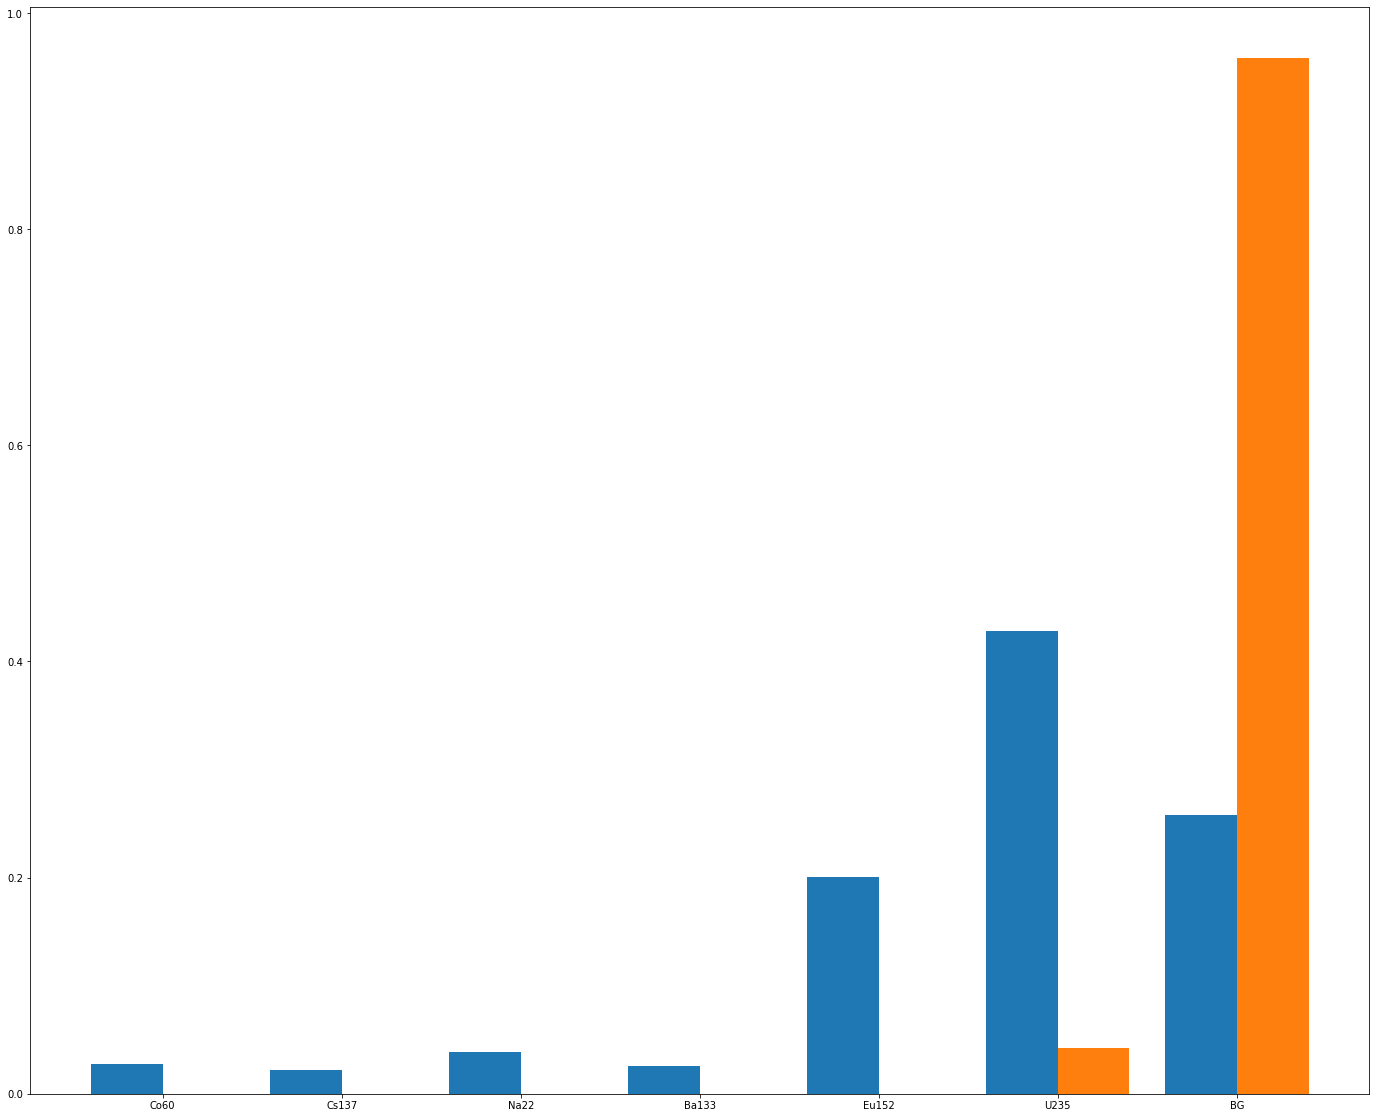

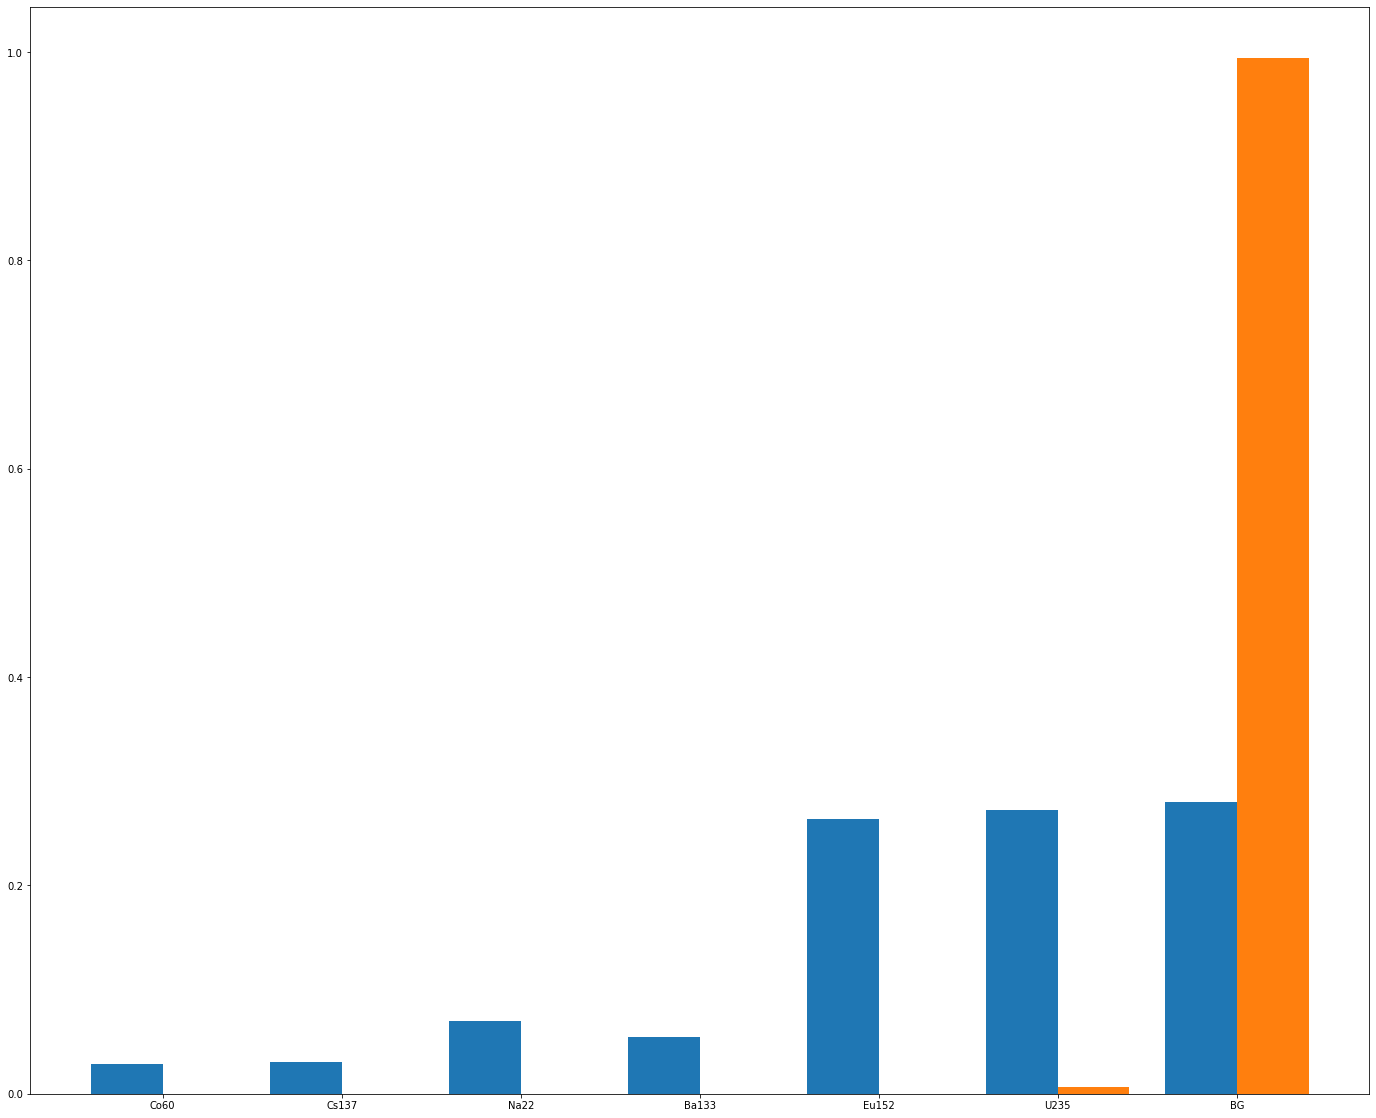

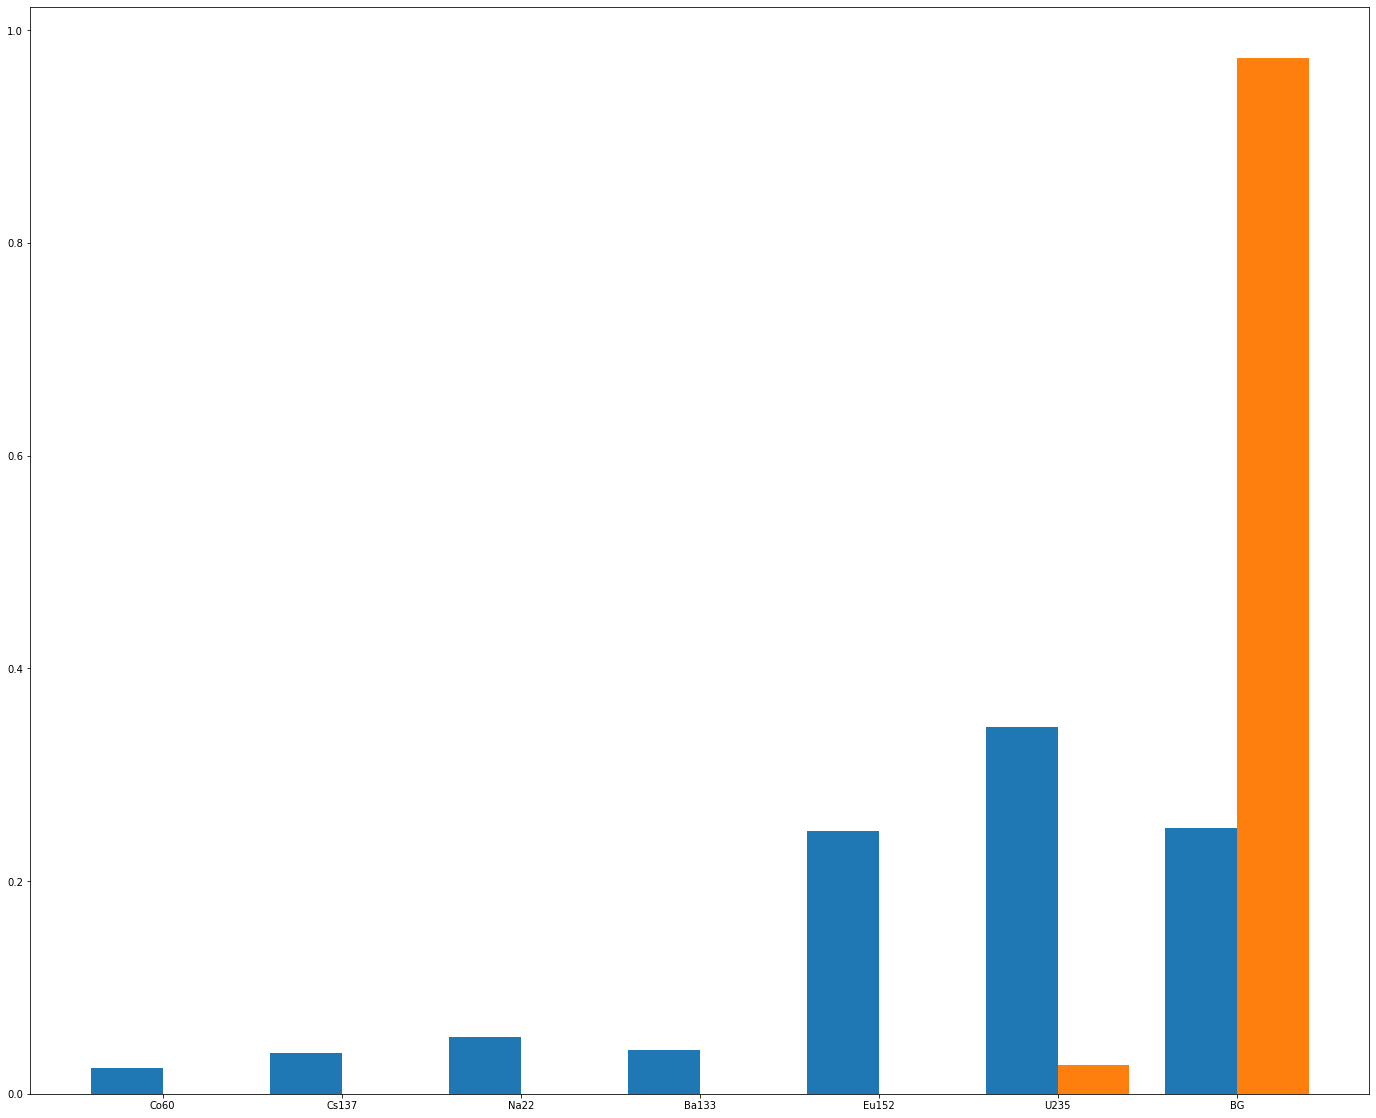

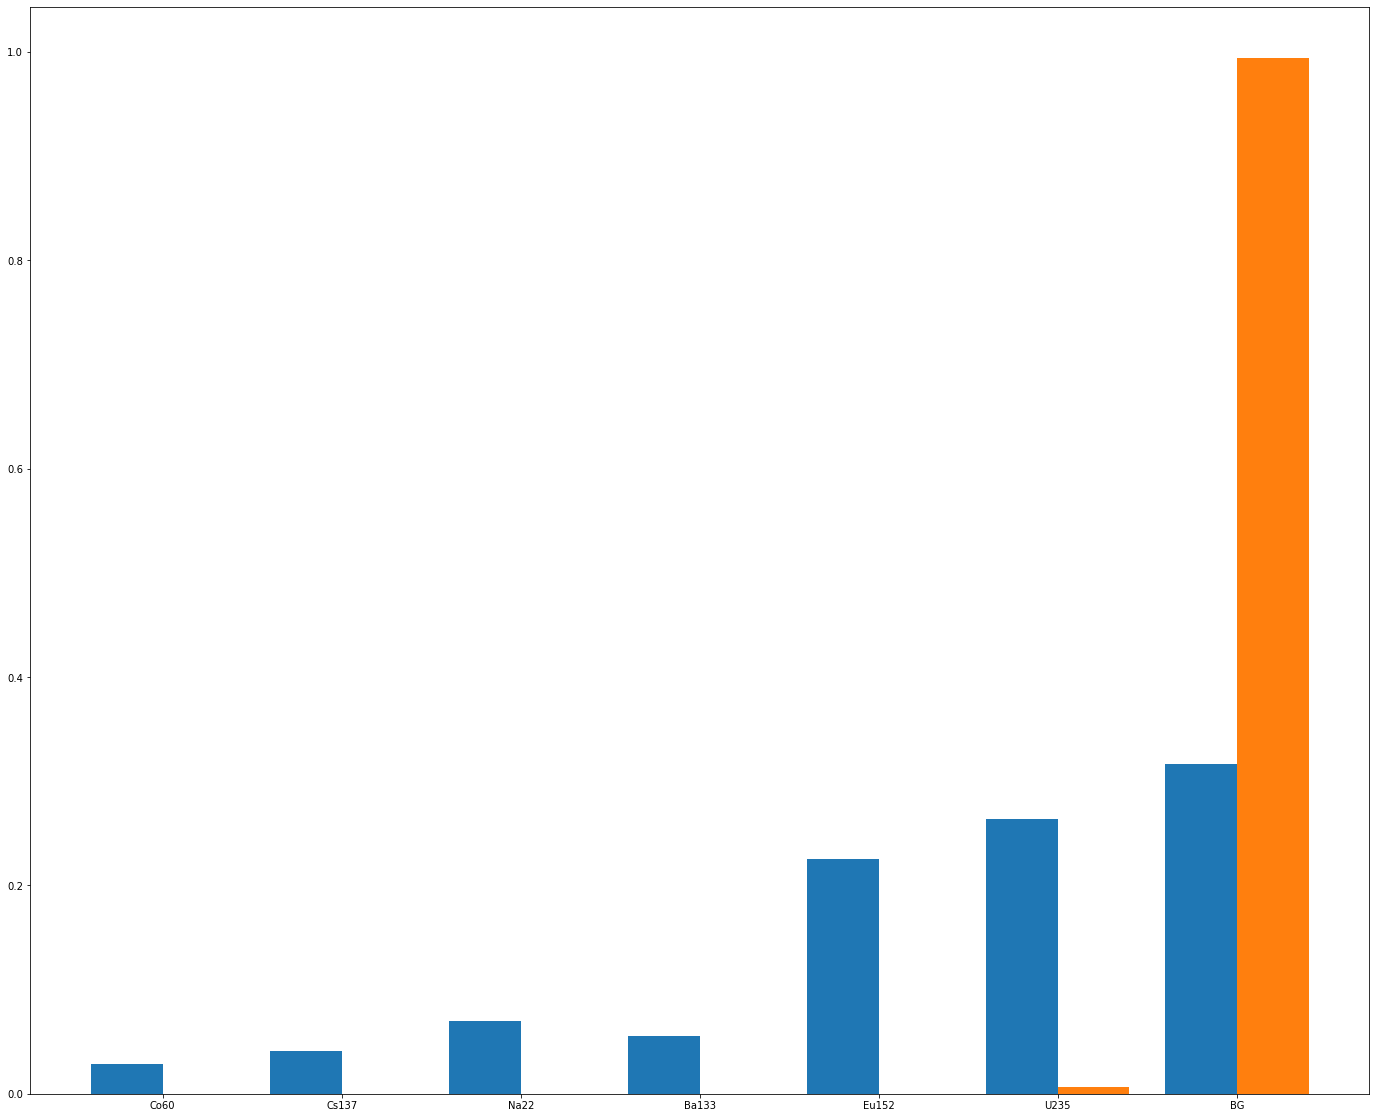

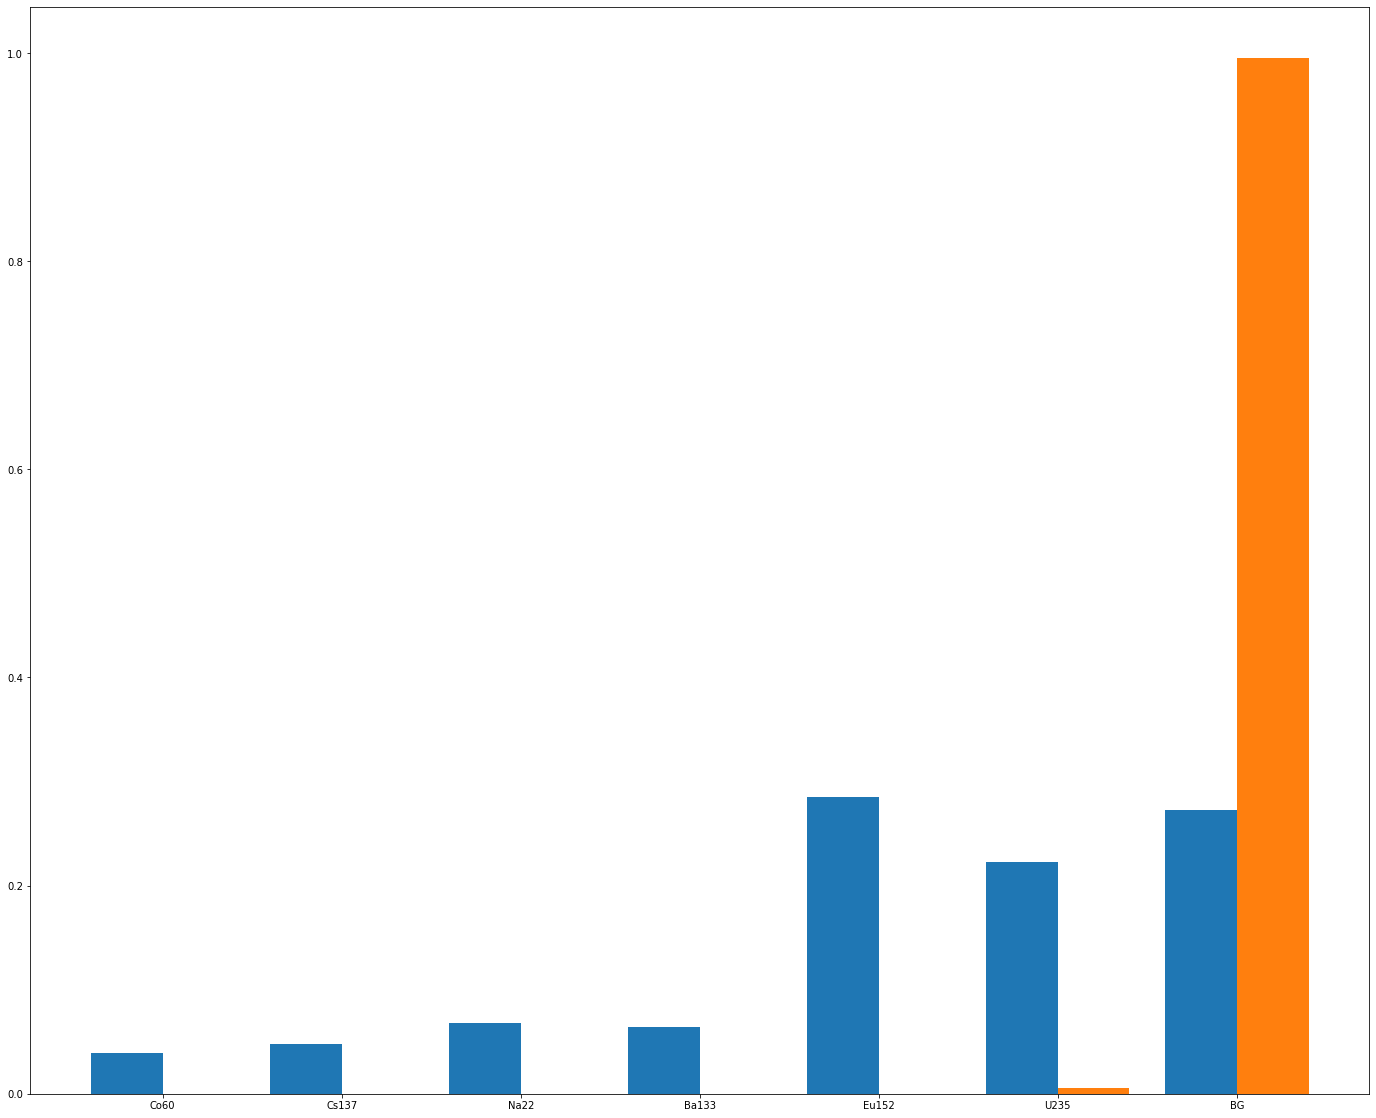

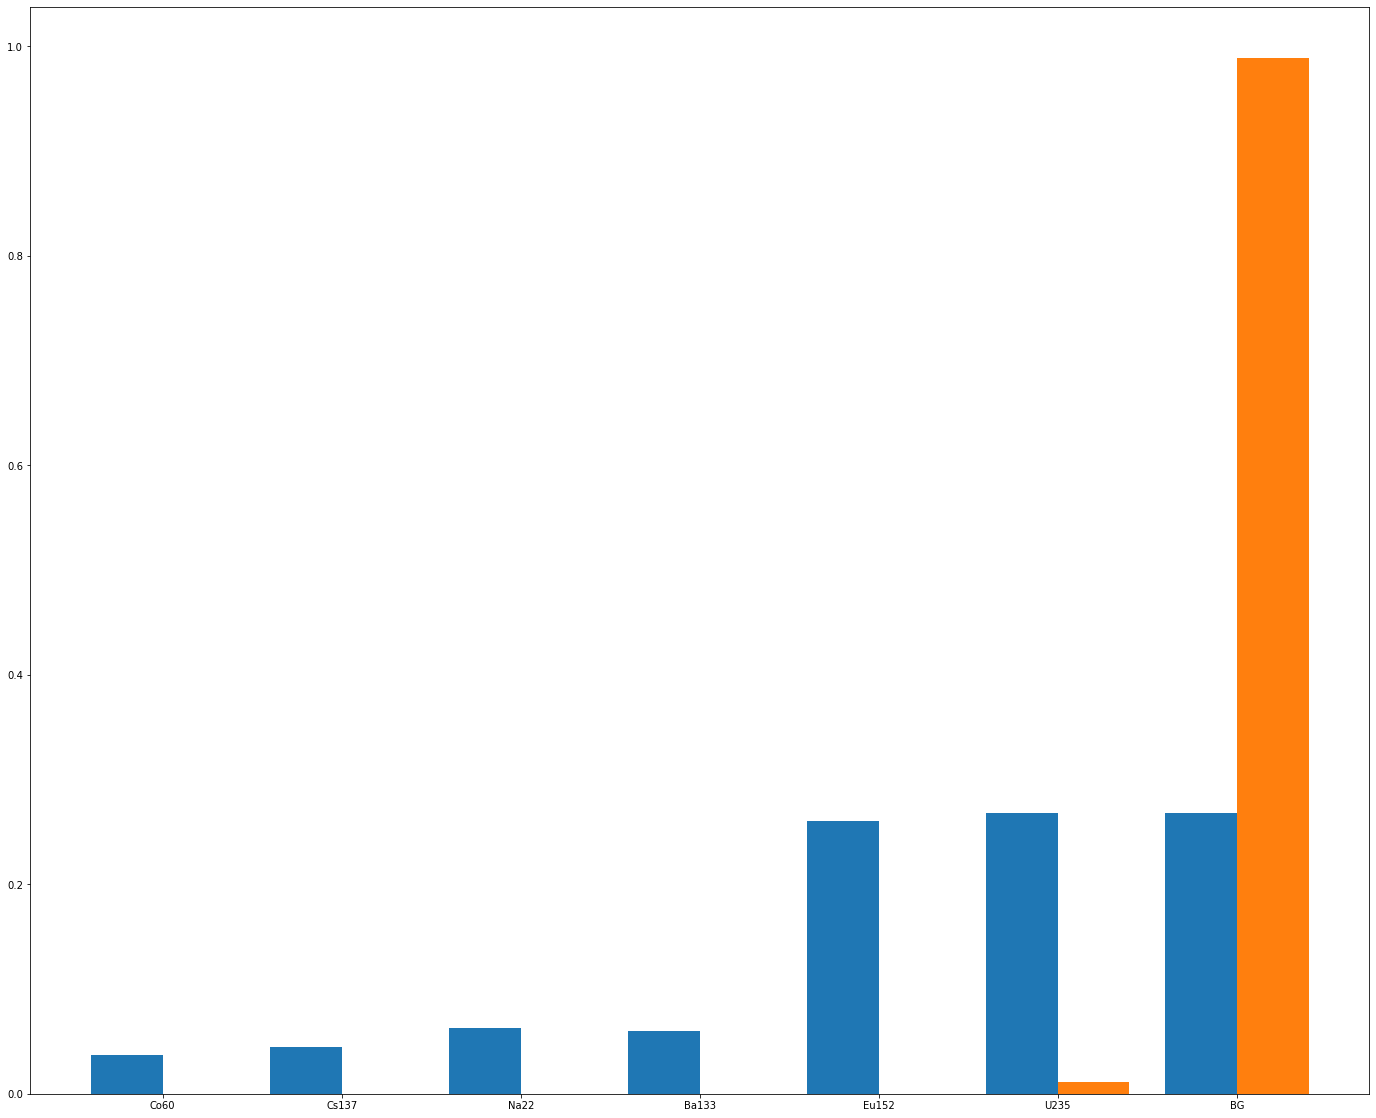

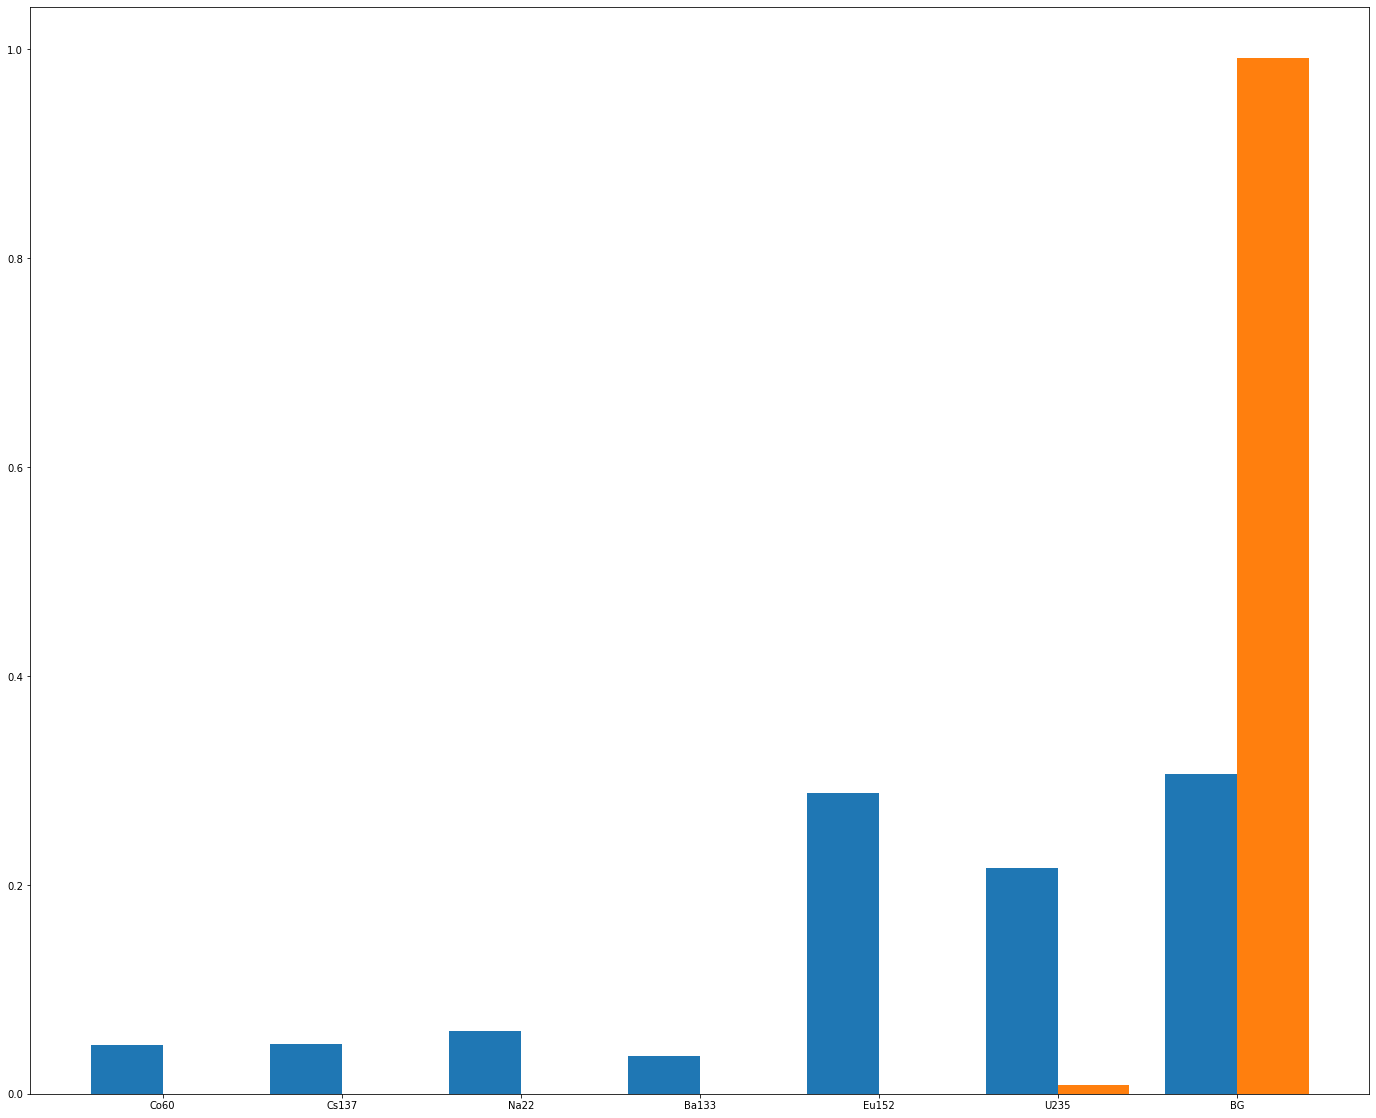

In [143]:
#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test_U)
print(result_y.shape)
print(result_y[0,:])
# BG = result_y[:, 4] + result_y[:, 8] + result_y[:, 9]
# BG = BG.reshape(BG.shape[0], 1)
# res_y = np.hstack((result_y[:, :4], result_y[:, 5:8], BG))

BG = result_y[:, 6] + result_y[:, 7] + result_y[:, 8] + result_y[:, 9] # 238, Th, Ra, K
BG = BG.reshape(BG.shape[0], 1)
#res_y = np.hstack((result_y[:, :4], result_y[:, 5], BG))
res_y = np.hstack((result_y[:, :6], BG))
print(BG.shape)
print(res_y.shape)
# print(result_y[:, 5:6])
names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "U235", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(24, 20))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test_U[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    plt.savefig("June30-U-100epoch-7bits-Compton-cut60keV-{:03}.png".format(i))

# print(left)

# for i in range(16):
#     plt.subplot(4, 4, i+1)
#     plt.bar(left, res_y[i], width=width, align='center')
#     plt.bar(left+width, y_test[i], width=width, align='center')
#     plt.xticks(left + width/2, names)
#     #plt.ylim(0, 0.5)
plt.show()

np.savetxt("result_y_U.csv",result_y,delimiter=',')
#np.savetxt("res_y.csv",res_y,delimiter=',')
#print(res_y.shape)

In [34]:
nuclides_n = 7
xdata = data_x
ydata = Y_train_acc
#ydata = Y_train_acc_no_U235

print(xdata.shape, ydata.shape)

(1433600, 479, 1) (1433600, 7)


In [ ]:
# VGG19 model定義
Ks.clear_session()

np.random.seed(10)

VGG19model = keras.models.Sequential()

VGG19model.add(layers.Conv1D(64, 3, activation = 'relu', padding='same',
                       input_shape = (Datasize,1)))
VGG19model.add(layers.Conv1D(64, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(128, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))

VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(256, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.Conv1D(512, 3, padding='same', activation = 'relu'))
VGG19model.add(layers.MaxPooling1D(2))
VGG19model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dense(1024, activation='relu'))
VGG19model.add(layers.Dropout(0.2))
VGG19model.add(layers.Dense(nuclides_n, activation='softmax'))

#opt= keras.optimizers.Adam(lr=0.0021533133440412807,
#                           decay=8.915893662822524e-09,
#                           amsgrad=True)
opt = keras.optimizers.Adam()

VGG19model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

VGG19model.summary()

In [38]:
#VGG19 学習
from keras.callbacks import EarlyStopping

nuclides_n = 6
run = 5
val_split = 0.1
batch_size = 1024
ydata = Y_train_acc

VGGhistory = VGG19model.fit(xdata, ydata, 
                    epochs=run,
                    batch_size=batch_size,
                    validation_split=val_split)
#                    callbacks=EarlyStopping(monitor='val_loss',patience=50, verbose=1, min_delta=0,mode="auto"))

VGGloss = VGGhistory.history['loss']
VGGval_loss = VGGhistory.history['val_loss']

epochs= range(len(VGGloss))

plt.figure()
plt.plot(epochs, VGGloss, 'bo', label='training loss')
plt.plot(epochs, VGGval_loss, 'b', label='validation loss')
plt.legend()

plt.show()

score, acc = VGG19model.evaluate(x_test_U, y_test_U,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 1290240 samples, validate on 143360 samples
Epoch 1/5
1052672/1290240 [=======================>......] - ETA: 1:06 - loss: 0.3715 - accuracy: 0.0225

KeyboardInterrupt: 

In [37]:
#VGG19 学習
from keras.callbacks import EarlyStopping

run = 3
val_split = 0.1
batch_size = 1024
ydata = Y_train_acc_no_U235

VGGhistory = VGG19model.fit(xdata, ydata, 
                    epochs=run,
                    batch_size=batch_size,
                    validation_split=val_split)
#                    callbacks=EarlyStopping(monitor='val_loss',patience=50, verbose=1, min_delta=0,mode="auto"))

VGGloss = VGGhistory.history['loss']
VGGval_loss = VGGhistory.history['val_loss']

epochs= range(len(VGGloss))

plt.figure()
plt.plot(epochs, VGGloss, 'bo', label='training loss')
plt.plot(epochs, VGGval_loss, 'b', label='validation loss')
plt.legend()

plt.show()

score, acc = VGG19model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

ValueError: Error when checking target: expected dense_3 to have shape (7,) but got array with shape (6,)

Train on 1290240 samples, validate on 143360 samples
Epoch 1/5
1290240/1290240 [==============================] - 374s 290us/step - loss: 2.7058 - val_loss: 1.8199
Epoch 2/5
1290240/1290240 [==============================] - 376s 291us/step - loss: 1.8200 - val_loss: 1.8198
Epoch 3/5
1290240/1290240 [==============================] - 376s 291us/step - loss: 1.8199 - val_loss: 1.8198
Epoch 4/5
1290240/1290240 [==============================] - 375s 291us/step - loss: 1.8200 - val_loss: 1.8198
Epoch 5/5
1290240/1290240 [==============================] - 376s 291us/step - loss: 1.8198 - val_loss: 1.8198


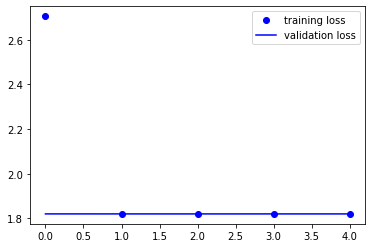

40/40 [==============================] - 0s 6ms/step
Test score: 0.3928344249725342
Test accuracy: 0.5571429133415222


(1433600, 6)


Train on 1290240 samples, validate on 143360 samples
Epoch 1/5
1290240/1290240 [==============================] - 373s 289us/step - loss: 108257882.8737 - val_loss: 1.4771
Epoch 2/5
1290240/1290240 [==============================] - 374s 290us/step - loss: 20624745612508475162624.0000 - val_loss: 33359082238584503140352.0000
Epoch 3/5
1290240/1290240 [==============================] - 374s 290us/step - loss: 60449501582608666984448.0000 - val_loss: 38523380377180191064064.0000
Epoch 4/5
1290240/1290240 [==============================] - 374s 290us/step - loss: 81708743737988219928576.0000 - val_loss: 47997241202352775495680.0000
Epoch 5/5
1290240/1290240 [==============================] - 374s 290us/step - loss: 100838078269694278631424.0000 - val_loss: 56943330497520837066752.0000


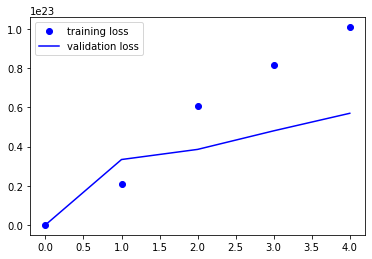

31/31 [==============================] - 0s 4ms/step
Test score: 4.2675299644470215
Test accuracy: 0.42473119497299194


In [94]:
###################################################
## 1 min , 3, 5, 10, 20 min
###################################################

path0 = 'New Experimental Data - June 2021/ncm_combination_10min/'
dirs = os.listdir(path0)
direc = dirs

obj_list = glob.glob(path0 + '/*.csv')
temp = [] 
Sum = []
ccr = []
x_test1 = []
filen = []
measure_t = 60 * 30

BG = np.sum(np.loadtxt(path0 + 'BG_sum.csv'))/(60*900)


for filename in obj_list:
    temp.append(np.loadtxt(filename, delimiter = ','))
    x_test1.append(np.loadtxt(filename, delimiter = ','))
    a = np.stack(temp, axis = 0)
    Sum.append(np.sum(a))
    cps = np.sum(a)/measure_t
    ccr.append(cps/(BG + cps))
    temp = [] 
    
print(np.shape(x_test1))
## correction of order from file naming order to CCR aranging order
x_test1 = np.stack(x_test1, axis = 0)
print(x_test1.shape)

direct = ['Co','Cs','Na','Ba','Eu','BG','CoCs', 'CoNa', 'CoBa', 'CoEu', 'CsNa', 'CsBa',
    'CsEu', 'BaNa','NaEu','BaEu','CoCsNa', 'CoCsBa', 'CoCsEu', 'CoBaNa', 'CoNaEu', 'CoBaEu', 
           'CsBaNa', 'CsNaEu','CsBaEu', 'BaNaEu', 'CoCsNaBa', 'CoCsNaEu', 'CoCsBaEu', 'CoBaNaEu', 'CsBaNaEu'] 


for j in range(len(direct)):
    x_test1[j] = np.loadtxt(path0 + direct[j] + '_sum.csv', delimiter = ',')
    if direct[j] == BG:
        x_test1[j] = x_test1[j]/(60*900)
    
print(x_test1[11, 20:])
print(x_test1[12, 20:])
print(x_test1[13, 20:])

# x_test1 = np.delete(x_test1, len(x_test1)-1,axis=0)

x_test1 = x_test1[:, Startsize:Datasize]

## convert data to cps
# x_test = x_test / measure_t


print(x_test1.shape)
print(x_test1[11, 20:50])

np.savetxt('x_test_10min.txt', x_test1)



(31, 1024)
(31, 1024)
[   0. 3388. 3399. ...    0.    0.    0.]
[  0. 696. 686. ...   0.   0.   0.]
[   0. 3343. 3307. ...    0.    0.    0.]
(31, 460)
[1502. 1595. 1530. 1555. 1467. 1563. 1546. 1621. 1612. 1733. 1781. 1836.
 1933. 2016. 1846. 1901. 1723. 1660. 1602. 1551. 1502. 1483. 1412. 1445.
 1292. 1425. 1318. 1314. 1158. 1176.]


(31, 460)
(31, 460, 1)
(31, 10)
[0.5572522  0.04488554 0.03689865 0.02259171 0.12831949 0.06635627
 0.00458914 0.1023744  0.03515318 0.00157941]
(31, 1)
(31, 6)


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


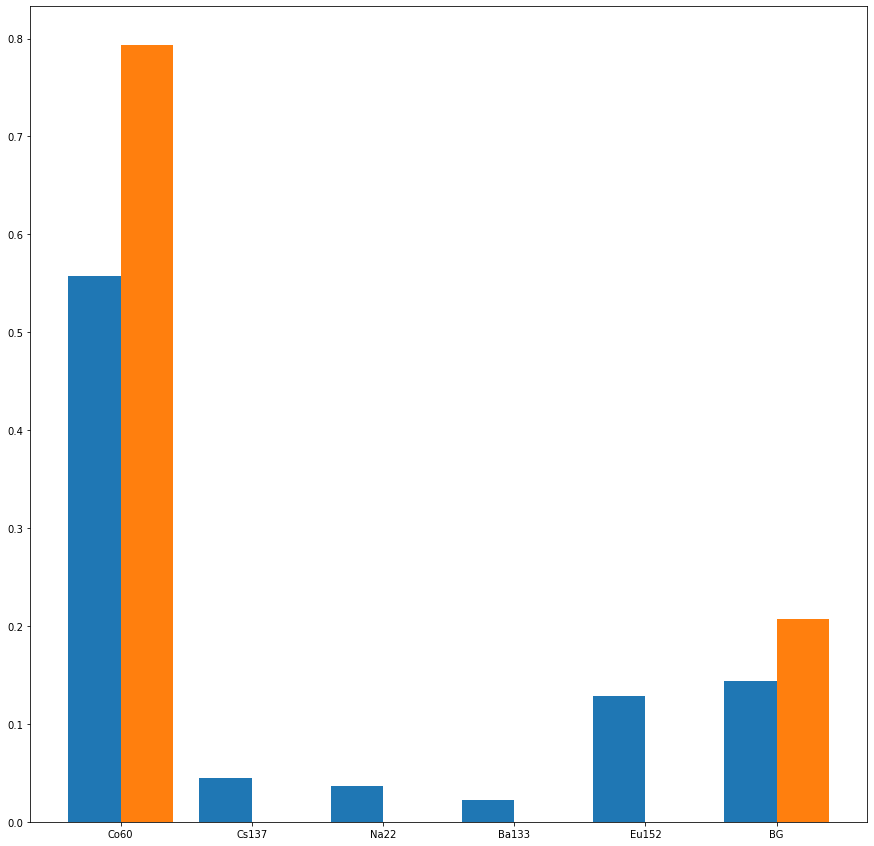

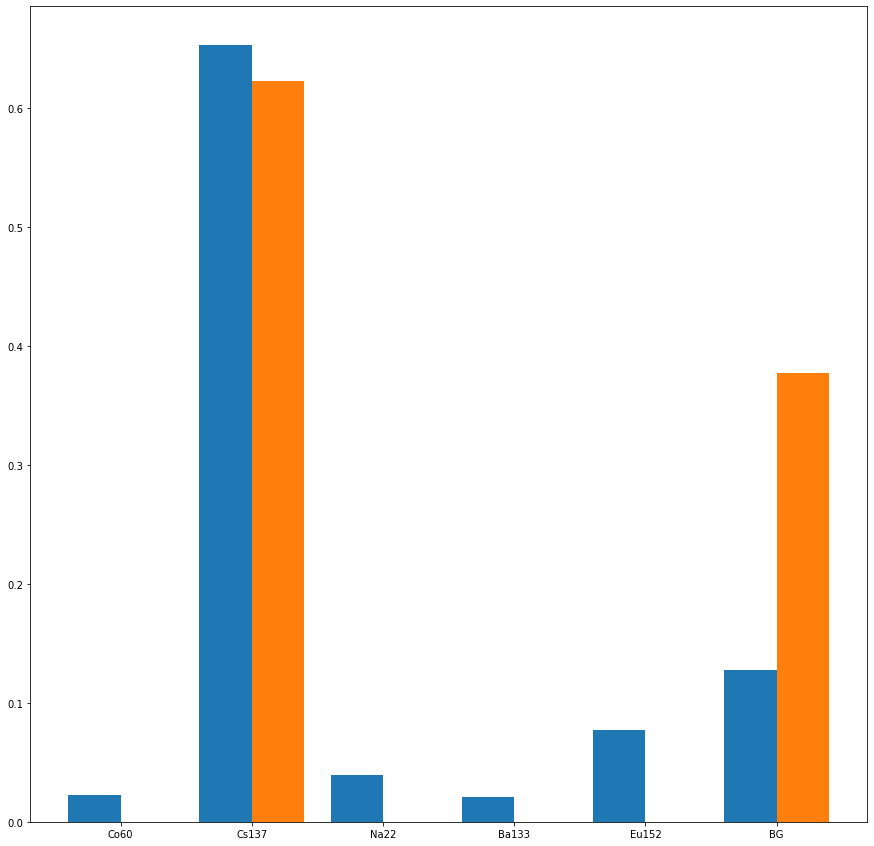

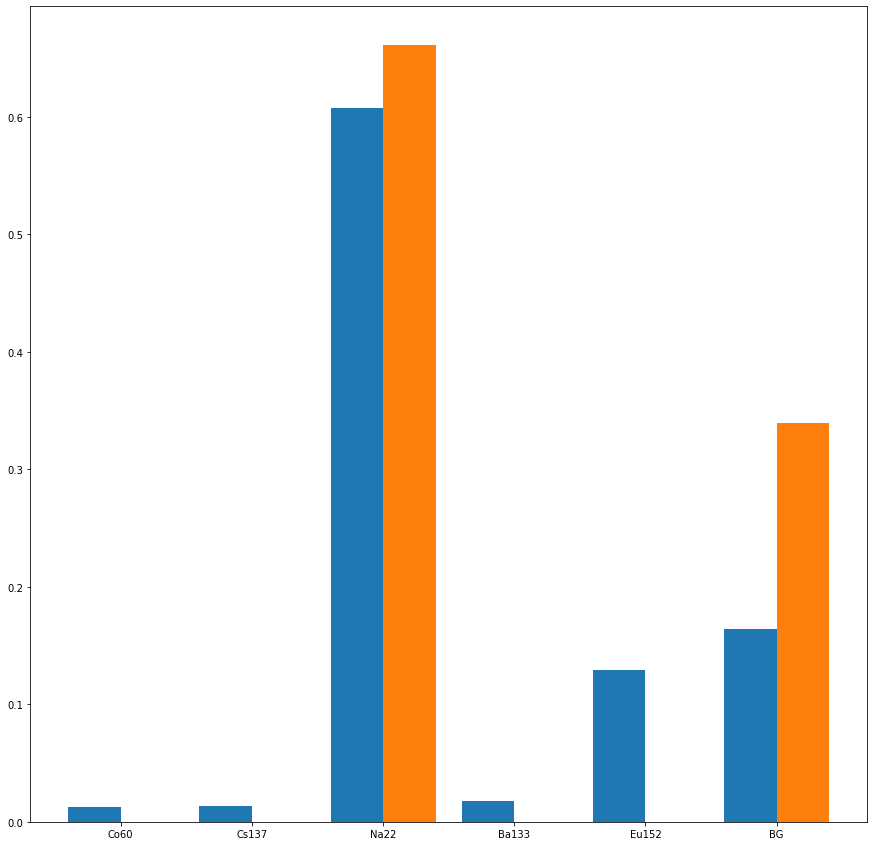

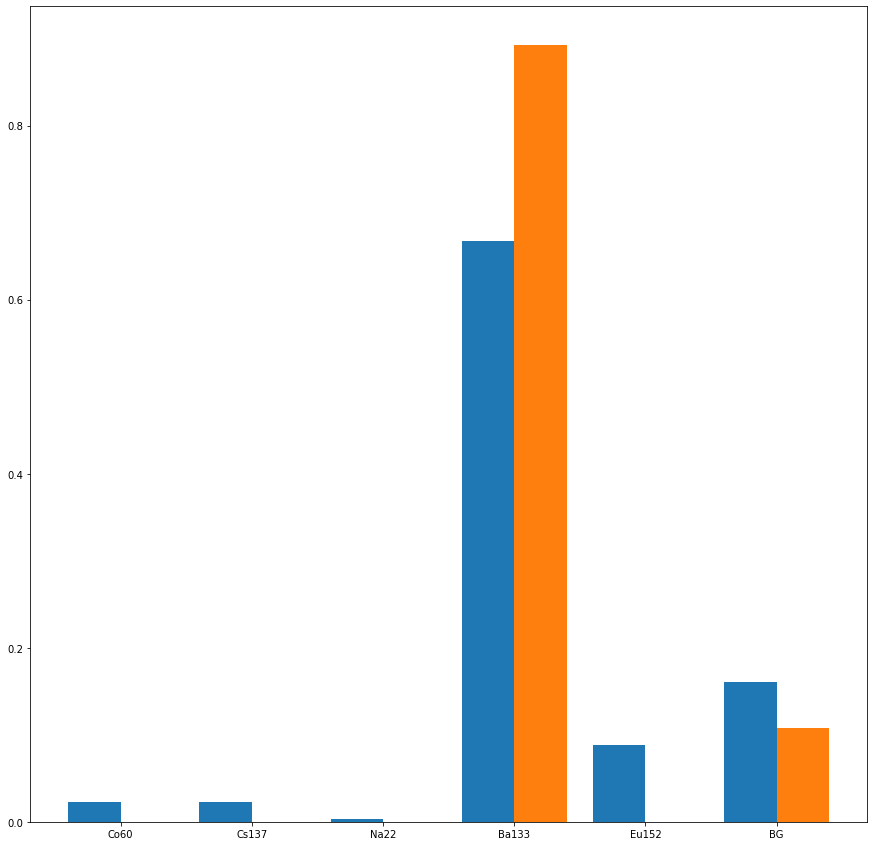

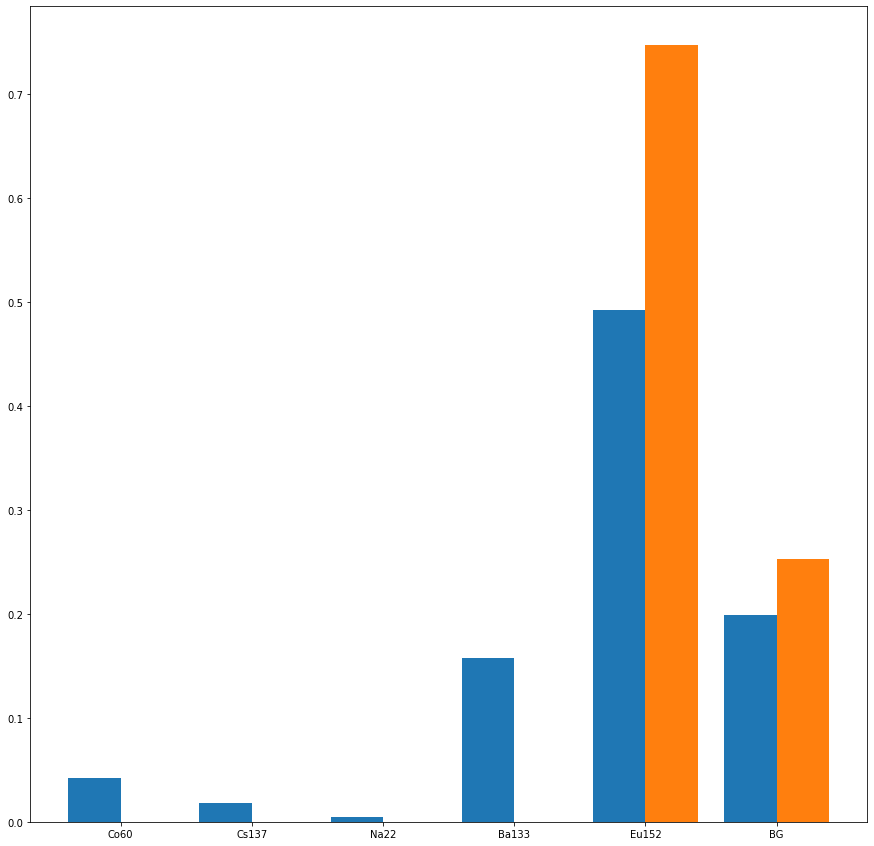

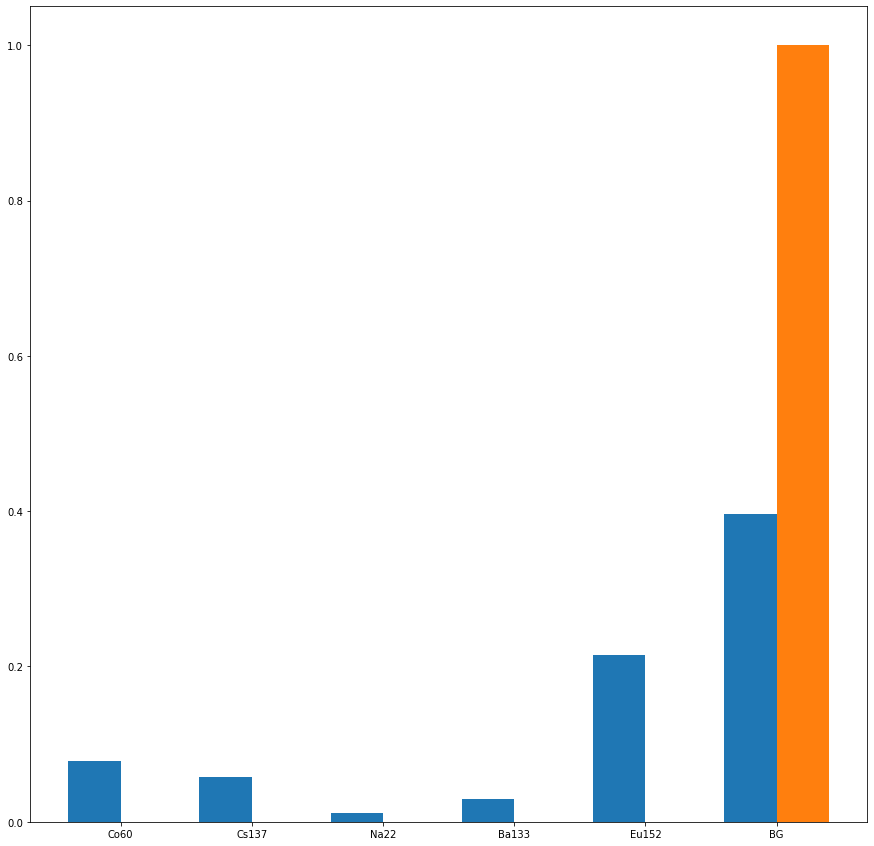

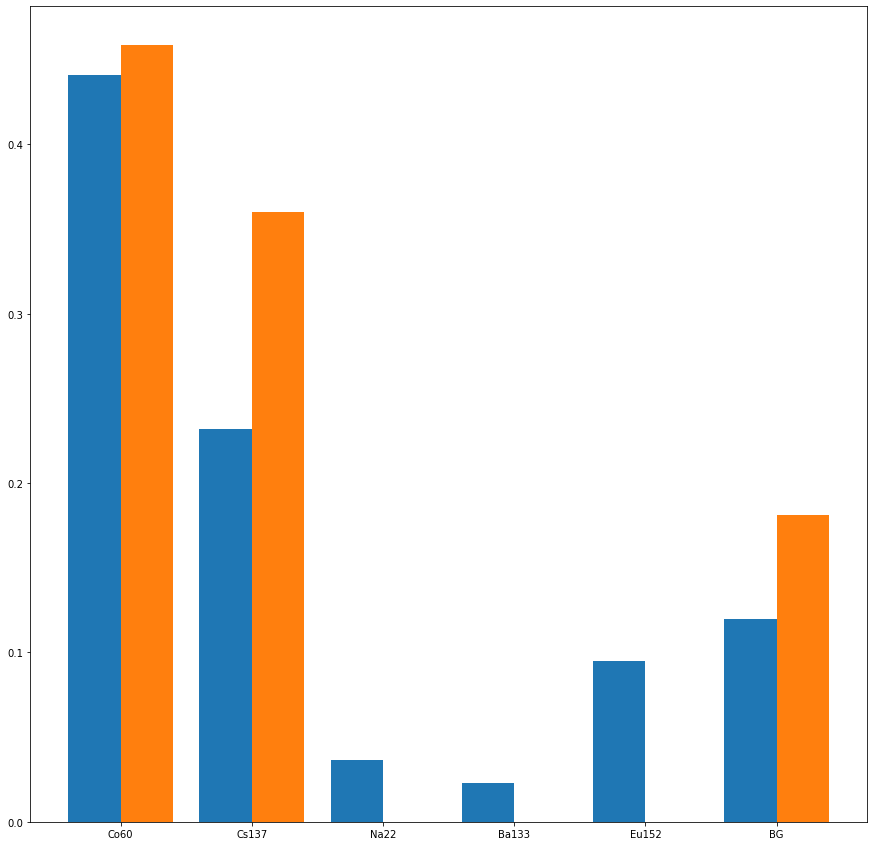

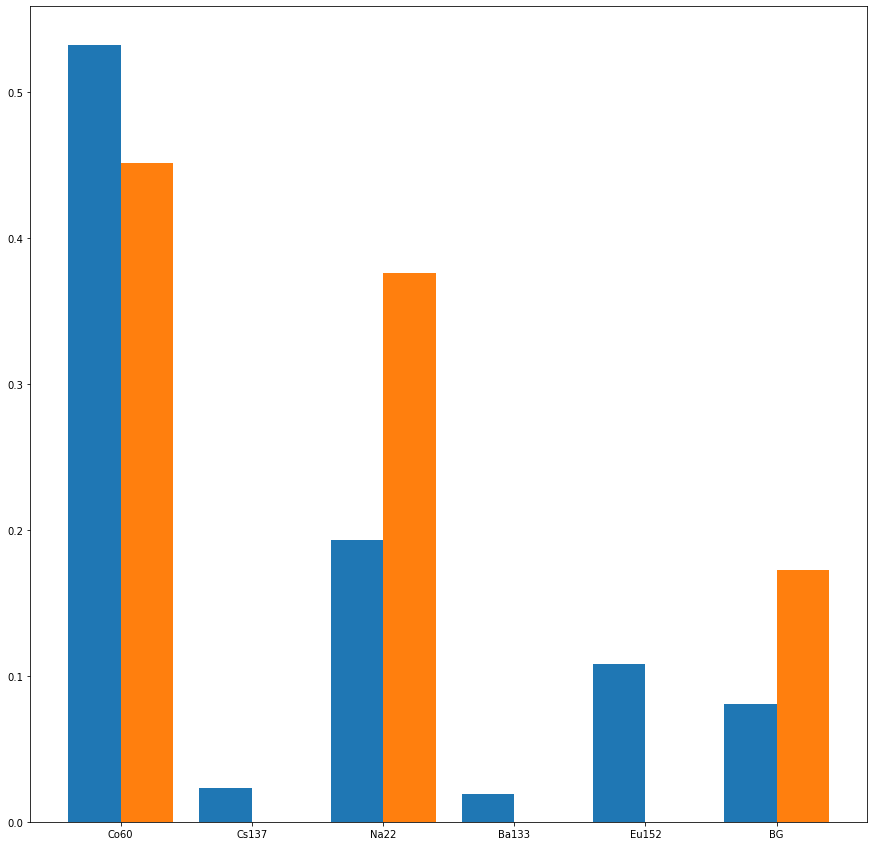

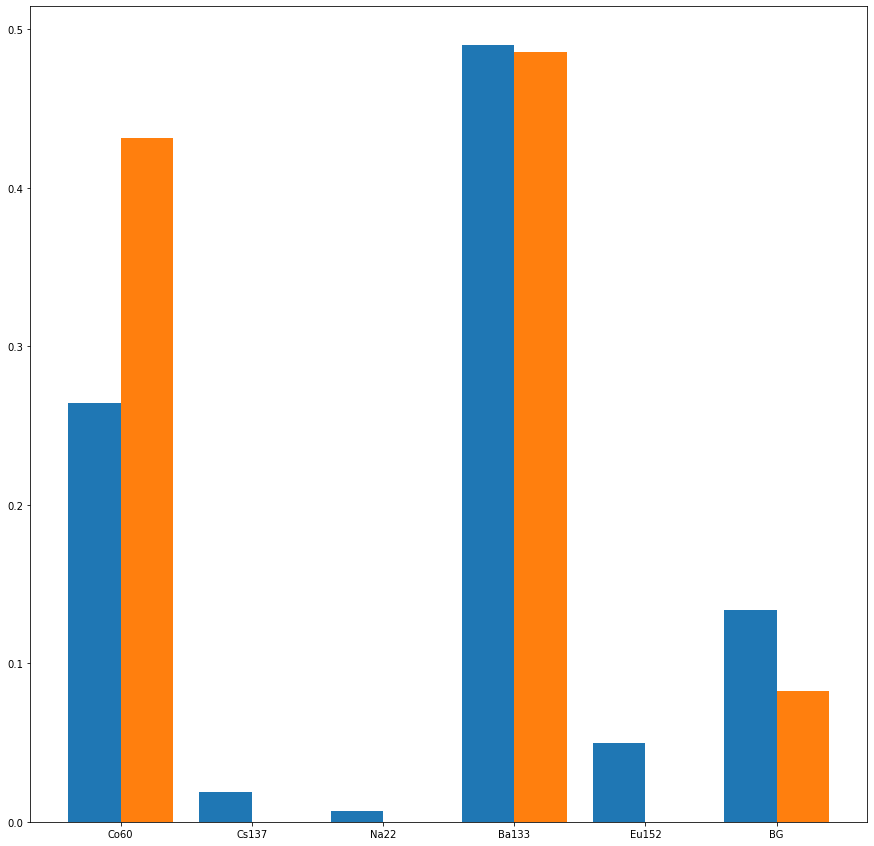

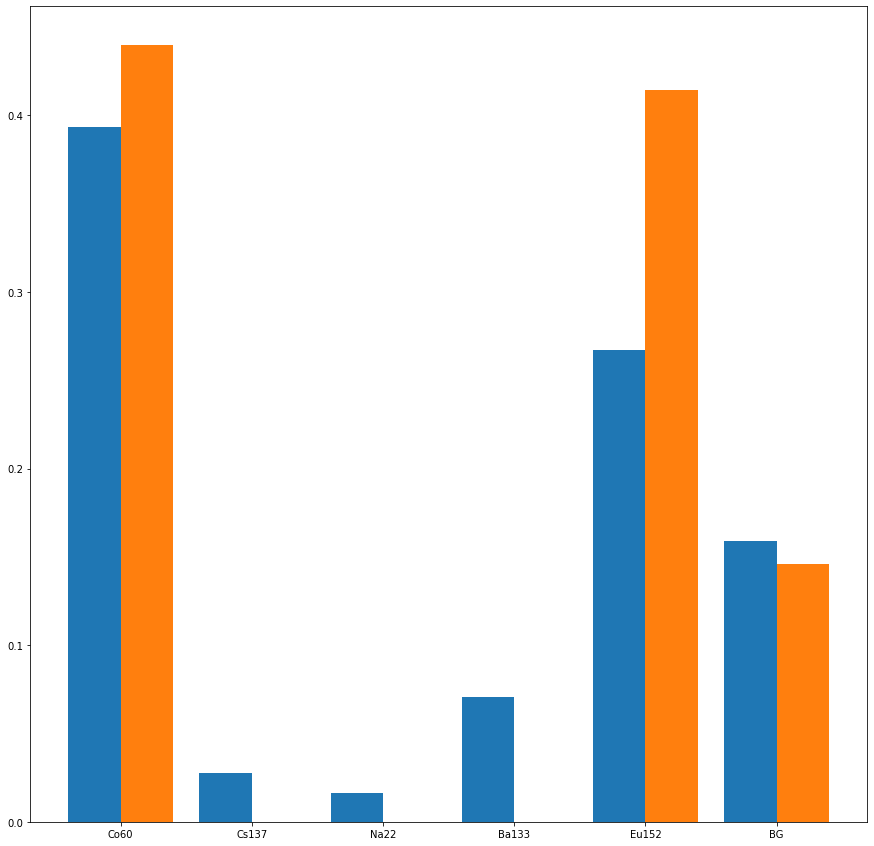

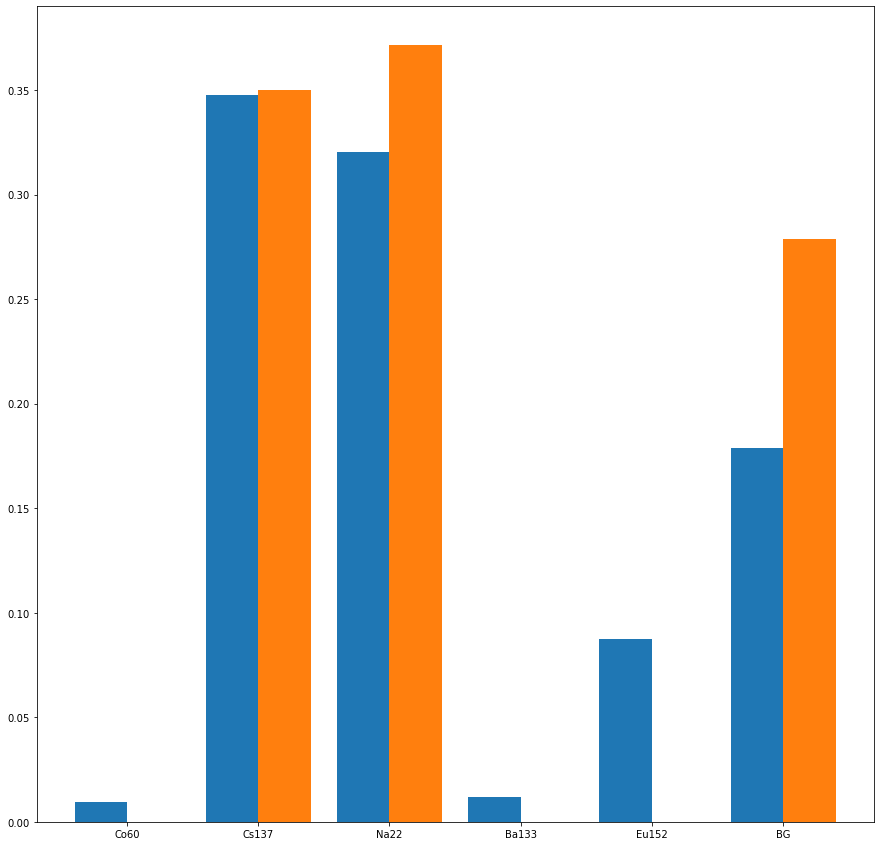

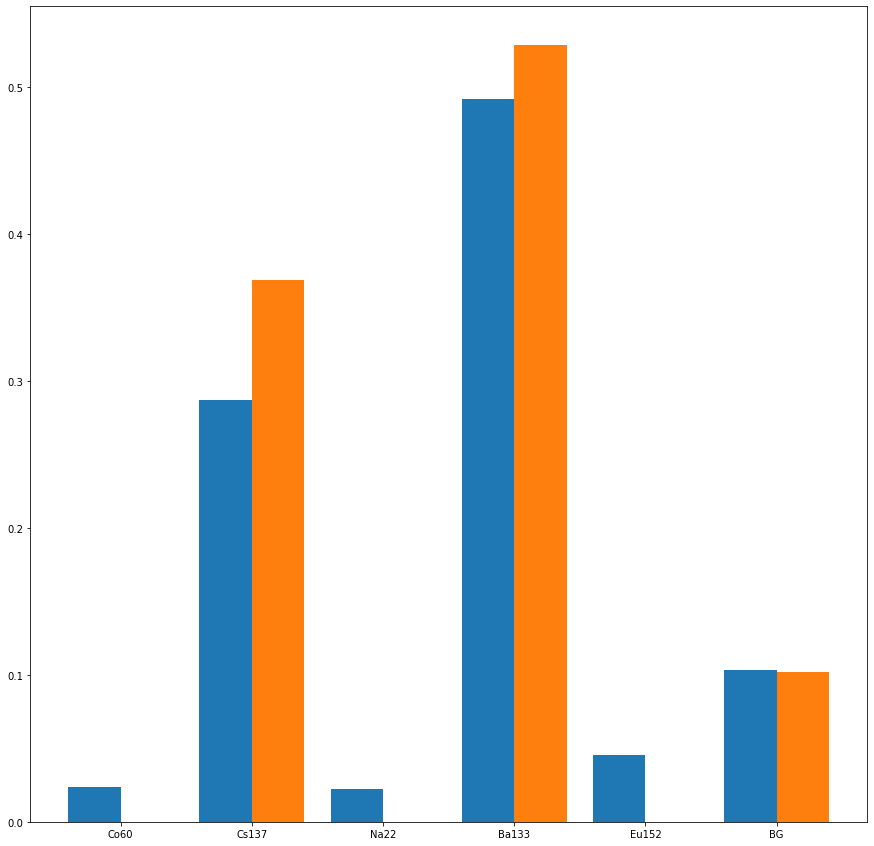

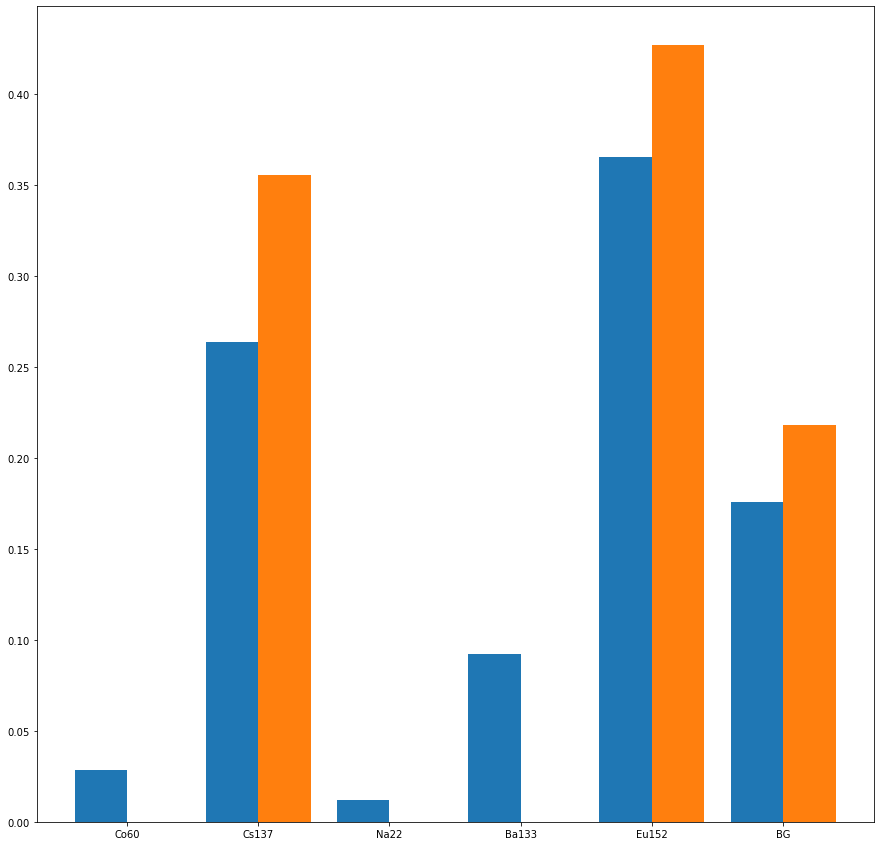

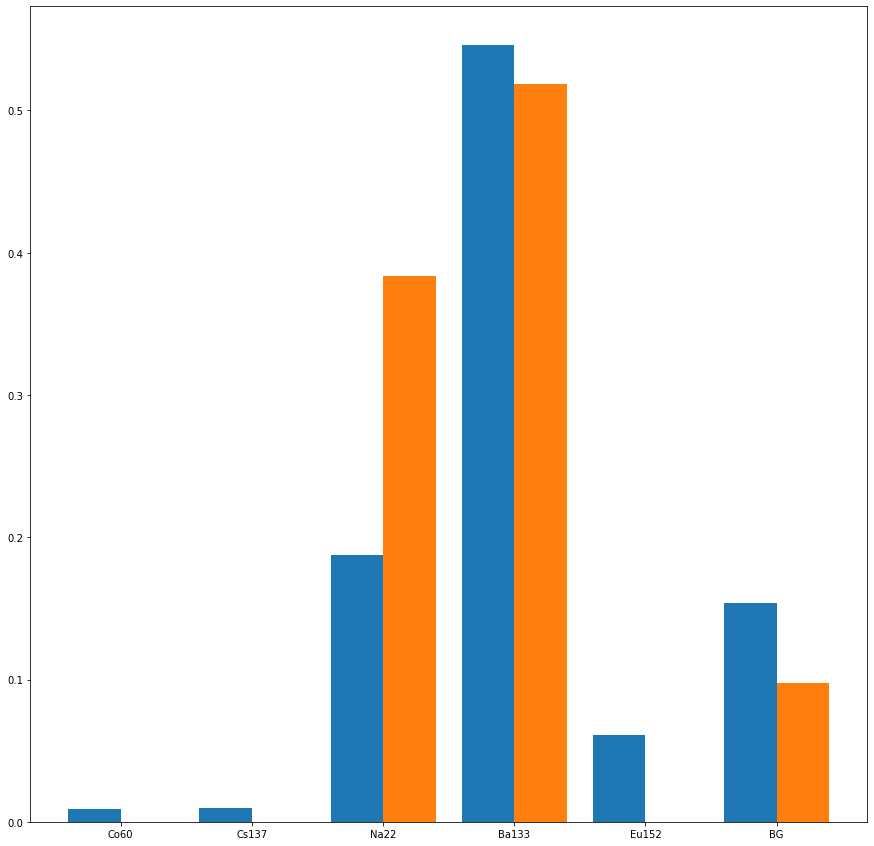

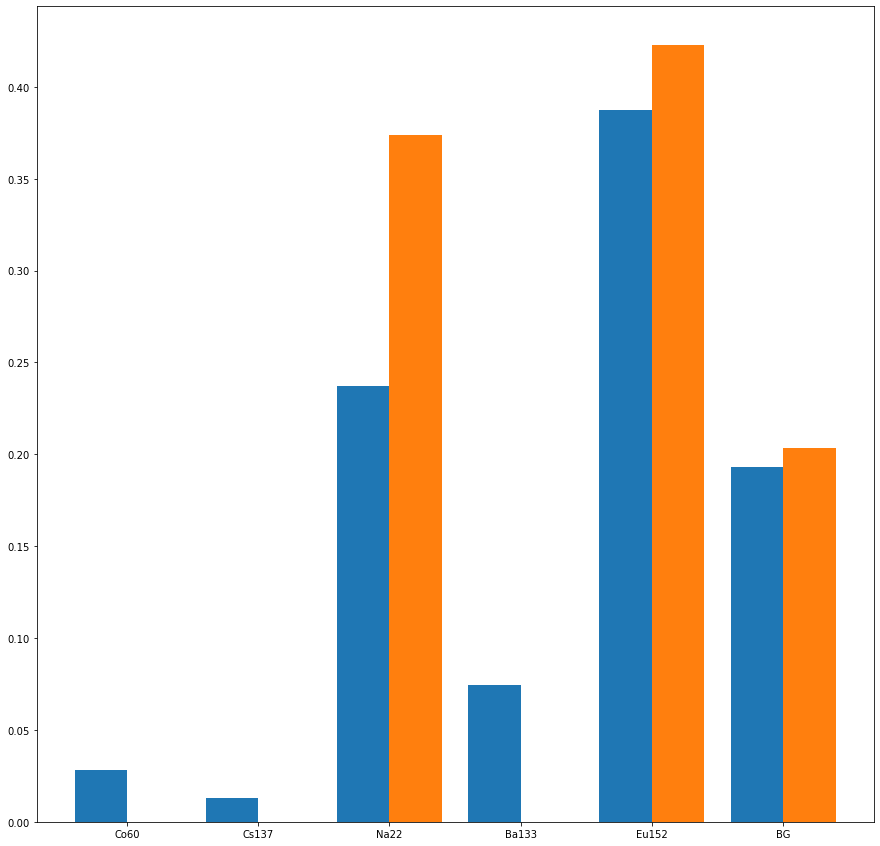

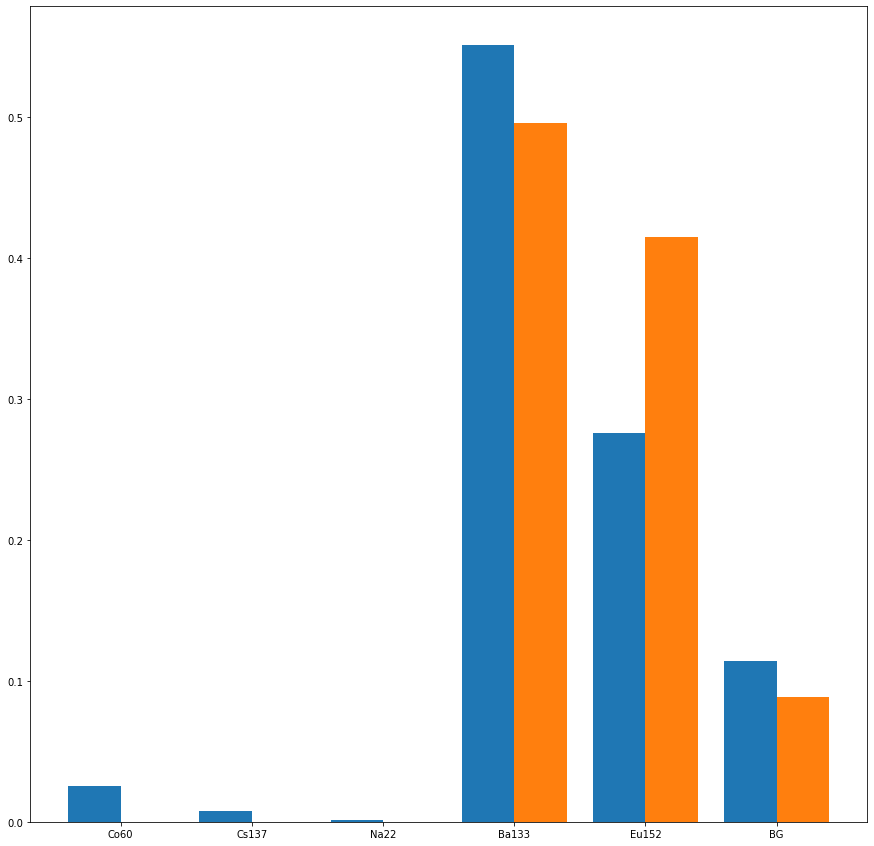

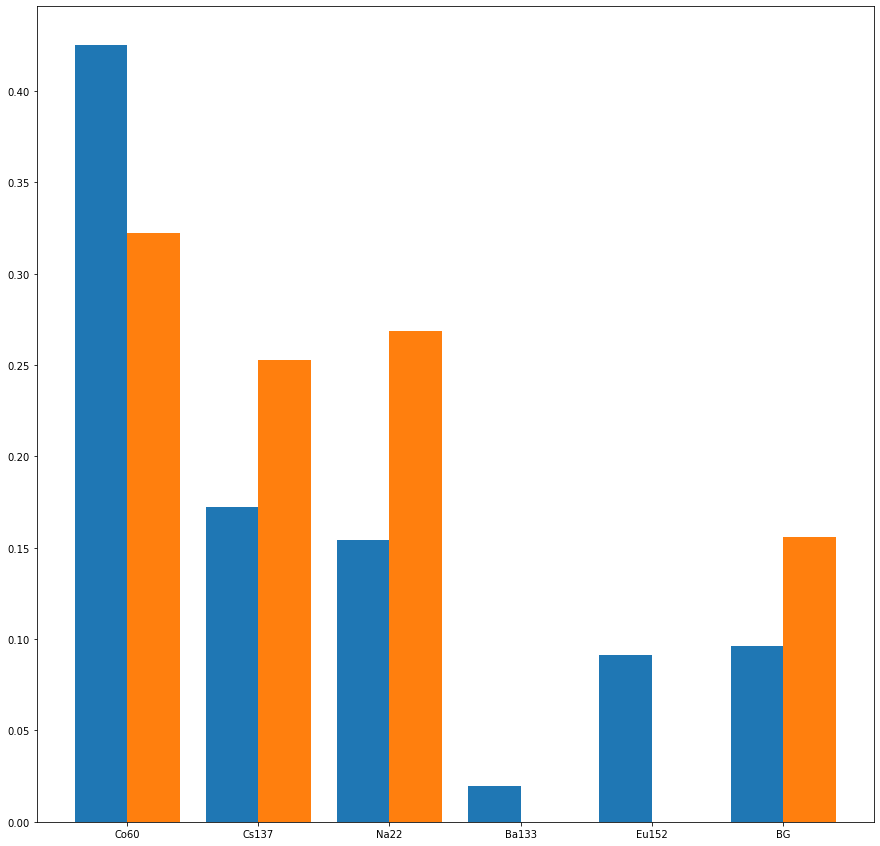

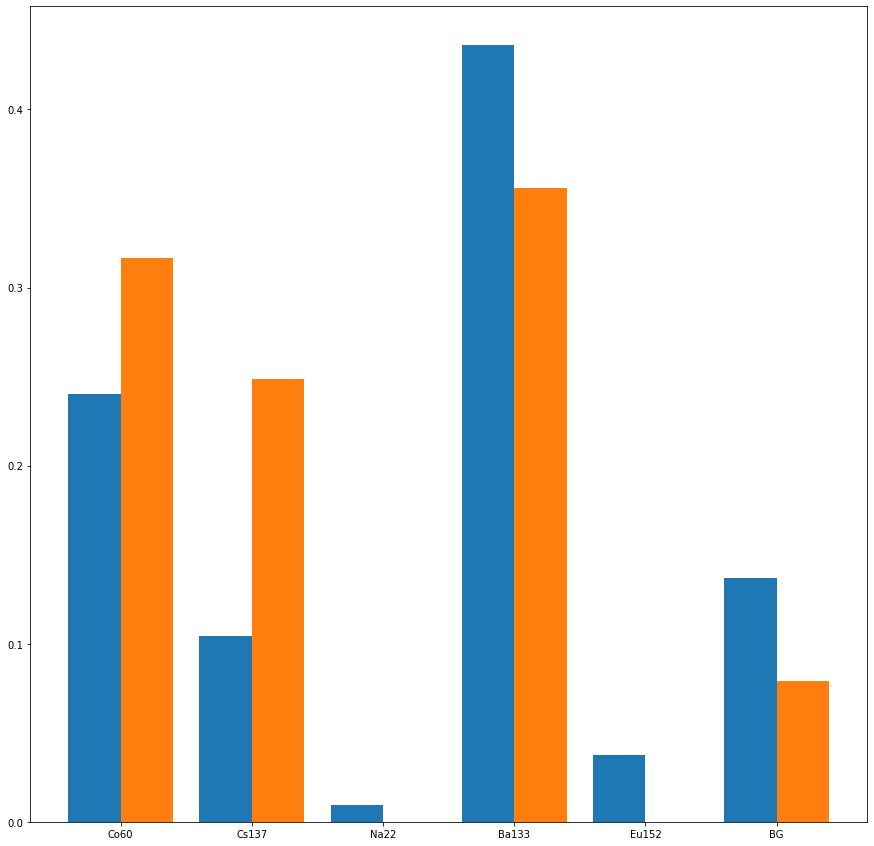

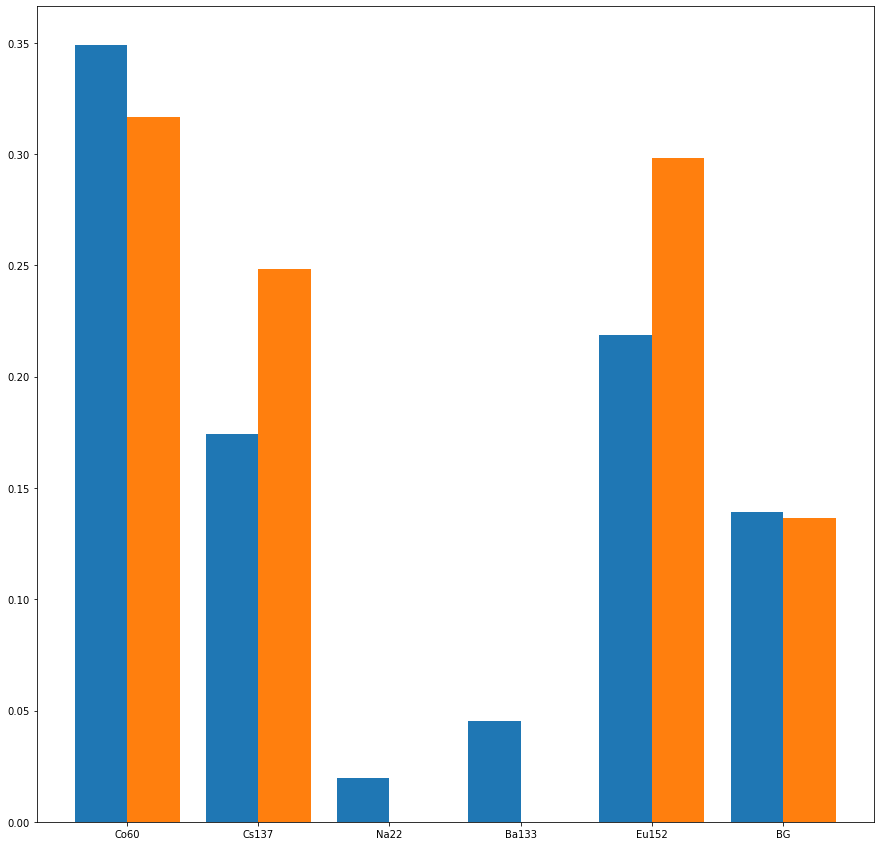

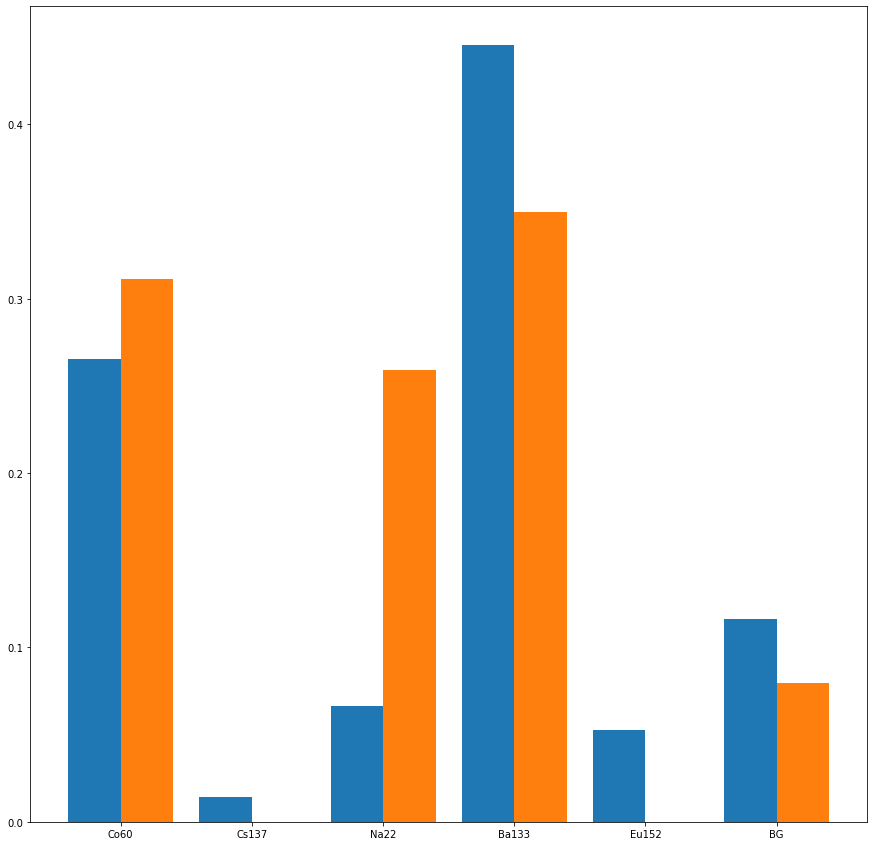

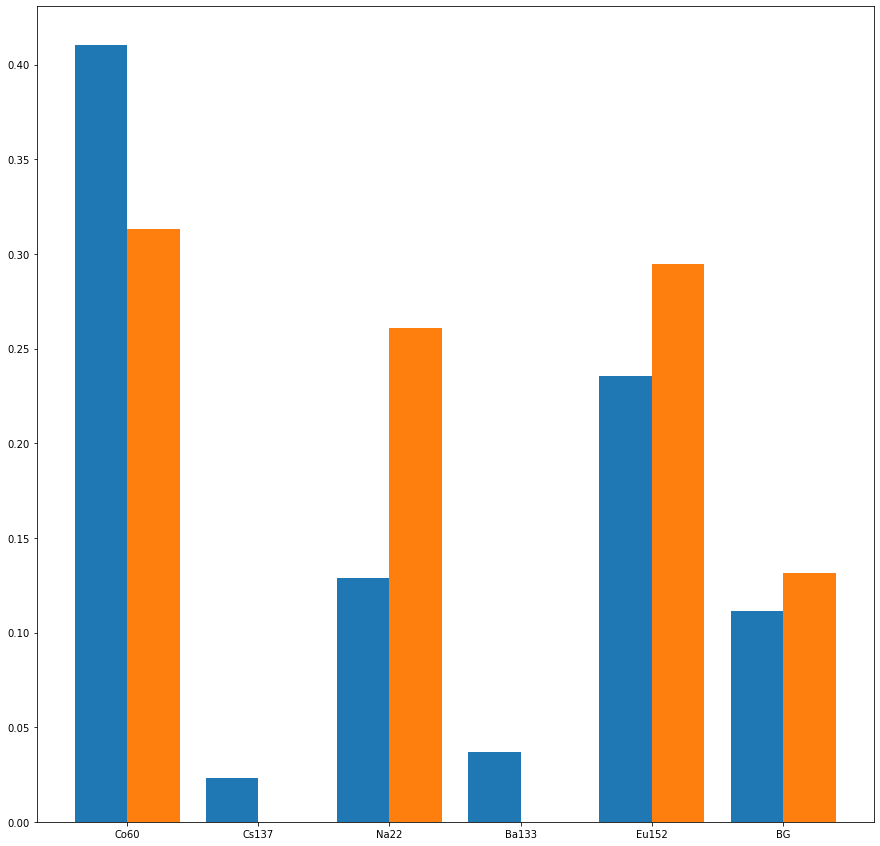

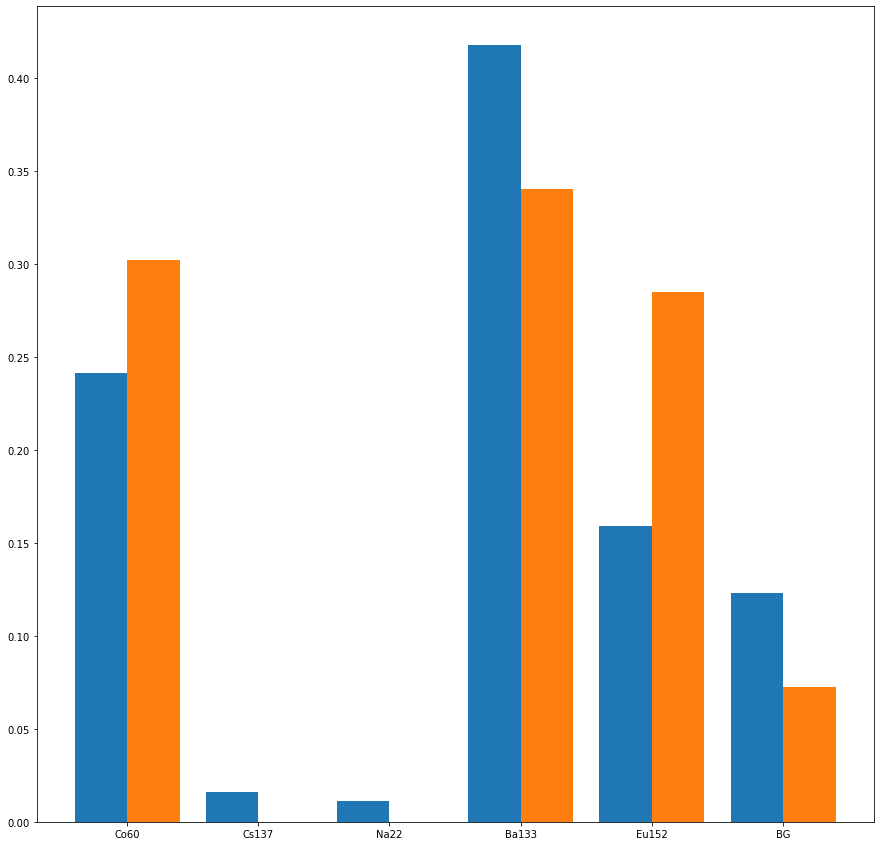

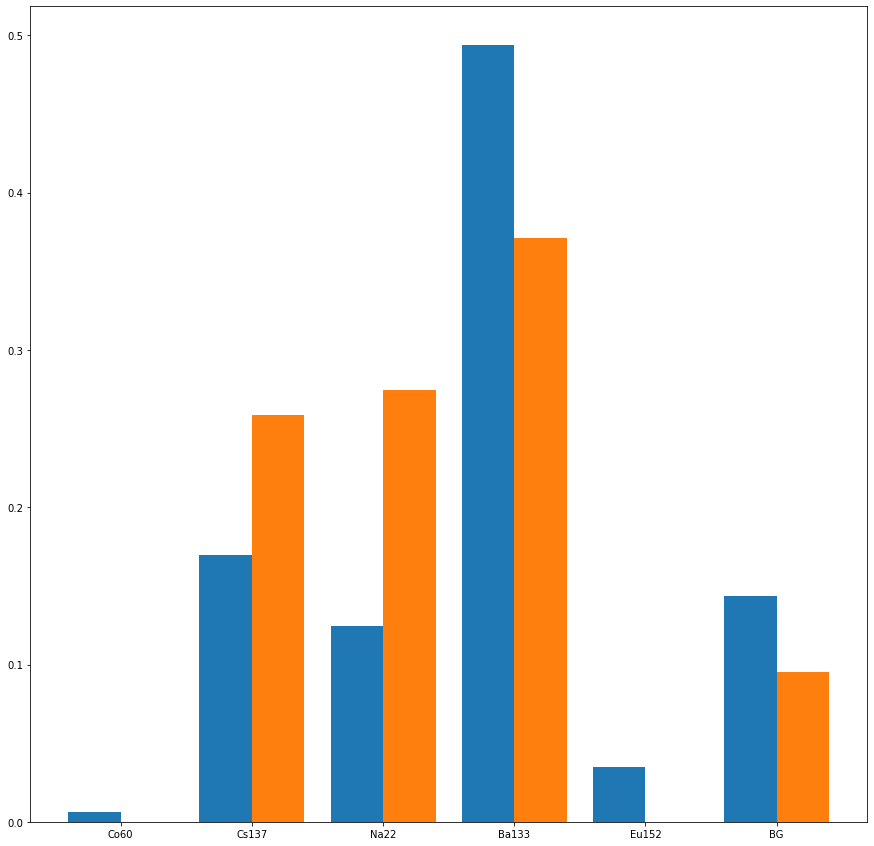

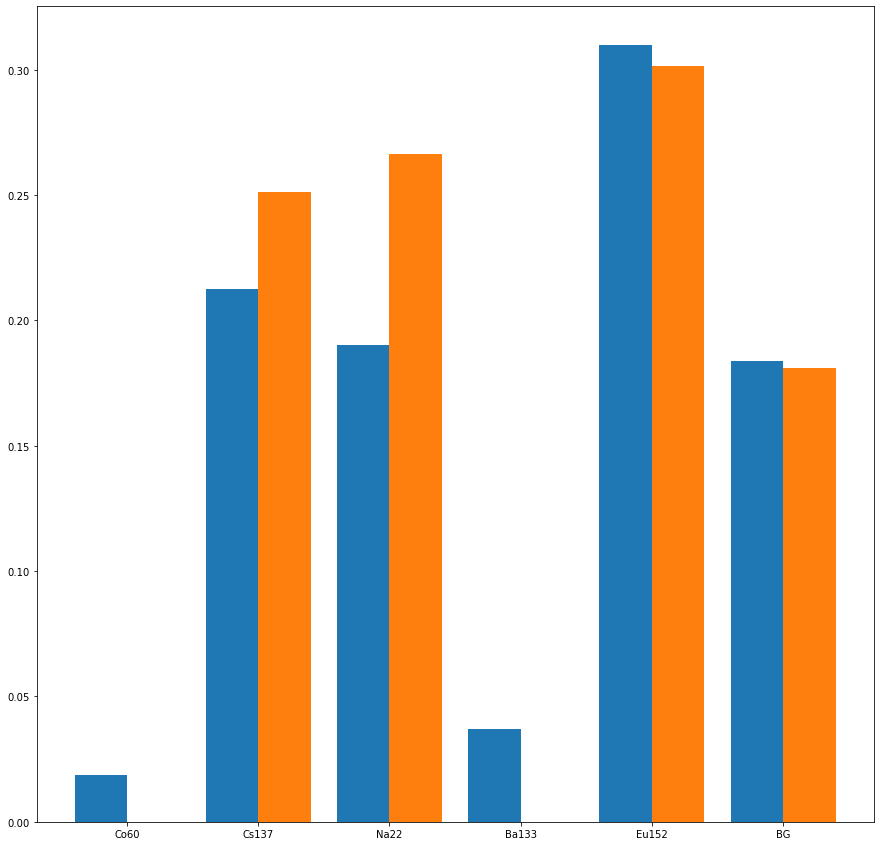

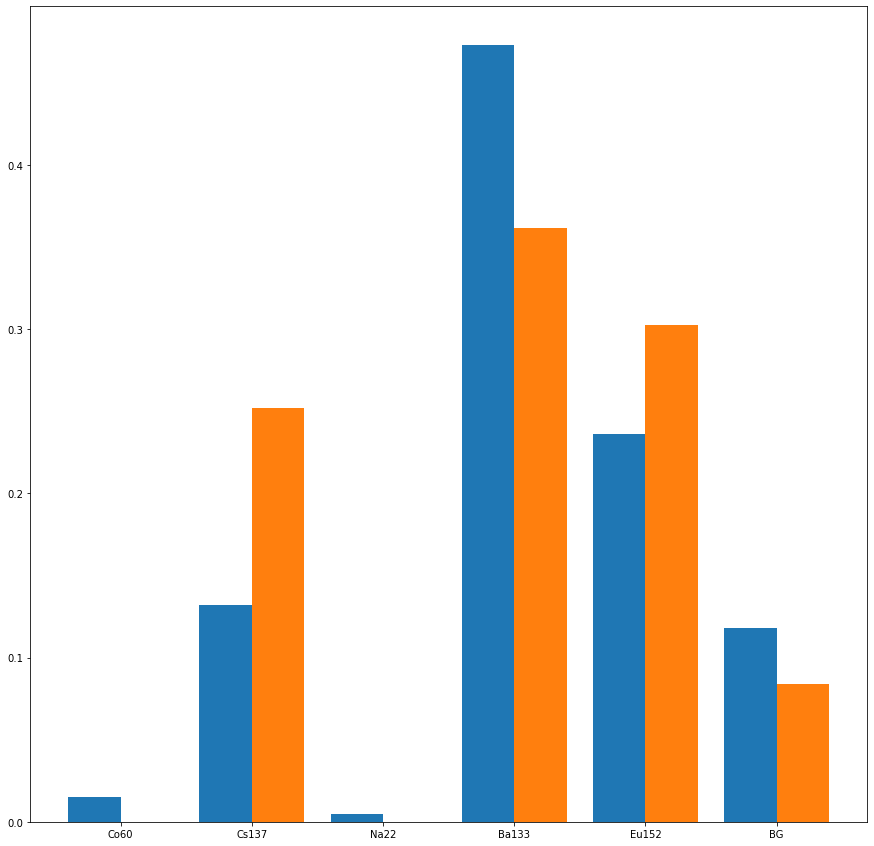

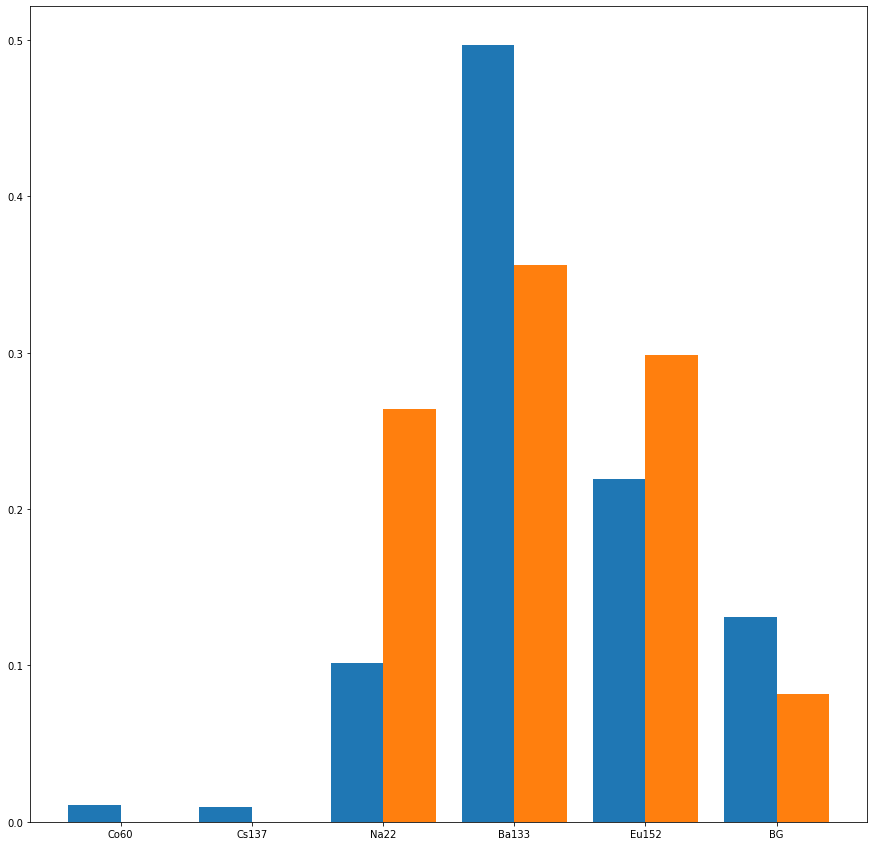

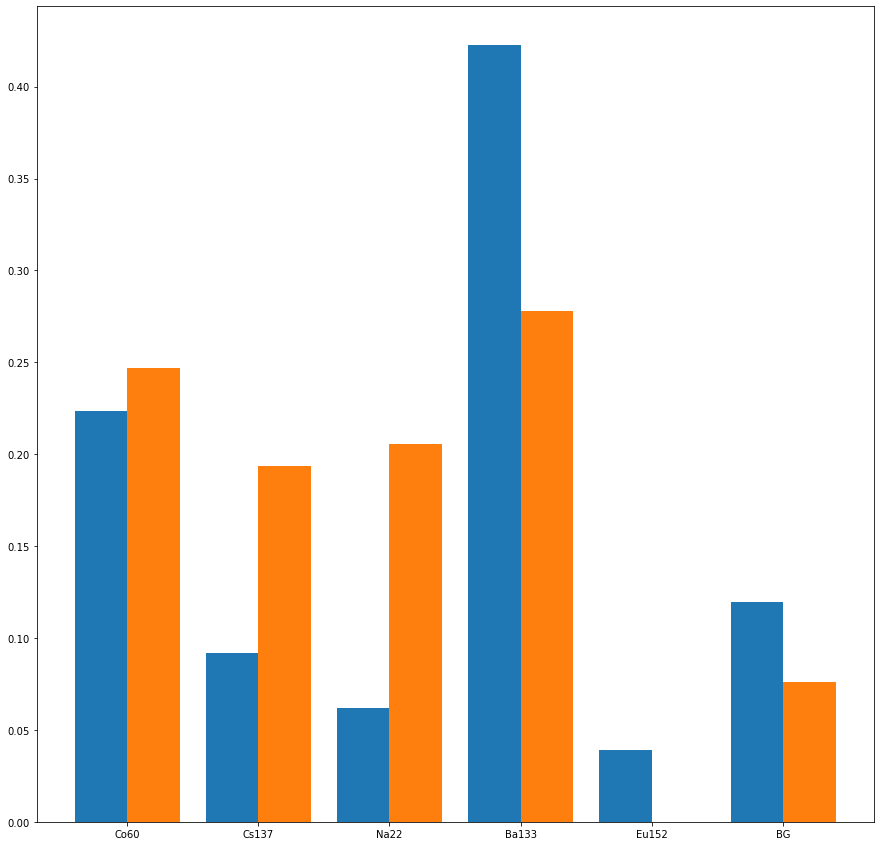

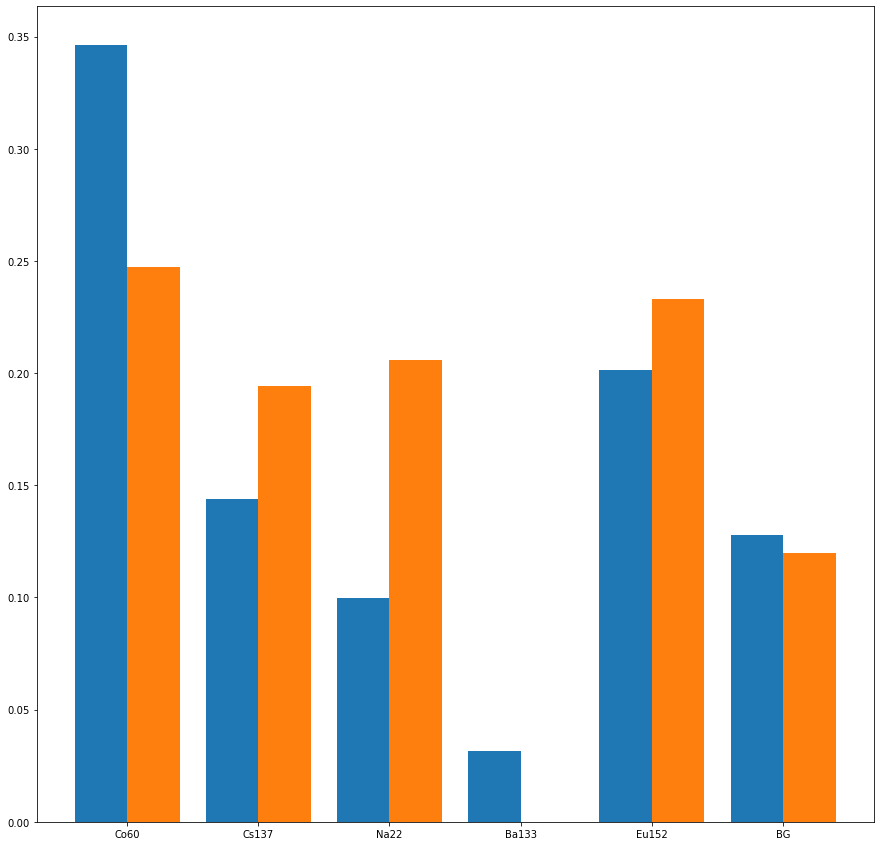

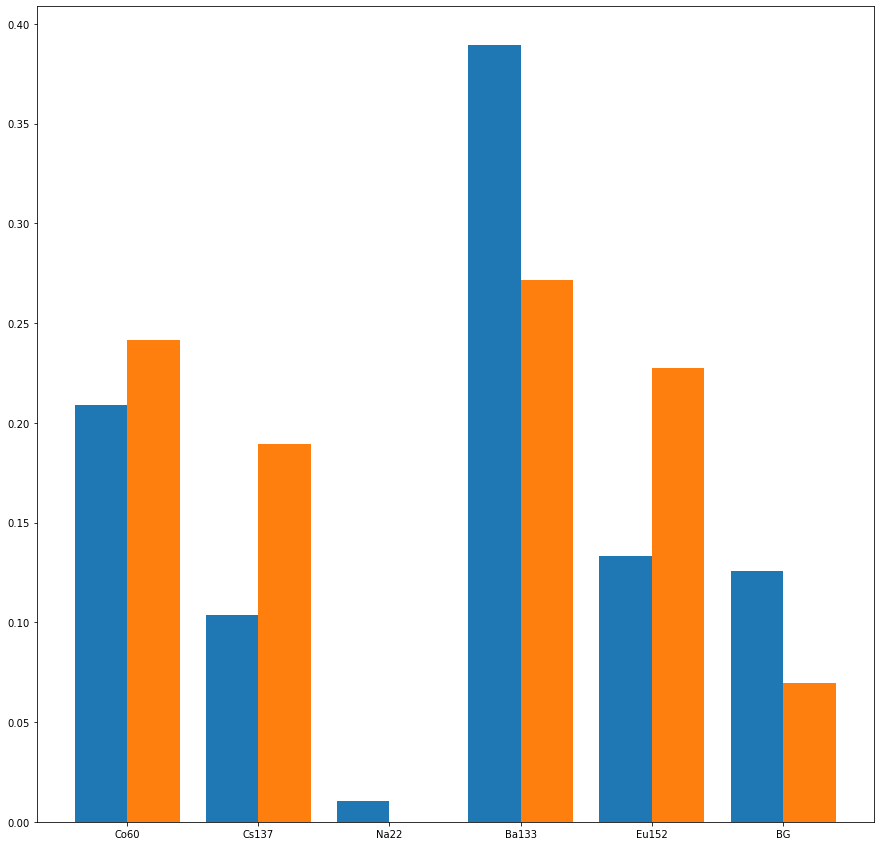

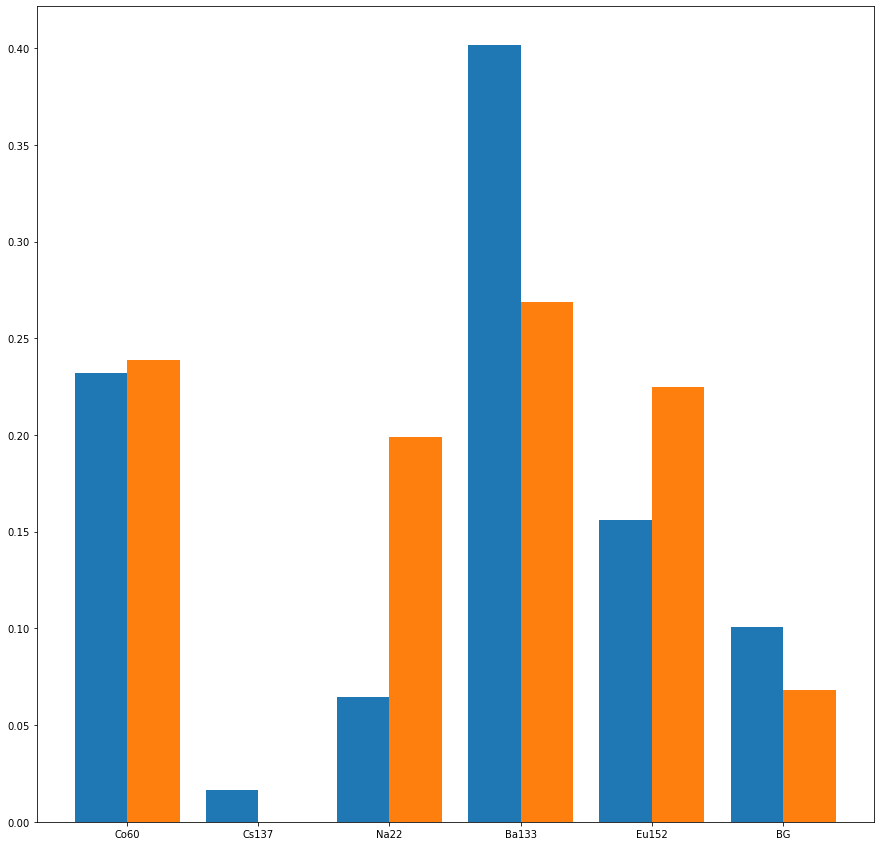

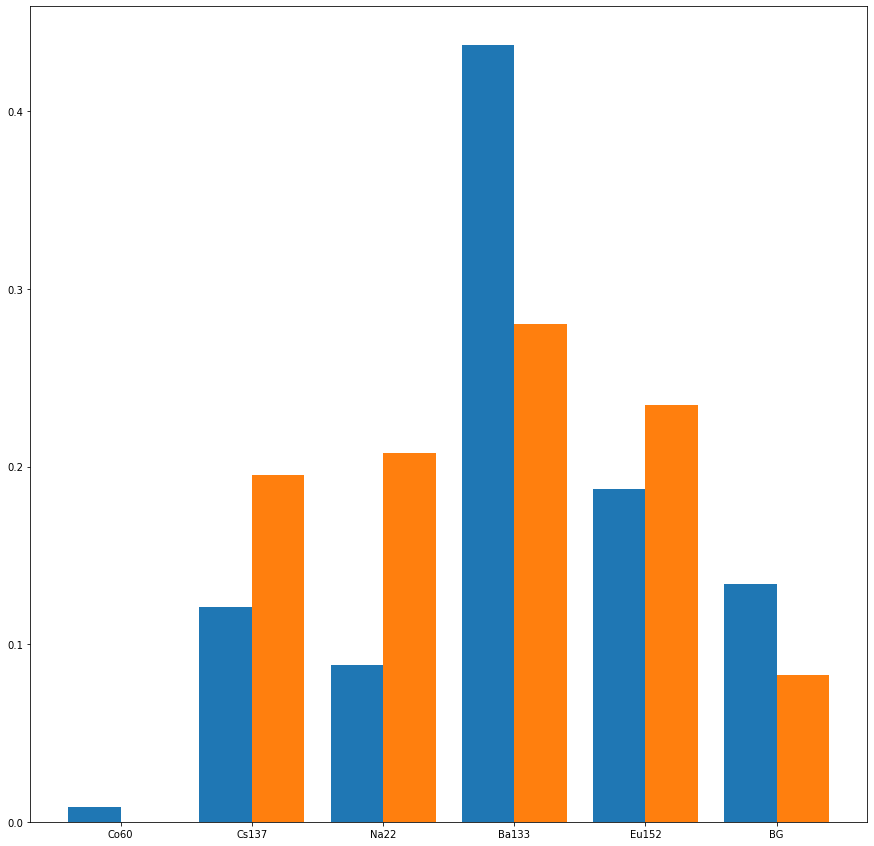

In [97]:
x_test1 = np.loadtxt('x_test_20min.txt')
print(x_test1.shape)
x_test1 = x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1)
print(x_test1.shape)

#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test1)
print(result_y.shape)
print(result_y[0,:])


BG = result_y[:, 6]+ result_y[:, 7] + result_y[:, 8] + result_y[:, 9] #  238, Th, Ra, K
BG = BG.reshape(BG.shape[0], 1)

res_y = np.hstack((result_y[:, :5], BG))
print(BG.shape)
print(res_y.shape)

names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(15, 15))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    #plt.savefig("June29-10epoch-7bits-Compton-cut60keV-{:03}.png".format(i))

plt.show()

np.savetxt("result_y.csv",result_y,delimiter=',')


(40, 10)
[0.5611816  0.04532022 0.03595899 0.02095948 0.12846805 0.06383133
 0.0036382  0.10694253 0.03223813 0.00146149]
(40, 1)
(40, 7)


/home/ndgu-visitor2/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


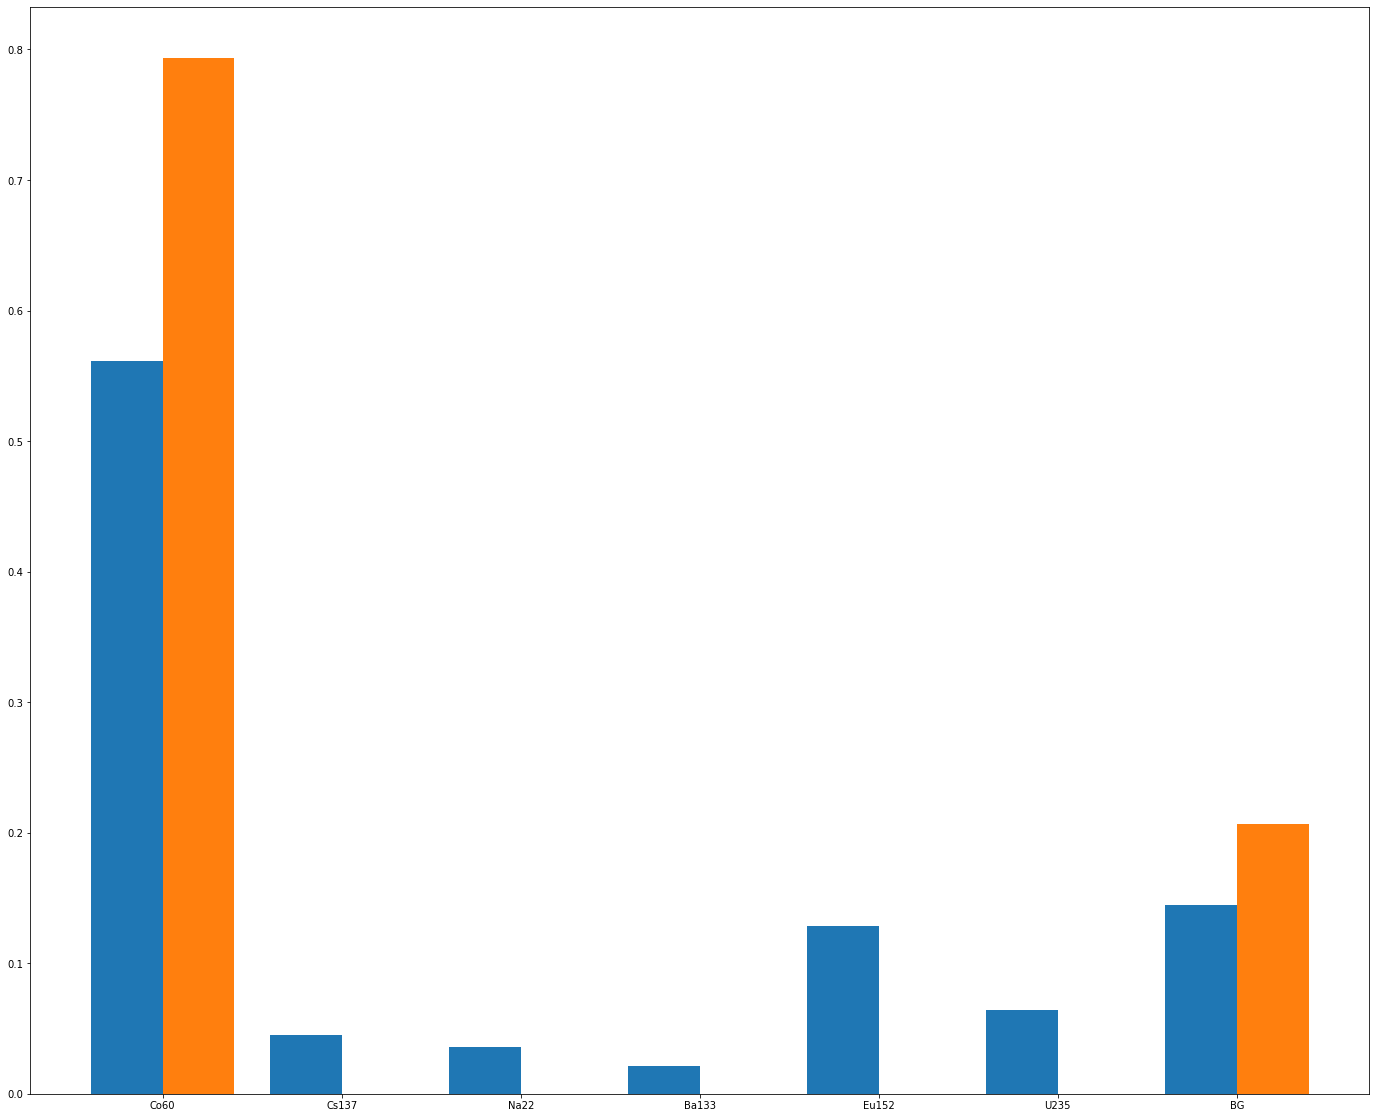

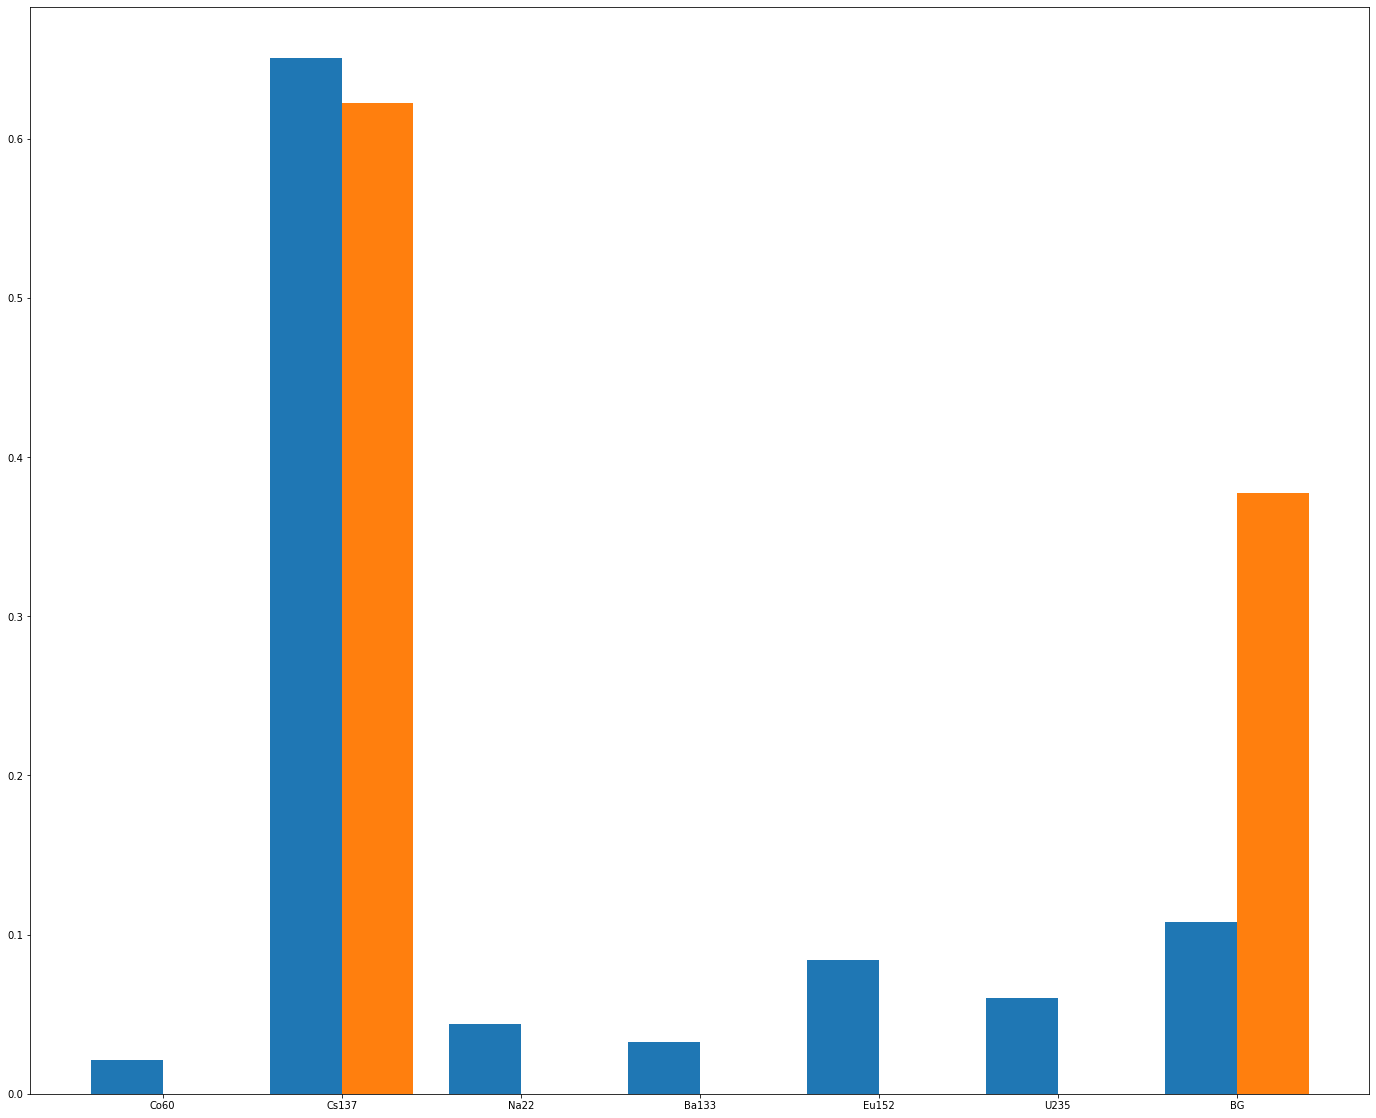

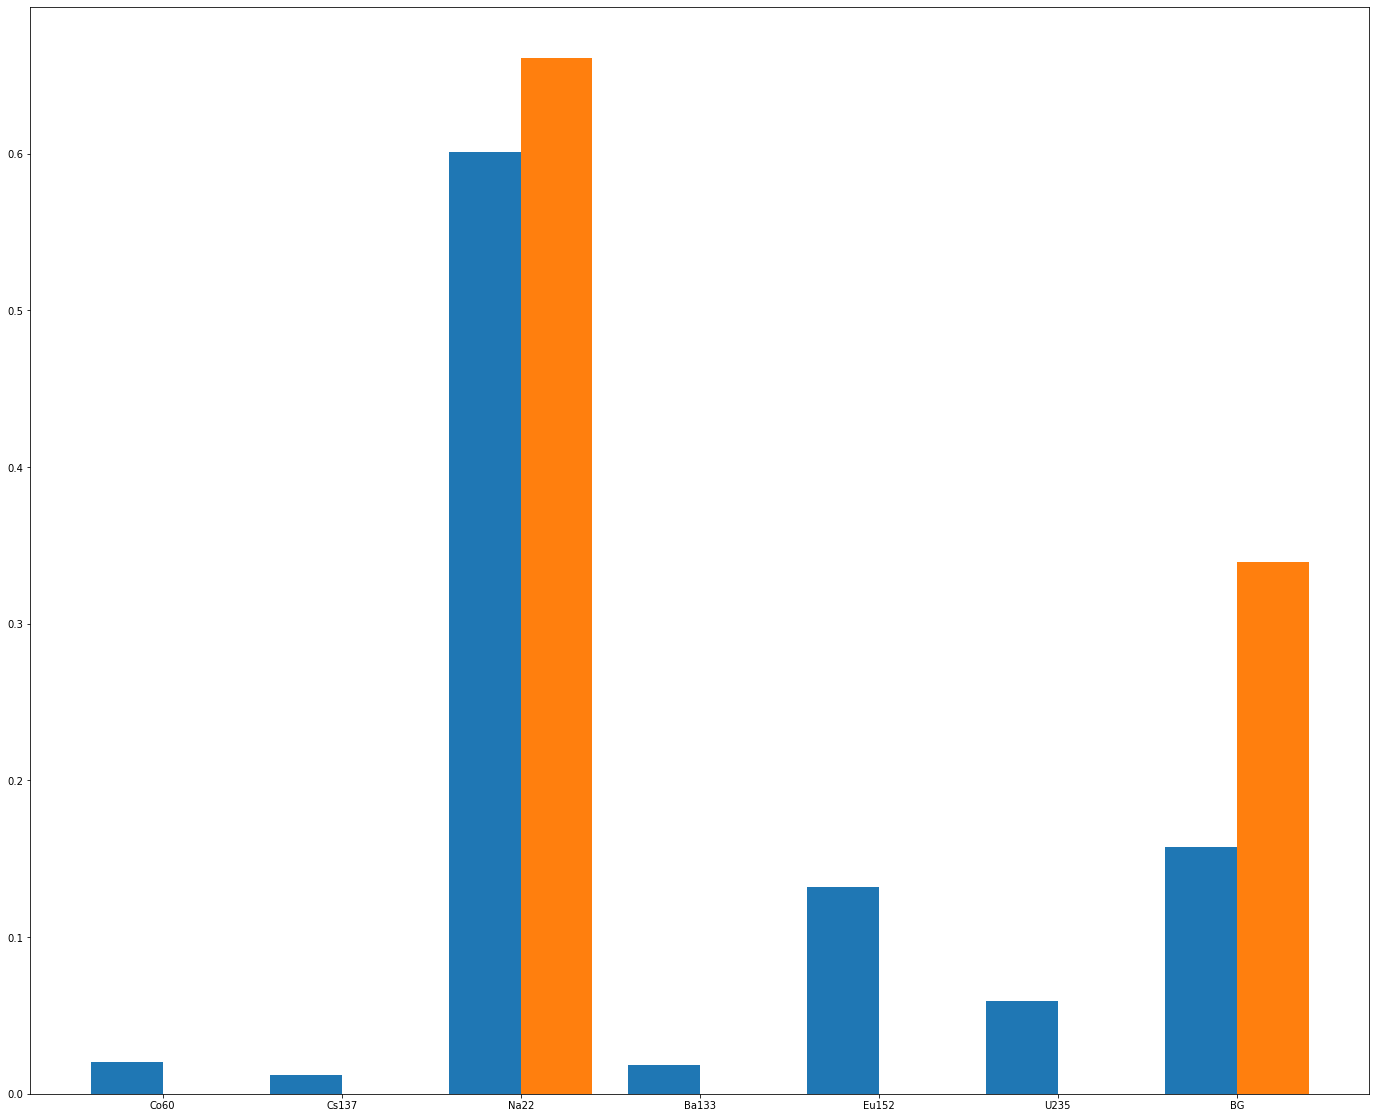

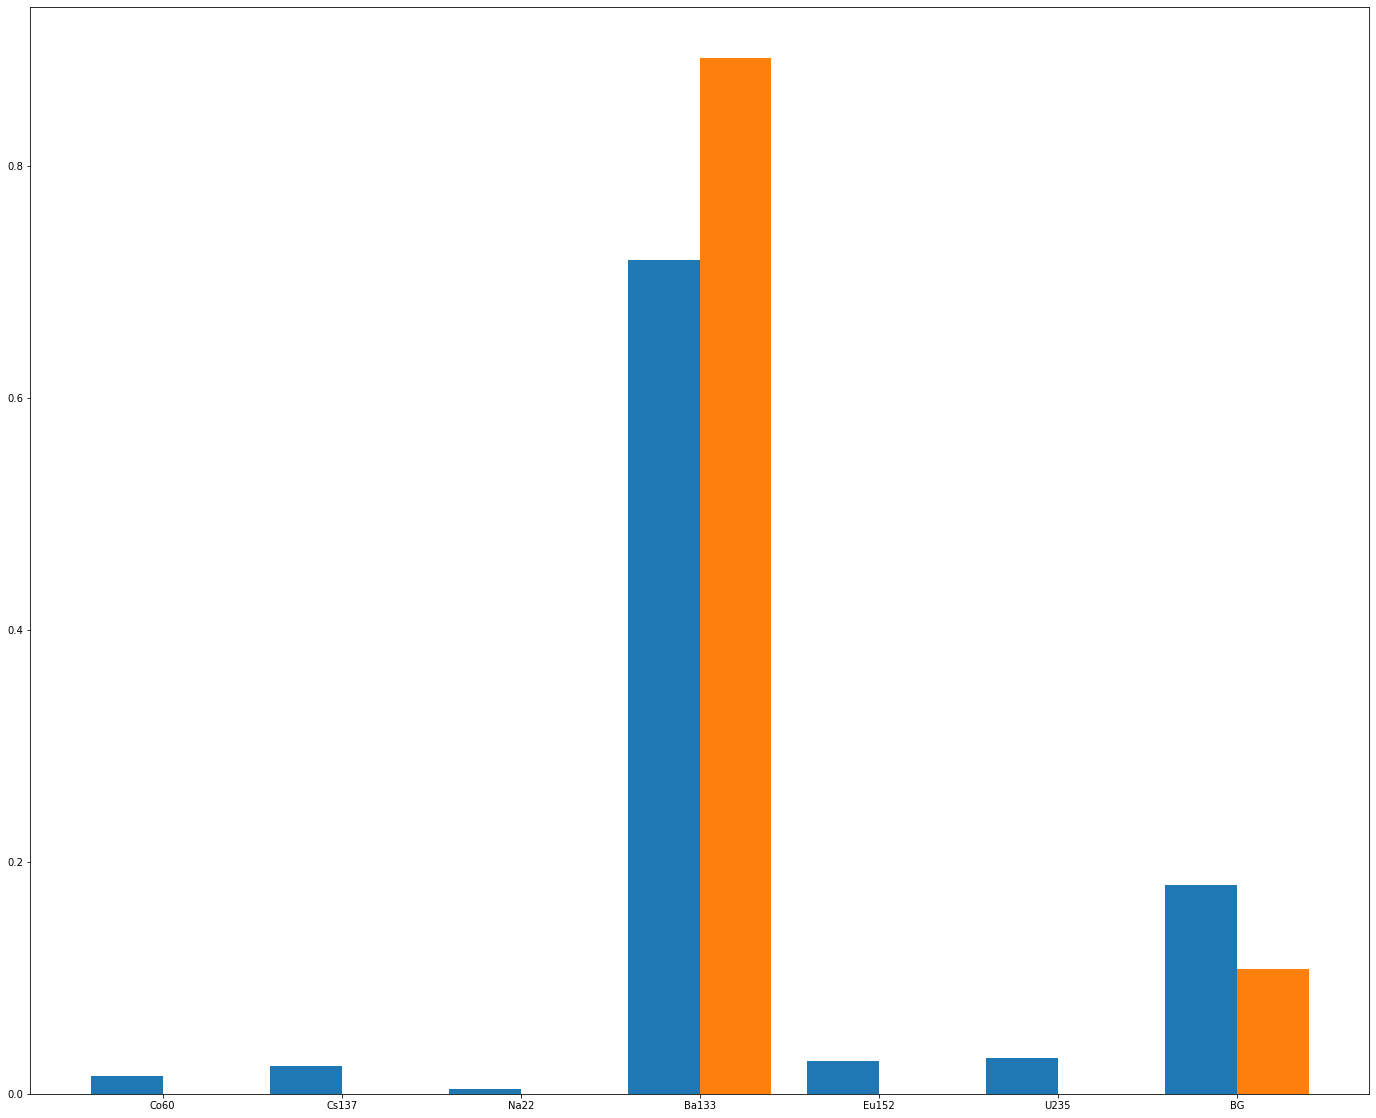

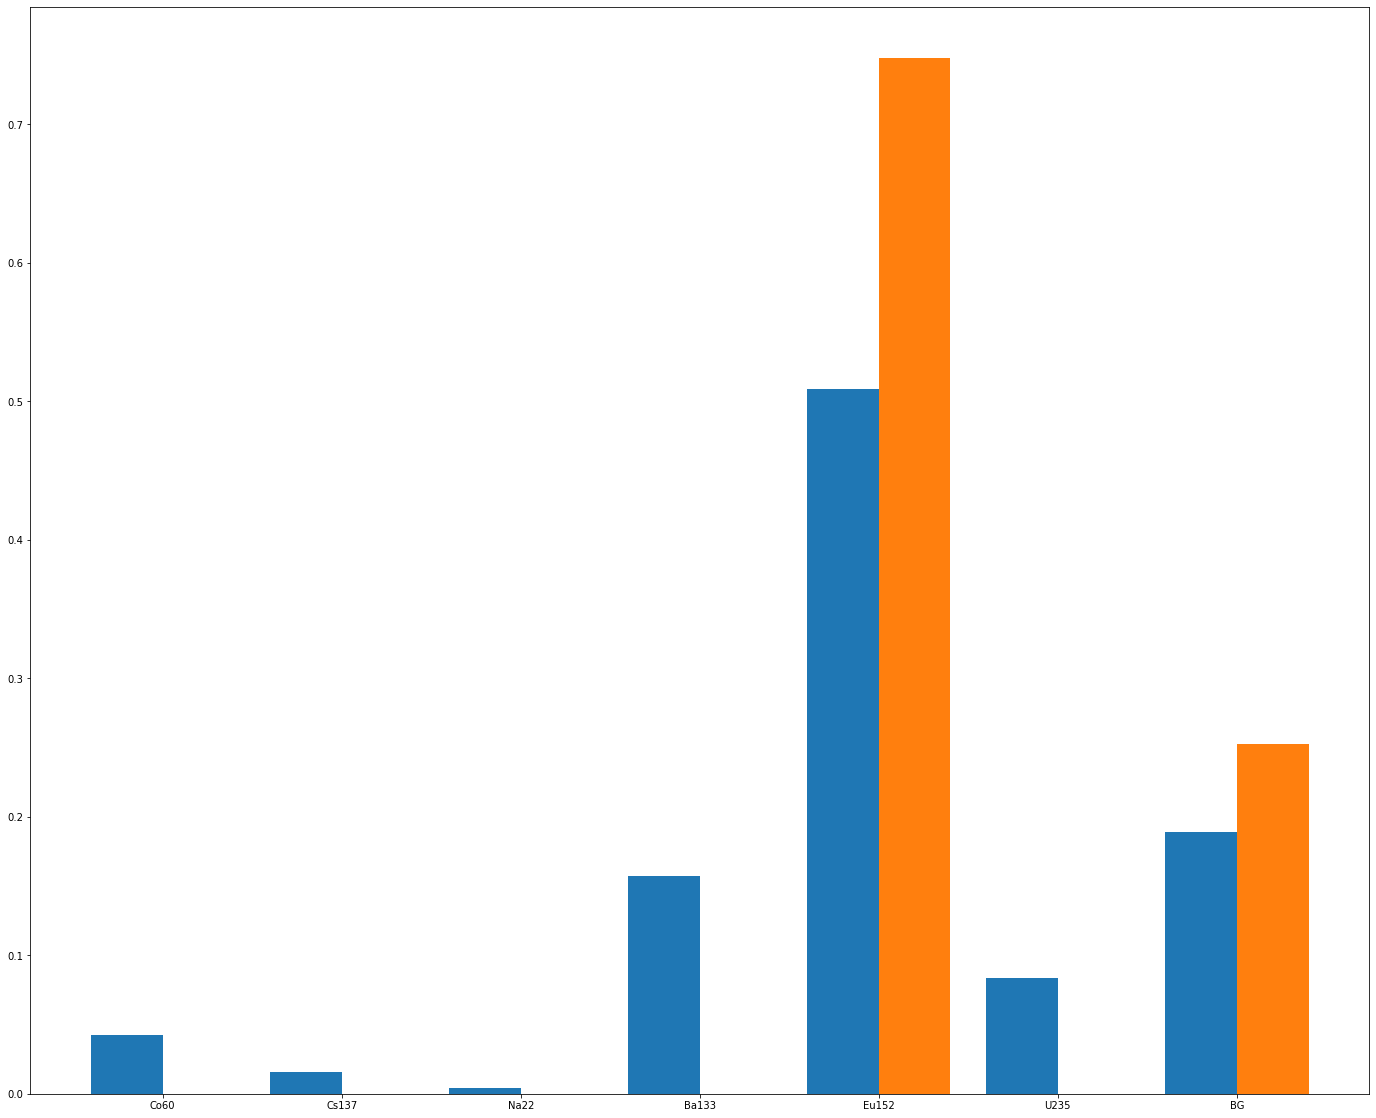

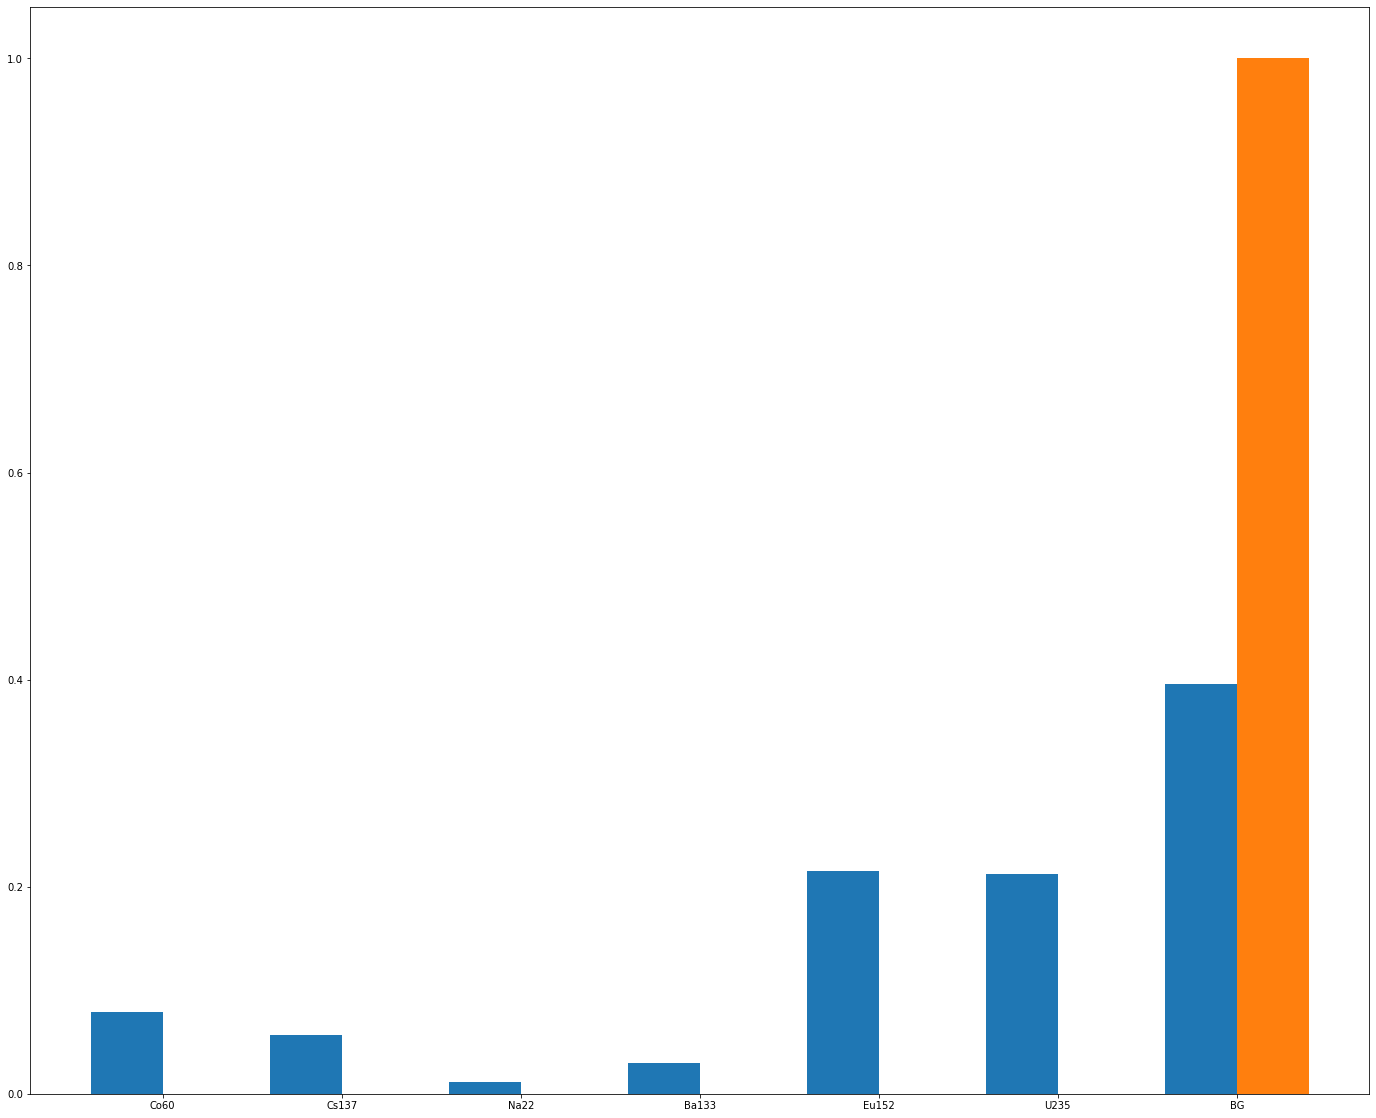

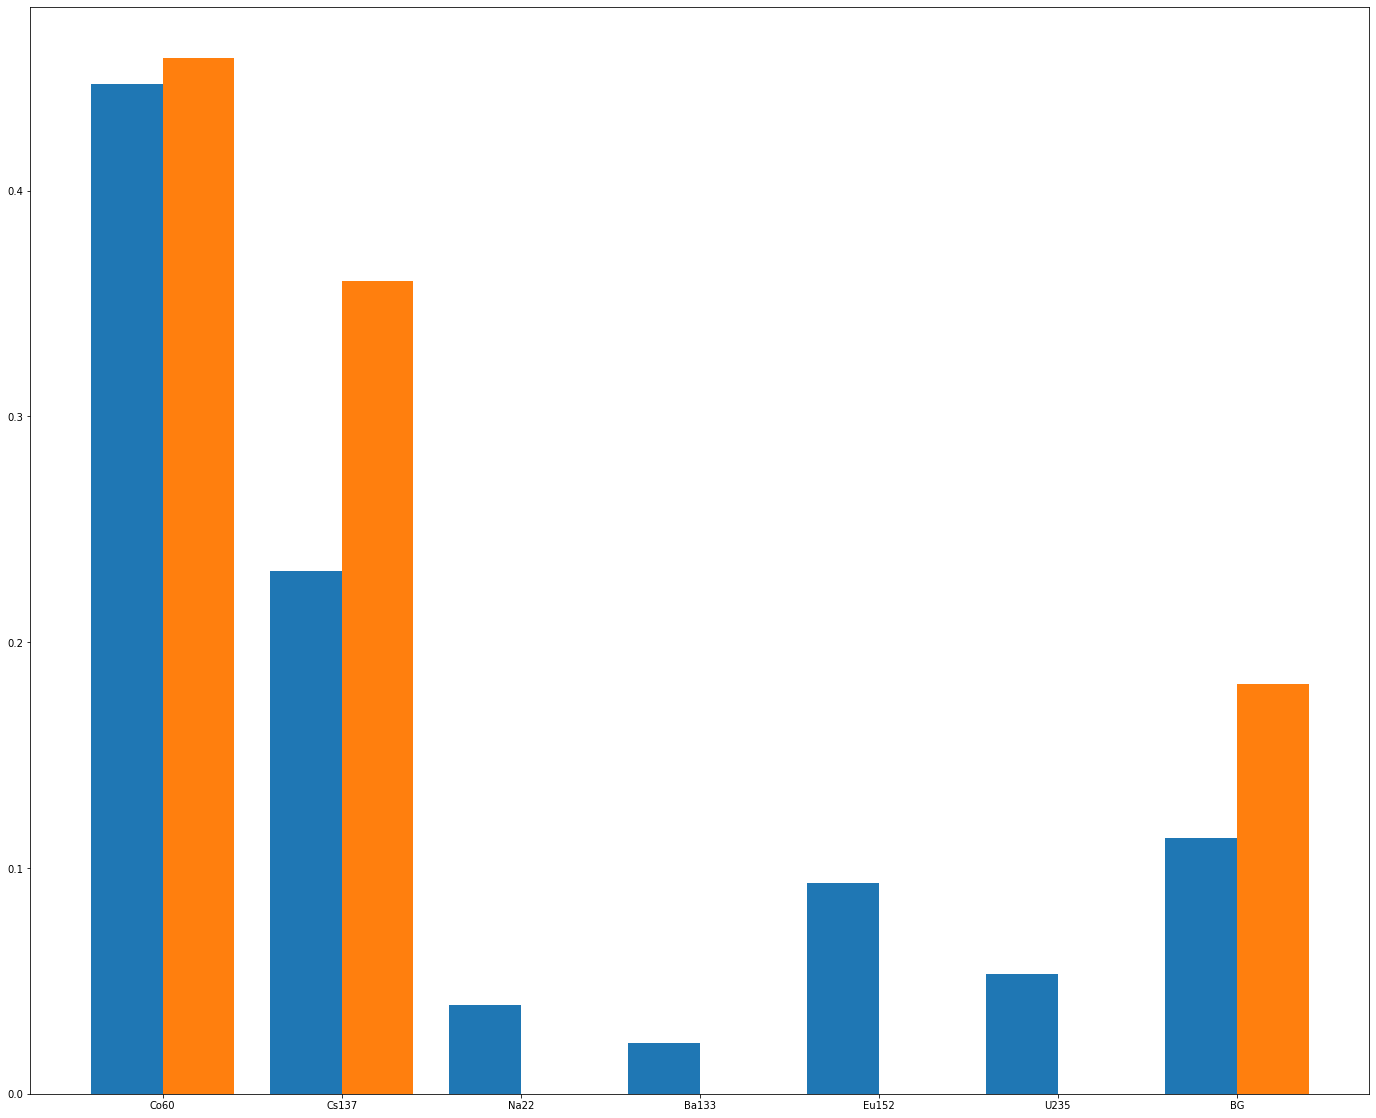

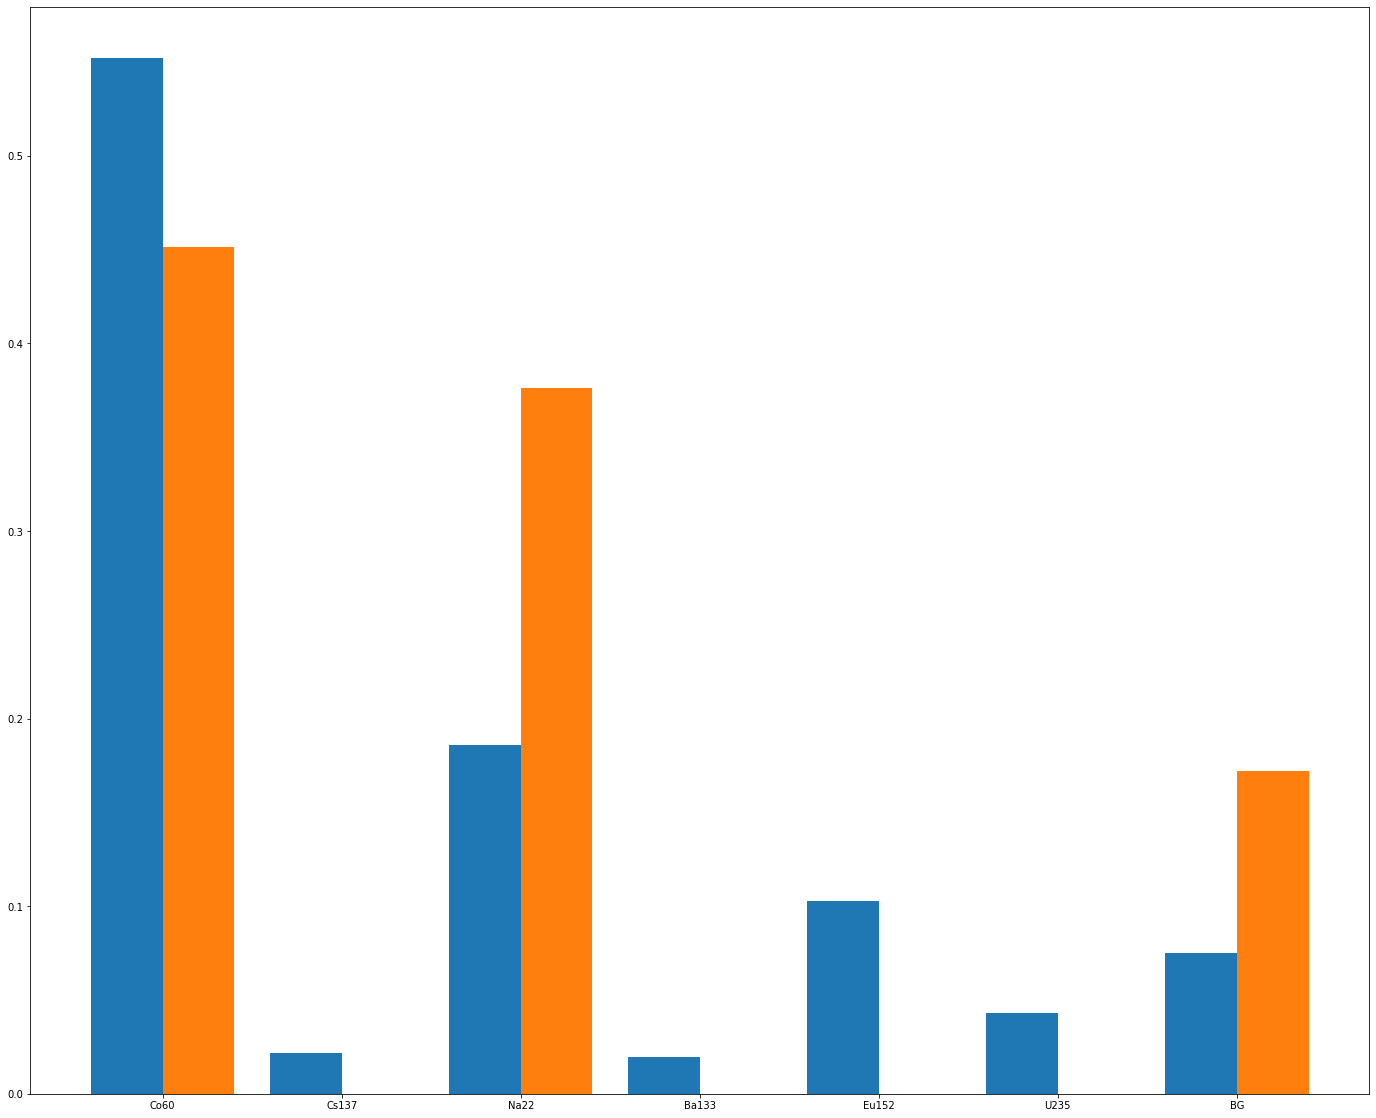

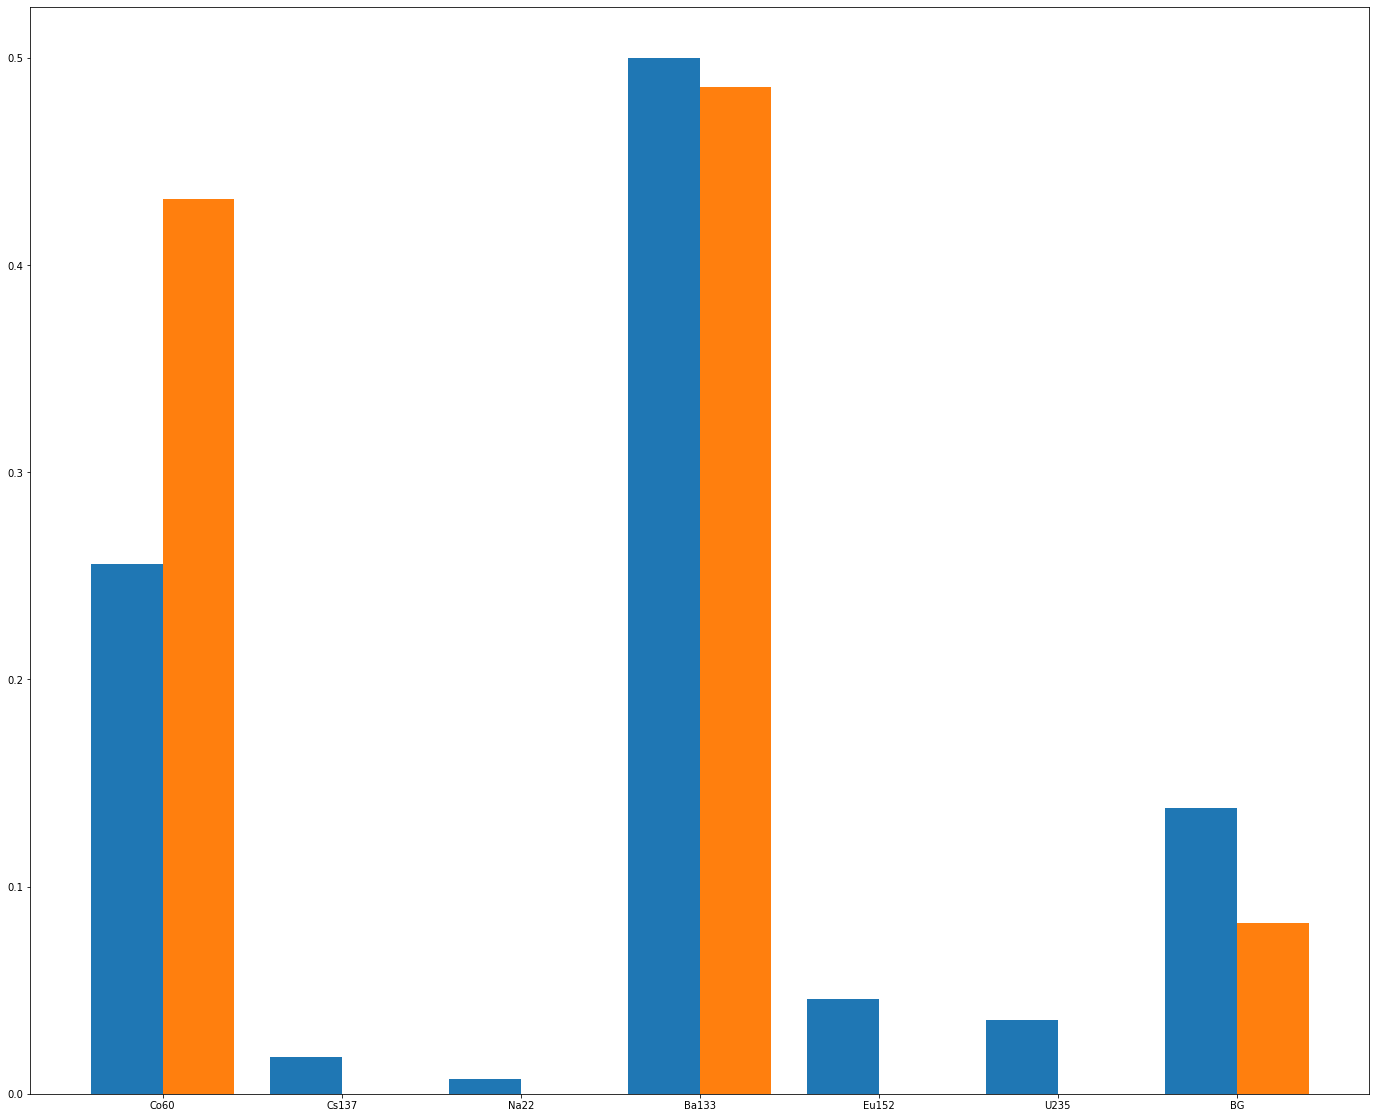

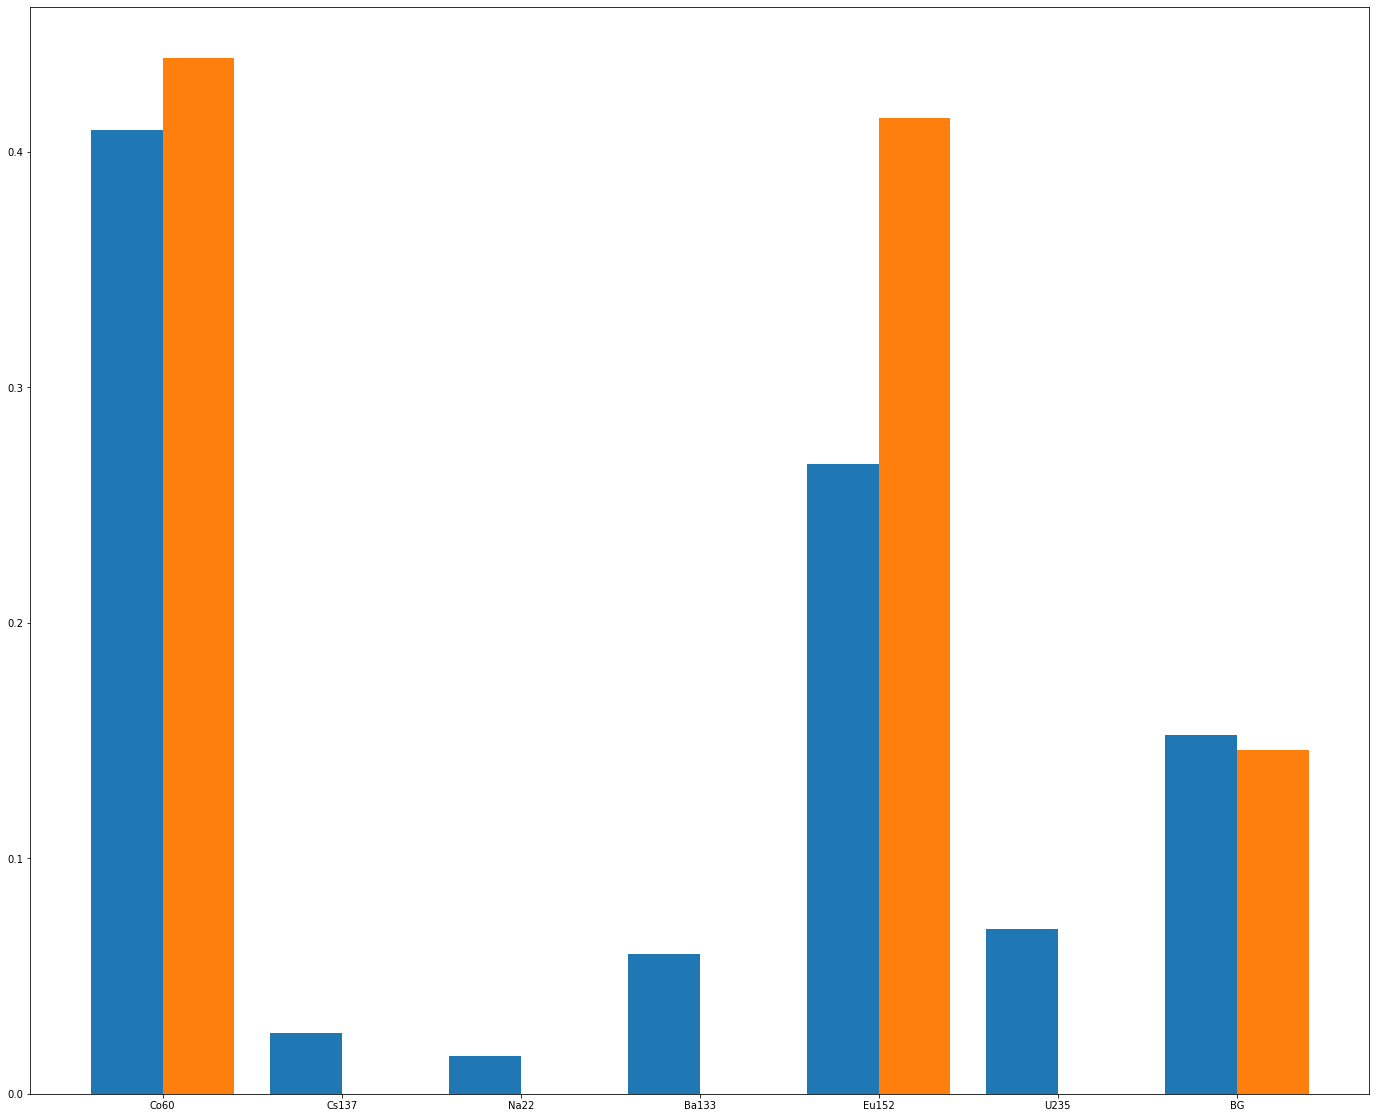

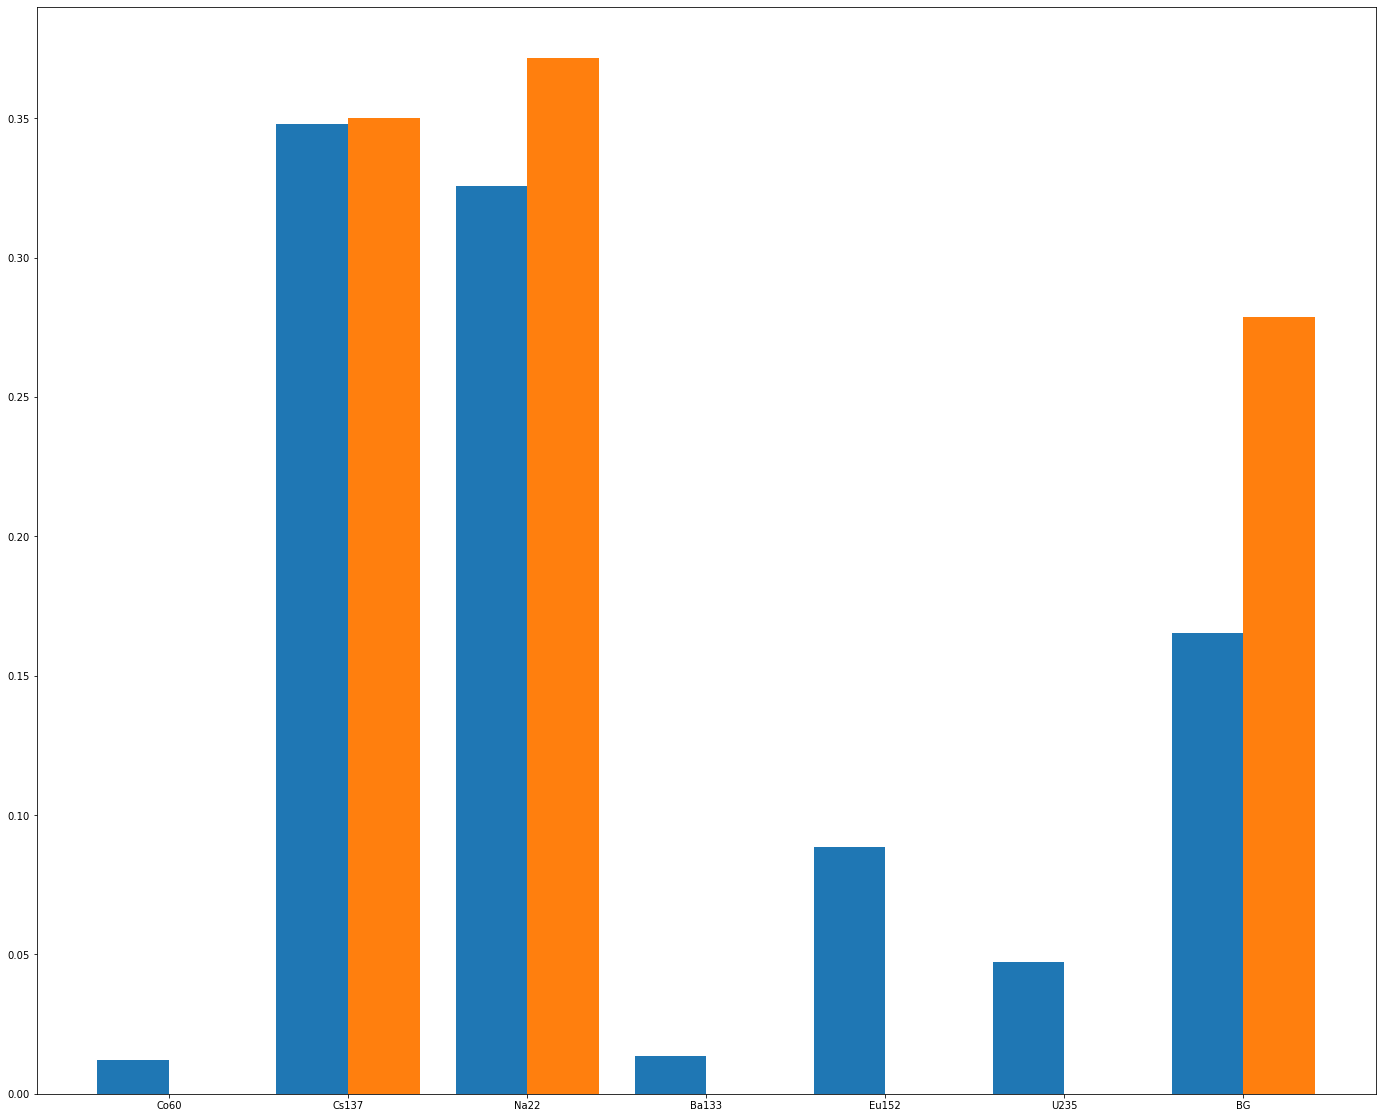

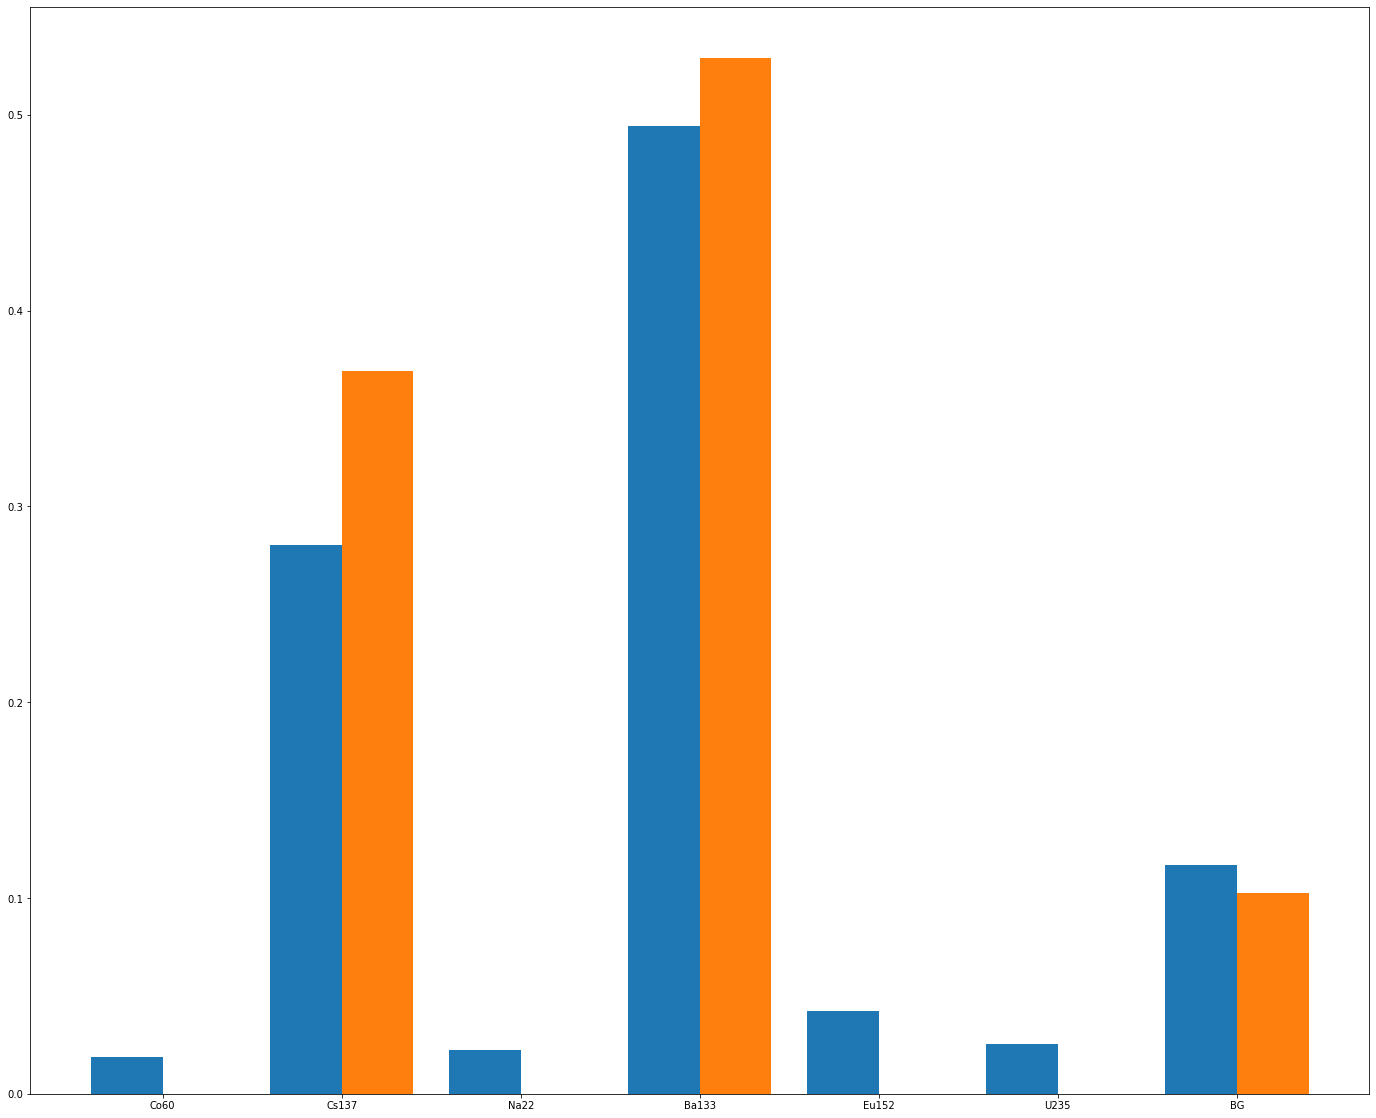

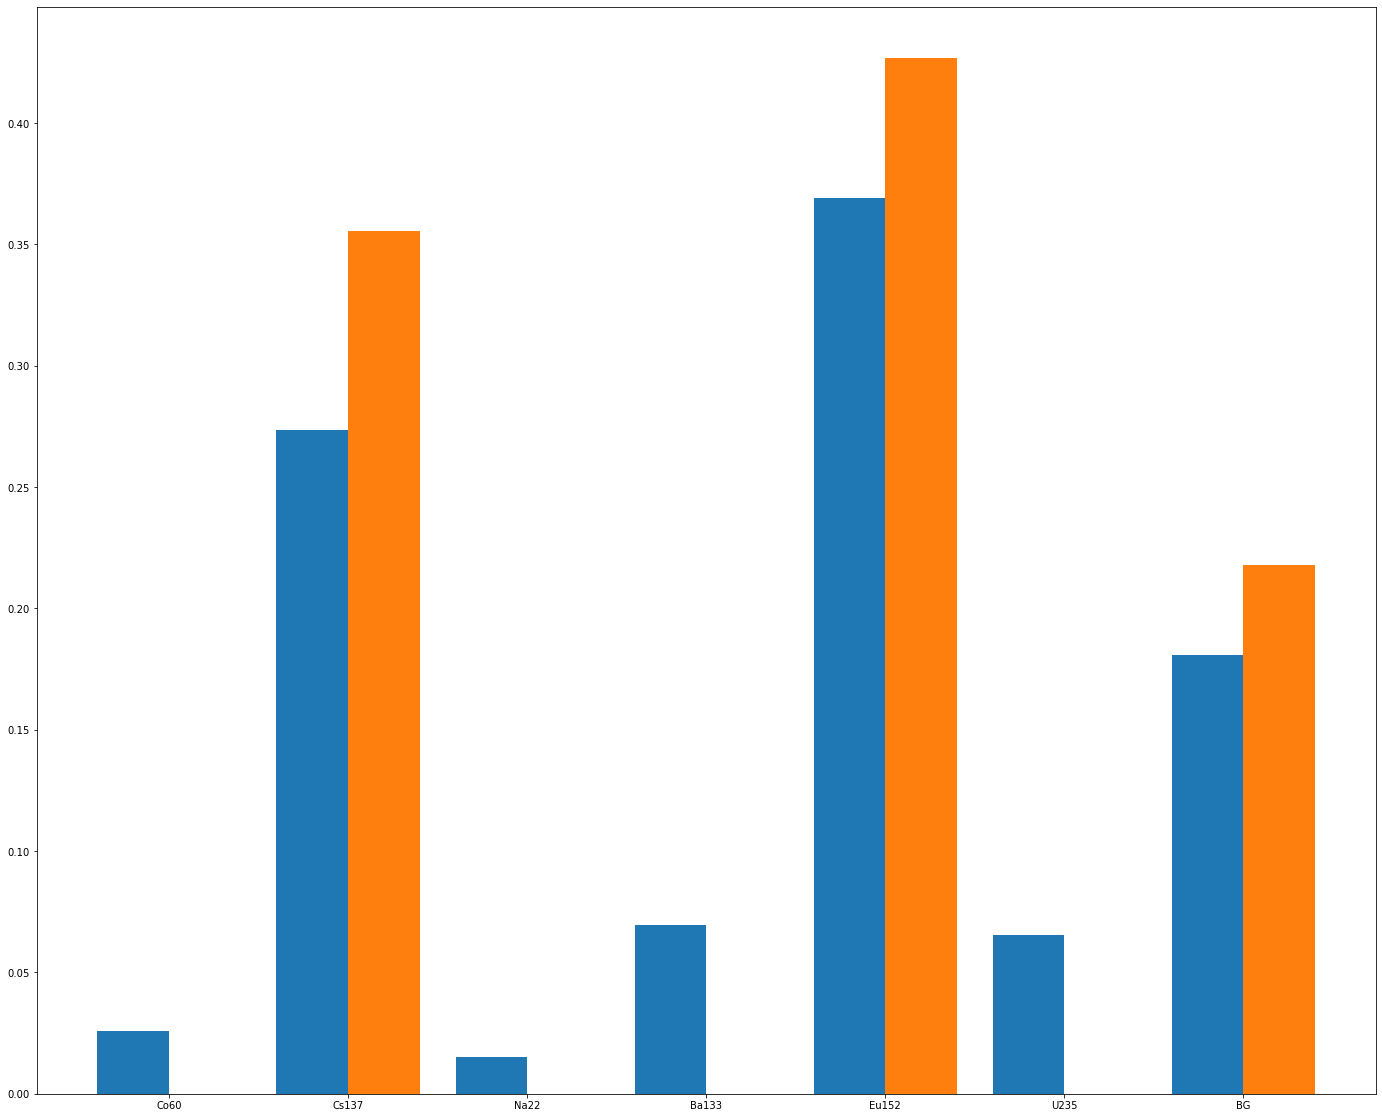

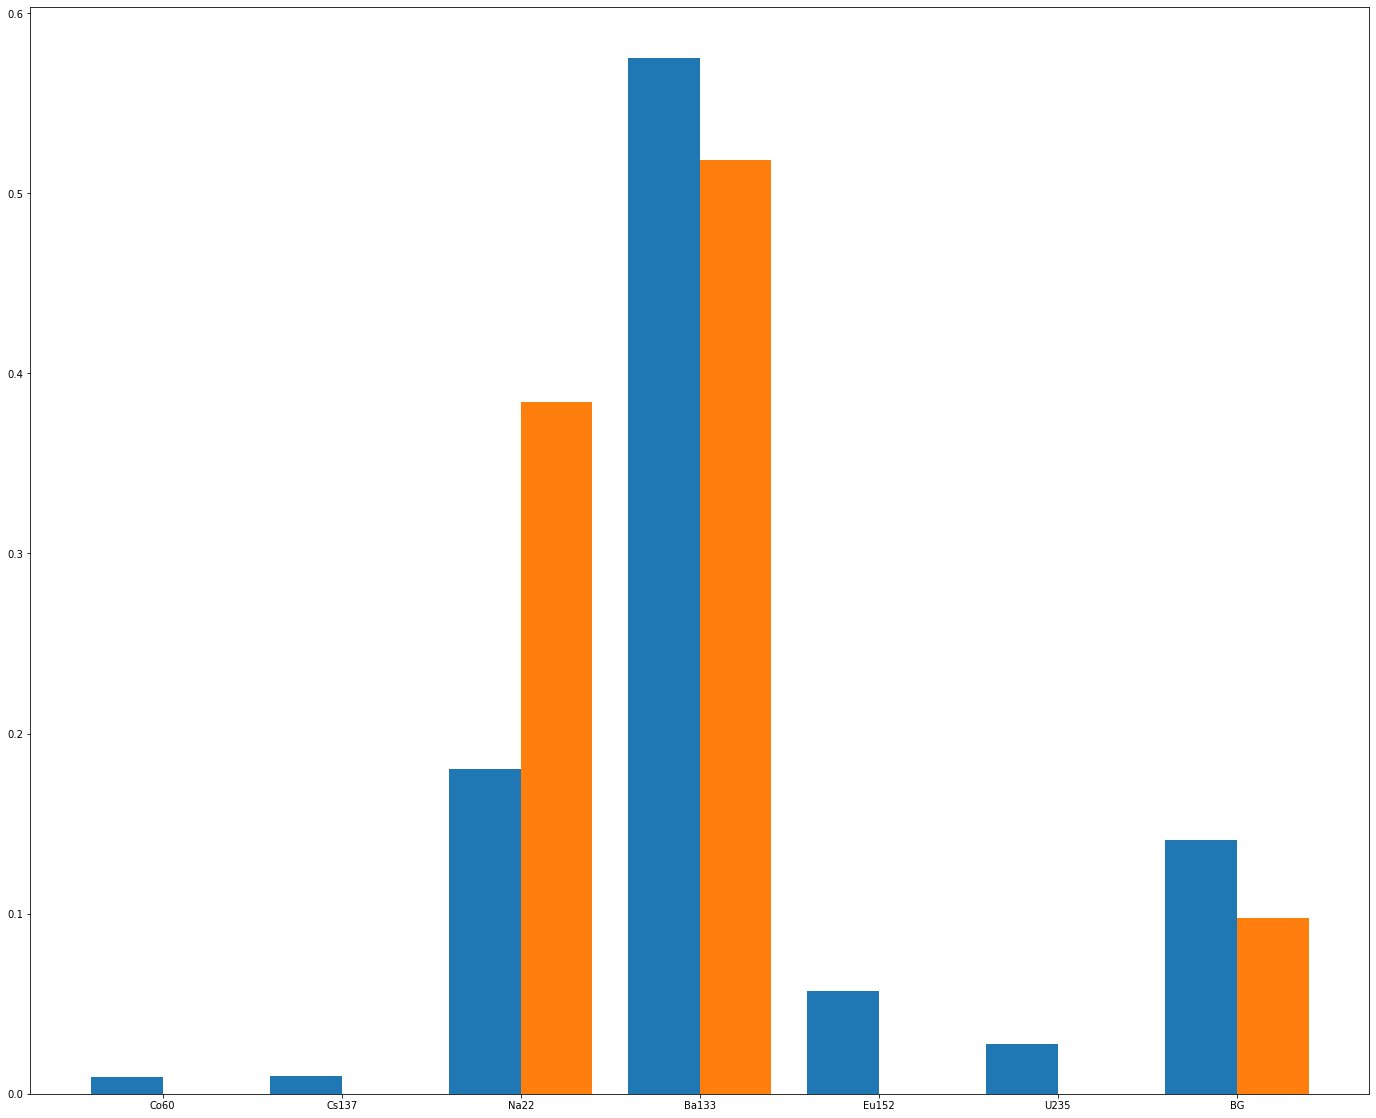

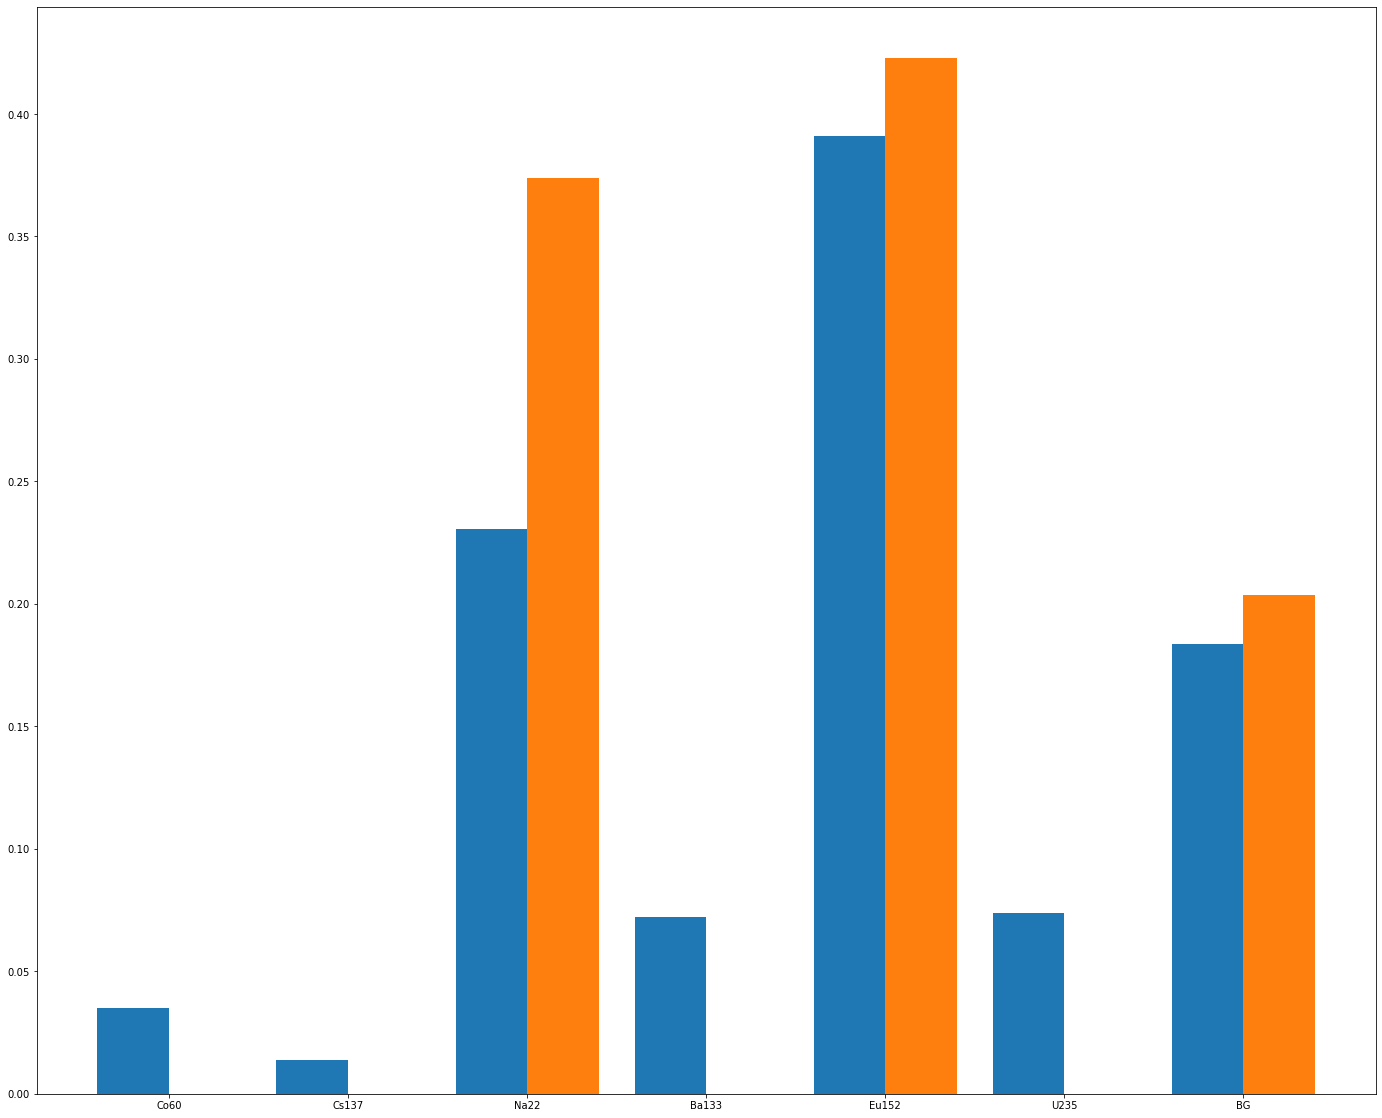

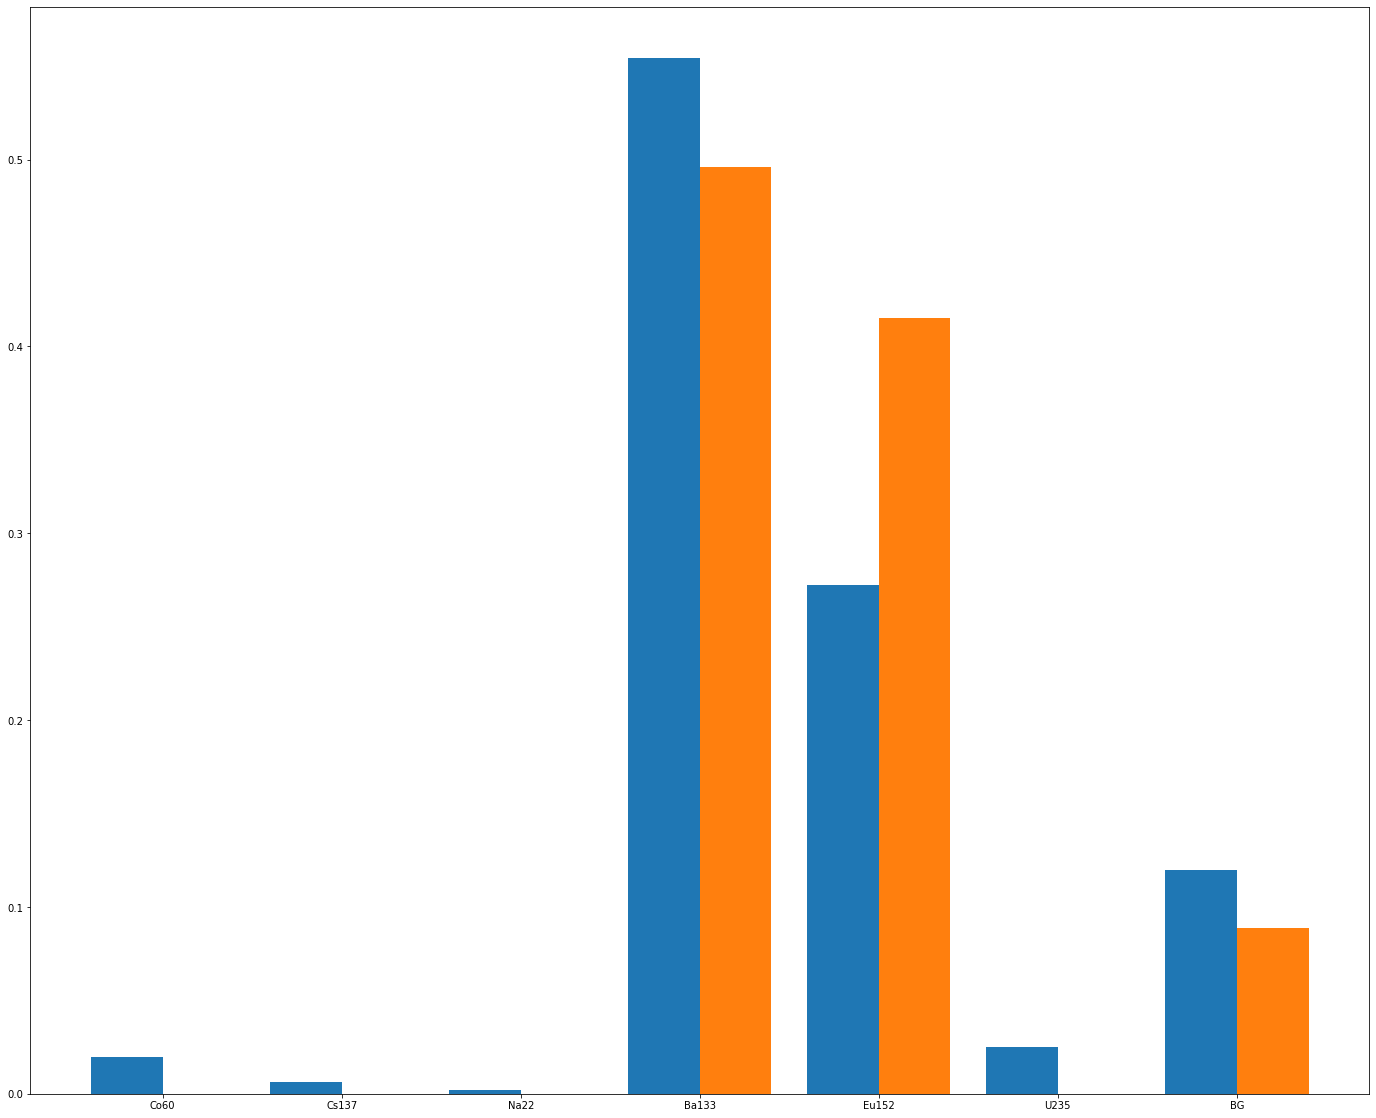

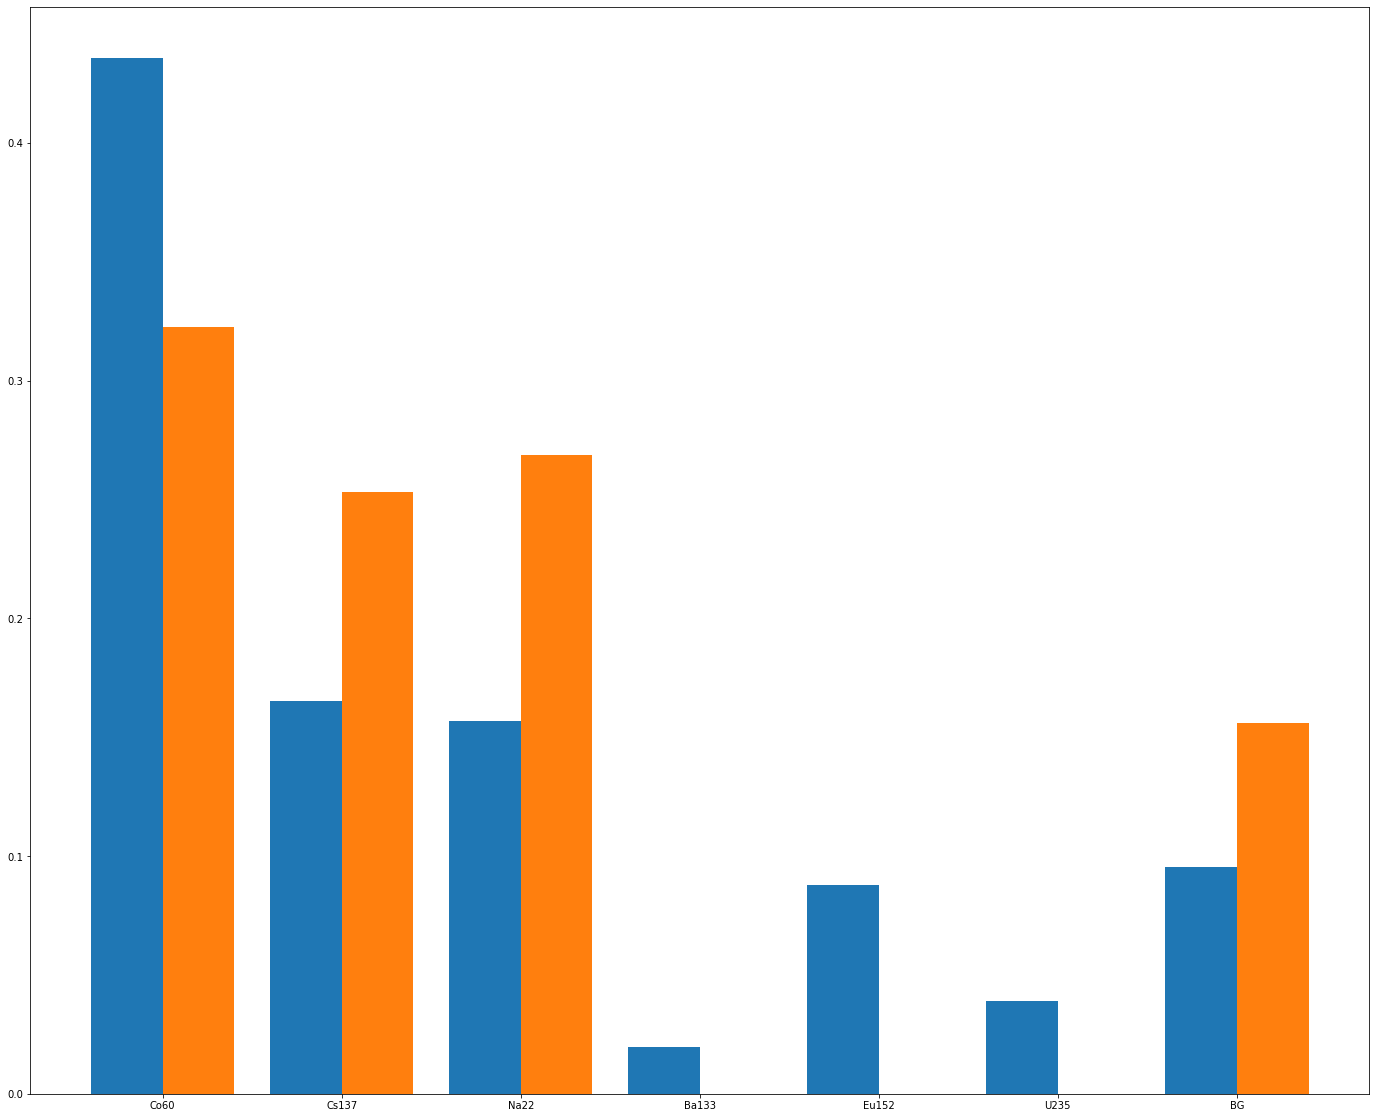

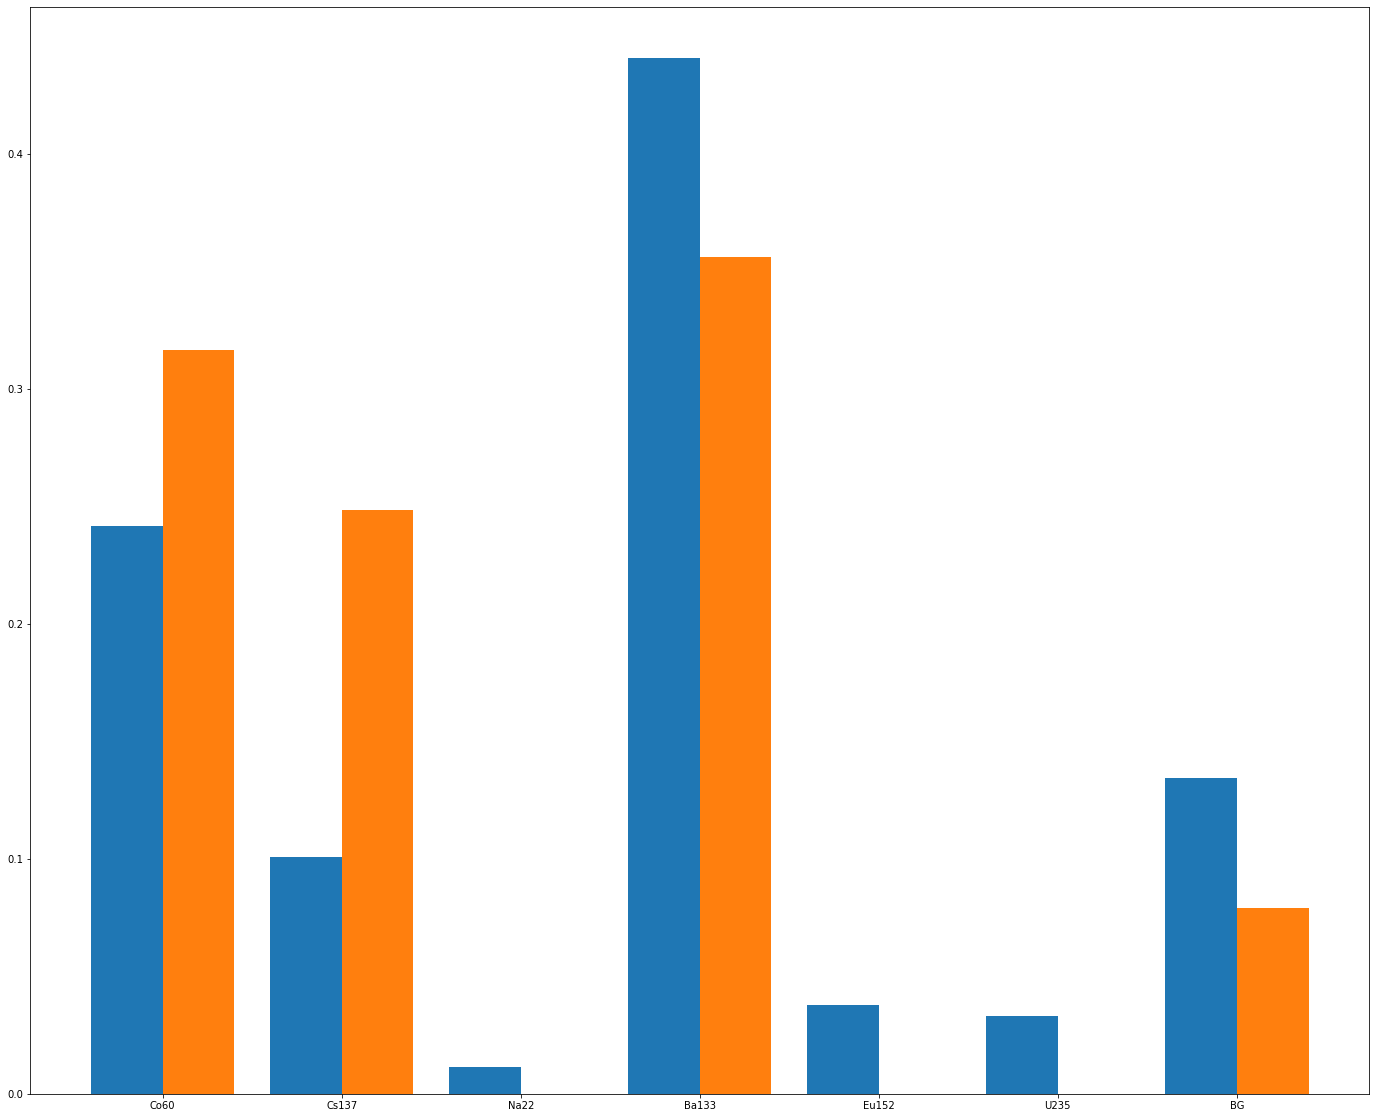

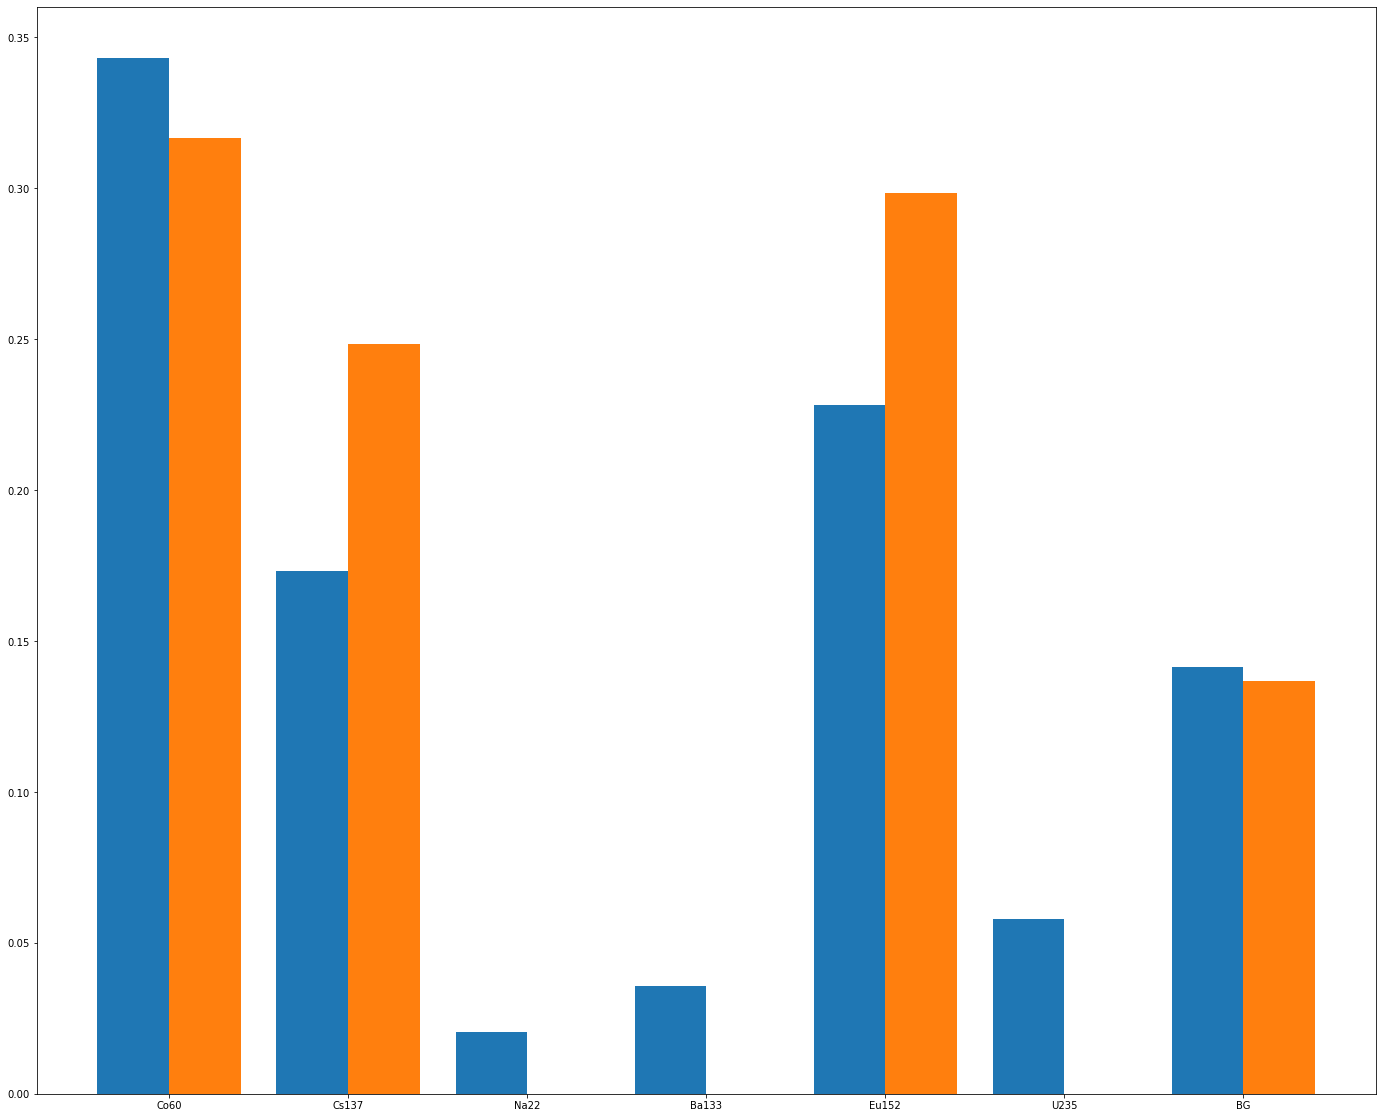

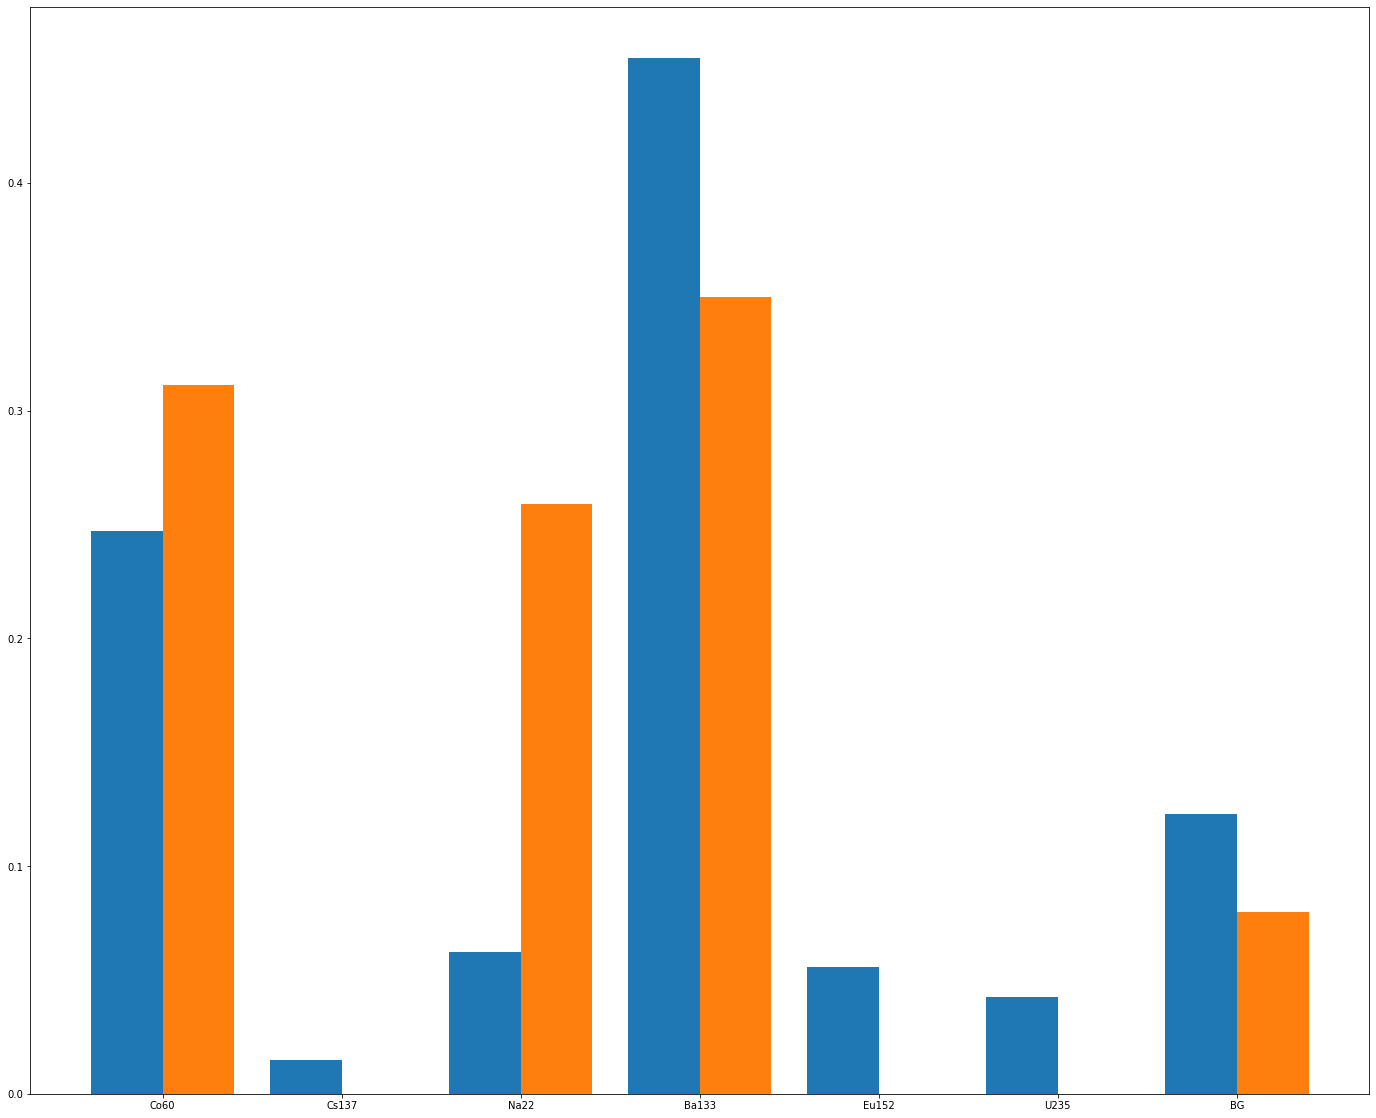

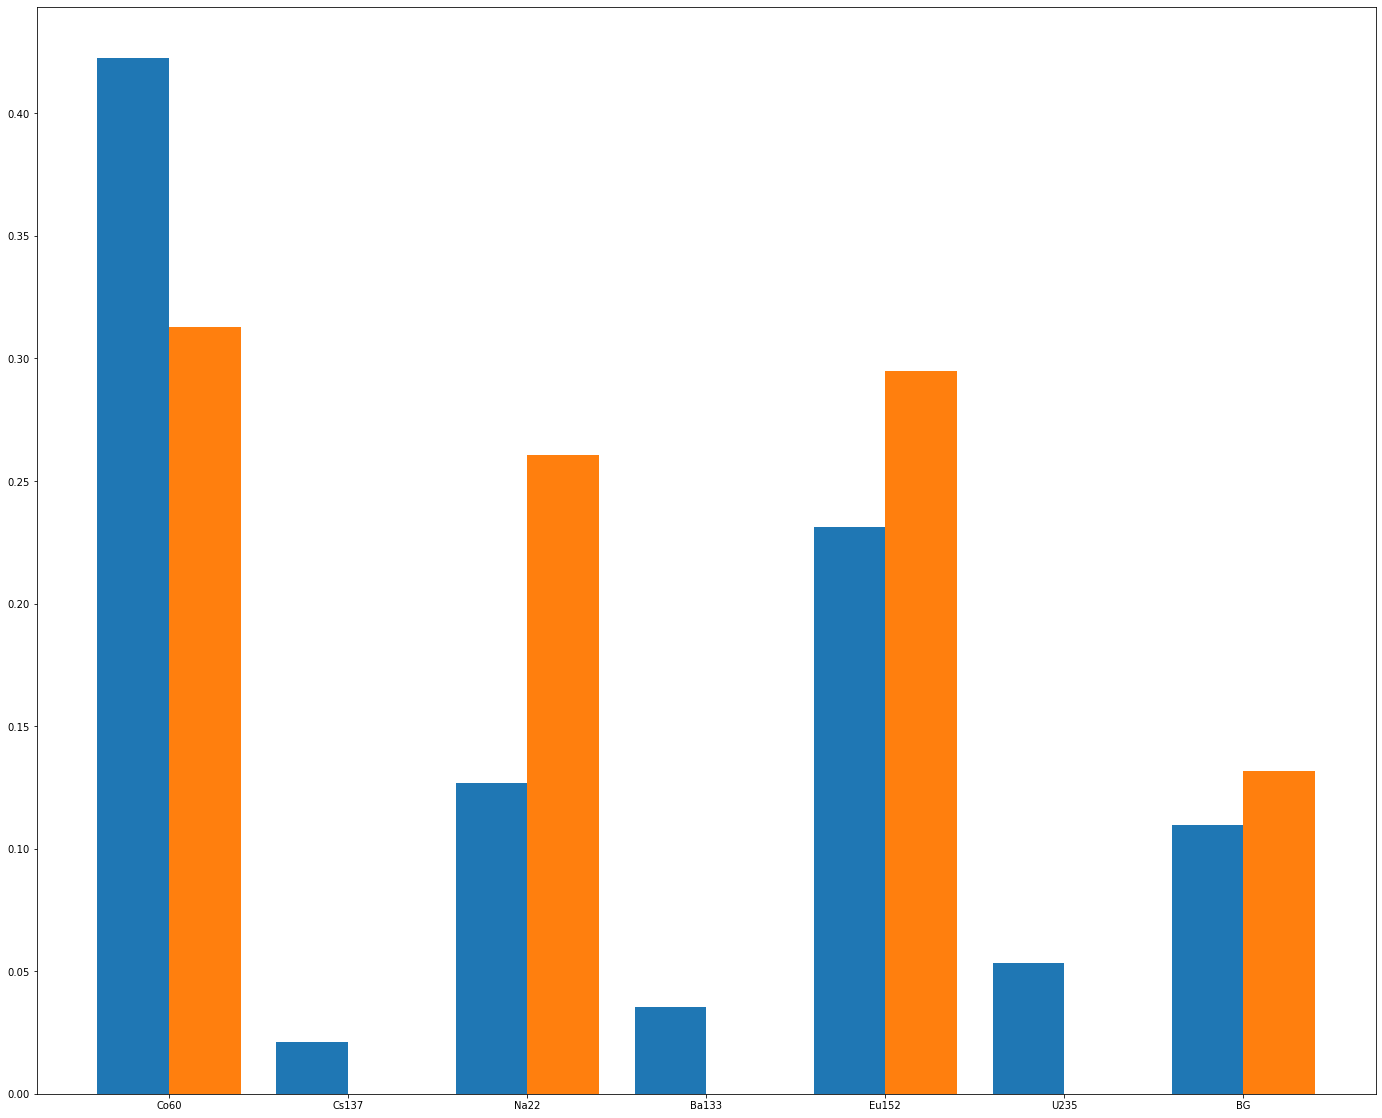

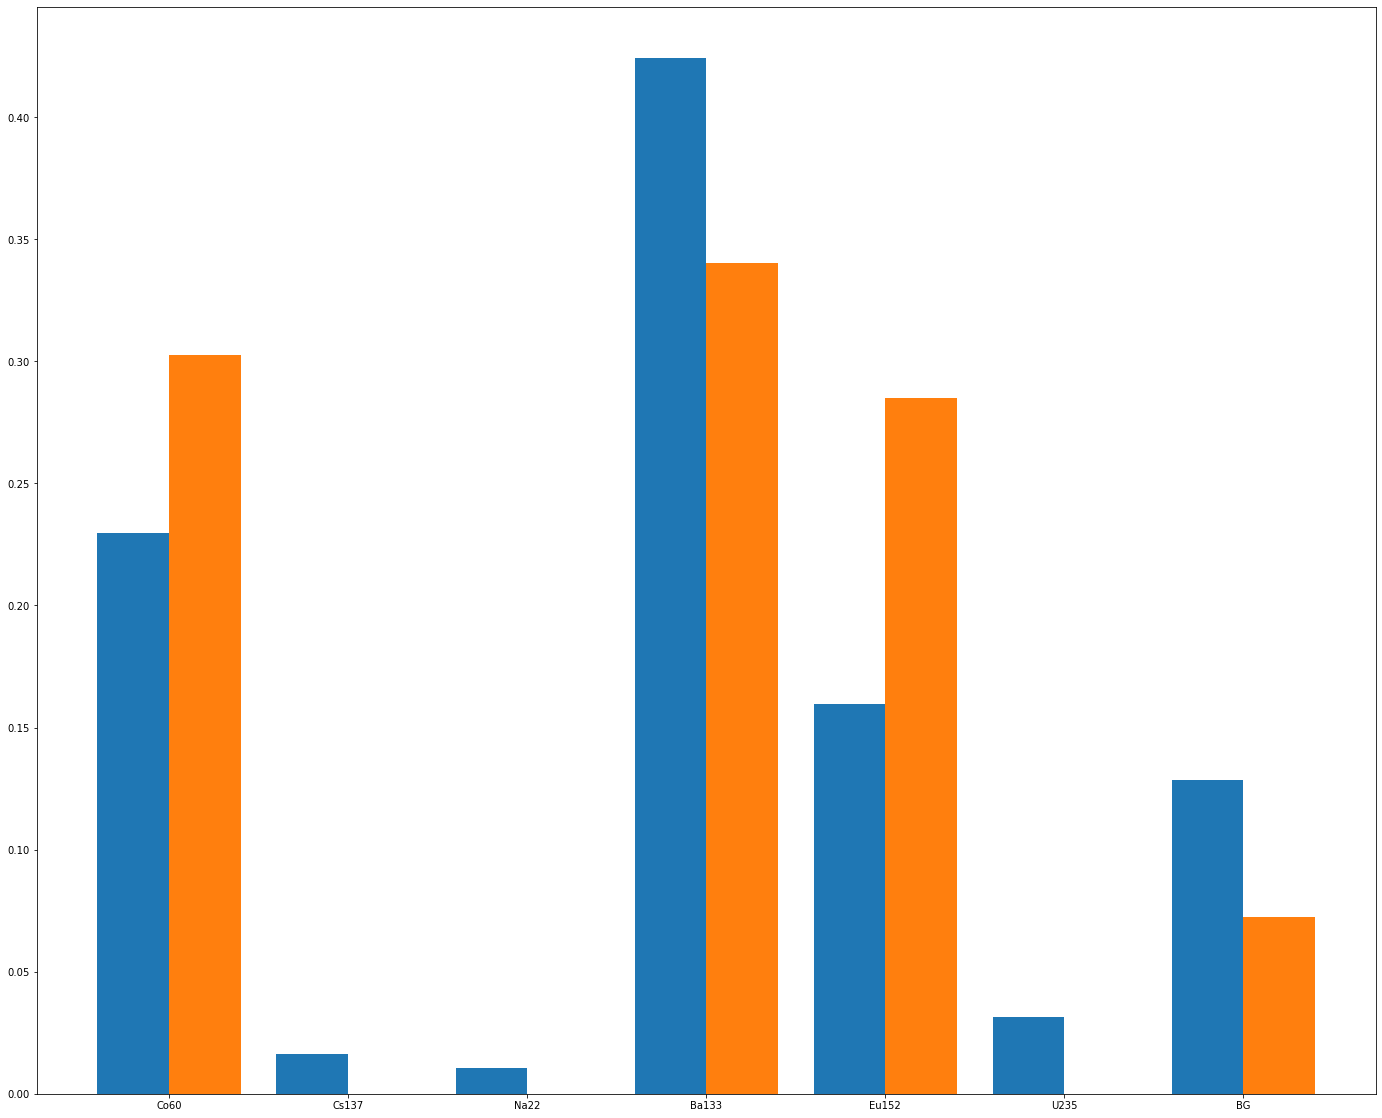

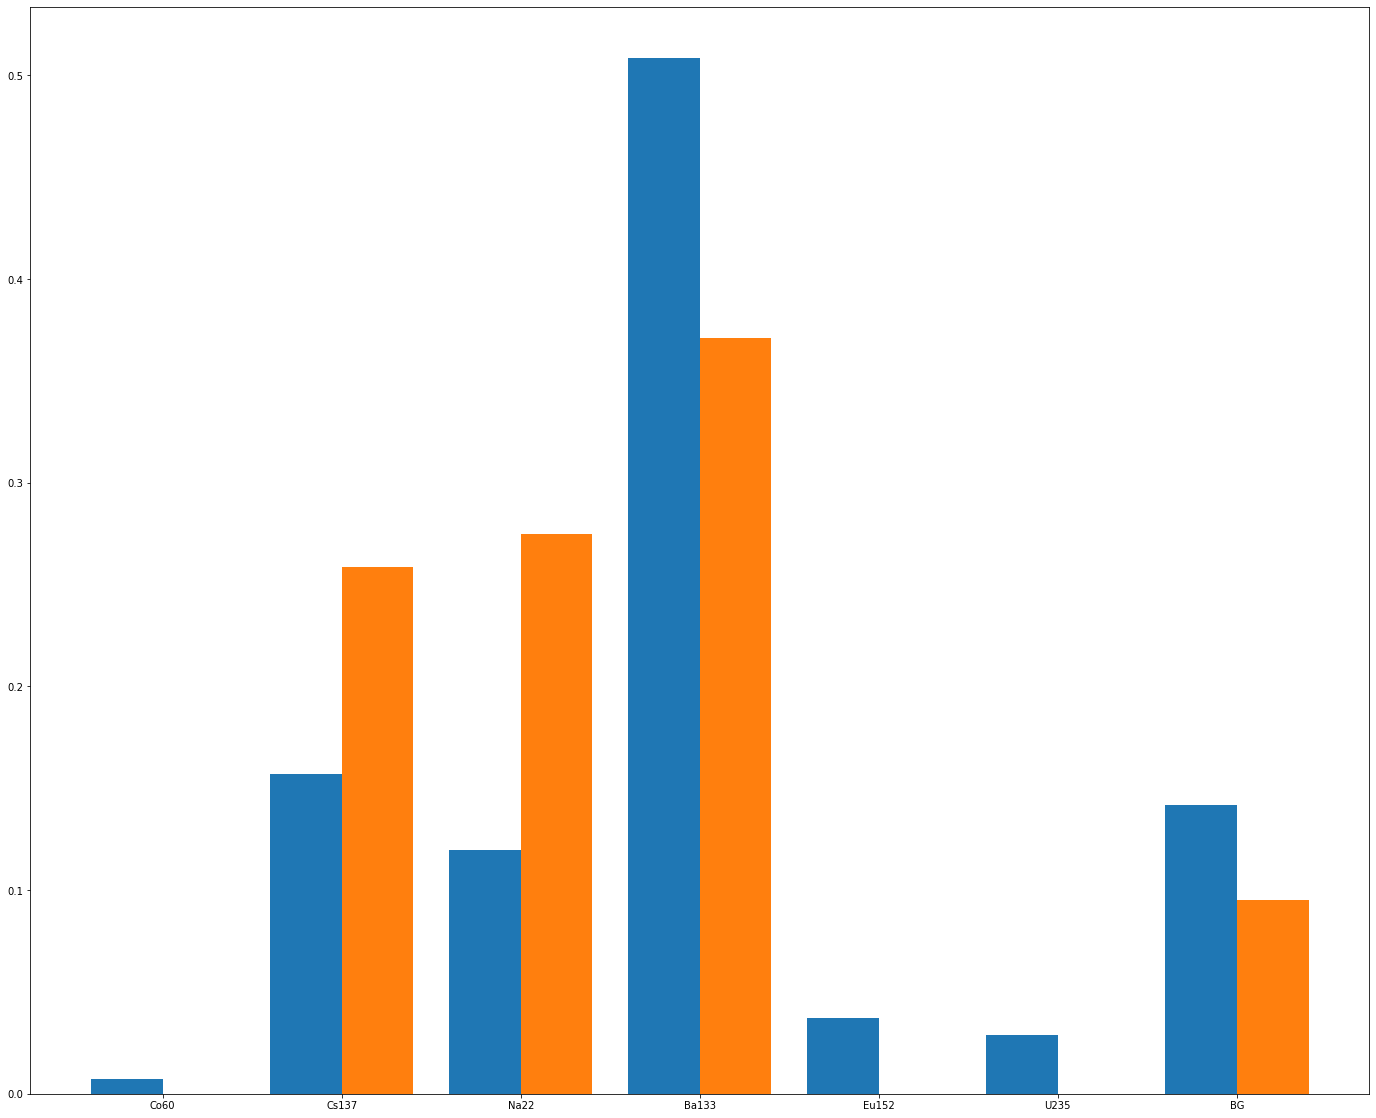

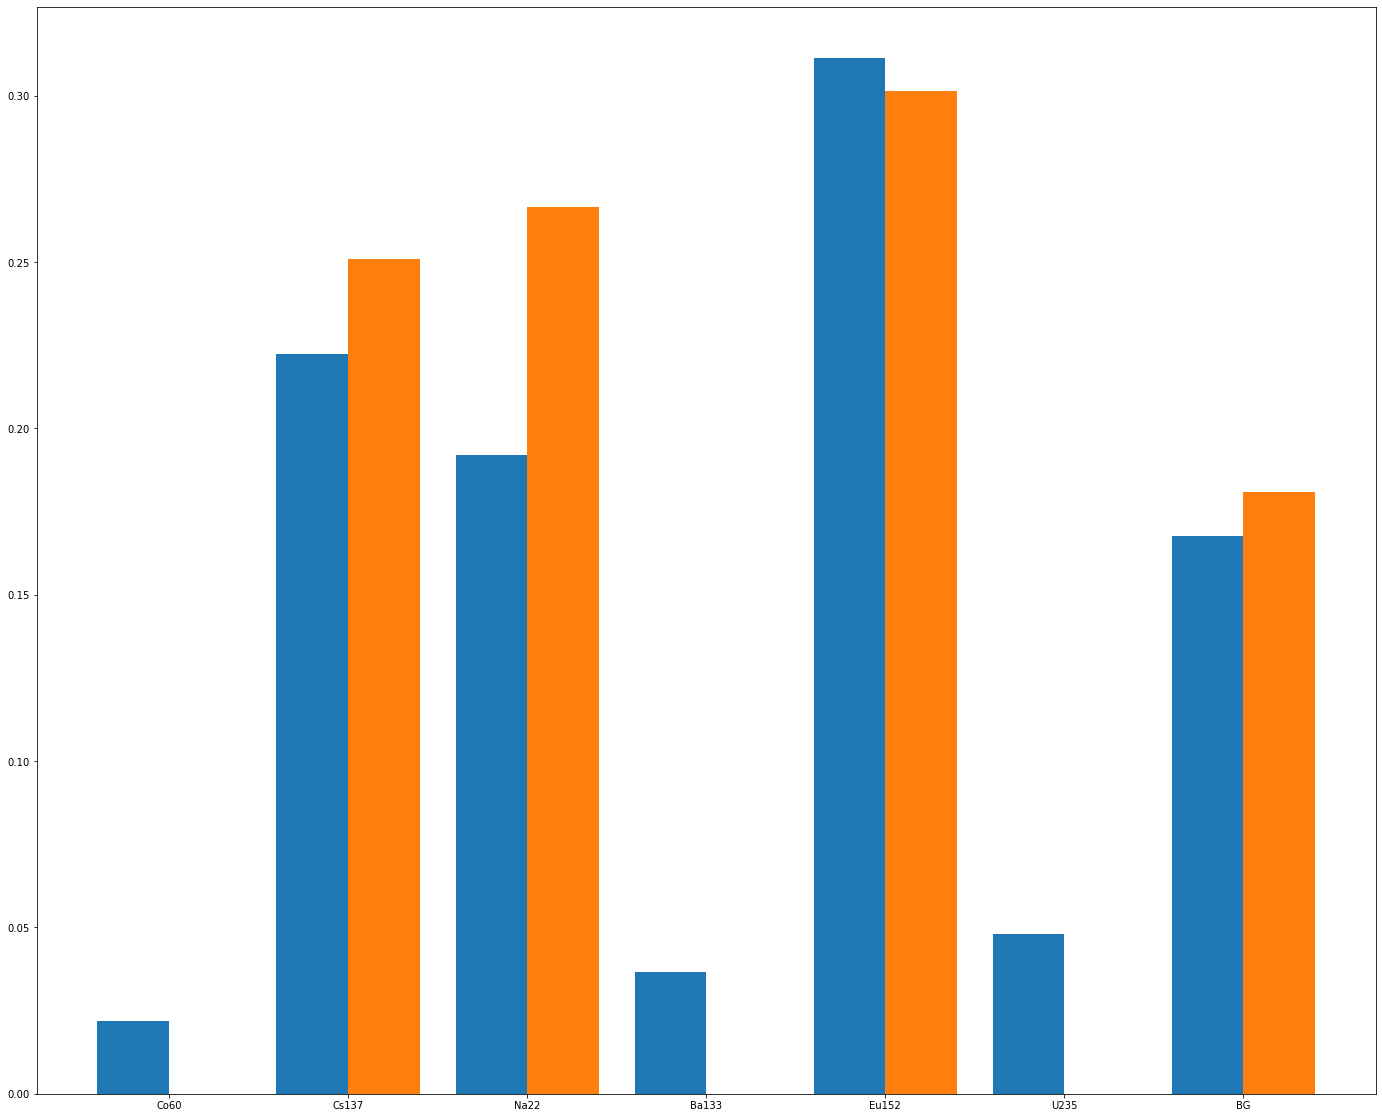

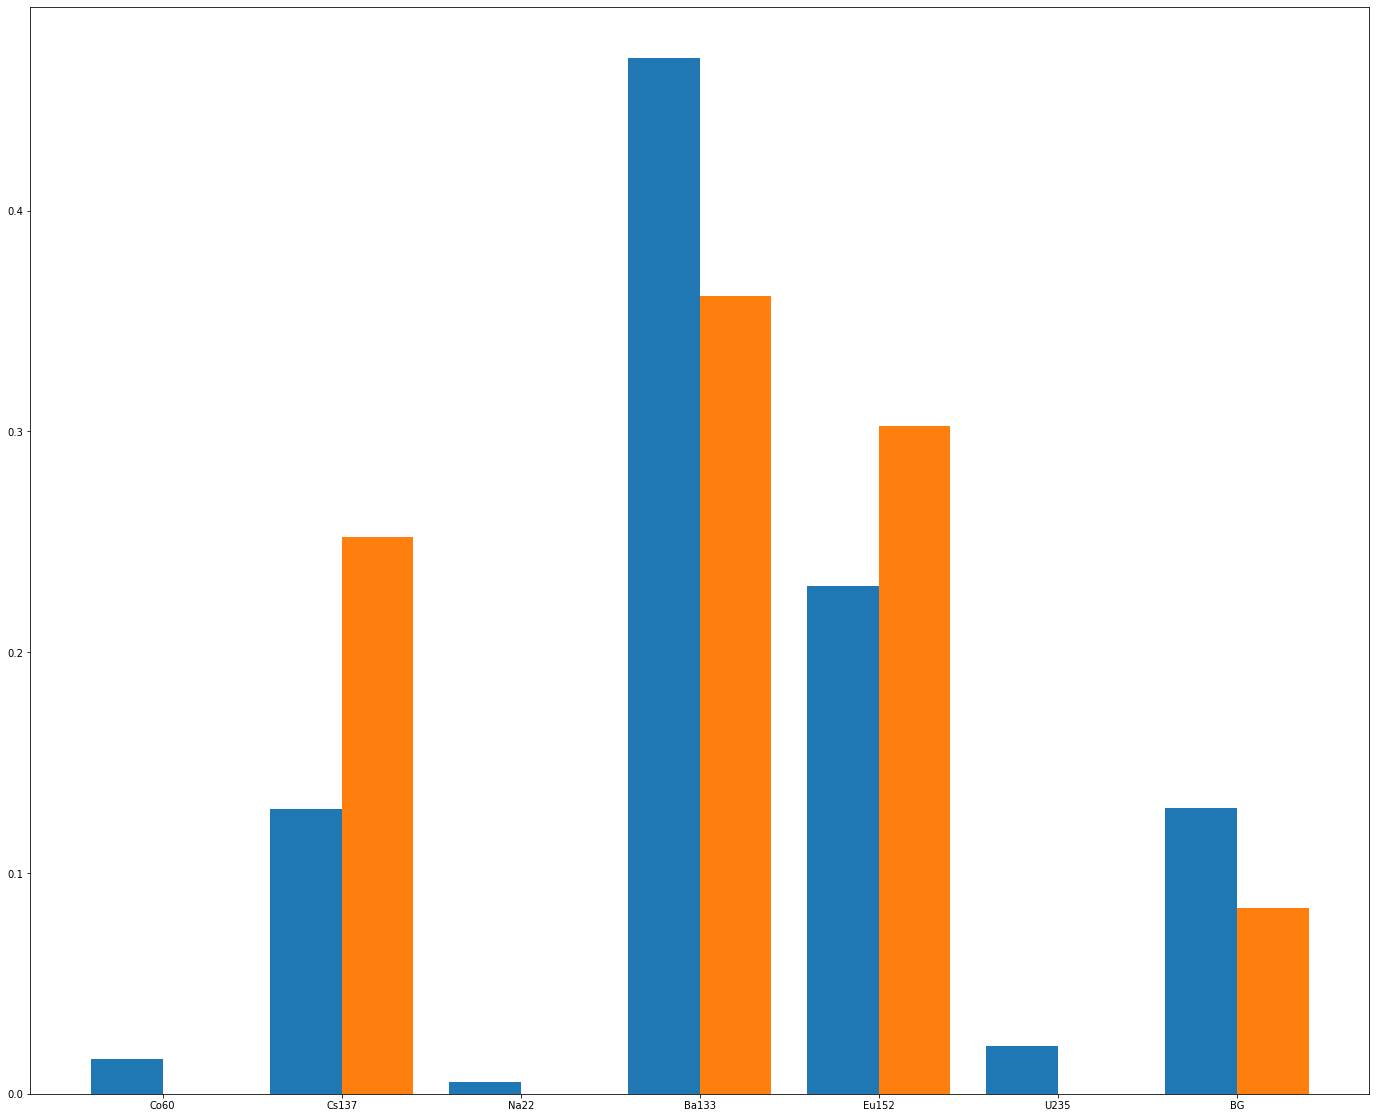

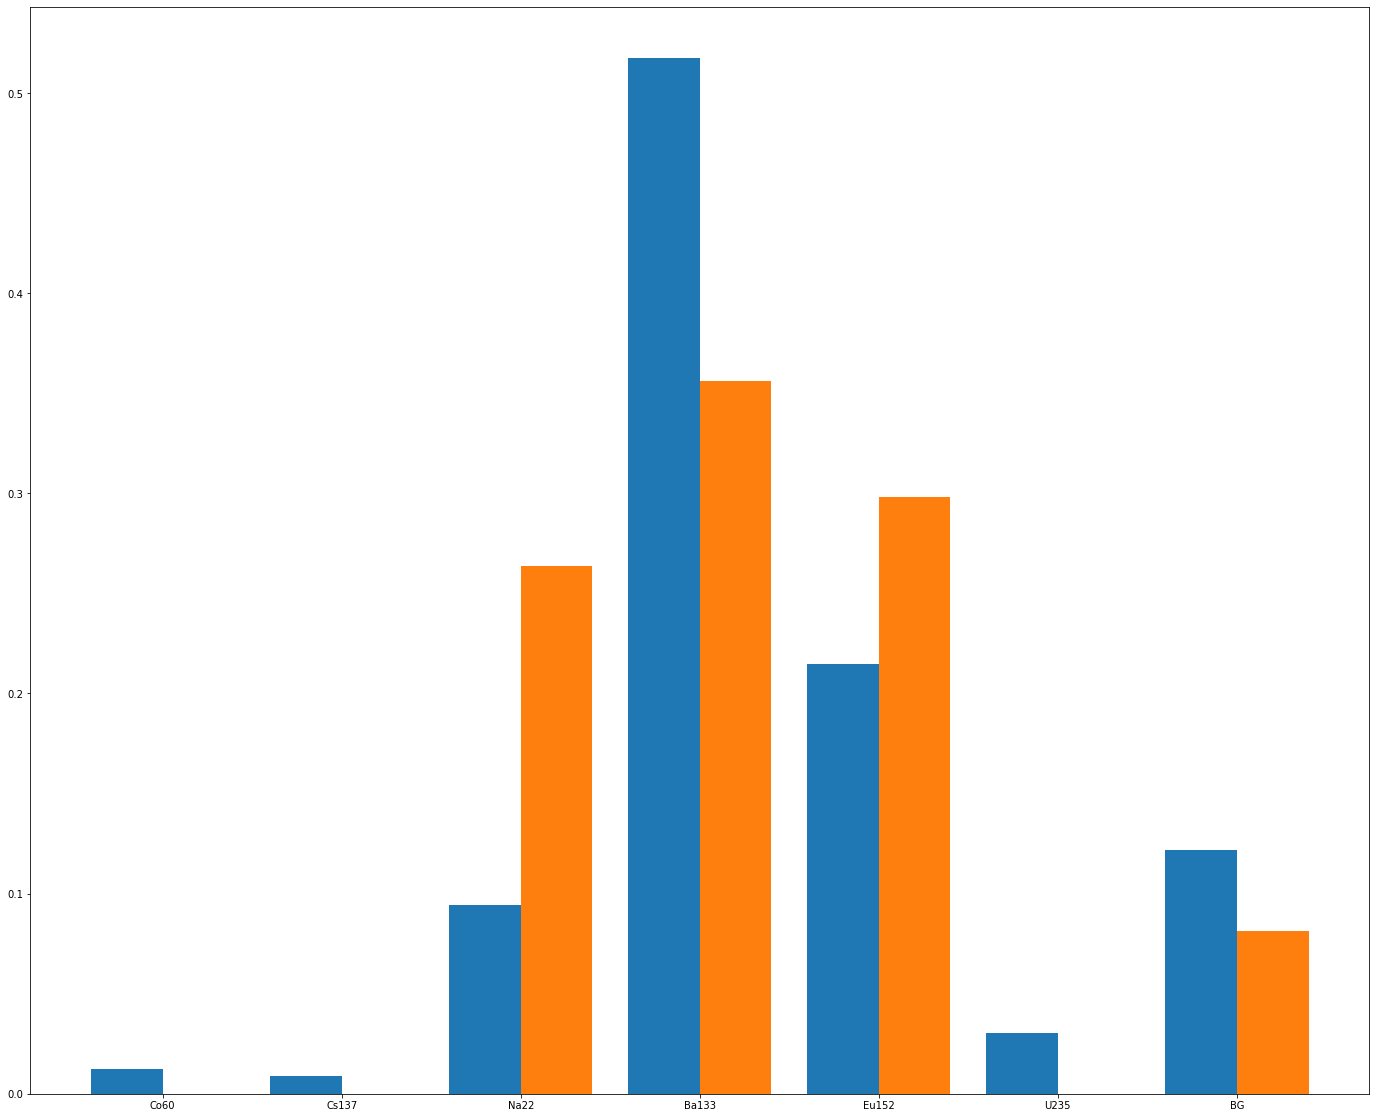

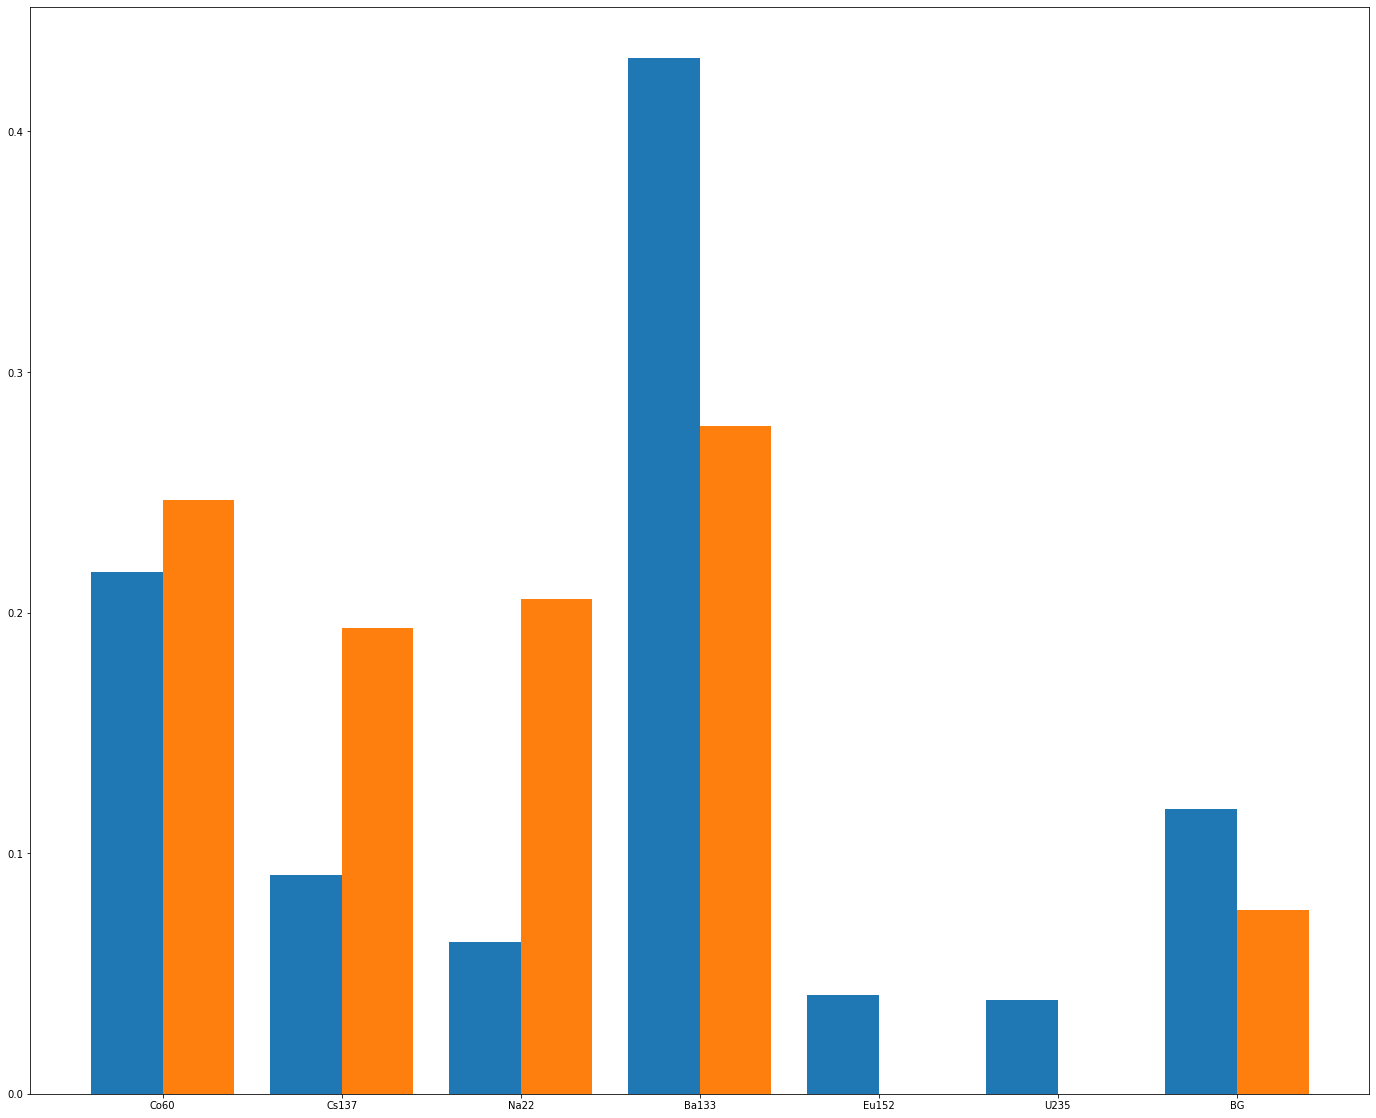

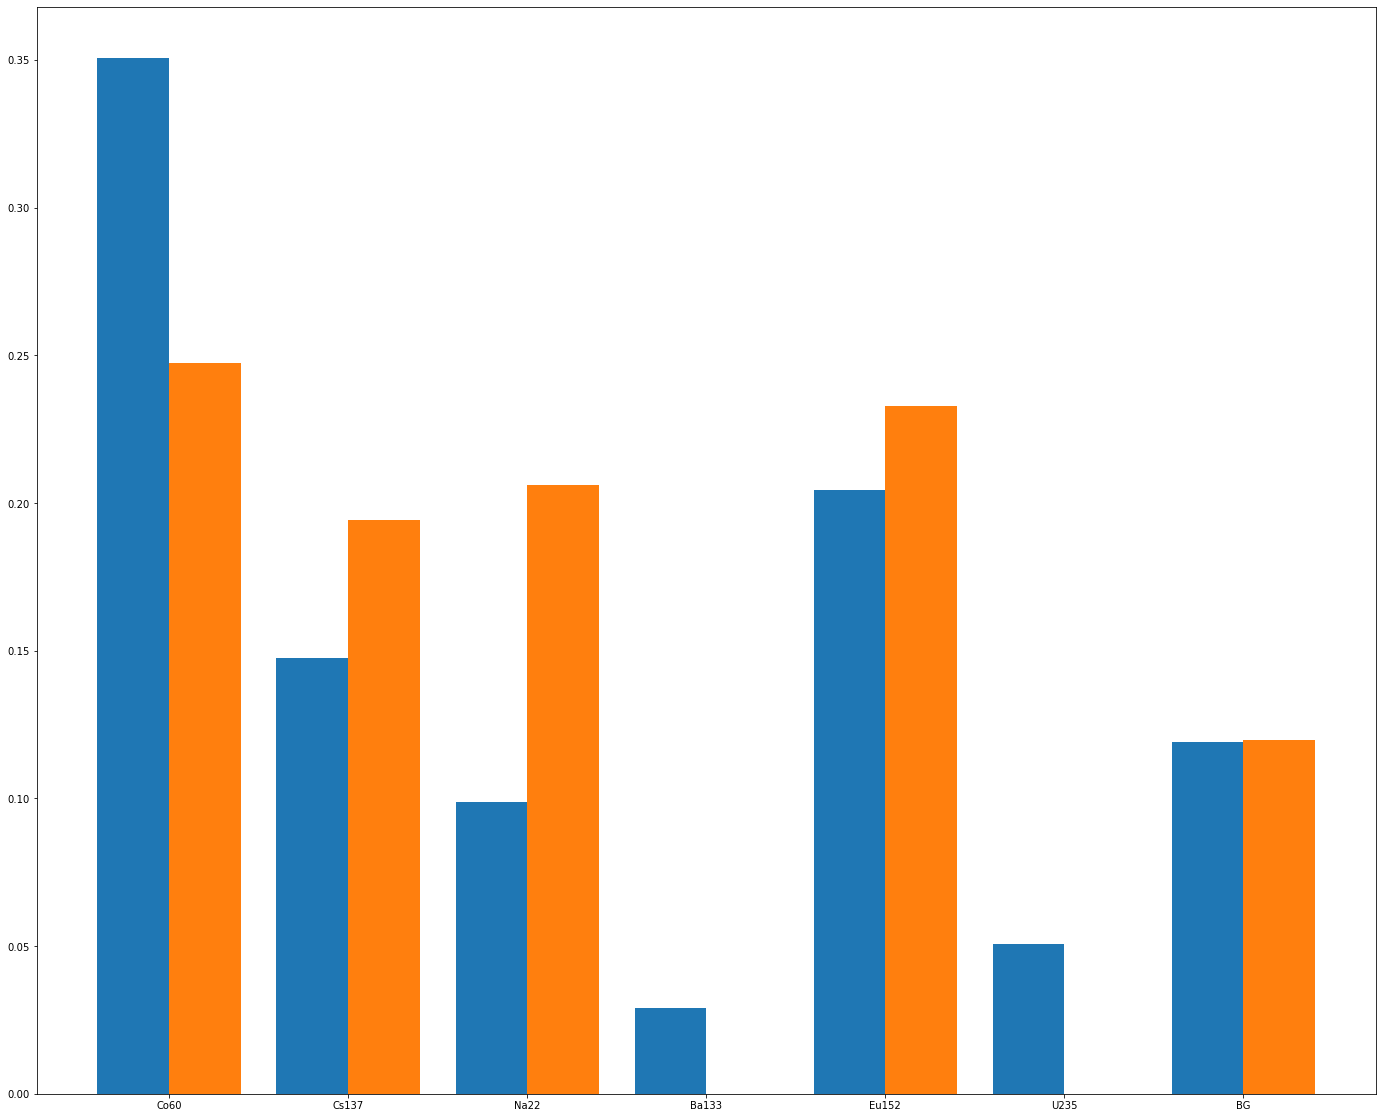

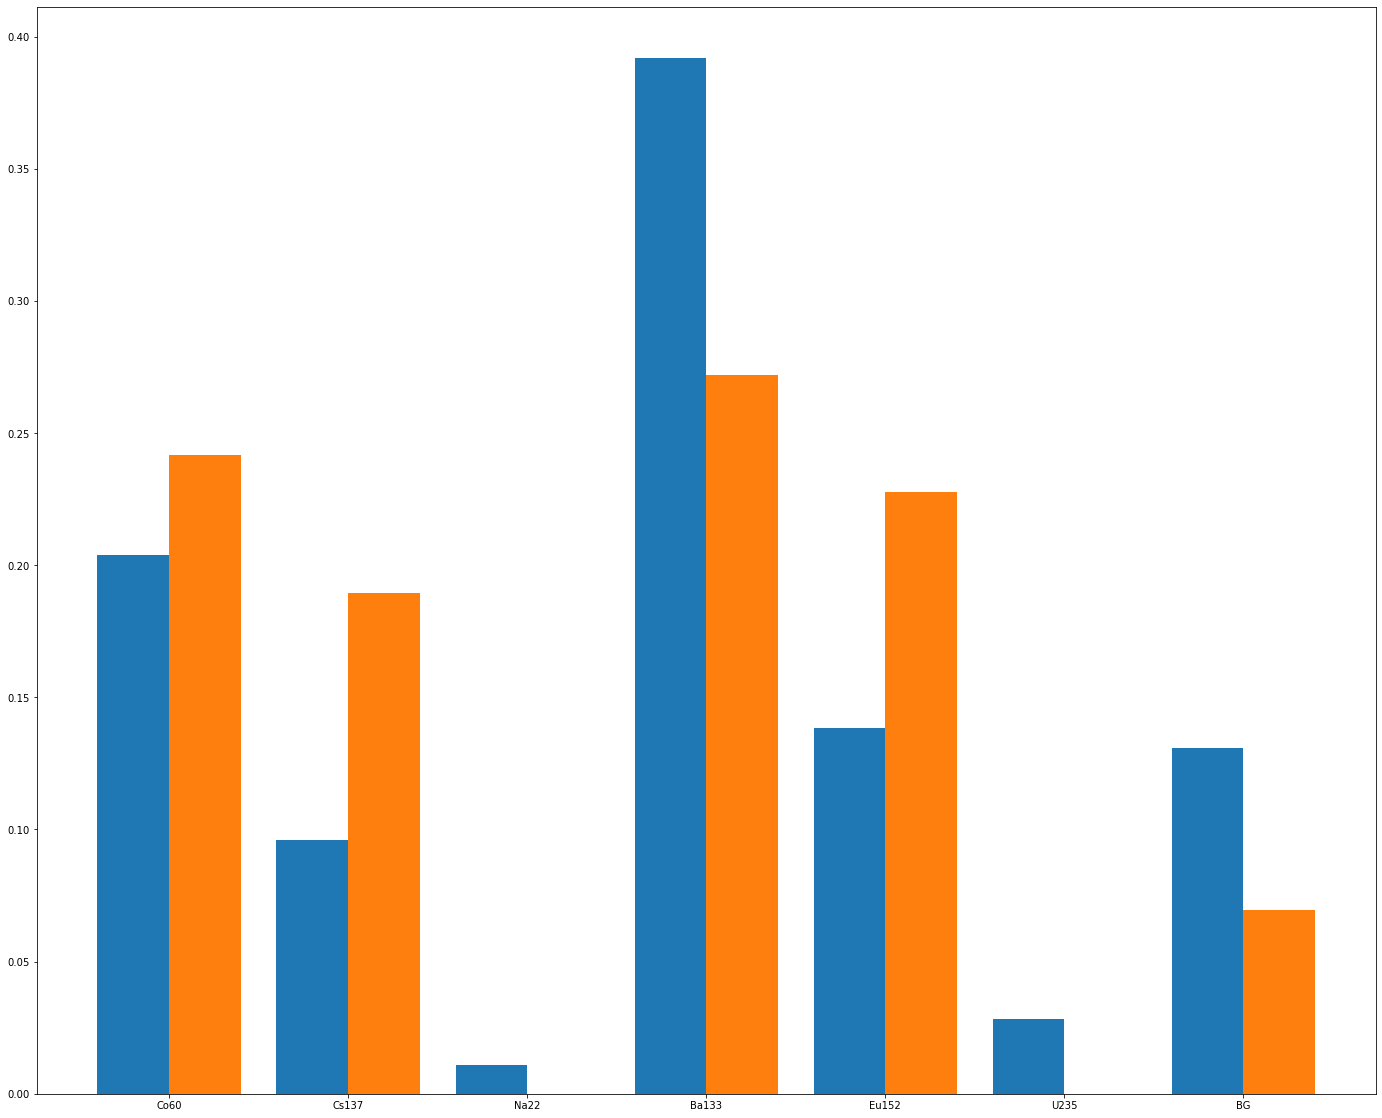

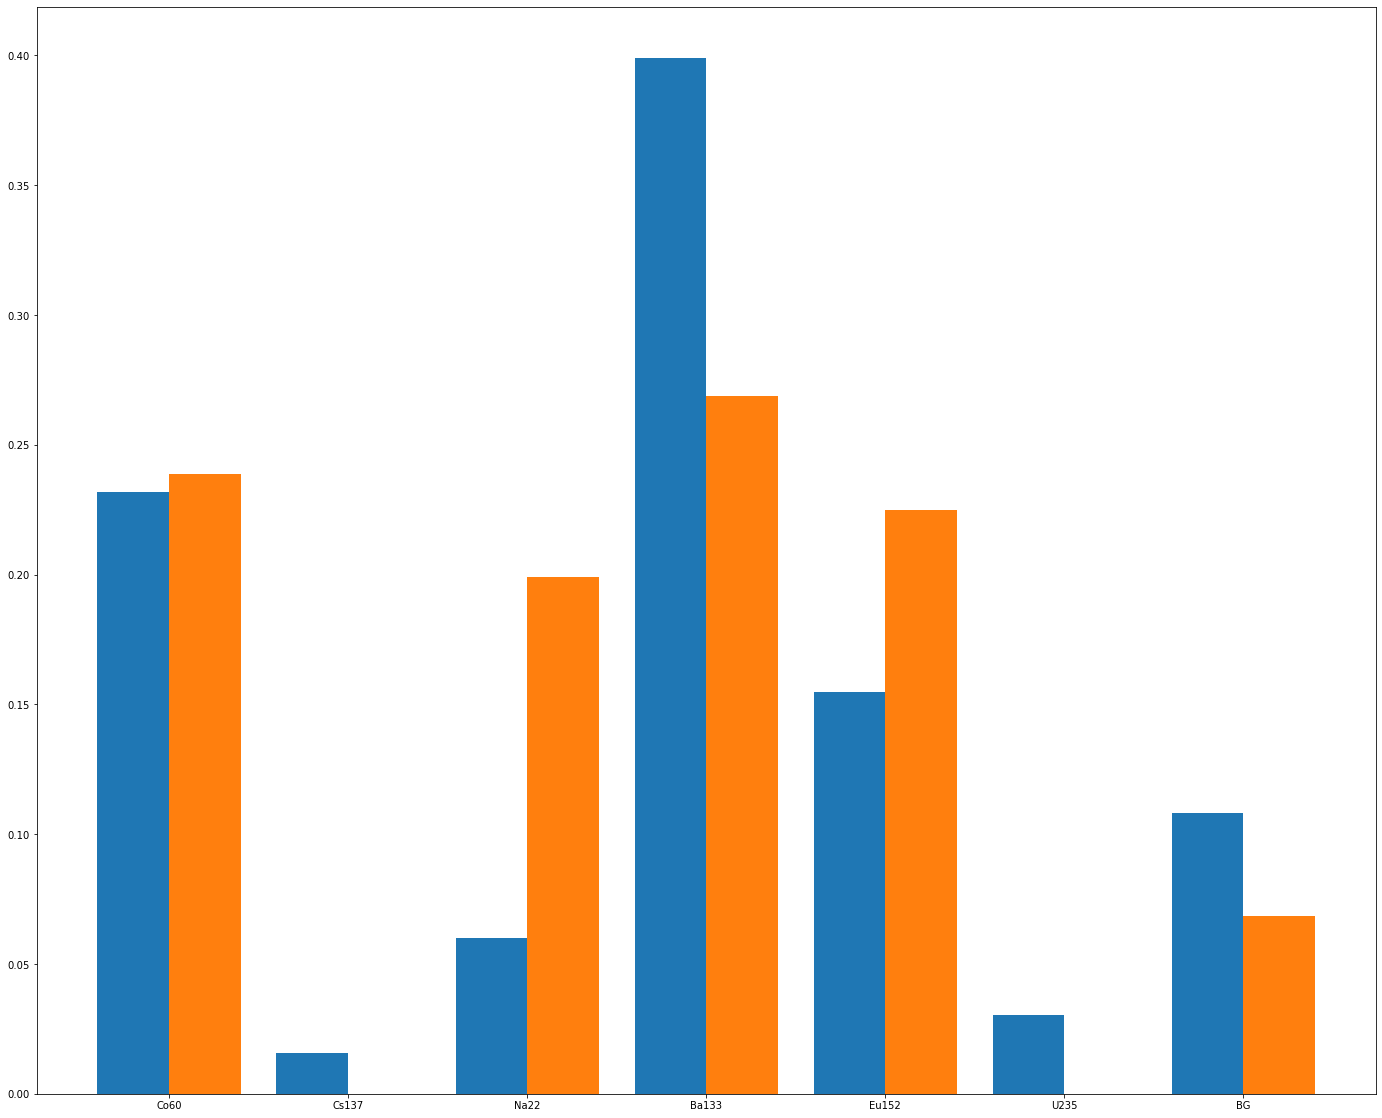

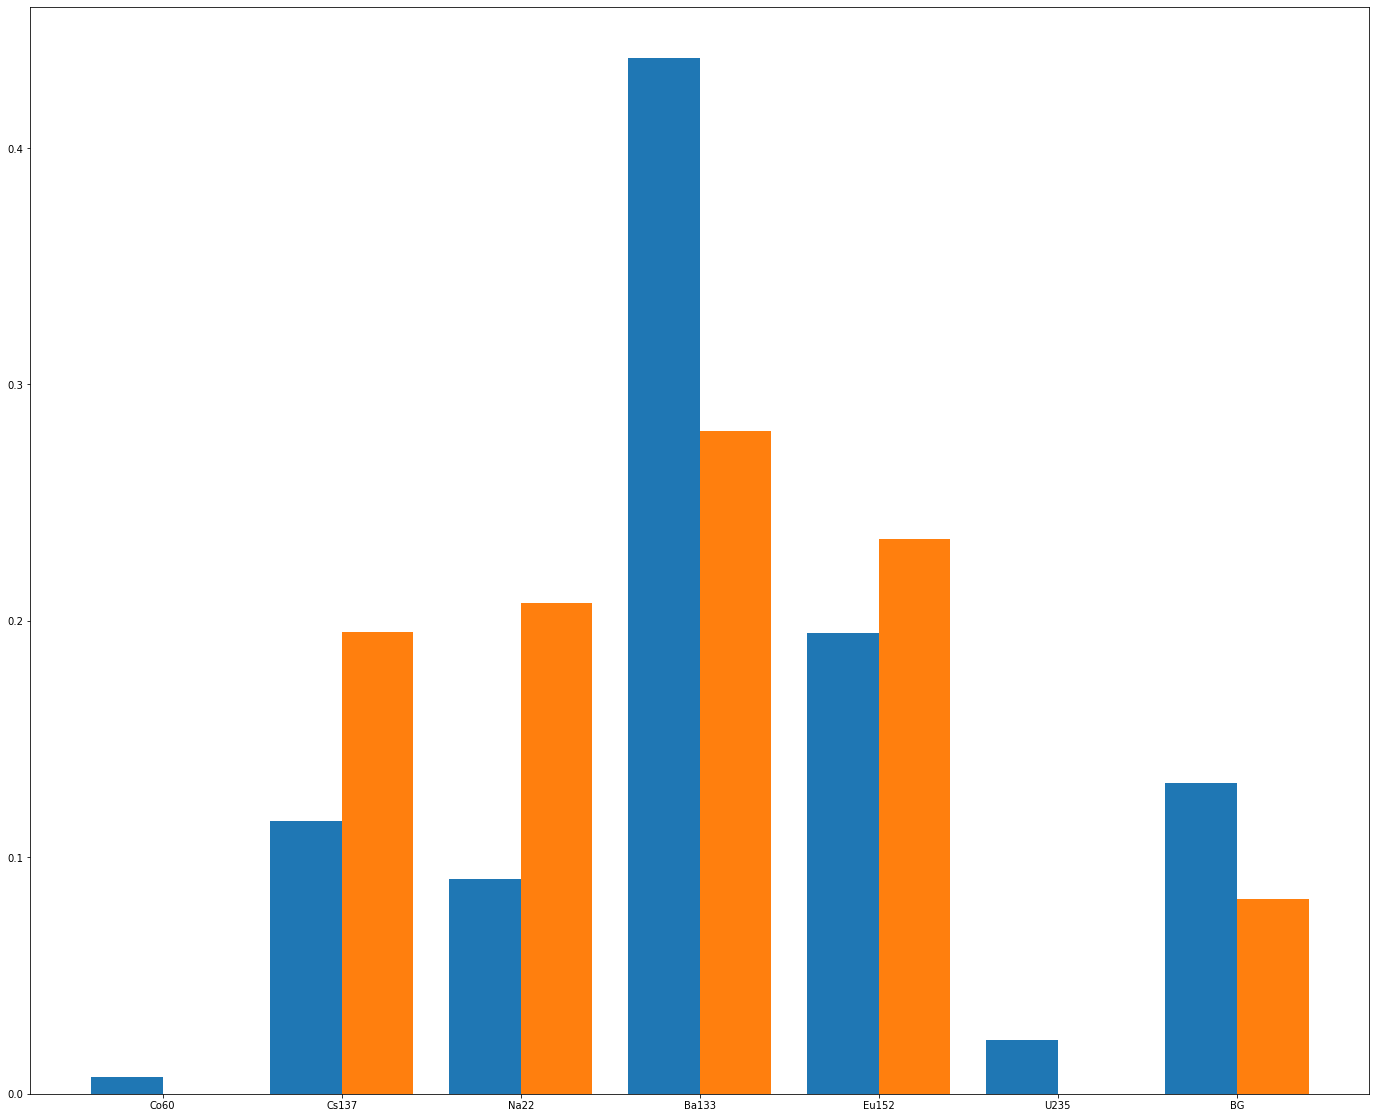

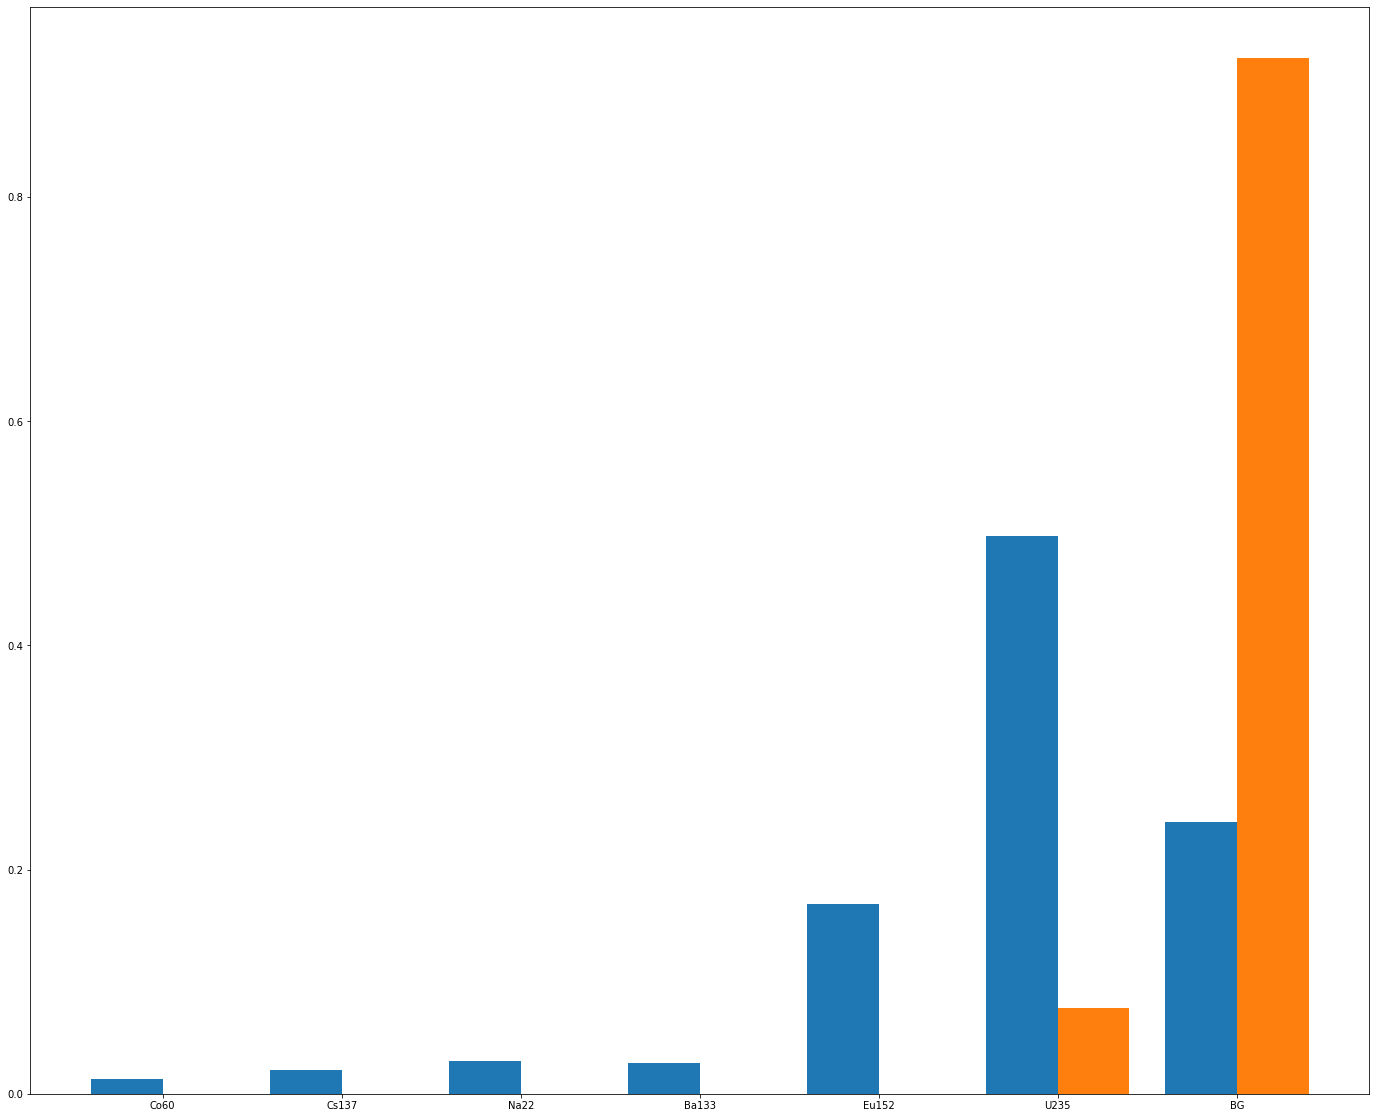

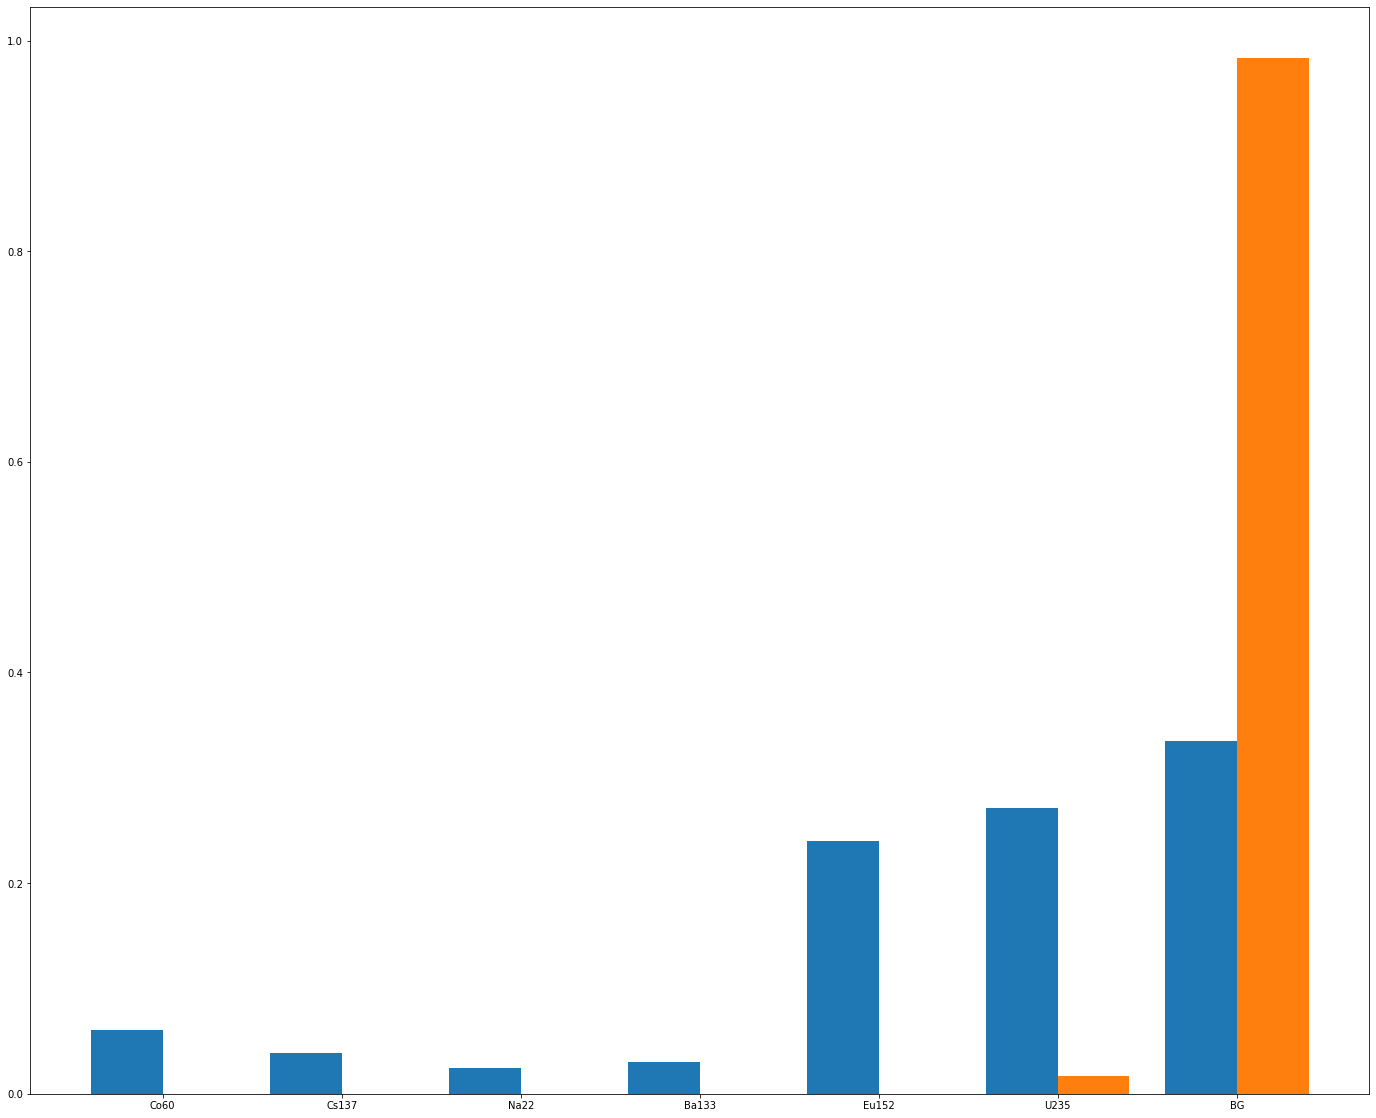

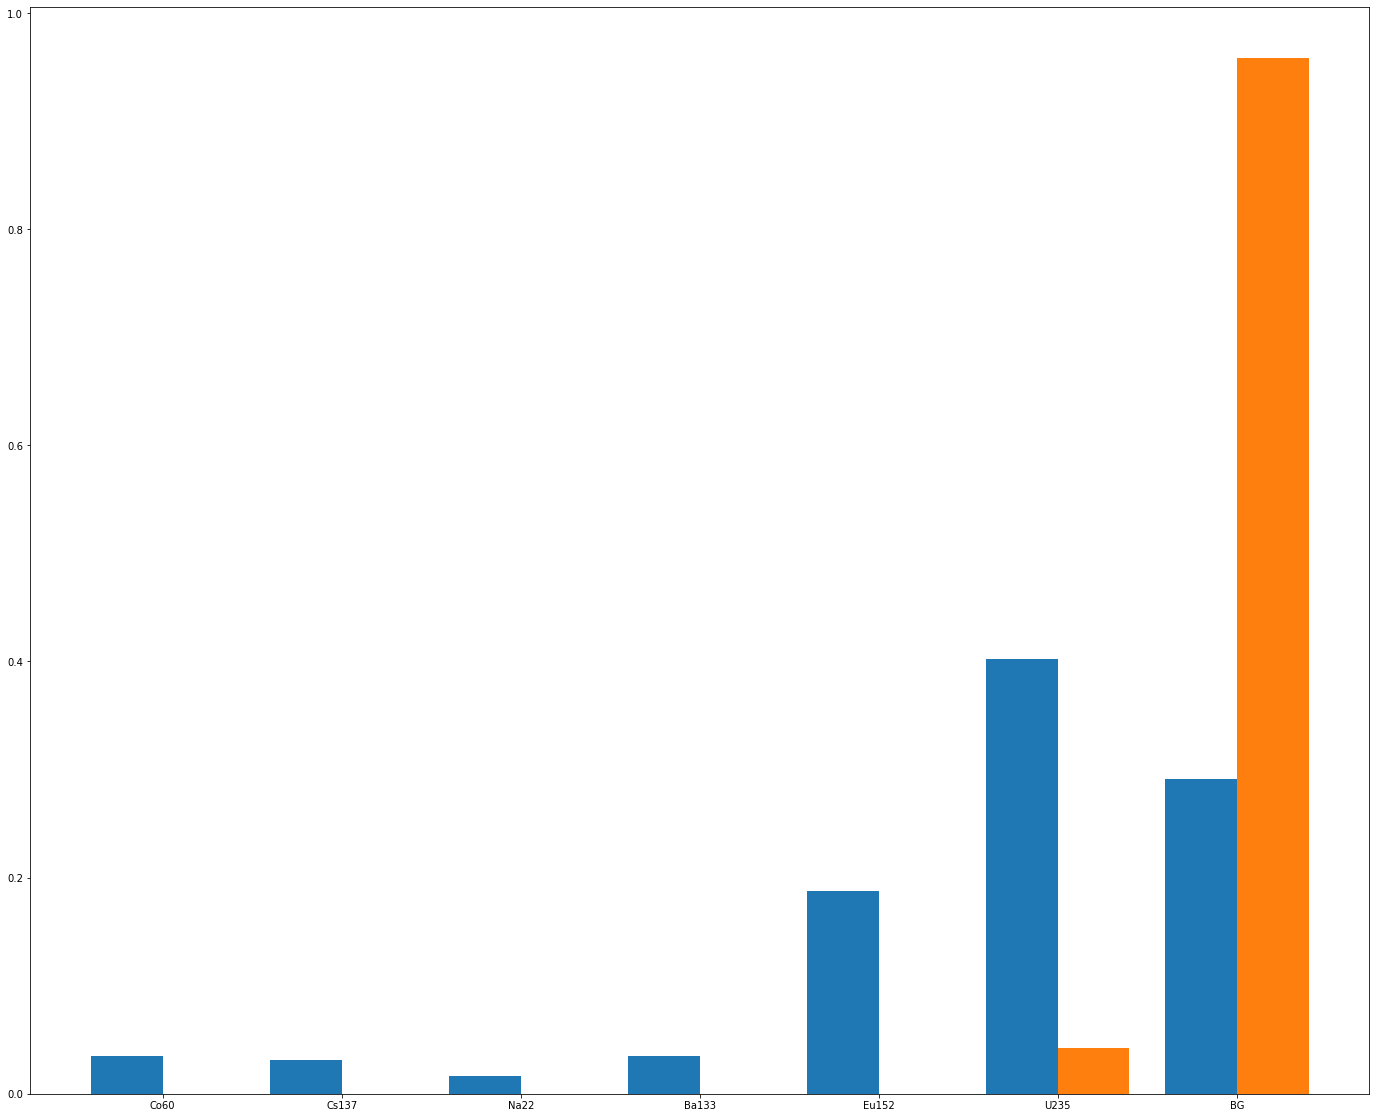

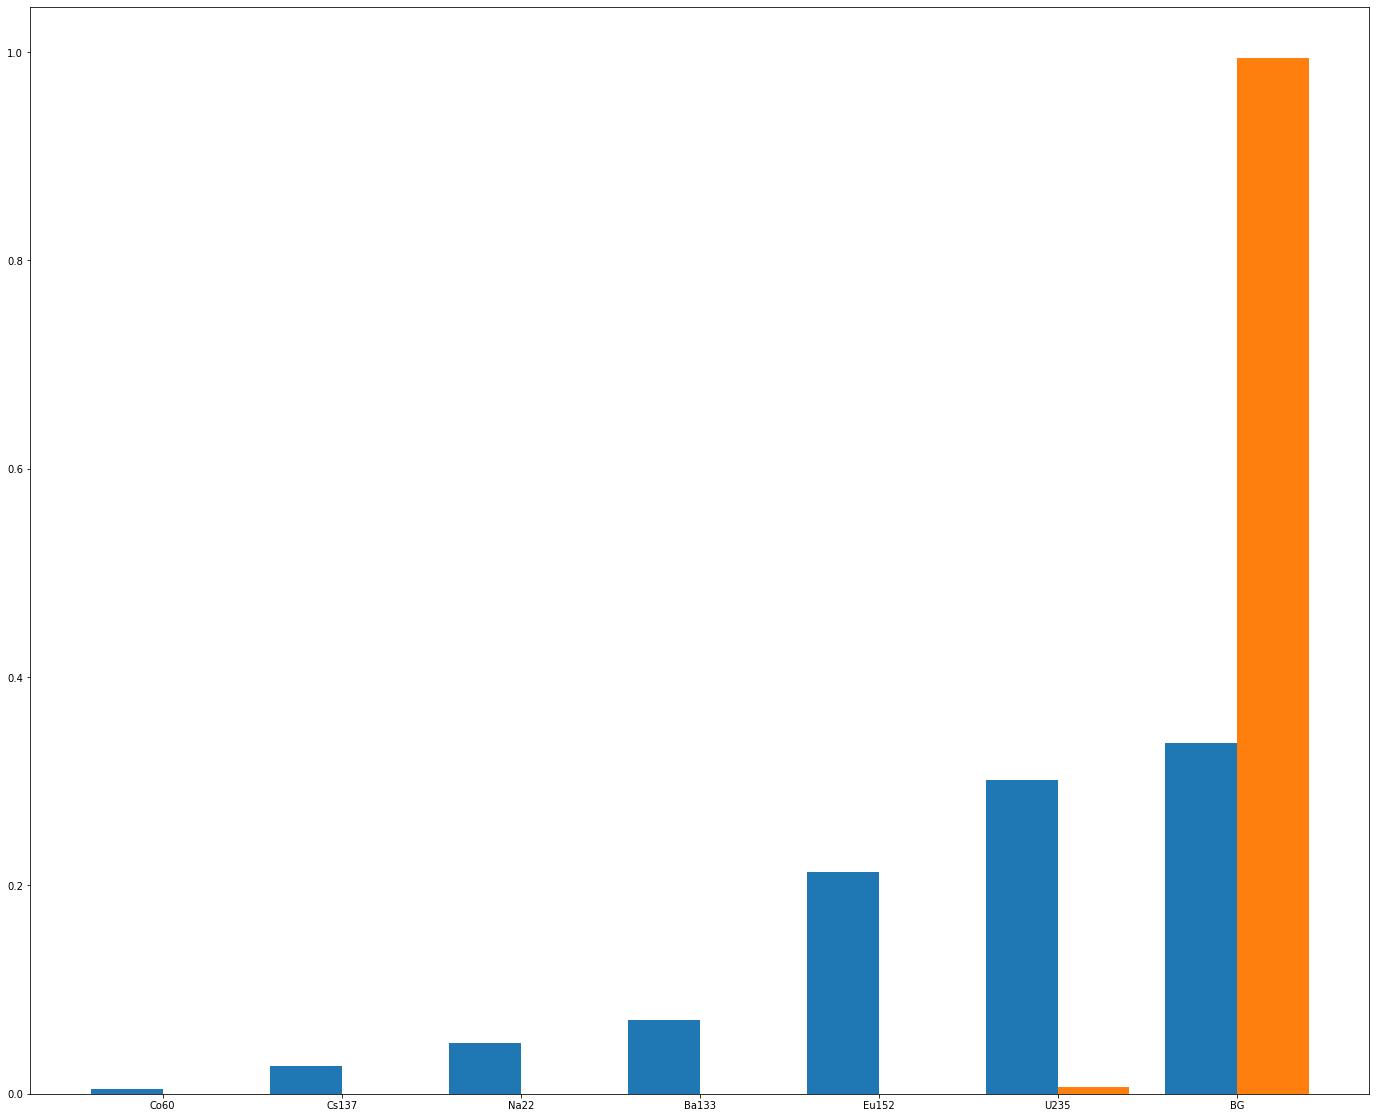

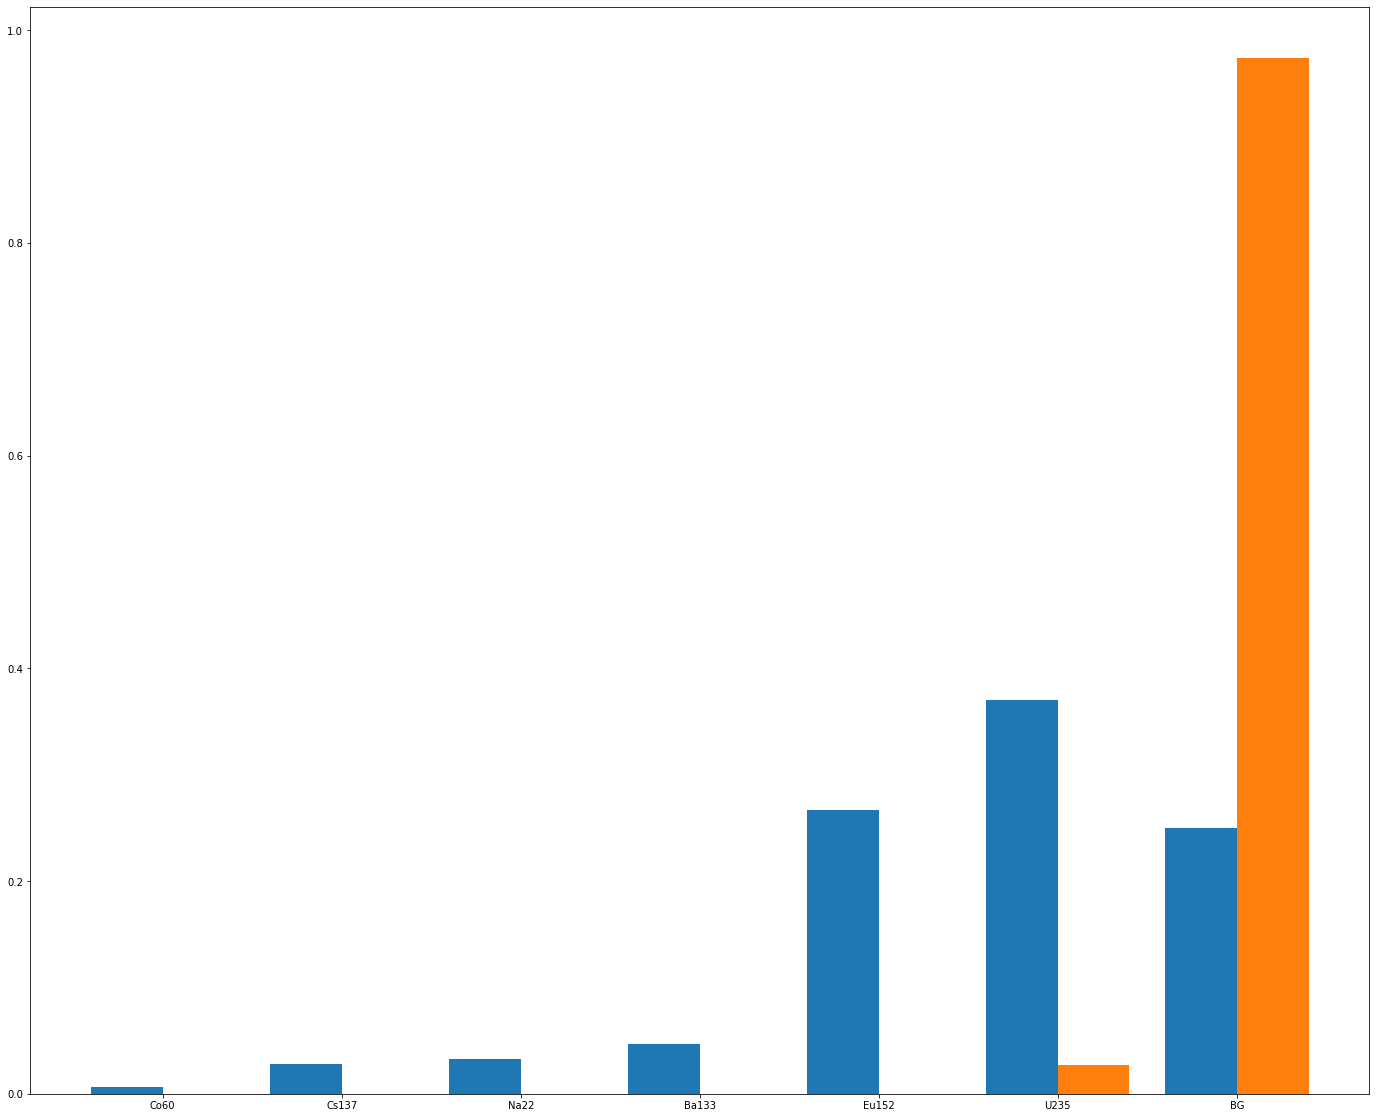

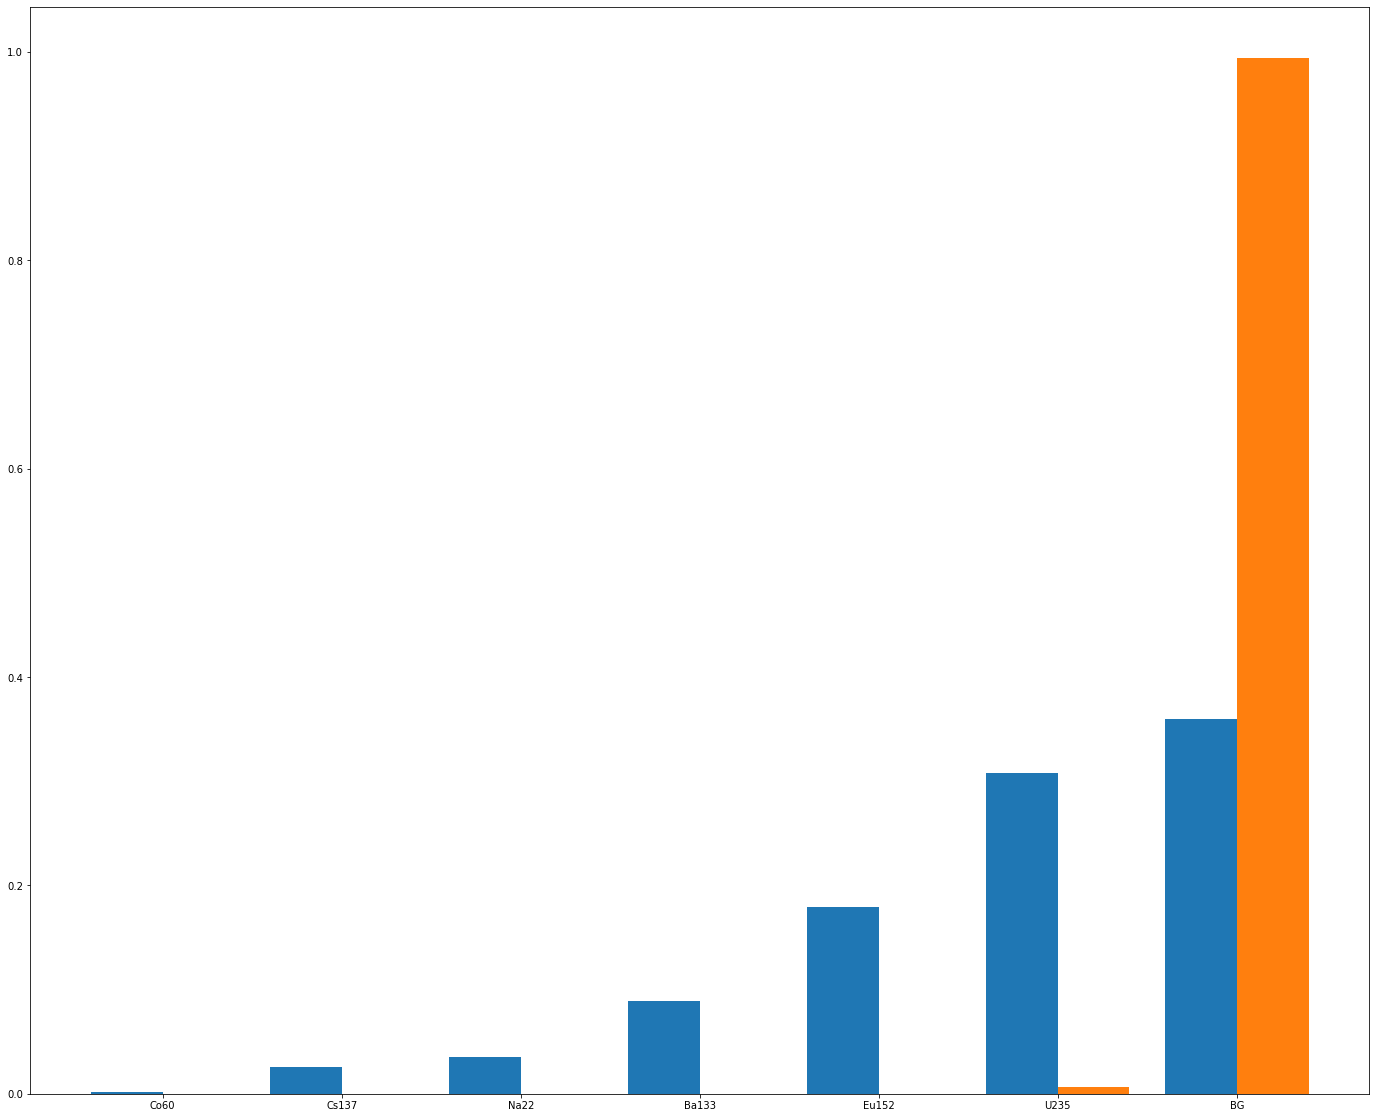

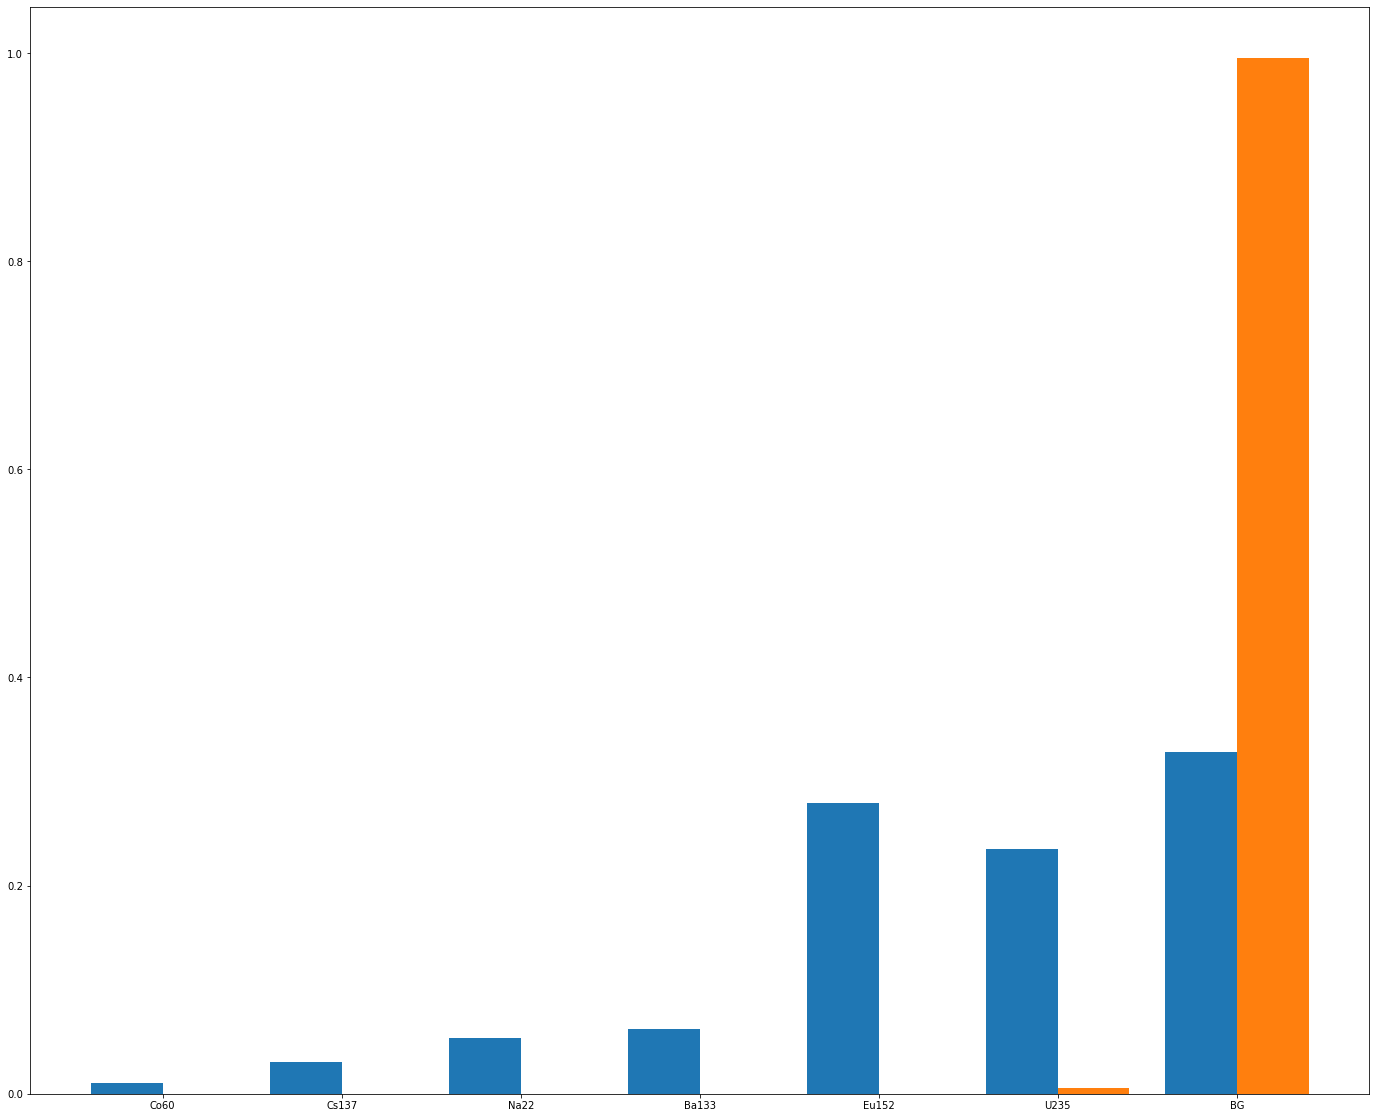

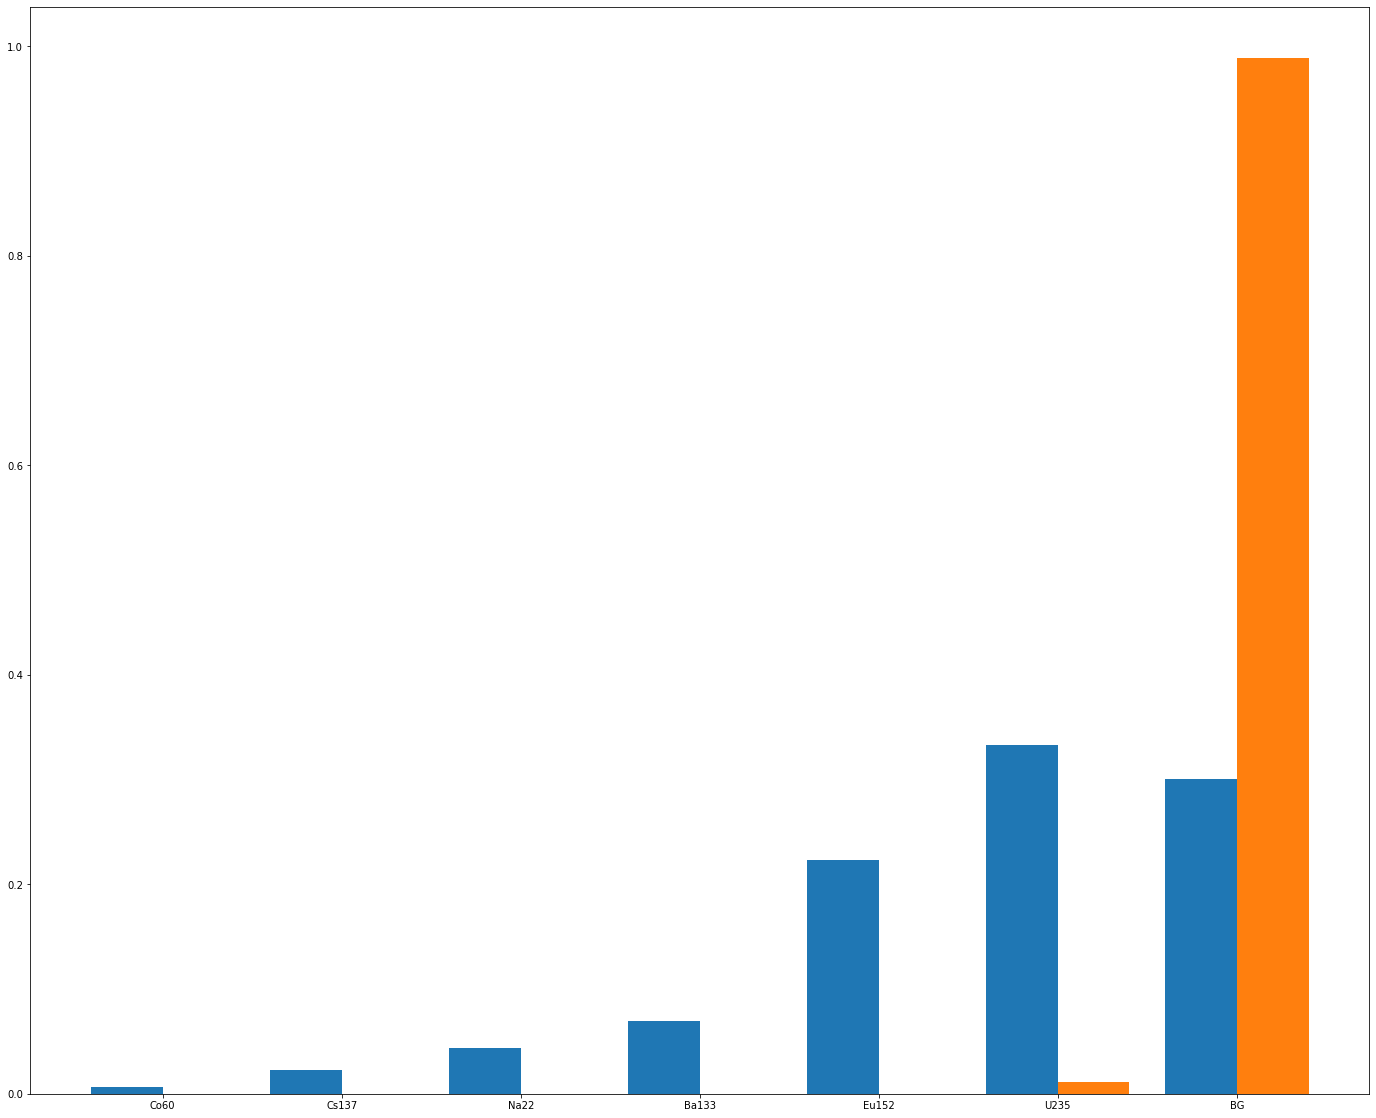

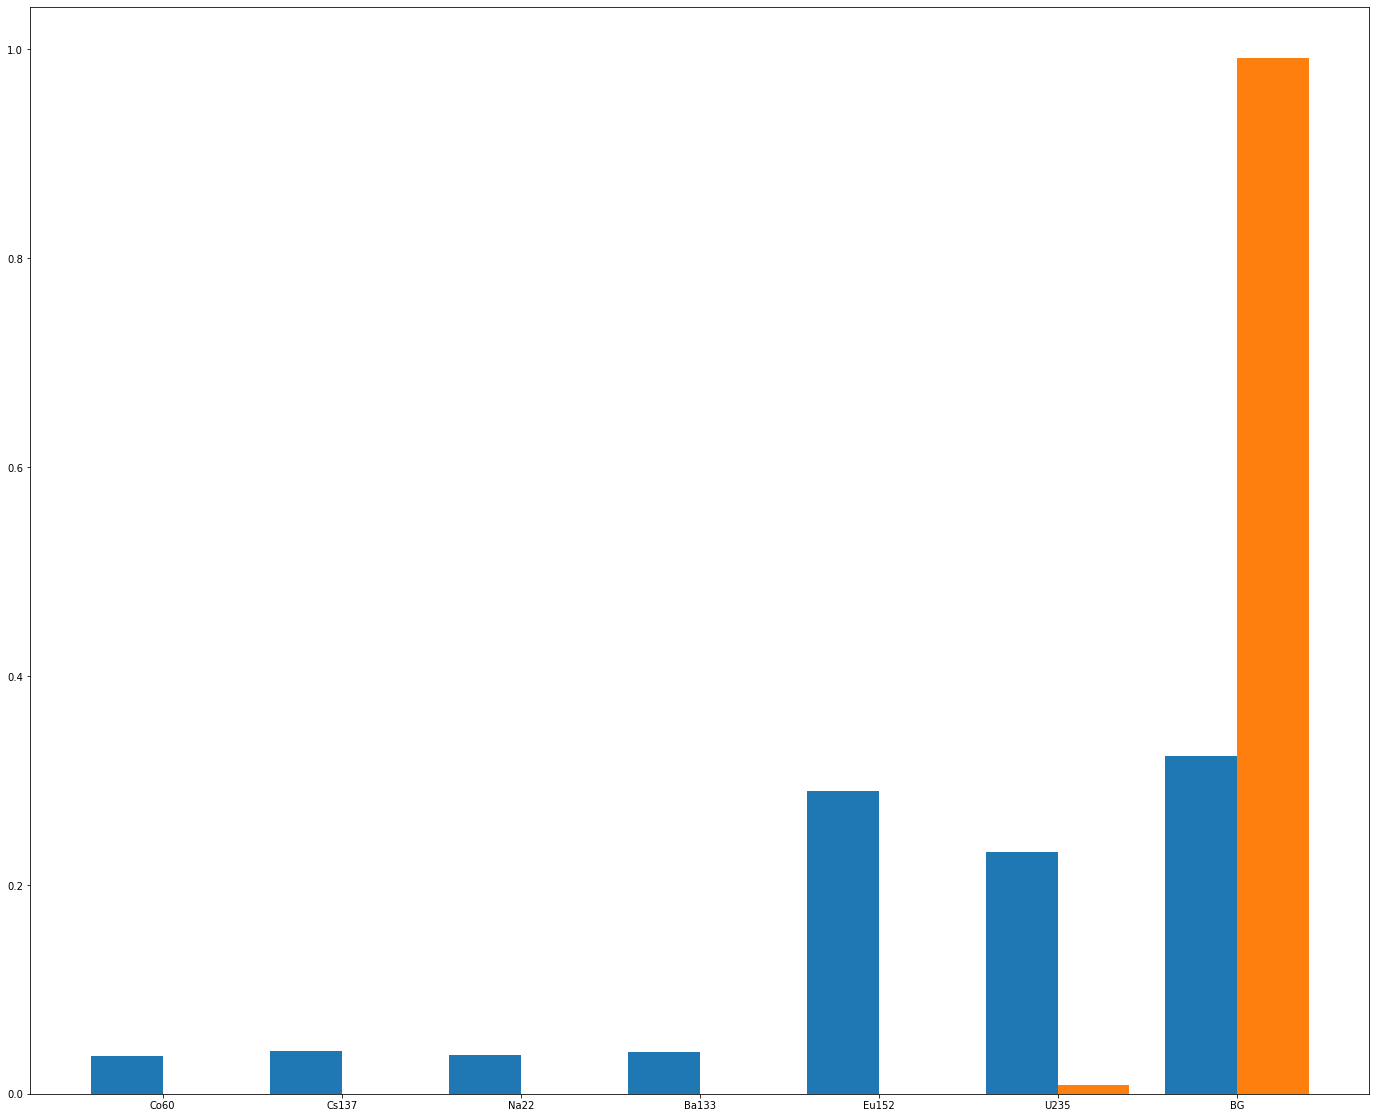

In [93]:
x_test_U1 = x_test_U
x_test_U1[:31] = x_test1

#VGG19model = keras.models.load_model("./VGG19-1D_withoutU233-resp renewed-150epoch.h5")
result_y = VGG19model.predict(x_test_U1)
print(result_y.shape)
print(result_y[0,:])
# BG = result_y[:, 4] + result_y[:, 8] + result_y[:, 9]
# BG = BG.reshape(BG.shape[0], 1)
# res_y = np.hstack((result_y[:, :4], result_y[:, 5:8], BG))

BG = result_y[:, 6] + result_y[:, 7] + result_y[:, 8] + result_y[:, 9] # 238, Th, Ra, K
BG = BG.reshape(BG.shape[0], 1)
#res_y = np.hstack((result_y[:, :4], result_y[:, 5], BG))
res_y = np.hstack((result_y[:, :6], BG))
print(BG.shape)
print(res_y.shape)
# print(result_y[:, 5:6])
names = np.array(["Co60", "Cs137", "Na22", "Ba133", "Eu152", "U235", "BG"])


left = np.arange(res_y.shape[1])
width = 0.4

for i in range(res_y.shape[0]):
    plt.figure(figsize=(24, 20))
    plt.bar(left, res_y[i], width=width, align='center')
    plt.bar(left+width, y_test_U[i], width=width, align='center')
    plt.xticks(left + width/2, names)
    #plt.savefig("June29-U-10epoch-7bits-Compton-cut60keV-{:03}.png".format(i))

# print(left)

# for i in range(16):
#     plt.subplot(4, 4, i+1)
#     plt.bar(left, res_y[i], width=width, align='center')
#     plt.bar(left+width, y_test[i], width=width, align='center')
#     plt.xticks(left + width/2, names)
#     #plt.ylim(0, 0.5)
plt.show()

np.savetxt("result_y_U.csv",result_y,delimiter=',')
#np.savetxt("res_y.csv",res_y,delimiter=',')
#print(res_y.shape)